In [3]:
#Importing Libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
# import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

NameError: name 'tf' is not defined

In [3]:
#Training Image preprocessing

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 139119 files belonging to 109 classes.


2025-03-10 21:37:55.590303: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-10 21:37:55.590348: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-03-10 21:37:55.590353: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-03-10 21:37:55.590404: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-10 21:37:55.590420: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
#Validation Image Preprocessing

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 43834 files belonging to 109 classes.


In [2]:
cnn = tf.keras.models.Sequential()


NameError: name 'tf' is not defined

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


/Users/harshitsmac/miniconda3/envs/tensorflow_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))


In [12]:
cnn.add(tf.keras.layers.Flatten())


In [13]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))


In [14]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting


In [15]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=109,activation='softmax'))


In [16]:
#Compiling and Training Phase
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [17]:
cnn.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 109)            │       163,609 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,949,333 (30.32 MB)

 Trainable params: 7,949,333 (30.32 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
for data_batch, label_batch in training_set.take(1):
    print(f"Input shape: {data_batch.shape}")
    print(f"Label shape: {label_batch.shape}")

print(f"Model output shape: {cnn.output_shape}")

Input shape: (32, 128, 128, 3)
Label shape: (32, 109)
Model output shape: (None, 109)


2025-03-10 21:37:58.470455: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
print(f"Training set classes: {len(training_set.class_names)}")
print(f"Validation set classes: {len(validation_set.class_names)}")

Training set classes: 109
Validation set classes: 109


In [20]:
with tf.device('/GPU:0'):
    training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2025-03-10 21:41:29.650143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
Invalid SOS parameters for sequential JPEG


  28/4348 ━━━━━━━━━━━━━━━━━━━━ 22:12 309ms/step - accuracy: 0.0551 - loss: 4.7636   

Invalid SOS parameters for sequential JPEG


  33/4348 ━━━━━━━━━━━━━━━━━━━━ 22:36 314ms/step - accuracy: 0.0569 - loss: 4.7190

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


  38/4348 ━━━━━━━━━━━━━━━━━━━━ 22:47 317ms/step - accuracy: 0.0586 - loss: 4.6813

Invalid SOS parameters for sequential JPEG


  53/4348 ━━━━━━━━━━━━━━━━━━━━ 22:11 310ms/step - accuracy: 0.0625 - loss: 4.5968

Invalid SOS parameters for sequential JPEG


  58/4348 ━━━━━━━━━━━━━━━━━━━━ 22:10 310ms/step - accuracy: 0.0631 - loss: 4.5768

Invalid SOS parameters for sequential JPEG


  69/4348 ━━━━━━━━━━━━━━━━━━━━ 22:45 319ms/step - accuracy: 0.0641 - loss: 4.5398

Invalid SOS parameters for sequential JPEG


  70/4348 ━━━━━━━━━━━━━━━━━━━━ 22:44 319ms/step - accuracy: 0.0642 - loss: 4.5368

Invalid SOS parameters for sequential JPEG


  81/4348 ━━━━━━━━━━━━━━━━━━━━ 22:54 322ms/step - accuracy: 0.0656 - loss: 4.5057

Invalid SOS parameters for sequential JPEG


 100/4348 ━━━━━━━━━━━━━━━━━━━━ 23:16 329ms/step - accuracy: 0.0676 - loss: 4.4631

Invalid SOS parameters for sequential JPEG


 116/4348 ━━━━━━━━━━━━━━━━━━━━ 23:07 328ms/step - accuracy: 0.0691 - loss: 4.4326

Invalid SOS parameters for sequential JPEG


 125/4348 ━━━━━━━━━━━━━━━━━━━━ 24:17 345ms/step - accuracy: 0.0700 - loss: 4.4166

Invalid SOS parameters for sequential JPEG


 142/4348 ━━━━━━━━━━━━━━━━━━━━ 24:08 344ms/step - accuracy: 0.0716 - loss: 4.3886

Invalid SOS parameters for sequential JPEG


 150/4348 ━━━━━━━━━━━━━━━━━━━━ 23:58 343ms/step - accuracy: 0.0722 - loss: 4.3762

Invalid SOS parameters for sequential JPEG


 181/4348 ━━━━━━━━━━━━━━━━━━━━ 23:32 339ms/step - accuracy: 0.0747 - loss: 4.3328

Invalid SOS parameters for sequential JPEG


 187/4348 ━━━━━━━━━━━━━━━━━━━━ 23:28 338ms/step - accuracy: 0.0751 - loss: 4.3252

Invalid SOS parameters for sequential JPEG


 195/4348 ━━━━━━━━━━━━━━━━━━━━ 23:24 338ms/step - accuracy: 0.0757 - loss: 4.3153

Invalid SOS parameters for sequential JPEG


 203/4348 ━━━━━━━━━━━━━━━━━━━━ 23:25 339ms/step - accuracy: 0.0763 - loss: 4.3059

Invalid SOS parameters for sequential JPEG


 205/4348 ━━━━━━━━━━━━━━━━━━━━ 23:22 339ms/step - accuracy: 0.0764 - loss: 4.3036

Invalid SOS parameters for sequential JPEG


 216/4348 ━━━━━━━━━━━━━━━━━━━━ 23:17 338ms/step - accuracy: 0.0772 - loss: 4.2913

Invalid SOS parameters for sequential JPEG


 224/4348 ━━━━━━━━━━━━━━━━━━━━ 23:17 339ms/step - accuracy: 0.0777 - loss: 4.2827

Invalid SOS parameters for sequential JPEG


 248/4348 ━━━━━━━━━━━━━━━━━━━━ 23:14 340ms/step - accuracy: 0.0793 - loss: 4.2583

Invalid SOS parameters for sequential JPEG


 257/4348 ━━━━━━━━━━━━━━━━━━━━ 23:11 340ms/step - accuracy: 0.0799 - loss: 4.2494

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 262/4348 ━━━━━━━━━━━━━━━━━━━━ 23:08 340ms/step - accuracy: 0.0803 - loss: 4.2445

Invalid SOS parameters for sequential JPEG


 263/4348 ━━━━━━━━━━━━━━━━━━━━ 23:10 340ms/step - accuracy: 0.0804 - loss: 4.2435

Invalid SOS parameters for sequential JPEG


 270/4348 ━━━━━━━━━━━━━━━━━━━━ 23:07 340ms/step - accuracy: 0.0809 - loss: 4.2367

Invalid SOS parameters for sequential JPEG


 271/4348 ━━━━━━━━━━━━━━━━━━━━ 23:06 340ms/step - accuracy: 0.0810 - loss: 4.2357

Invalid SOS parameters for sequential JPEG


 289/4348 ━━━━━━━━━━━━━━━━━━━━ 23:02 341ms/step - accuracy: 0.0823 - loss: 4.2186

Invalid SOS parameters for sequential JPEG


 306/4348 ━━━━━━━━━━━━━━━━━━━━ 22:58 341ms/step - accuracy: 0.0836 - loss: 4.2028

Invalid SOS parameters for sequential JPEG


 322/4348 ━━━━━━━━━━━━━━━━━━━━ 22:45 339ms/step - accuracy: 0.0848 - loss: 4.1881

Invalid SOS parameters for sequential JPEG


 346/4348 ━━━━━━━━━━━━━━━━━━━━ 22:29 337ms/step - accuracy: 0.0864 - loss: 4.1668

Invalid SOS parameters for sequential JPEG


 352/4348 ━━━━━━━━━━━━━━━━━━━━ 22:25 337ms/step - accuracy: 0.0868 - loss: 4.1616

Invalid SOS parameters for sequential JPEG


 365/4348 ━━━━━━━━━━━━━━━━━━━━ 22:16 336ms/step - accuracy: 0.0877 - loss: 4.1506

Invalid SOS parameters for sequential JPEG


 380/4348 ━━━━━━━━━━━━━━━━━━━━ 22:11 336ms/step - accuracy: 0.0887 - loss: 4.1380

Invalid SOS parameters for sequential JPEG


 403/4348 ━━━━━━━━━━━━━━━━━━━━ 22:09 337ms/step - accuracy: 0.0903 - loss: 4.1186

Invalid SOS parameters for sequential JPEG


 409/4348 ━━━━━━━━━━━━━━━━━━━━ 22:06 337ms/step - accuracy: 0.0907 - loss: 4.1135

Invalid SOS parameters for sequential JPEG


 412/4348 ━━━━━━━━━━━━━━━━━━━━ 22:05 337ms/step - accuracy: 0.0909 - loss: 4.1110

Invalid SOS parameters for sequential JPEG


 431/4348 ━━━━━━━━━━━━━━━━━━━━ 22:04 338ms/step - accuracy: 0.0923 - loss: 4.0953

Invalid SOS parameters for sequential JPEG


 464/4348 ━━━━━━━━━━━━━━━━━━━━ 21:48 337ms/step - accuracy: 0.0947 - loss: 4.0685

Invalid SOS parameters for sequential JPEG


 476/4348 ━━━━━━━━━━━━━━━━━━━━ 21:43 337ms/step - accuracy: 0.0955 - loss: 4.0588

Invalid SOS parameters for sequential JPEG


 496/4348 ━━━━━━━━━━━━━━━━━━━━ 21:56 342ms/step - accuracy: 0.0970 - loss: 4.0428

Invalid SOS parameters for sequential JPEG


 519/4348 ━━━━━━━━━━━━━━━━━━━━ 21:55 343ms/step - accuracy: 0.0988 - loss: 4.0248

Invalid SOS parameters for sequential JPEG


 521/4348 ━━━━━━━━━━━━━━━━━━━━ 21:53 343ms/step - accuracy: 0.0989 - loss: 4.0232

Invalid SOS parameters for sequential JPEG


 532/4348 ━━━━━━━━━━━━━━━━━━━━ 21:50 343ms/step - accuracy: 0.0998 - loss: 4.0147

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 555/4348 ━━━━━━━━━━━━━━━━━━━━ 21:42 343ms/step - accuracy: 0.1015 - loss: 3.9973

Invalid SOS parameters for sequential JPEG


 560/4348 ━━━━━━━━━━━━━━━━━━━━ 21:41 343ms/step - accuracy: 0.1019 - loss: 3.9936

Invalid SOS parameters for sequential JPEG


 562/4348 ━━━━━━━━━━━━━━━━━━━━ 21:40 343ms/step - accuracy: 0.1021 - loss: 3.9921

Invalid SOS parameters for sequential JPEG


 578/4348 ━━━━━━━━━━━━━━━━━━━━ 21:30 342ms/step - accuracy: 0.1033 - loss: 3.9802

Invalid SOS parameters for sequential JPEG


 583/4348 ━━━━━━━━━━━━━━━━━━━━ 21:28 342ms/step - accuracy: 0.1037 - loss: 3.9765

Invalid SOS parameters for sequential JPEG


 584/4348 ━━━━━━━━━━━━━━━━━━━━ 21:28 342ms/step - accuracy: 0.1038 - loss: 3.9758

Invalid SOS parameters for sequential JPEG


 602/4348 ━━━━━━━━━━━━━━━━━━━━ 21:23 343ms/step - accuracy: 0.1052 - loss: 3.9626

Invalid SOS parameters for sequential JPEG


 643/4348 ━━━━━━━━━━━━━━━━━━━━ 21:09 343ms/step - accuracy: 0.1085 - loss: 3.9330

Invalid SOS parameters for sequential JPEG


 644/4348 ━━━━━━━━━━━━━━━━━━━━ 21:09 343ms/step - accuracy: 0.1086 - loss: 3.9323

Invalid SOS parameters for sequential JPEG


 647/4348 ━━━━━━━━━━━━━━━━━━━━ 21:07 342ms/step - accuracy: 0.1088 - loss: 3.9302

Invalid SOS parameters for sequential JPEG


 665/4348 ━━━━━━━━━━━━━━━━━━━━ 20:58 342ms/step - accuracy: 0.1103 - loss: 3.9175

Invalid SOS parameters for sequential JPEG


 666/4348 ━━━━━━━━━━━━━━━━━━━━ 20:58 342ms/step - accuracy: 0.1103 - loss: 3.9168

2025-03-10 21:45:19.551109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 694/4348 ━━━━━━━━━━━━━━━━━━━━ 20:51 342ms/step - accuracy: 0.1127 - loss: 3.8973

Invalid SOS parameters for sequential JPEG


 717/4348 ━━━━━━━━━━━━━━━━━━━━ 20:45 343ms/step - accuracy: 0.1146 - loss: 3.8815

Invalid SOS parameters for sequential JPEG


 724/4348 ━━━━━━━━━━━━━━━━━━━━ 20:47 344ms/step - accuracy: 0.1152 - loss: 3.8767

Invalid SOS parameters for sequential JPEG


 753/4348 ━━━━━━━━━━━━━━━━━━━━ 20:38 344ms/step - accuracy: 0.1176 - loss: 3.8573

Invalid SOS parameters for sequential JPEG


 770/4348 ━━━━━━━━━━━━━━━━━━━━ 20:30 344ms/step - accuracy: 0.1190 - loss: 3.8460

Invalid SOS parameters for sequential JPEG


 794/4348 ━━━━━━━━━━━━━━━━━━━━ 20:21 344ms/step - accuracy: 0.1210 - loss: 3.8303

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 830/4348 ━━━━━━━━━━━━━━━━━━━━ 20:04 342ms/step - accuracy: 0.1240 - loss: 3.8074

Invalid SOS parameters for sequential JPEG


 847/4348 ━━━━━━━━━━━━━━━━━━━━ 19:57 342ms/step - accuracy: 0.1254 - loss: 3.7968

Invalid SOS parameters for sequential JPEG


 851/4348 ━━━━━━━━━━━━━━━━━━━━ 19:55 342ms/step - accuracy: 0.1257 - loss: 3.7943

Invalid SOS parameters for sequential JPEG


 855/4348 ━━━━━━━━━━━━━━━━━━━━ 19:54 342ms/step - accuracy: 0.1260 - loss: 3.7918

Invalid SOS parameters for sequential JPEG


 864/4348 ━━━━━━━━━━━━━━━━━━━━ 19:50 342ms/step - accuracy: 0.1267 - loss: 3.7863

Invalid SOS parameters for sequential JPEG


 886/4348 ━━━━━━━━━━━━━━━━━━━━ 19:41 341ms/step - accuracy: 0.1285 - loss: 3.7729

Invalid SOS parameters for sequential JPEG


 892/4348 ━━━━━━━━━━━━━━━━━━━━ 19:39 341ms/step - accuracy: 0.1290 - loss: 3.7693

Invalid SOS parameters for sequential JPEG


 901/4348 ━━━━━━━━━━━━━━━━━━━━ 19:35 341ms/step - accuracy: 0.1297 - loss: 3.7639

Invalid SOS parameters for sequential JPEG


 938/4348 ━━━━━━━━━━━━━━━━━━━━ 19:20 340ms/step - accuracy: 0.1327 - loss: 3.7421

Invalid SOS parameters for sequential JPEG


 973/4348 ━━━━━━━━━━━━━━━━━━━━ 19:05 339ms/step - accuracy: 0.1355 - loss: 3.7218

Invalid SOS parameters for sequential JPEG


 982/4348 ━━━━━━━━━━━━━━━━━━━━ 19:01 339ms/step - accuracy: 0.1362 - loss: 3.7167

Invalid SOS parameters for sequential JPEG


 996/4348 ━━━━━━━━━━━━━━━━━━━━ 18:55 339ms/step - accuracy: 0.1373 - loss: 3.7088

Invalid SOS parameters for sequential JPEG


1010/4348 ━━━━━━━━━━━━━━━━━━━━ 18:51 339ms/step - accuracy: 0.1384 - loss: 3.7010

Invalid SOS parameters for sequential JPEG


1038/4348 ━━━━━━━━━━━━━━━━━━━━ 18:39 338ms/step - accuracy: 0.1407 - loss: 3.6855

Invalid SOS parameters for sequential JPEG


1058/4348 ━━━━━━━━━━━━━━━━━━━━ 18:30 338ms/step - accuracy: 0.1423 - loss: 3.6745

Invalid SOS parameters for sequential JPEG


1064/4348 ━━━━━━━━━━━━━━━━━━━━ 18:28 338ms/step - accuracy: 0.1427 - loss: 3.6712

Invalid SOS parameters for sequential JPEG


1066/4348 ━━━━━━━━━━━━━━━━━━━━ 18:27 337ms/step - accuracy: 0.1429 - loss: 3.6702

Invalid SOS parameters for sequential JPEG


1068/4348 ━━━━━━━━━━━━━━━━━━━━ 18:26 337ms/step - accuracy: 0.1430 - loss: 3.6691

Invalid SOS parameters for sequential JPEG


1075/4348 ━━━━━━━━━━━━━━━━━━━━ 18:24 337ms/step - accuracy: 0.1436 - loss: 3.6653

Invalid SOS parameters for sequential JPEG


1076/4348 ━━━━━━━━━━━━━━━━━━━━ 18:23 337ms/step - accuracy: 0.1437 - loss: 3.6648

Invalid SOS parameters for sequential JPEG


1078/4348 ━━━━━━━━━━━━━━━━━━━━ 18:22 337ms/step - accuracy: 0.1438 - loss: 3.6637

Invalid SOS parameters for sequential JPEG


1113/4348 ━━━━━━━━━━━━━━━━━━━━ 18:10 337ms/step - accuracy: 0.1466 - loss: 3.6451

Invalid SOS parameters for sequential JPEG


1125/4348 ━━━━━━━━━━━━━━━━━━━━ 18:05 337ms/step - accuracy: 0.1475 - loss: 3.6388

Invalid SOS parameters for sequential JPEG


1127/4348 ━━━━━━━━━━━━━━━━━━━━ 18:04 337ms/step - accuracy: 0.1477 - loss: 3.6378

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1146/4348 ━━━━━━━━━━━━━━━━━━━━ 17:57 336ms/step - accuracy: 0.1492 - loss: 3.6279

Invalid SOS parameters for sequential JPEG


1149/4348 ━━━━━━━━━━━━━━━━━━━━ 17:56 336ms/step - accuracy: 0.1494 - loss: 3.6264

Invalid SOS parameters for sequential JPEG


1165/4348 ━━━━━━━━━━━━━━━━━━━━ 17:50 336ms/step - accuracy: 0.1507 - loss: 3.6182

Invalid SOS parameters for sequential JPEG


1175/4348 ━━━━━━━━━━━━━━━━━━━━ 17:45 336ms/step - accuracy: 0.1514 - loss: 3.6131

Invalid SOS parameters for sequential JPEG


1180/4348 ━━━━━━━━━━━━━━━━━━━━ 17:43 336ms/step - accuracy: 0.1518 - loss: 3.6105

Invalid SOS parameters for sequential JPEG


1183/4348 ━━━━━━━━━━━━━━━━━━━━ 17:42 336ms/step - accuracy: 0.1521 - loss: 3.6090

Invalid SOS parameters for sequential JPEG


1212/4348 ━━━━━━━━━━━━━━━━━━━━ 17:31 335ms/step - accuracy: 0.1543 - loss: 3.5945

Invalid SOS parameters for sequential JPEG


1219/4348 ━━━━━━━━━━━━━━━━━━━━ 17:28 335ms/step - accuracy: 0.1548 - loss: 3.5910

Invalid SOS parameters for sequential JPEG


1250/4348 ━━━━━━━━━━━━━━━━━━━━ 17:16 335ms/step - accuracy: 0.1572 - loss: 3.5757

Invalid SOS parameters for sequential JPEG


1253/4348 ━━━━━━━━━━━━━━━━━━━━ 17:15 335ms/step - accuracy: 0.1574 - loss: 3.5742

Invalid SOS parameters for sequential JPEG


1271/4348 ━━━━━━━━━━━━━━━━━━━━ 17:08 334ms/step - accuracy: 0.1588 - loss: 3.5655

Invalid SOS parameters for sequential JPEG


1276/4348 ━━━━━━━━━━━━━━━━━━━━ 17:06 334ms/step - accuracy: 0.1592 - loss: 3.5631

Invalid SOS parameters for sequential JPEG


1291/4348 ━━━━━━━━━━━━━━━━━━━━ 17:01 334ms/step - accuracy: 0.1603 - loss: 3.5559

Invalid SOS parameters for sequential JPEG


1321/4348 ━━━━━━━━━━━━━━━━━━━━ 16:50 334ms/step - accuracy: 0.1626 - loss: 3.5418

Invalid SOS parameters for sequential JPEG


1340/4348 ━━━━━━━━━━━━━━━━━━━━ 16:43 334ms/step - accuracy: 0.1640 - loss: 3.5329

Invalid SOS parameters for sequential JPEG


1344/4348 ━━━━━━━━━━━━━━━━━━━━ 16:41 334ms/step - accuracy: 0.1643 - loss: 3.5311

Invalid SOS parameters for sequential JPEG


1359/4348 ━━━━━━━━━━━━━━━━━━━━ 16:36 333ms/step - accuracy: 0.1654 - loss: 3.5242

Invalid SOS parameters for sequential JPEG


1372/4348 ━━━━━━━━━━━━━━━━━━━━ 16:31 333ms/step - accuracy: 0.1664 - loss: 3.5182

Invalid SOS parameters for sequential JPEG


1393/4348 ━━━━━━━━━━━━━━━━━━━━ 16:25 333ms/step - accuracy: 0.1679 - loss: 3.5087

Invalid SOS parameters for sequential JPEG


1409/4348 ━━━━━━━━━━━━━━━━━━━━ 16:19 333ms/step - accuracy: 0.1691 - loss: 3.5015

Invalid SOS parameters for sequential JPEG


1441/4348 ━━━━━━━━━━━━━━━━━━━━ 16:06 333ms/step - accuracy: 0.1714 - loss: 3.4874

Invalid SOS parameters for sequential JPEG


1452/4348 ━━━━━━━━━━━━━━━━━━━━ 16:02 332ms/step - accuracy: 0.1722 - loss: 3.4825

Invalid SOS parameters for sequential JPEG


1464/4348 ━━━━━━━━━━━━━━━━━━━━ 15:58 332ms/step - accuracy: 0.1731 - loss: 3.4773

Invalid SOS parameters for sequential JPEG


1466/4348 ━━━━━━━━━━━━━━━━━━━━ 15:57 332ms/step - accuracy: 0.1732 - loss: 3.4764

Invalid SOS parameters for sequential JPEG


1474/4348 ━━━━━━━━━━━━━━━━━━━━ 15:54 332ms/step - accuracy: 0.1738 - loss: 3.4730

Invalid SOS parameters for sequential JPEG


1475/4348 ━━━━━━━━━━━━━━━━━━━━ 15:54 332ms/step - accuracy: 0.1739 - loss: 3.4725

Invalid SOS parameters for sequential JPEG


1488/4348 ━━━━━━━━━━━━━━━━━━━━ 15:49 332ms/step - accuracy: 0.1748 - loss: 3.4670

Invalid SOS parameters for sequential JPEG


1491/4348 ━━━━━━━━━━━━━━━━━━━━ 15:48 332ms/step - accuracy: 0.1750 - loss: 3.4657

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1502/4348 ━━━━━━━━━━━━━━━━━━━━ 15:44 332ms/step - accuracy: 0.1758 - loss: 3.4610

Invalid SOS parameters for sequential JPEG


1541/4348 ━━━━━━━━━━━━━━━━━━━━ 15:32 332ms/step - accuracy: 0.1786 - loss: 3.4445

Invalid SOS parameters for sequential JPEG


1551/4348 ━━━━━━━━━━━━━━━━━━━━ 15:28 332ms/step - accuracy: 0.1793 - loss: 3.4403

Invalid SOS parameters for sequential JPEG


1552/4348 ━━━━━━━━━━━━━━━━━━━━ 15:28 332ms/step - accuracy: 0.1793 - loss: 3.4399

Invalid SOS parameters for sequential JPEG


1566/4348 ━━━━━━━━━━━━━━━━━━━━ 15:23 332ms/step - accuracy: 0.1803 - loss: 3.4341

Invalid SOS parameters for sequential JPEG


1587/4348 ━━━━━━━━━━━━━━━━━━━━ 15:15 332ms/step - accuracy: 0.1818 - loss: 3.4255

Invalid SOS parameters for sequential JPEG


1604/4348 ━━━━━━━━━━━━━━━━━━━━ 15:09 331ms/step - accuracy: 0.1829 - loss: 3.4186

Invalid SOS parameters for sequential JPEG


1606/4348 ━━━━━━━━━━━━━━━━━━━━ 15:09 332ms/step - accuracy: 0.1831 - loss: 3.4178

Invalid SOS parameters for sequential JPEG


1613/4348 ━━━━━━━━━━━━━━━━━━━━ 15:06 332ms/step - accuracy: 0.1836 - loss: 3.4149

Invalid SOS parameters for sequential JPEG


1628/4348 ━━━━━━━━━━━━━━━━━━━━ 15:01 331ms/step - accuracy: 0.1846 - loss: 3.4089

Invalid SOS parameters for sequential JPEG


1640/4348 ━━━━━━━━━━━━━━━━━━━━ 14:57 331ms/step - accuracy: 0.1854 - loss: 3.4041

Invalid SOS parameters for sequential JPEG


1649/4348 ━━━━━━━━━━━━━━━━━━━━ 14:54 331ms/step - accuracy: 0.1860 - loss: 3.4005

Invalid SOS parameters for sequential JPEG


1662/4348 ━━━━━━━━━━━━━━━━━━━━ 14:50 331ms/step - accuracy: 0.1869 - loss: 3.3954

Invalid SOS parameters for sequential JPEG


1688/4348 ━━━━━━━━━━━━━━━━━━━━ 14:42 332ms/step - accuracy: 0.1887 - loss: 3.3852

Invalid SOS parameters for sequential JPEG


1689/4348 ━━━━━━━━━━━━━━━━━━━━ 14:41 332ms/step - accuracy: 0.1887 - loss: 3.3848

Invalid SOS parameters for sequential JPEG


1691/4348 ━━━━━━━━━━━━━━━━━━━━ 14:41 332ms/step - accuracy: 0.1889 - loss: 3.3840

Invalid SOS parameters for sequential JPEG


1755/4348 ━━━━━━━━━━━━━━━━━━━━ 14:19 331ms/step - accuracy: 0.1931 - loss: 3.3595

Invalid SOS parameters for sequential JPEG


1759/4348 ━━━━━━━━━━━━━━━━━━━━ 14:17 331ms/step - accuracy: 0.1934 - loss: 3.3580

Invalid SOS parameters for sequential JPEG


1812/4348 ━━━━━━━━━━━━━━━━━━━━ 13:58 331ms/step - accuracy: 0.1968 - loss: 3.3382

Invalid SOS parameters for sequential JPEG


1847/4348 ━━━━━━━━━━━━━━━━━━━━ 13:46 330ms/step - accuracy: 0.1991 - loss: 3.3253

Invalid SOS parameters for sequential JPEG


1850/4348 ━━━━━━━━━━━━━━━━━━━━ 13:45 330ms/step - accuracy: 0.1993 - loss: 3.3242

Invalid SOS parameters for sequential JPEG


1852/4348 ━━━━━━━━━━━━━━━━━━━━ 13:44 330ms/step - accuracy: 0.1994 - loss: 3.3235

Invalid SOS parameters for sequential JPEG


1857/4348 ━━━━━━━━━━━━━━━━━━━━ 13:42 330ms/step - accuracy: 0.1997 - loss: 3.3217

Invalid SOS parameters for sequential JPEG


1861/4348 ━━━━━━━━━━━━━━━━━━━━ 13:41 330ms/step - accuracy: 0.2000 - loss: 3.3202

Invalid SOS parameters for sequential JPEG


1876/4348 ━━━━━━━━━━━━━━━━━━━━ 13:36 330ms/step - accuracy: 0.2010 - loss: 3.3148

Invalid SOS parameters for sequential JPEG


1937/4348 ━━━━━━━━━━━━━━━━━━━━ 13:15 330ms/step - accuracy: 0.2048 - loss: 3.2931

Invalid SOS parameters for sequential JPEG


1947/4348 ━━━━━━━━━━━━━━━━━━━━ 13:12 330ms/step - accuracy: 0.2054 - loss: 3.2895

Invalid SOS parameters for sequential JPEG


1962/4348 ━━━━━━━━━━━━━━━━━━━━ 13:08 330ms/step - accuracy: 0.2064 - loss: 3.2843

Invalid SOS parameters for sequential JPEG


1973/4348 ━━━━━━━━━━━━━━━━━━━━ 13:04 330ms/step - accuracy: 0.2071 - loss: 3.2805

Invalid SOS parameters for sequential JPEG


1977/4348 ━━━━━━━━━━━━━━━━━━━━ 13:02 330ms/step - accuracy: 0.2073 - loss: 3.2791

Invalid SOS parameters for sequential JPEG


2006/4348 ━━━━━━━━━━━━━━━━━━━━ 12:53 330ms/step - accuracy: 0.2091 - loss: 3.2691

Invalid SOS parameters for sequential JPEG


2009/4348 ━━━━━━━━━━━━━━━━━━━━ 12:52 330ms/step - accuracy: 0.2093 - loss: 3.2681

Invalid SOS parameters for sequential JPEG


2018/4348 ━━━━━━━━━━━━━━━━━━━━ 12:49 330ms/step - accuracy: 0.2098 - loss: 3.2650

2025-03-10 21:52:38.472930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


2062/4348 ━━━━━━━━━━━━━━━━━━━━ 12:34 330ms/step - accuracy: 0.2125 - loss: 3.2502

Invalid SOS parameters for sequential JPEG


2123/4348 ━━━━━━━━━━━━━━━━━━━━ 12:14 330ms/step - accuracy: 0.2162 - loss: 3.2301

Invalid SOS parameters for sequential JPEG


2135/4348 ━━━━━━━━━━━━━━━━━━━━ 12:09 330ms/step - accuracy: 0.2169 - loss: 3.2263

Invalid SOS parameters for sequential JPEG


2149/4348 ━━━━━━━━━━━━━━━━━━━━ 12:05 330ms/step - accuracy: 0.2177 - loss: 3.2218

Invalid SOS parameters for sequential JPEG


2184/4348 ━━━━━━━━━━━━━━━━━━━━ 11:53 330ms/step - accuracy: 0.2198 - loss: 3.2106

Invalid SOS parameters for sequential JPEG


2192/4348 ━━━━━━━━━━━━━━━━━━━━ 11:50 330ms/step - accuracy: 0.2202 - loss: 3.2081

Invalid SOS parameters for sequential JPEG


2197/4348 ━━━━━━━━━━━━━━━━━━━━ 11:48 330ms/step - accuracy: 0.2205 - loss: 3.2065

Invalid SOS parameters for sequential JPEG


2284/4348 ━━━━━━━━━━━━━━━━━━━━ 11:18 329ms/step - accuracy: 0.2255 - loss: 3.1796

Invalid SOS parameters for sequential JPEG


2289/4348 ━━━━━━━━━━━━━━━━━━━━ 11:17 329ms/step - accuracy: 0.2258 - loss: 3.1781

Invalid SOS parameters for sequential JPEG


2309/4348 ━━━━━━━━━━━━━━━━━━━━ 11:10 329ms/step - accuracy: 0.2269 - loss: 3.1720

Invalid SOS parameters for sequential JPEG


2312/4348 ━━━━━━━━━━━━━━━━━━━━ 11:09 329ms/step - accuracy: 0.2271 - loss: 3.1711

Invalid SOS parameters for sequential JPEG


2347/4348 ━━━━━━━━━━━━━━━━━━━━ 10:57 329ms/step - accuracy: 0.2290 - loss: 3.1607

Invalid SOS parameters for sequential JPEG


2360/4348 ━━━━━━━━━━━━━━━━━━━━ 10:53 329ms/step - accuracy: 0.2297 - loss: 3.1568

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2365/4348 ━━━━━━━━━━━━━━━━━━━━ 10:51 329ms/step - accuracy: 0.2300 - loss: 3.1553

Invalid SOS parameters for sequential JPEG


2393/4348 ━━━━━━━━━━━━━━━━━━━━ 10:42 328ms/step - accuracy: 0.2315 - loss: 3.1471

Invalid SOS parameters for sequential JPEG


2403/4348 ━━━━━━━━━━━━━━━━━━━━ 10:38 328ms/step - accuracy: 0.2321 - loss: 3.1442

Invalid SOS parameters for sequential JPEG


2404/4348 ━━━━━━━━━━━━━━━━━━━━ 10:38 328ms/step - accuracy: 0.2321 - loss: 3.1439

Invalid SOS parameters for sequential JPEG


2423/4348 ━━━━━━━━━━━━━━━━━━━━ 10:32 328ms/step - accuracy: 0.2332 - loss: 3.1384

Invalid SOS parameters for sequential JPEG


2454/4348 ━━━━━━━━━━━━━━━━━━━━ 10:21 328ms/step - accuracy: 0.2348 - loss: 3.1295

Invalid SOS parameters for sequential JPEG


2458/4348 ━━━━━━━━━━━━━━━━━━━━ 10:20 328ms/step - accuracy: 0.2351 - loss: 3.1284

Invalid SOS parameters for sequential JPEG


2461/4348 ━━━━━━━━━━━━━━━━━━━━ 10:19 328ms/step - accuracy: 0.2352 - loss: 3.1275

Invalid SOS parameters for sequential JPEG


2470/4348 ━━━━━━━━━━━━━━━━━━━━ 10:16 328ms/step - accuracy: 0.2357 - loss: 3.1250

Invalid SOS parameters for sequential JPEG


2471/4348 ━━━━━━━━━━━━━━━━━━━━ 10:16 328ms/step - accuracy: 0.2358 - loss: 3.1247

Invalid SOS parameters for sequential JPEG


2483/4348 ━━━━━━━━━━━━━━━━━━━━ 10:12 328ms/step - accuracy: 0.2364 - loss: 3.1213

Invalid SOS parameters for sequential JPEG


2486/4348 ━━━━━━━━━━━━━━━━━━━━ 10:11 328ms/step - accuracy: 0.2366 - loss: 3.1205

Invalid SOS parameters for sequential JPEG


2498/4348 ━━━━━━━━━━━━━━━━━━━━ 10:07 328ms/step - accuracy: 0.2372 - loss: 3.1171

Invalid SOS parameters for sequential JPEG


2526/4348 ━━━━━━━━━━━━━━━━━━━━ 9:57 328ms/step - accuracy: 0.2387 - loss: 3.1093 

Invalid SOS parameters for sequential JPEG


2547/4348 ━━━━━━━━━━━━━━━━━━━━ 9:50 328ms/step - accuracy: 0.2398 - loss: 3.1035

Invalid SOS parameters for sequential JPEG


2552/4348 ━━━━━━━━━━━━━━━━━━━━ 9:48 328ms/step - accuracy: 0.2400 - loss: 3.1021

Invalid SOS parameters for sequential JPEG


2555/4348 ━━━━━━━━━━━━━━━━━━━━ 9:47 328ms/step - accuracy: 0.2402 - loss: 3.1013

Invalid SOS parameters for sequential JPEG


2577/4348 ━━━━━━━━━━━━━━━━━━━━ 9:40 328ms/step - accuracy: 0.2413 - loss: 3.0952

Invalid SOS parameters for sequential JPEG


2583/4348 ━━━━━━━━━━━━━━━━━━━━ 9:38 328ms/step - accuracy: 0.2416 - loss: 3.0936

Invalid SOS parameters for sequential JPEG


2609/4348 ━━━━━━━━━━━━━━━━━━━━ 9:29 328ms/step - accuracy: 0.2430 - loss: 3.0866

Invalid SOS parameters for sequential JPEG


2613/4348 ━━━━━━━━━━━━━━━━━━━━ 9:28 328ms/step - accuracy: 0.2432 - loss: 3.0855

Invalid SOS parameters for sequential JPEG


2621/4348 ━━━━━━━━━━━━━━━━━━━━ 9:25 328ms/step - accuracy: 0.2436 - loss: 3.0833

Invalid SOS parameters for sequential JPEG


2652/4348 ━━━━━━━━━━━━━━━━━━━━ 9:15 328ms/step - accuracy: 0.2452 - loss: 3.0750

Invalid SOS parameters for sequential JPEG


2673/4348 ━━━━━━━━━━━━━━━━━━━━ 9:08 327ms/step - accuracy: 0.2462 - loss: 3.0695

Invalid SOS parameters for sequential JPEG


2675/4348 ━━━━━━━━━━━━━━━━━━━━ 9:07 327ms/step - accuracy: 0.2463 - loss: 3.0689

Invalid SOS parameters for sequential JPEG


2698/4348 ━━━━━━━━━━━━━━━━━━━━ 9:00 328ms/step - accuracy: 0.2475 - loss: 3.0629

Invalid SOS parameters for sequential JPEG


2731/4348 ━━━━━━━━━━━━━━━━━━━━ 8:49 327ms/step - accuracy: 0.2491 - loss: 3.0543

Invalid SOS parameters for sequential JPEG


2736/4348 ━━━━━━━━━━━━━━━━━━━━ 8:47 327ms/step - accuracy: 0.2494 - loss: 3.0530

Invalid SOS parameters for sequential JPEG


2741/4348 ━━━━━━━━━━━━━━━━━━━━ 8:46 327ms/step - accuracy: 0.2496 - loss: 3.0517

Invalid SOS parameters for sequential JPEG


2769/4348 ━━━━━━━━━━━━━━━━━━━━ 8:36 327ms/step - accuracy: 0.2510 - loss: 3.0445

Invalid SOS parameters for sequential JPEG


2801/4348 ━━━━━━━━━━━━━━━━━━━━ 8:26 327ms/step - accuracy: 0.2526 - loss: 3.0364

Invalid SOS parameters for sequential JPEG


2809/4348 ━━━━━━━━━━━━━━━━━━━━ 8:23 327ms/step - accuracy: 0.2530 - loss: 3.0344

2025-03-10 21:56:50.773245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2834/4348 ━━━━━━━━━━━━━━━━━━━━ 8:15 327ms/step - accuracy: 0.2542 - loss: 3.0281

Invalid SOS parameters for sequential JPEG


2843/4348 ━━━━━━━━━━━━━━━━━━━━ 8:12 327ms/step - accuracy: 0.2546 - loss: 3.0258

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2849/4348 ━━━━━━━━━━━━━━━━━━━━ 8:10 327ms/step - accuracy: 0.2549 - loss: 3.0243

Invalid SOS parameters for sequential JPEG


2883/4348 ━━━━━━━━━━━━━━━━━━━━ 7:59 327ms/step - accuracy: 0.2566 - loss: 3.0158

Invalid SOS parameters for sequential JPEG


2887/4348 ━━━━━━━━━━━━━━━━━━━━ 7:57 327ms/step - accuracy: 0.2567 - loss: 3.0149

Invalid SOS parameters for sequential JPEG


2895/4348 ━━━━━━━━━━━━━━━━━━━━ 7:55 327ms/step - accuracy: 0.2571 - loss: 3.0129

Invalid SOS parameters for sequential JPEG


2913/4348 ━━━━━━━━━━━━━━━━━━━━ 7:49 327ms/step - accuracy: 0.2580 - loss: 3.0085

Invalid SOS parameters for sequential JPEG


2922/4348 ━━━━━━━━━━━━━━━━━━━━ 7:46 327ms/step - accuracy: 0.2584 - loss: 3.0063

Invalid SOS parameters for sequential JPEG


2935/4348 ━━━━━━━━━━━━━━━━━━━━ 7:41 327ms/step - accuracy: 0.2590 - loss: 3.0031

Invalid SOS parameters for sequential JPEG


2956/4348 ━━━━━━━━━━━━━━━━━━━━ 7:34 327ms/step - accuracy: 0.2600 - loss: 2.9980

Invalid SOS parameters for sequential JPEG


2958/4348 ━━━━━━━━━━━━━━━━━━━━ 7:34 327ms/step - accuracy: 0.2601 - loss: 2.9975

Invalid SOS parameters for sequential JPEG


2966/4348 ━━━━━━━━━━━━━━━━━━━━ 7:31 327ms/step - accuracy: 0.2605 - loss: 2.9956

Invalid SOS parameters for sequential JPEG


2971/4348 ━━━━━━━━━━━━━━━━━━━━ 7:30 327ms/step - accuracy: 0.2607 - loss: 2.9944

Invalid SOS parameters for sequential JPEG


2980/4348 ━━━━━━━━━━━━━━━━━━━━ 7:27 327ms/step - accuracy: 0.2611 - loss: 2.9922

Invalid SOS parameters for sequential JPEG


3002/4348 ━━━━━━━━━━━━━━━━━━━━ 7:19 327ms/step - accuracy: 0.2622 - loss: 2.9870

Invalid SOS parameters for sequential JPEG


3030/4348 ━━━━━━━━━━━━━━━━━━━━ 7:10 327ms/step - accuracy: 0.2635 - loss: 2.9803

Invalid SOS parameters for sequential JPEG


3040/4348 ━━━━━━━━━━━━━━━━━━━━ 7:07 327ms/step - accuracy: 0.2639 - loss: 2.9779

Invalid SOS parameters for sequential JPEG


3054/4348 ━━━━━━━━━━━━━━━━━━━━ 7:02 326ms/step - accuracy: 0.2646 - loss: 2.9747

Invalid SOS parameters for sequential JPEG


3090/4348 ━━━━━━━━━━━━━━━━━━━━ 6:50 326ms/step - accuracy: 0.2662 - loss: 2.9663

Invalid SOS parameters for sequential JPEG


3111/4348 ━━━━━━━━━━━━━━━━━━━━ 6:43 326ms/step - accuracy: 0.2672 - loss: 2.9614

Invalid SOS parameters for sequential JPEG


3138/4348 ━━━━━━━━━━━━━━━━━━━━ 6:34 326ms/step - accuracy: 0.2684 - loss: 2.9552

Invalid SOS parameters for sequential JPEG


3146/4348 ━━━━━━━━━━━━━━━━━━━━ 6:32 326ms/step - accuracy: 0.2687 - loss: 2.9534

Invalid SOS parameters for sequential JPEG


3161/4348 ━━━━━━━━━━━━━━━━━━━━ 6:27 327ms/step - accuracy: 0.2694 - loss: 2.9500

Invalid SOS parameters for sequential JPEG


3193/4348 ━━━━━━━━━━━━━━━━━━━━ 6:17 327ms/step - accuracy: 0.2708 - loss: 2.9427

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3205/4348 ━━━━━━━━━━━━━━━━━━━━ 6:13 327ms/step - accuracy: 0.2714 - loss: 2.9400

Invalid SOS parameters for sequential JPEG


3213/4348 ━━━━━━━━━━━━━━━━━━━━ 6:10 327ms/step - accuracy: 0.2717 - loss: 2.9382

Invalid SOS parameters for sequential JPEG


3217/4348 ━━━━━━━━━━━━━━━━━━━━ 6:09 327ms/step - accuracy: 0.2719 - loss: 2.9373

Invalid SOS parameters for sequential JPEG


3231/4348 ━━━━━━━━━━━━━━━━━━━━ 6:04 327ms/step - accuracy: 0.2725 - loss: 2.9342

Invalid SOS parameters for sequential JPEG


3243/4348 ━━━━━━━━━━━━━━━━━━━━ 6:00 327ms/step - accuracy: 0.2731 - loss: 2.9315

Invalid SOS parameters for sequential JPEG


3255/4348 ━━━━━━━━━━━━━━━━━━━━ 5:57 327ms/step - accuracy: 0.2736 - loss: 2.9289

Invalid SOS parameters for sequential JPEG


3277/4348 ━━━━━━━━━━━━━━━━━━━━ 5:49 327ms/step - accuracy: 0.2745 - loss: 2.9240

Invalid SOS parameters for sequential JPEG


3286/4348 ━━━━━━━━━━━━━━━━━━━━ 5:47 327ms/step - accuracy: 0.2749 - loss: 2.9221

Invalid SOS parameters for sequential JPEG


3293/4348 ━━━━━━━━━━━━━━━━━━━━ 5:44 327ms/step - accuracy: 0.2752 - loss: 2.9205

Invalid SOS parameters for sequential JPEG


3323/4348 ━━━━━━━━━━━━━━━━━━━━ 5:34 327ms/step - accuracy: 0.2765 - loss: 2.9140

Invalid SOS parameters for sequential JPEG


3324/4348 ━━━━━━━━━━━━━━━━━━━━ 5:34 327ms/step - accuracy: 0.2766 - loss: 2.9138

Invalid SOS parameters for sequential JPEG


3358/4348 ━━━━━━━━━━━━━━━━━━━━ 5:23 327ms/step - accuracy: 0.2780 - loss: 2.9064

Invalid SOS parameters for sequential JPEG


3372/4348 ━━━━━━━━━━━━━━━━━━━━ 5:18 327ms/step - accuracy: 0.2786 - loss: 2.9034

Invalid SOS parameters for sequential JPEG


3373/4348 ━━━━━━━━━━━━━━━━━━━━ 5:18 327ms/step - accuracy: 0.2787 - loss: 2.9032

Invalid SOS parameters for sequential JPEG


3384/4348 ━━━━━━━━━━━━━━━━━━━━ 5:15 327ms/step - accuracy: 0.2791 - loss: 2.9009

Invalid SOS parameters for sequential JPEG


3385/4348 ━━━━━━━━━━━━━━━━━━━━ 5:14 327ms/step - accuracy: 0.2792 - loss: 2.9007

Invalid SOS parameters for sequential JPEG


3396/4348 ━━━━━━━━━━━━━━━━━━━━ 5:11 327ms/step - accuracy: 0.2797 - loss: 2.8983

Invalid SOS parameters for sequential JPEG


3398/4348 ━━━━━━━━━━━━━━━━━━━━ 5:10 327ms/step - accuracy: 0.2797 - loss: 2.8979

Invalid SOS parameters for sequential JPEG


3402/4348 ━━━━━━━━━━━━━━━━━━━━ 5:09 327ms/step - accuracy: 0.2799 - loss: 2.8971

2025-03-10 22:00:04.064213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


3438/4348 ━━━━━━━━━━━━━━━━━━━━ 4:57 327ms/step - accuracy: 0.2814 - loss: 2.8895

Invalid SOS parameters for sequential JPEG


3441/4348 ━━━━━━━━━━━━━━━━━━━━ 4:56 327ms/step - accuracy: 0.2816 - loss: 2.8888

Invalid SOS parameters for sequential JPEG


3447/4348 ━━━━━━━━━━━━━━━━━━━━ 4:54 327ms/step - accuracy: 0.2818 - loss: 2.8876

Invalid SOS parameters for sequential JPEG


3451/4348 ━━━━━━━━━━━━━━━━━━━━ 4:53 327ms/step - accuracy: 0.2820 - loss: 2.8867

Invalid SOS parameters for sequential JPEG


3452/4348 ━━━━━━━━━━━━━━━━━━━━ 4:52 327ms/step - accuracy: 0.2820 - loss: 2.8865

Invalid SOS parameters for sequential JPEG


3459/4348 ━━━━━━━━━━━━━━━━━━━━ 4:50 327ms/step - accuracy: 0.2823 - loss: 2.8851

Invalid SOS parameters for sequential JPEG


3477/4348 ━━━━━━━━━━━━━━━━━━━━ 4:44 327ms/step - accuracy: 0.2831 - loss: 2.8813

Invalid SOS parameters for sequential JPEG


3497/4348 ━━━━━━━━━━━━━━━━━━━━ 4:38 327ms/step - accuracy: 0.2839 - loss: 2.8772

Invalid SOS parameters for sequential JPEG


3529/4348 ━━━━━━━━━━━━━━━━━━━━ 4:27 327ms/step - accuracy: 0.2852 - loss: 2.8706

Invalid SOS parameters for sequential JPEG


3563/4348 ━━━━━━━━━━━━━━━━━━━━ 4:16 327ms/step - accuracy: 0.2866 - loss: 2.8637

Invalid SOS parameters for sequential JPEG


3570/4348 ━━━━━━━━━━━━━━━━━━━━ 4:14 327ms/step - accuracy: 0.2869 - loss: 2.8623

Invalid SOS parameters for sequential JPEG


3573/4348 ━━━━━━━━━━━━━━━━━━━━ 4:13 327ms/step - accuracy: 0.2870 - loss: 2.8616

Invalid SOS parameters for sequential JPEG


3578/4348 ━━━━━━━━━━━━━━━━━━━━ 4:11 327ms/step - accuracy: 0.2872 - loss: 2.8606

Invalid SOS parameters for sequential JPEG


3589/4348 ━━━━━━━━━━━━━━━━━━━━ 4:08 327ms/step - accuracy: 0.2877 - loss: 2.8584

Invalid SOS parameters for sequential JPEG


3599/4348 ━━━━━━━━━━━━━━━━━━━━ 4:05 327ms/step - accuracy: 0.2881 - loss: 2.8564

Invalid SOS parameters for sequential JPEG


3602/4348 ━━━━━━━━━━━━━━━━━━━━ 4:04 327ms/step - accuracy: 0.2882 - loss: 2.8558

Invalid SOS parameters for sequential JPEG


3626/4348 ━━━━━━━━━━━━━━━━━━━━ 3:56 327ms/step - accuracy: 0.2892 - loss: 2.8510

Invalid SOS parameters for sequential JPEG


3630/4348 ━━━━━━━━━━━━━━━━━━━━ 3:55 327ms/step - accuracy: 0.2893 - loss: 2.8502

Invalid SOS parameters for sequential JPEG


3666/4348 ━━━━━━━━━━━━━━━━━━━━ 3:43 327ms/step - accuracy: 0.2908 - loss: 2.8430

Invalid SOS parameters for sequential JPEG


3682/4348 ━━━━━━━━━━━━━━━━━━━━ 3:38 327ms/step - accuracy: 0.2914 - loss: 2.8399

Invalid SOS parameters for sequential JPEG


3690/4348 ━━━━━━━━━━━━━━━━━━━━ 3:35 327ms/step - accuracy: 0.2917 - loss: 2.8383

Invalid SOS parameters for sequential JPEG


3700/4348 ━━━━━━━━━━━━━━━━━━━━ 3:32 327ms/step - accuracy: 0.2921 - loss: 2.8364

Invalid SOS parameters for sequential JPEG


3707/4348 ━━━━━━━━━━━━━━━━━━━━ 3:29 327ms/step - accuracy: 0.2924 - loss: 2.8350

Invalid SOS parameters for sequential JPEG


3715/4348 ━━━━━━━━━━━━━━━━━━━━ 3:27 327ms/step - accuracy: 0.2927 - loss: 2.8334

Invalid SOS parameters for sequential JPEG


3726/4348 ━━━━━━━━━━━━━━━━━━━━ 3:23 327ms/step - accuracy: 0.2932 - loss: 2.8313

Invalid SOS parameters for sequential JPEG


3731/4348 ━━━━━━━━━━━━━━━━━━━━ 3:22 327ms/step - accuracy: 0.2934 - loss: 2.8303

2025-03-10 22:01:53.694302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3741/4348 ━━━━━━━━━━━━━━━━━━━━ 3:18 327ms/step - accuracy: 0.2938 - loss: 2.8284

Invalid SOS parameters for sequential JPEG


3743/4348 ━━━━━━━━━━━━━━━━━━━━ 3:18 327ms/step - accuracy: 0.2938 - loss: 2.8280

Invalid SOS parameters for sequential JPEG


3744/4348 ━━━━━━━━━━━━━━━━━━━━ 3:17 327ms/step - accuracy: 0.2939 - loss: 2.8278

2025-03-10 22:01:58.043611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3797/4348 ━━━━━━━━━━━━━━━━━━━━ 3:00 328ms/step - accuracy: 0.2959 - loss: 2.8176

Invalid SOS parameters for sequential JPEG


3818/4348 ━━━━━━━━━━━━━━━━━━━━ 2:53 328ms/step - accuracy: 0.2968 - loss: 2.8136

Invalid SOS parameters for sequential JPEG


3822/4348 ━━━━━━━━━━━━━━━━━━━━ 2:52 328ms/step - accuracy: 0.2969 - loss: 2.8129

Invalid SOS parameters for sequential JPEG


3831/4348 ━━━━━━━━━━━━━━━━━━━━ 2:49 328ms/step - accuracy: 0.2973 - loss: 2.8112

Invalid SOS parameters for sequential JPEG


3843/4348 ━━━━━━━━━━━━━━━━━━━━ 2:45 328ms/step - accuracy: 0.2977 - loss: 2.8089

Invalid SOS parameters for sequential JPEG


3848/4348 ━━━━━━━━━━━━━━━━━━━━ 2:43 328ms/step - accuracy: 0.2979 - loss: 2.8080

Invalid SOS parameters for sequential JPEG


3850/4348 ━━━━━━━━━━━━━━━━━━━━ 2:43 328ms/step - accuracy: 0.2980 - loss: 2.8076

Invalid SOS parameters for sequential JPEG


3856/4348 ━━━━━━━━━━━━━━━━━━━━ 2:41 328ms/step - accuracy: 0.2982 - loss: 2.8064

Invalid SOS parameters for sequential JPEG


3859/4348 ━━━━━━━━━━━━━━━━━━━━ 2:40 328ms/step - accuracy: 0.2983 - loss: 2.8059

Invalid SOS parameters for sequential JPEG


3864/4348 ━━━━━━━━━━━━━━━━━━━━ 2:38 328ms/step - accuracy: 0.2985 - loss: 2.8049

Invalid SOS parameters for sequential JPEG


3879/4348 ━━━━━━━━━━━━━━━━━━━━ 2:33 328ms/step - accuracy: 0.2991 - loss: 2.8021

Invalid SOS parameters for sequential JPEG


3883/4348 ━━━━━━━━━━━━━━━━━━━━ 2:32 328ms/step - accuracy: 0.2993 - loss: 2.8014

Invalid SOS parameters for sequential JPEG


3890/4348 ━━━━━━━━━━━━━━━━━━━━ 2:30 328ms/step - accuracy: 0.2995 - loss: 2.8001

Invalid SOS parameters for sequential JPEG


3899/4348 ━━━━━━━━━━━━━━━━━━━━ 2:27 328ms/step - accuracy: 0.2999 - loss: 2.7984

Invalid SOS parameters for sequential JPEG


3900/4348 ━━━━━━━━━━━━━━━━━━━━ 2:26 328ms/step - accuracy: 0.2999 - loss: 2.7982

Invalid SOS parameters for sequential JPEG


3902/4348 ━━━━━━━━━━━━━━━━━━━━ 2:26 328ms/step - accuracy: 0.3000 - loss: 2.7978

Invalid SOS parameters for sequential JPEG


3912/4348 ━━━━━━━━━━━━━━━━━━━━ 2:22 328ms/step - accuracy: 0.3004 - loss: 2.7960

Invalid SOS parameters for sequential JPEG


3915/4348 ━━━━━━━━━━━━━━━━━━━━ 2:22 328ms/step - accuracy: 0.3005 - loss: 2.7954

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3926/4348 ━━━━━━━━━━━━━━━━━━━━ 2:18 328ms/step - accuracy: 0.3009 - loss: 2.7934

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3934/4348 ━━━━━━━━━━━━━━━━━━━━ 2:15 328ms/step - accuracy: 0.3012 - loss: 2.7919

Invalid SOS parameters for sequential JPEG


3957/4348 ━━━━━━━━━━━━━━━━━━━━ 2:08 328ms/step - accuracy: 0.3021 - loss: 2.7877

Invalid SOS parameters for sequential JPEG


3971/4348 ━━━━━━━━━━━━━━━━━━━━ 2:03 328ms/step - accuracy: 0.3026 - loss: 2.7851

Invalid SOS parameters for sequential JPEG


3989/4348 ━━━━━━━━━━━━━━━━━━━━ 1:57 328ms/step - accuracy: 0.3033 - loss: 2.7818

Invalid SOS parameters for sequential JPEG


4012/4348 ━━━━━━━━━━━━━━━━━━━━ 1:50 328ms/step - accuracy: 0.3041 - loss: 2.7777

Invalid SOS parameters for sequential JPEG


4013/4348 ━━━━━━━━━━━━━━━━━━━━ 1:50 328ms/step - accuracy: 0.3041 - loss: 2.7775

Invalid SOS parameters for sequential JPEG


4028/4348 ━━━━━━━━━━━━━━━━━━━━ 1:45 328ms/step - accuracy: 0.3047 - loss: 2.7748

Invalid SOS parameters for sequential JPEG


4041/4348 ━━━━━━━━━━━━━━━━━━━━ 1:40 329ms/step - accuracy: 0.3052 - loss: 2.7724

Invalid SOS parameters for sequential JPEG


4050/4348 ━━━━━━━━━━━━━━━━━━━━ 1:37 329ms/step - accuracy: 0.3055 - loss: 2.7708

Invalid SOS parameters for sequential JPEG


4051/4348 ━━━━━━━━━━━━━━━━━━━━ 1:37 329ms/step - accuracy: 0.3056 - loss: 2.7706

Invalid SOS parameters for sequential JPEG


4063/4348 ━━━━━━━━━━━━━━━━━━━━ 1:33 329ms/step - accuracy: 0.3060 - loss: 2.7685

Invalid SOS parameters for sequential JPEG


4069/4348 ━━━━━━━━━━━━━━━━━━━━ 1:31 329ms/step - accuracy: 0.3062 - loss: 2.7674

Invalid SOS parameters for sequential JPEG


4080/4348 ━━━━━━━━━━━━━━━━━━━━ 1:28 329ms/step - accuracy: 0.3066 - loss: 2.7654

Invalid SOS parameters for sequential JPEG


4091/4348 ━━━━━━━━━━━━━━━━━━━━ 1:24 329ms/step - accuracy: 0.3070 - loss: 2.7635

Invalid SOS parameters for sequential JPEG


4104/4348 ━━━━━━━━━━━━━━━━━━━━ 1:20 329ms/step - accuracy: 0.3075 - loss: 2.7612

Invalid SOS parameters for sequential JPEG


4197/4348 ━━━━━━━━━━━━━━━━━━━━ 49s 329ms/step - accuracy: 0.3109 - loss: 2.7449 

Invalid SOS parameters for sequential JPEG


4228/4348 ━━━━━━━━━━━━━━━━━━━━ 39s 330ms/step - accuracy: 0.3120 - loss: 2.7395

Invalid SOS parameters for sequential JPEG


4237/4348 ━━━━━━━━━━━━━━━━━━━━ 36s 330ms/step - accuracy: 0.3123 - loss: 2.7379

Invalid SOS parameters for sequential JPEG


4238/4348 ━━━━━━━━━━━━━━━━━━━━ 36s 330ms/step - accuracy: 0.3123 - loss: 2.7378

Invalid SOS parameters for sequential JPEG


4242/4348 ━━━━━━━━━━━━━━━━━━━━ 34s 330ms/step - accuracy: 0.3125 - loss: 2.7371

Invalid SOS parameters for sequential JPEG


4247/4348 ━━━━━━━━━━━━━━━━━━━━ 33s 330ms/step - accuracy: 0.3126 - loss: 2.7362

Invalid SOS parameters for sequential JPEG


4276/4348 ━━━━━━━━━━━━━━━━━━━━ 23s 330ms/step - accuracy: 0.3137 - loss: 2.7313

Invalid SOS parameters for sequential JPEG


4278/4348 ━━━━━━━━━━━━━━━━━━━━ 23s 330ms/step - accuracy: 0.3137 - loss: 2.7309

Invalid SOS parameters for sequential JPEG


4282/4348 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.3139 - loss: 2.7303

Invalid SOS parameters for sequential JPEG


4295/4348 ━━━━━━━━━━━━━━━━━━━━ 17s 330ms/step - accuracy: 0.3143 - loss: 2.7281

Invalid SOS parameters for sequential JPEG


4300/4348 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.3145 - loss: 2.7272

Invalid SOS parameters for sequential JPEG


4311/4348 ━━━━━━━━━━━━━━━━━━━━ 12s 330ms/step - accuracy: 0.3149 - loss: 2.7253

Invalid SOS parameters for sequential JPEG


4348/4348 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.3162 - loss: 2.7191 

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

4348/4348 ━━━━━━━━━━━━━━━━━━━━ 1546s 355ms/step - accuracy: 0.3162 - loss: 2.7190 - val_accuracy: 0.6552 - val_loss: 1.1802
Epoch 2/10


Invalid SOS parameters for sequential JPEG


  35/4348 ━━━━━━━━━━━━━━━━━━━━ 22:12 309ms/step - accuracy: 0.6451 - loss: 1.3135

Invalid SOS parameters for sequential JPEG


  36/4348 ━━━━━━━━━━━━━━━━━━━━ 22:09 308ms/step - accuracy: 0.6455 - loss: 1.3106

Invalid SOS parameters for sequential JPEG


  38/4348 ━━━━━━━━━━━━━━━━━━━━ 22:10 309ms/step - accuracy: 0.6463 - loss: 1.3059

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


  44/4348 ━━━━━━━━━━━━━━━━━━━━ 22:18 311ms/step - accuracy: 0.6484 - loss: 1.2917

Invalid SOS parameters for sequential JPEG


  67/4348 ━━━━━━━━━━━━━━━━━━━━ 22:04 309ms/step - accuracy: 0.6507 - loss: 1.2642

Invalid SOS parameters for sequential JPEG


  71/4348 ━━━━━━━━━━━━━━━━━━━━ 22:01 309ms/step - accuracy: 0.6504 - loss: 1.2626

Invalid SOS parameters for sequential JPEG


  76/4348 ━━━━━━━━━━━━━━━━━━━━ 22:01 309ms/step - accuracy: 0.6500 - loss: 1.2616

Invalid SOS parameters for sequential JPEG


  79/4348 ━━━━━━━━━━━━━━━━━━━━ 22:01 310ms/step - accuracy: 0.6498 - loss: 1.2613

Invalid SOS parameters for sequential JPEG


  99/4348 ━━━━━━━━━━━━━━━━━━━━ 22:12 314ms/step - accuracy: 0.6484 - loss: 1.2598

Invalid SOS parameters for sequential JPEG


 120/4348 ━━━━━━━━━━━━━━━━━━━━ 22:09 315ms/step - accuracy: 0.6477 - loss: 1.2576

Invalid SOS parameters for sequential JPEG


 133/4348 ━━━━━━━━━━━━━━━━━━━━ 22:00 313ms/step - accuracy: 0.6470 - loss: 1.2567

Invalid SOS parameters for sequential JPEG


 149/4348 ━━━━━━━━━━━━━━━━━━━━ 21:59 314ms/step - accuracy: 0.6462 - loss: 1.2556

Invalid SOS parameters for sequential JPEG


 158/4348 ━━━━━━━━━━━━━━━━━━━━ 21:53 314ms/step - accuracy: 0.6459 - loss: 1.2545

Invalid SOS parameters for sequential JPEG


 190/4348 ━━━━━━━━━━━━━━━━━━━━ 21:48 315ms/step - accuracy: 0.6457 - loss: 1.2496

Invalid SOS parameters for sequential JPEG


 193/4348 ━━━━━━━━━━━━━━━━━━━━ 21:47 315ms/step - accuracy: 0.6458 - loss: 1.2491

Invalid SOS parameters for sequential JPEG


 198/4348 ━━━━━━━━━━━━━━━━━━━━ 21:45 314ms/step - accuracy: 0.6458 - loss: 1.2484

Invalid SOS parameters for sequential JPEG


 202/4348 ━━━━━━━━━━━━━━━━━━━━ 21:43 314ms/step - accuracy: 0.6459 - loss: 1.2480

Invalid SOS parameters for sequential JPEG


 218/4348 ━━━━━━━━━━━━━━━━━━━━ 21:38 314ms/step - accuracy: 0.6460 - loss: 1.2468

Invalid SOS parameters for sequential JPEG


 239/4348 ━━━━━━━━━━━━━━━━━━━━ 21:28 314ms/step - accuracy: 0.6463 - loss: 1.2450

Invalid SOS parameters for sequential JPEG


 243/4348 ━━━━━━━━━━━━━━━━━━━━ 21:27 314ms/step - accuracy: 0.6464 - loss: 1.2447

Invalid SOS parameters for sequential JPEG


 249/4348 ━━━━━━━━━━━━━━━━━━━━ 21:23 313ms/step - accuracy: 0.6465 - loss: 1.2441

Invalid SOS parameters for sequential JPEG


 262/4348 ━━━━━━━━━━━━━━━━━━━━ 21:22 314ms/step - accuracy: 0.6467 - loss: 1.2433

Invalid SOS parameters for sequential JPEG


 264/4348 ━━━━━━━━━━━━━━━━━━━━ 21:21 314ms/step - accuracy: 0.6467 - loss: 1.2432

Invalid SOS parameters for sequential JPEG


 265/4348 ━━━━━━━━━━━━━━━━━━━━ 21:21 314ms/step - accuracy: 0.6467 - loss: 1.2431

Invalid SOS parameters for sequential JPEG


 269/4348 ━━━━━━━━━━━━━━━━━━━━ 21:20 314ms/step - accuracy: 0.6468 - loss: 1.2429

Invalid SOS parameters for sequential JPEG


 276/4348 ━━━━━━━━━━━━━━━━━━━━ 21:22 315ms/step - accuracy: 0.6468 - loss: 1.2426

Invalid SOS parameters for sequential JPEG


 290/4348 ━━━━━━━━━━━━━━━━━━━━ 21:18 315ms/step - accuracy: 0.6470 - loss: 1.2424

Invalid SOS parameters for sequential JPEG


 311/4348 ━━━━━━━━━━━━━━━━━━━━ 21:15 316ms/step - accuracy: 0.6472 - loss: 1.2421

Invalid SOS parameters for sequential JPEG


 314/4348 ━━━━━━━━━━━━━━━━━━━━ 21:14 316ms/step - accuracy: 0.6472 - loss: 1.2421

Invalid SOS parameters for sequential JPEG


 333/4348 ━━━━━━━━━━━━━━━━━━━━ 21:05 315ms/step - accuracy: 0.6473 - loss: 1.2418

Invalid SOS parameters for sequential JPEG


 340/4348 ━━━━━━━━━━━━━━━━━━━━ 21:03 315ms/step - accuracy: 0.6474 - loss: 1.2418

Invalid SOS parameters for sequential JPEG


 351/4348 ━━━━━━━━━━━━━━━━━━━━ 20:59 315ms/step - accuracy: 0.6474 - loss: 1.2418

Invalid SOS parameters for sequential JPEG


 394/4348 ━━━━━━━━━━━━━━━━━━━━ 20:45 315ms/step - accuracy: 0.6477 - loss: 1.2408

Invalid SOS parameters for sequential JPEG


 399/4348 ━━━━━━━━━━━━━━━━━━━━ 20:44 315ms/step - accuracy: 0.6478 - loss: 1.2407

Invalid SOS parameters for sequential JPEG


 412/4348 ━━━━━━━━━━━━━━━━━━━━ 20:40 315ms/step - accuracy: 0.6479 - loss: 1.2402

Invalid SOS parameters for sequential JPEG


 419/4348 ━━━━━━━━━━━━━━━━━━━━ 20:37 315ms/step - accuracy: 0.6480 - loss: 1.2400

Invalid SOS parameters for sequential JPEG


 424/4348 ━━━━━━━━━━━━━━━━━━━━ 20:35 315ms/step - accuracy: 0.6480 - loss: 1.2399

Invalid SOS parameters for sequential JPEG


 437/4348 ━━━━━━━━━━━━━━━━━━━━ 20:31 315ms/step - accuracy: 0.6482 - loss: 1.2394

Invalid SOS parameters for sequential JPEG


 458/4348 ━━━━━━━━━━━━━━━━━━━━ 20:26 315ms/step - accuracy: 0.6484 - loss: 1.2385

Invalid SOS parameters for sequential JPEG


 459/4348 ━━━━━━━━━━━━━━━━━━━━ 20:25 315ms/step - accuracy: 0.6484 - loss: 1.2384

Invalid SOS parameters for sequential JPEG


 509/4348 ━━━━━━━━━━━━━━━━━━━━ 20:08 315ms/step - accuracy: 0.6490 - loss: 1.2361

Invalid SOS parameters for sequential JPEG


 531/4348 ━━━━━━━━━━━━━━━━━━━━ 20:02 315ms/step - accuracy: 0.6493 - loss: 1.2352

Invalid SOS parameters for sequential JPEG


 535/4348 ━━━━━━━━━━━━━━━━━━━━ 20:00 315ms/step - accuracy: 0.6493 - loss: 1.2351

Invalid SOS parameters for sequential JPEG


 544/4348 ━━━━━━━━━━━━━━━━━━━━ 19:57 315ms/step - accuracy: 0.6494 - loss: 1.2348

Invalid SOS parameters for sequential JPEG


 555/4348 ━━━━━━━━━━━━━━━━━━━━ 19:53 315ms/step - accuracy: 0.6495 - loss: 1.2344

Invalid SOS parameters for sequential JPEG


 557/4348 ━━━━━━━━━━━━━━━━━━━━ 19:52 315ms/step - accuracy: 0.6495 - loss: 1.2344

Invalid SOS parameters for sequential JPEG


 560/4348 ━━━━━━━━━━━━━━━━━━━━ 19:52 315ms/step - accuracy: 0.6496 - loss: 1.2343

Invalid SOS parameters for sequential JPEG


 578/4348 ━━━━━━━━━━━━━━━━━━━━ 19:47 315ms/step - accuracy: 0.6497 - loss: 1.2339

Invalid SOS parameters for sequential JPEG


 588/4348 ━━━━━━━━━━━━━━━━━━━━ 19:49 316ms/step - accuracy: 0.6497 - loss: 1.2337

Invalid SOS parameters for sequential JPEG


 589/4348 ━━━━━━━━━━━━━━━━━━━━ 19:49 317ms/step - accuracy: 0.6497 - loss: 1.2337

Invalid SOS parameters for sequential JPEG


 595/4348 ━━━━━━━━━━━━━━━━━━━━ 19:48 317ms/step - accuracy: 0.6498 - loss: 1.2336

Invalid SOS parameters for sequential JPEG


 608/4348 ━━━━━━━━━━━━━━━━━━━━ 19:44 317ms/step - accuracy: 0.6498 - loss: 1.2334

Invalid SOS parameters for sequential JPEG


 648/4348 ━━━━━━━━━━━━━━━━━━━━ 19:37 318ms/step - accuracy: 0.6501 - loss: 1.2326

Invalid SOS parameters for sequential JPEG


 657/4348 ━━━━━━━━━━━━━━━━━━━━ 19:34 318ms/step - accuracy: 0.6501 - loss: 1.2325

Invalid SOS parameters for sequential JPEG


 670/4348 ━━━━━━━━━━━━━━━━━━━━ 19:31 319ms/step - accuracy: 0.6502 - loss: 1.2322

2025-03-10 22:10:48.118708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 673/4348 ━━━━━━━━━━━━━━━━━━━━ 19:31 319ms/step - accuracy: 0.6502 - loss: 1.2321

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 706/4348 ━━━━━━━━━━━━━━━━━━━━ 19:26 320ms/step - accuracy: 0.6503 - loss: 1.2316

Invalid SOS parameters for sequential JPEG


 725/4348 ━━━━━━━━━━━━━━━━━━━━ 19:21 321ms/step - accuracy: 0.6504 - loss: 1.2313

Invalid SOS parameters for sequential JPEG


 730/4348 ━━━━━━━━━━━━━━━━━━━━ 19:19 321ms/step - accuracy: 0.6504 - loss: 1.2312

Invalid SOS parameters for sequential JPEG


 757/4348 ━━━━━━━━━━━━━━━━━━━━ 19:12 321ms/step - accuracy: 0.6505 - loss: 1.2308

Invalid SOS parameters for sequential JPEG


 782/4348 ━━━━━━━━━━━━━━━━━━━━ 19:02 320ms/step - accuracy: 0.6506 - loss: 1.2302

Invalid SOS parameters for sequential JPEG


 806/4348 ━━━━━━━━━━━━━━━━━━━━ 18:54 320ms/step - accuracy: 0.6507 - loss: 1.2297

Invalid SOS parameters for sequential JPEG


 812/4348 ━━━━━━━━━━━━━━━━━━━━ 18:52 320ms/step - accuracy: 0.6508 - loss: 1.2295

Invalid SOS parameters for sequential JPEG


 836/4348 ━━━━━━━━━━━━━━━━━━━━ 18:45 320ms/step - accuracy: 0.6509 - loss: 1.2290

Invalid SOS parameters for sequential JPEG


 841/4348 ━━━━━━━━━━━━━━━━━━━━ 18:44 321ms/step - accuracy: 0.6509 - loss: 1.2288

Invalid SOS parameters for sequential JPEG


 850/4348 ━━━━━━━━━━━━━━━━━━━━ 18:41 321ms/step - accuracy: 0.6510 - loss: 1.2286

Invalid SOS parameters for sequential JPEG


 856/4348 ━━━━━━━━━━━━━━━━━━━━ 18:39 321ms/step - accuracy: 0.6510 - loss: 1.2285

Invalid SOS parameters for sequential JPEG


 876/4348 ━━━━━━━━━━━━━━━━━━━━ 18:33 321ms/step - accuracy: 0.6511 - loss: 1.2280

Invalid SOS parameters for sequential JPEG


 896/4348 ━━━━━━━━━━━━━━━━━━━━ 18:28 321ms/step - accuracy: 0.6512 - loss: 1.2275

Invalid SOS parameters for sequential JPEG


 910/4348 ━━━━━━━━━━━━━━━━━━━━ 18:23 321ms/step - accuracy: 0.6513 - loss: 1.2271

Invalid SOS parameters for sequential JPEG


 911/4348 ━━━━━━━━━━━━━━━━━━━━ 18:23 321ms/step - accuracy: 0.6513 - loss: 1.2271

Invalid SOS parameters for sequential JPEG


 940/4348 ━━━━━━━━━━━━━━━━━━━━ 18:15 322ms/step - accuracy: 0.6515 - loss: 1.2263

Invalid SOS parameters for sequential JPEG


 977/4348 ━━━━━━━━━━━━━━━━━━━━ 18:00 321ms/step - accuracy: 0.6518 - loss: 1.2253

Invalid SOS parameters for sequential JPEG


 986/4348 ━━━━━━━━━━━━━━━━━━━━ 17:52 319ms/step - accuracy: 0.6519 - loss: 1.2251

Invalid SOS parameters for sequential JPEG


1006/4348 ━━━━━━━━━━━━━━━━━━━━ 17:41 318ms/step - accuracy: 0.6520 - loss: 1.2246

Invalid SOS parameters for sequential JPEG


1019/4348 ━━━━━━━━━━━━━━━━━━━━ 17:39 318ms/step - accuracy: 0.6521 - loss: 1.2242

Invalid SOS parameters for sequential JPEG


1044/4348 ━━━━━━━━━━━━━━━━━━━━ 17:33 319ms/step - accuracy: 0.6523 - loss: 1.2235

Invalid SOS parameters for sequential JPEG


1065/4348 ━━━━━━━━━━━━━━━━━━━━ 17:26 319ms/step - accuracy: 0.6524 - loss: 1.2230

Invalid SOS parameters for sequential JPEG


1068/4348 ━━━━━━━━━━━━━━━━━━━━ 17:25 319ms/step - accuracy: 0.6524 - loss: 1.2229

Invalid SOS parameters for sequential JPEG


1074/4348 ━━━━━━━━━━━━━━━━━━━━ 17:23 319ms/step - accuracy: 0.6525 - loss: 1.2227

Invalid SOS parameters for sequential JPEG


1077/4348 ━━━━━━━━━━━━━━━━━━━━ 17:22 319ms/step - accuracy: 0.6525 - loss: 1.2226

Invalid SOS parameters for sequential JPEG


1081/4348 ━━━━━━━━━━━━━━━━━━━━ 17:21 319ms/step - accuracy: 0.6525 - loss: 1.2225

Invalid SOS parameters for sequential JPEG


1085/4348 ━━━━━━━━━━━━━━━━━━━━ 17:20 319ms/step - accuracy: 0.6526 - loss: 1.2224

Invalid SOS parameters for sequential JPEG


1091/4348 ━━━━━━━━━━━━━━━━━━━━ 17:18 319ms/step - accuracy: 0.6526 - loss: 1.2222

Invalid SOS parameters for sequential JPEG


1093/4348 ━━━━━━━━━━━━━━━━━━━━ 17:17 319ms/step - accuracy: 0.6526 - loss: 1.2222

Invalid SOS parameters for sequential JPEG


1102/4348 ━━━━━━━━━━━━━━━━━━━━ 17:15 319ms/step - accuracy: 0.6527 - loss: 1.2219

Invalid SOS parameters for sequential JPEG


1125/4348 ━━━━━━━━━━━━━━━━━━━━ 17:08 319ms/step - accuracy: 0.6529 - loss: 1.2212

Invalid SOS parameters for sequential JPEG


1141/4348 ━━━━━━━━━━━━━━━━━━━━ 17:02 319ms/step - accuracy: 0.6530 - loss: 1.2207

Invalid SOS parameters for sequential JPEG


1147/4348 ━━━━━━━━━━━━━━━━━━━━ 17:01 319ms/step - accuracy: 0.6530 - loss: 1.2205

Invalid SOS parameters for sequential JPEG


1157/4348 ━━━━━━━━━━━━━━━━━━━━ 16:58 319ms/step - accuracy: 0.6531 - loss: 1.2202

Invalid SOS parameters for sequential JPEG


1173/4348 ━━━━━━━━━━━━━━━━━━━━ 16:52 319ms/step - accuracy: 0.6533 - loss: 1.2197

Invalid SOS parameters for sequential JPEG


1180/4348 ━━━━━━━━━━━━━━━━━━━━ 16:49 319ms/step - accuracy: 0.6533 - loss: 1.2194

Invalid SOS parameters for sequential JPEG


1183/4348 ━━━━━━━━━━━━━━━━━━━━ 16:47 318ms/step - accuracy: 0.6534 - loss: 1.2193

Invalid SOS parameters for sequential JPEG


1185/4348 ━━━━━━━━━━━━━━━━━━━━ 16:46 318ms/step - accuracy: 0.6534 - loss: 1.2193

Invalid SOS parameters for sequential JPEG


1230/4348 ━━━━━━━━━━━━━━━━━━━━ 16:29 317ms/step - accuracy: 0.6538 - loss: 1.2178

Invalid SOS parameters for sequential JPEG


1236/4348 ━━━━━━━━━━━━━━━━━━━━ 16:27 317ms/step - accuracy: 0.6538 - loss: 1.2176

Invalid SOS parameters for sequential JPEG


1255/4348 ━━━━━━━━━━━━━━━━━━━━ 16:21 317ms/step - accuracy: 0.6540 - loss: 1.2169

Invalid SOS parameters for sequential JPEG


1258/4348 ━━━━━━━━━━━━━━━━━━━━ 16:20 317ms/step - accuracy: 0.6540 - loss: 1.2168

Invalid SOS parameters for sequential JPEG


1284/4348 ━━━━━━━━━━━━━━━━━━━━ 16:12 318ms/step - accuracy: 0.6542 - loss: 1.2159

Invalid SOS parameters for sequential JPEG


1294/4348 ━━━━━━━━━━━━━━━━━━━━ 16:09 317ms/step - accuracy: 0.6543 - loss: 1.2156

Invalid SOS parameters for sequential JPEG


1295/4348 ━━━━━━━━━━━━━━━━━━━━ 16:09 317ms/step - accuracy: 0.6543 - loss: 1.2156

Invalid SOS parameters for sequential JPEG


1334/4348 ━━━━━━━━━━━━━━━━━━━━ 15:57 318ms/step - accuracy: 0.6547 - loss: 1.2143

Invalid SOS parameters for sequential JPEG


1349/4348 ━━━━━━━━━━━━━━━━━━━━ 15:52 318ms/step - accuracy: 0.6548 - loss: 1.2138

Invalid SOS parameters for sequential JPEG


1364/4348 ━━━━━━━━━━━━━━━━━━━━ 15:47 318ms/step - accuracy: 0.6549 - loss: 1.2133

Invalid SOS parameters for sequential JPEG


1374/4348 ━━━━━━━━━━━━━━━━━━━━ 15:44 318ms/step - accuracy: 0.6550 - loss: 1.2130

Invalid SOS parameters for sequential JPEG


1379/4348 ━━━━━━━━━━━━━━━━━━━━ 15:43 318ms/step - accuracy: 0.6551 - loss: 1.2128

Invalid SOS parameters for sequential JPEG


1397/4348 ━━━━━━━━━━━━━━━━━━━━ 15:37 318ms/step - accuracy: 0.6552 - loss: 1.2122

Invalid SOS parameters for sequential JPEG


1423/4348 ━━━━━━━━━━━━━━━━━━━━ 15:29 318ms/step - accuracy: 0.6555 - loss: 1.2113

Invalid SOS parameters for sequential JPEG


1446/4348 ━━━━━━━━━━━━━━━━━━━━ 15:23 318ms/step - accuracy: 0.6557 - loss: 1.2105

Invalid SOS parameters for sequential JPEG


1455/4348 ━━━━━━━━━━━━━━━━━━━━ 15:21 319ms/step - accuracy: 0.6557 - loss: 1.2102

Invalid SOS parameters for sequential JPEG


1457/4348 ━━━━━━━━━━━━━━━━━━━━ 15:21 319ms/step - accuracy: 0.6558 - loss: 1.2101

Invalid SOS parameters for sequential JPEG


1458/4348 ━━━━━━━━━━━━━━━━━━━━ 15:20 319ms/step - accuracy: 0.6558 - loss: 1.2101

Invalid SOS parameters for sequential JPEG


1472/4348 ━━━━━━━━━━━━━━━━━━━━ 15:17 319ms/step - accuracy: 0.6559 - loss: 1.2096

Invalid SOS parameters for sequential JPEG


1477/4348 ━━━━━━━━━━━━━━━━━━━━ 15:16 319ms/step - accuracy: 0.6559 - loss: 1.2094

Invalid SOS parameters for sequential JPEG


1488/4348 ━━━━━━━━━━━━━━━━━━━━ 15:13 319ms/step - accuracy: 0.6560 - loss: 1.2091

Invalid SOS parameters for sequential JPEG


1498/4348 ━━━━━━━━━━━━━━━━━━━━ 15:10 320ms/step - accuracy: 0.6561 - loss: 1.2087

Invalid SOS parameters for sequential JPEG


1504/4348 ━━━━━━━━━━━━━━━━━━━━ 15:08 320ms/step - accuracy: 0.6562 - loss: 1.2085

Invalid SOS parameters for sequential JPEG


1505/4348 ━━━━━━━━━━━━━━━━━━━━ 15:08 320ms/step - accuracy: 0.6562 - loss: 1.2085

Invalid SOS parameters for sequential JPEG


1523/4348 ━━━━━━━━━━━━━━━━━━━━ 15:03 320ms/step - accuracy: 0.6564 - loss: 1.2078

Invalid SOS parameters for sequential JPEG


1553/4348 ━━━━━━━━━━━━━━━━━━━━ 14:53 320ms/step - accuracy: 0.6566 - loss: 1.2068

Invalid SOS parameters for sequential JPEG


1556/4348 ━━━━━━━━━━━━━━━━━━━━ 14:52 320ms/step - accuracy: 0.6567 - loss: 1.2067

Invalid SOS parameters for sequential JPEG


1572/4348 ━━━━━━━━━━━━━━━━━━━━ 14:48 320ms/step - accuracy: 0.6568 - loss: 1.2061

Invalid SOS parameters for sequential JPEG


1595/4348 ━━━━━━━━━━━━━━━━━━━━ 14:41 320ms/step - accuracy: 0.6570 - loss: 1.2054

Invalid SOS parameters for sequential JPEG


1615/4348 ━━━━━━━━━━━━━━━━━━━━ 14:34 320ms/step - accuracy: 0.6572 - loss: 1.2047

Invalid SOS parameters for sequential JPEG


1617/4348 ━━━━━━━━━━━━━━━━━━━━ 14:34 320ms/step - accuracy: 0.6572 - loss: 1.2046

Invalid SOS parameters for sequential JPEG


1623/4348 ━━━━━━━━━━━━━━━━━━━━ 14:32 320ms/step - accuracy: 0.6573 - loss: 1.2044

Invalid SOS parameters for sequential JPEG


1634/4348 ━━━━━━━━━━━━━━━━━━━━ 14:28 320ms/step - accuracy: 0.6574 - loss: 1.2040

Invalid SOS parameters for sequential JPEG


1639/4348 ━━━━━━━━━━━━━━━━━━━━ 14:27 320ms/step - accuracy: 0.6574 - loss: 1.2039

Invalid SOS parameters for sequential JPEG


1647/4348 ━━━━━━━━━━━━━━━━━━━━ 14:25 320ms/step - accuracy: 0.6575 - loss: 1.2036

Invalid SOS parameters for sequential JPEG


1672/4348 ━━━━━━━━━━━━━━━━━━━━ 14:16 320ms/step - accuracy: 0.6577 - loss: 1.2028

Invalid SOS parameters for sequential JPEG


1680/4348 ━━━━━━━━━━━━━━━━━━━━ 14:14 320ms/step - accuracy: 0.6578 - loss: 1.2025

Invalid SOS parameters for sequential JPEG


1698/4348 ━━━━━━━━━━━━━━━━━━━━ 14:09 320ms/step - accuracy: 0.6580 - loss: 1.2019

Invalid SOS parameters for sequential JPEG


1701/4348 ━━━━━━━━━━━━━━━━━━━━ 14:08 320ms/step - accuracy: 0.6580 - loss: 1.2018

Invalid SOS parameters for sequential JPEG


1797/4348 ━━━━━━━━━━━━━━━━━━━━ 13:38 321ms/step - accuracy: 0.6589 - loss: 1.1987

Invalid SOS parameters for sequential JPEG


1800/4348 ━━━━━━━━━━━━━━━━━━━━ 13:37 321ms/step - accuracy: 0.6589 - loss: 1.1986

Invalid SOS parameters for sequential JPEG


1830/4348 ━━━━━━━━━━━━━━━━━━━━ 13:28 321ms/step - accuracy: 0.6592 - loss: 1.1976

Invalid SOS parameters for sequential JPEG


1846/4348 ━━━━━━━━━━━━━━━━━━━━ 13:23 321ms/step - accuracy: 0.6593 - loss: 1.1971

Invalid SOS parameters for sequential JPEG


1854/4348 ━━━━━━━━━━━━━━━━━━━━ 13:20 321ms/step - accuracy: 0.6594 - loss: 1.1968

Invalid SOS parameters for sequential JPEG


1864/4348 ━━━━━━━━━━━━━━━━━━━━ 13:18 321ms/step - accuracy: 0.6594 - loss: 1.1965

Invalid SOS parameters for sequential JPEG


1873/4348 ━━━━━━━━━━━━━━━━━━━━ 13:15 321ms/step - accuracy: 0.6595 - loss: 1.1963

Invalid SOS parameters for sequential JPEG


1874/4348 ━━━━━━━━━━━━━━━━━━━━ 13:15 321ms/step - accuracy: 0.6595 - loss: 1.1962

Invalid SOS parameters for sequential JPEG


1878/4348 ━━━━━━━━━━━━━━━━━━━━ 13:13 321ms/step - accuracy: 0.6596 - loss: 1.1961

Invalid SOS parameters for sequential JPEG


1946/4348 ━━━━━━━━━━━━━━━━━━━━ 12:52 322ms/step - accuracy: 0.6601 - loss: 1.1941

Invalid SOS parameters for sequential JPEG


1964/4348 ━━━━━━━━━━━━━━━━━━━━ 12:46 322ms/step - accuracy: 0.6603 - loss: 1.1935

Invalid SOS parameters for sequential JPEG


1965/4348 ━━━━━━━━━━━━━━━━━━━━ 12:46 322ms/step - accuracy: 0.6603 - loss: 1.1935

Invalid SOS parameters for sequential JPEG


1979/4348 ━━━━━━━━━━━━━━━━━━━━ 12:42 322ms/step - accuracy: 0.6604 - loss: 1.1931

Invalid SOS parameters for sequential JPEG


1980/4348 ━━━━━━━━━━━━━━━━━━━━ 12:42 322ms/step - accuracy: 0.6604 - loss: 1.1930

Invalid SOS parameters for sequential JPEG


2013/4348 ━━━━━━━━━━━━━━━━━━━━ 12:31 322ms/step - accuracy: 0.6607 - loss: 1.1921

Invalid SOS parameters for sequential JPEG


2024/4348 ━━━━━━━━━━━━━━━━━━━━ 12:28 322ms/step - accuracy: 0.6608 - loss: 1.1917

Invalid SOS parameters for sequential JPEG


2033/4348 ━━━━━━━━━━━━━━━━━━━━ 12:25 322ms/step - accuracy: 0.6609 - loss: 1.1915

2025-03-10 22:18:09.311392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


2094/4348 ━━━━━━━━━━━━━━━━━━━━ 12:06 322ms/step - accuracy: 0.6614 - loss: 1.1897

Invalid SOS parameters for sequential JPEG


2113/4348 ━━━━━━━━━━━━━━━━━━━━ 12:00 322ms/step - accuracy: 0.6615 - loss: 1.1891

Invalid SOS parameters for sequential JPEG


2140/4348 ━━━━━━━━━━━━━━━━━━━━ 11:52 323ms/step - accuracy: 0.6618 - loss: 1.1883

Invalid SOS parameters for sequential JPEG


2162/4348 ━━━━━━━━━━━━━━━━━━━━ 11:45 323ms/step - accuracy: 0.6619 - loss: 1.1877

Invalid SOS parameters for sequential JPEG


2189/4348 ━━━━━━━━━━━━━━━━━━━━ 11:36 323ms/step - accuracy: 0.6622 - loss: 1.1869

Invalid SOS parameters for sequential JPEG


2194/4348 ━━━━━━━━━━━━━━━━━━━━ 11:35 323ms/step - accuracy: 0.6622 - loss: 1.1867

Invalid SOS parameters for sequential JPEG


2202/4348 ━━━━━━━━━━━━━━━━━━━━ 11:32 323ms/step - accuracy: 0.6623 - loss: 1.1865

Invalid SOS parameters for sequential JPEG


2278/4348 ━━━━━━━━━━━━━━━━━━━━ 11:08 323ms/step - accuracy: 0.6629 - loss: 1.1843

Invalid SOS parameters for sequential JPEG


2289/4348 ━━━━━━━━━━━━━━━━━━━━ 11:05 323ms/step - accuracy: 0.6630 - loss: 1.1840

Invalid SOS parameters for sequential JPEG


2312/4348 ━━━━━━━━━━━━━━━━━━━━ 10:57 323ms/step - accuracy: 0.6632 - loss: 1.1833

Invalid SOS parameters for sequential JPEG


2322/4348 ━━━━━━━━━━━━━━━━━━━━ 10:54 323ms/step - accuracy: 0.6632 - loss: 1.1830

Invalid SOS parameters for sequential JPEG


2342/4348 ━━━━━━━━━━━━━━━━━━━━ 10:48 323ms/step - accuracy: 0.6634 - loss: 1.1824

Invalid SOS parameters for sequential JPEG


2349/4348 ━━━━━━━━━━━━━━━━━━━━ 10:46 323ms/step - accuracy: 0.6635 - loss: 1.1822

Invalid SOS parameters for sequential JPEG


2351/4348 ━━━━━━━━━━━━━━━━━━━━ 10:45 323ms/step - accuracy: 0.6635 - loss: 1.1822

Invalid SOS parameters for sequential JPEG


2352/4348 ━━━━━━━━━━━━━━━━━━━━ 10:45 323ms/step - accuracy: 0.6635 - loss: 1.1822

Invalid SOS parameters for sequential JPEG


2361/4348 ━━━━━━━━━━━━━━━━━━━━ 10:42 323ms/step - accuracy: 0.6636 - loss: 1.1819

Invalid SOS parameters for sequential JPEG


2399/4348 ━━━━━━━━━━━━━━━━━━━━ 10:30 324ms/step - accuracy: 0.6639 - loss: 1.1808

Invalid SOS parameters for sequential JPEG


2401/4348 ━━━━━━━━━━━━━━━━━━━━ 10:30 324ms/step - accuracy: 0.6639 - loss: 1.1808

Invalid SOS parameters for sequential JPEG


2431/4348 ━━━━━━━━━━━━━━━━━━━━ 10:20 324ms/step - accuracy: 0.6641 - loss: 1.1799

Invalid SOS parameters for sequential JPEG


2438/4348 ━━━━━━━━━━━━━━━━━━━━ 10:18 324ms/step - accuracy: 0.6642 - loss: 1.1797

Invalid SOS parameters for sequential JPEG


2458/4348 ━━━━━━━━━━━━━━━━━━━━ 10:12 324ms/step - accuracy: 0.6643 - loss: 1.1792

Invalid SOS parameters for sequential JPEG


2467/4348 ━━━━━━━━━━━━━━━━━━━━ 10:09 324ms/step - accuracy: 0.6644 - loss: 1.1789

Invalid SOS parameters for sequential JPEG


2471/4348 ━━━━━━━━━━━━━━━━━━━━ 10:08 324ms/step - accuracy: 0.6644 - loss: 1.1788

Invalid SOS parameters for sequential JPEG


2475/4348 ━━━━━━━━━━━━━━━━━━━━ 10:06 324ms/step - accuracy: 0.6644 - loss: 1.1787

Invalid SOS parameters for sequential JPEG


2480/4348 ━━━━━━━━━━━━━━━━━━━━ 10:05 324ms/step - accuracy: 0.6645 - loss: 1.1786

Invalid SOS parameters for sequential JPEG


2482/4348 ━━━━━━━━━━━━━━━━━━━━ 10:04 324ms/step - accuracy: 0.6645 - loss: 1.1785

Invalid SOS parameters for sequential JPEG


2493/4348 ━━━━━━━━━━━━━━━━━━━━ 10:01 324ms/step - accuracy: 0.6646 - loss: 1.1782

Invalid SOS parameters for sequential JPEG


2512/4348 ━━━━━━━━━━━━━━━━━━━━ 9:55 324ms/step - accuracy: 0.6647 - loss: 1.1777 

Invalid SOS parameters for sequential JPEG


2541/4348 ━━━━━━━━━━━━━━━━━━━━ 9:46 324ms/step - accuracy: 0.6649 - loss: 1.1769

Invalid SOS parameters for sequential JPEG


2543/4348 ━━━━━━━━━━━━━━━━━━━━ 9:45 324ms/step - accuracy: 0.6649 - loss: 1.1768

Invalid SOS parameters for sequential JPEG


2563/4348 ━━━━━━━━━━━━━━━━━━━━ 9:39 324ms/step - accuracy: 0.6651 - loss: 1.1763

Invalid SOS parameters for sequential JPEG


2568/4348 ━━━━━━━━━━━━━━━━━━━━ 9:37 324ms/step - accuracy: 0.6651 - loss: 1.1762

Invalid SOS parameters for sequential JPEG


2579/4348 ━━━━━━━━━━━━━━━━━━━━ 9:34 325ms/step - accuracy: 0.6652 - loss: 1.1758

Invalid SOS parameters for sequential JPEG


2589/4348 ━━━━━━━━━━━━━━━━━━━━ 9:30 325ms/step - accuracy: 0.6653 - loss: 1.1756

Invalid SOS parameters for sequential JPEG


2612/4348 ━━━━━━━━━━━━━━━━━━━━ 9:23 325ms/step - accuracy: 0.6655 - loss: 1.1749

Invalid SOS parameters for sequential JPEG


2622/4348 ━━━━━━━━━━━━━━━━━━━━ 9:20 325ms/step - accuracy: 0.6655 - loss: 1.1747

Invalid SOS parameters for sequential JPEG


2631/4348 ━━━━━━━━━━━━━━━━━━━━ 9:17 325ms/step - accuracy: 0.6656 - loss: 1.1744

Invalid SOS parameters for sequential JPEG


2655/4348 ━━━━━━━━━━━━━━━━━━━━ 9:10 325ms/step - accuracy: 0.6658 - loss: 1.1738

Invalid SOS parameters for sequential JPEG


2670/4348 ━━━━━━━━━━━━━━━━━━━━ 9:05 325ms/step - accuracy: 0.6659 - loss: 1.1733

Invalid SOS parameters for sequential JPEG


2677/4348 ━━━━━━━━━━━━━━━━━━━━ 9:03 325ms/step - accuracy: 0.6660 - loss: 1.1731

Invalid SOS parameters for sequential JPEG


2707/4348 ━━━━━━━━━━━━━━━━━━━━ 8:54 326ms/step - accuracy: 0.6662 - loss: 1.1723

Invalid SOS parameters for sequential JPEG


2735/4348 ━━━━━━━━━━━━━━━━━━━━ 8:45 326ms/step - accuracy: 0.6664 - loss: 1.1716

Invalid SOS parameters for sequential JPEG


2748/4348 ━━━━━━━━━━━━━━━━━━━━ 8:41 326ms/step - accuracy: 0.6665 - loss: 1.1712

Invalid SOS parameters for sequential JPEG


2755/4348 ━━━━━━━━━━━━━━━━━━━━ 8:39 326ms/step - accuracy: 0.6666 - loss: 1.1710

Invalid SOS parameters for sequential JPEG


2782/4348 ━━━━━━━━━━━━━━━━━━━━ 8:30 326ms/step - accuracy: 0.6668 - loss: 1.1703

Invalid SOS parameters for sequential JPEG


2800/4348 ━━━━━━━━━━━━━━━━━━━━ 8:24 326ms/step - accuracy: 0.6669 - loss: 1.1698

Invalid SOS parameters for sequential JPEG


2820/4348 ━━━━━━━━━━━━━━━━━━━━ 8:18 326ms/step - accuracy: 0.6670 - loss: 1.1692

2025-03-10 22:22:34.272623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2850/4348 ━━━━━━━━━━━━━━━━━━━━ 8:08 326ms/step - accuracy: 0.6673 - loss: 1.1684

Invalid SOS parameters for sequential JPEG


2851/4348 ━━━━━━━━━━━━━━━━━━━━ 8:08 326ms/step - accuracy: 0.6673 - loss: 1.1684

Invalid SOS parameters for sequential JPEG


2855/4348 ━━━━━━━━━━━━━━━━━━━━ 8:07 326ms/step - accuracy: 0.6673 - loss: 1.1683

Invalid SOS parameters for sequential JPEG


2867/4348 ━━━━━━━━━━━━━━━━━━━━ 8:03 326ms/step - accuracy: 0.6674 - loss: 1.1680

Invalid SOS parameters for sequential JPEG


2893/4348 ━━━━━━━━━━━━━━━━━━━━ 7:56 327ms/step - accuracy: 0.6676 - loss: 1.1672

Invalid SOS parameters for sequential JPEG


2899/4348 ━━━━━━━━━━━━━━━━━━━━ 7:54 327ms/step - accuracy: 0.6676 - loss: 1.1671

Invalid SOS parameters for sequential JPEG


2921/4348 ━━━━━━━━━━━━━━━━━━━━ 7:48 328ms/step - accuracy: 0.6678 - loss: 1.1665

Invalid SOS parameters for sequential JPEG


2932/4348 ━━━━━━━━━━━━━━━━━━━━ 7:44 328ms/step - accuracy: 0.6679 - loss: 1.1662

Invalid SOS parameters for sequential JPEG


2941/4348 ━━━━━━━━━━━━━━━━━━━━ 7:41 328ms/step - accuracy: 0.6679 - loss: 1.1659

Invalid SOS parameters for sequential JPEG


2943/4348 ━━━━━━━━━━━━━━━━━━━━ 7:41 328ms/step - accuracy: 0.6680 - loss: 1.1659

Invalid SOS parameters for sequential JPEG


2967/4348 ━━━━━━━━━━━━━━━━━━━━ 7:33 328ms/step - accuracy: 0.6681 - loss: 1.1652

Invalid SOS parameters for sequential JPEG


2973/4348 ━━━━━━━━━━━━━━━━━━━━ 7:31 328ms/step - accuracy: 0.6682 - loss: 1.1650

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2982/4348 ━━━━━━━━━━━━━━━━━━━━ 7:28 328ms/step - accuracy: 0.6682 - loss: 1.1648

Invalid SOS parameters for sequential JPEG


2988/4348 ━━━━━━━━━━━━━━━━━━━━ 7:26 328ms/step - accuracy: 0.6683 - loss: 1.1646

Invalid SOS parameters for sequential JPEG


3016/4348 ━━━━━━━━━━━━━━━━━━━━ 7:17 328ms/step - accuracy: 0.6685 - loss: 1.1639

Invalid SOS parameters for sequential JPEG


3030/4348 ━━━━━━━━━━━━━━━━━━━━ 7:12 328ms/step - accuracy: 0.6686 - loss: 1.1635

Invalid SOS parameters for sequential JPEG


3045/4348 ━━━━━━━━━━━━━━━━━━━━ 7:07 328ms/step - accuracy: 0.6687 - loss: 1.1631

Invalid SOS parameters for sequential JPEG


3072/4348 ━━━━━━━━━━━━━━━━━━━━ 6:58 328ms/step - accuracy: 0.6689 - loss: 1.1623

Invalid SOS parameters for sequential JPEG


3086/4348 ━━━━━━━━━━━━━━━━━━━━ 6:54 328ms/step - accuracy: 0.6690 - loss: 1.1620

Invalid SOS parameters for sequential JPEG


3108/4348 ━━━━━━━━━━━━━━━━━━━━ 6:46 328ms/step - accuracy: 0.6692 - loss: 1.1614

Invalid SOS parameters for sequential JPEG


3152/4348 ━━━━━━━━━━━━━━━━━━━━ 6:32 328ms/step - accuracy: 0.6695 - loss: 1.1602

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3156/4348 ━━━━━━━━━━━━━━━━━━━━ 6:31 328ms/step - accuracy: 0.6695 - loss: 1.1601

Invalid SOS parameters for sequential JPEG


3202/4348 ━━━━━━━━━━━━━━━━━━━━ 6:15 328ms/step - accuracy: 0.6699 - loss: 1.1588

Invalid SOS parameters for sequential JPEG


3209/4348 ━━━━━━━━━━━━━━━━━━━━ 6:13 328ms/step - accuracy: 0.6699 - loss: 1.1587

Invalid SOS parameters for sequential JPEG


3218/4348 ━━━━━━━━━━━━━━━━━━━━ 6:10 328ms/step - accuracy: 0.6700 - loss: 1.1584

Invalid SOS parameters for sequential JPEG


3226/4348 ━━━━━━━━━━━━━━━━━━━━ 6:07 328ms/step - accuracy: 0.6700 - loss: 1.1582

Invalid SOS parameters for sequential JPEG


3228/4348 ━━━━━━━━━━━━━━━━━━━━ 6:07 328ms/step - accuracy: 0.6701 - loss: 1.1581

Invalid SOS parameters for sequential JPEG


3245/4348 ━━━━━━━━━━━━━━━━━━━━ 6:01 328ms/step - accuracy: 0.6702 - loss: 1.1577

Invalid SOS parameters for sequential JPEG


3259/4348 ━━━━━━━━━━━━━━━━━━━━ 5:57 328ms/step - accuracy: 0.6703 - loss: 1.1573

Invalid SOS parameters for sequential JPEG


3264/4348 ━━━━━━━━━━━━━━━━━━━━ 5:55 328ms/step - accuracy: 0.6703 - loss: 1.1572

Invalid SOS parameters for sequential JPEG


3286/4348 ━━━━━━━━━━━━━━━━━━━━ 5:48 328ms/step - accuracy: 0.6705 - loss: 1.1566

Invalid SOS parameters for sequential JPEG


3287/4348 ━━━━━━━━━━━━━━━━━━━━ 5:47 328ms/step - accuracy: 0.6705 - loss: 1.1566

Invalid SOS parameters for sequential JPEG


3302/4348 ━━━━━━━━━━━━━━━━━━━━ 5:42 328ms/step - accuracy: 0.6706 - loss: 1.1562

Invalid SOS parameters for sequential JPEG


3328/4348 ━━━━━━━━━━━━━━━━━━━━ 5:34 328ms/step - accuracy: 0.6708 - loss: 1.1555

Invalid SOS parameters for sequential JPEG


3332/4348 ━━━━━━━━━━━━━━━━━━━━ 5:33 328ms/step - accuracy: 0.6708 - loss: 1.1554

Invalid SOS parameters for sequential JPEG


3361/4348 ━━━━━━━━━━━━━━━━━━━━ 5:23 328ms/step - accuracy: 0.6710 - loss: 1.1546

Invalid SOS parameters for sequential JPEG


3370/4348 ━━━━━━━━━━━━━━━━━━━━ 5:20 328ms/step - accuracy: 0.6711 - loss: 1.1544

Invalid SOS parameters for sequential JPEG


3377/4348 ━━━━━━━━━━━━━━━━━━━━ 5:18 328ms/step - accuracy: 0.6711 - loss: 1.1542

Invalid SOS parameters for sequential JPEG


3390/4348 ━━━━━━━━━━━━━━━━━━━━ 5:14 328ms/step - accuracy: 0.6712 - loss: 1.1539

Invalid SOS parameters for sequential JPEG


3393/4348 ━━━━━━━━━━━━━━━━━━━━ 5:13 328ms/step - accuracy: 0.6712 - loss: 1.1538

Invalid SOS parameters for sequential JPEG


3405/4348 ━━━━━━━━━━━━━━━━━━━━ 5:09 328ms/step - accuracy: 0.6713 - loss: 1.1535

Invalid SOS parameters for sequential JPEG


3409/4348 ━━━━━━━━━━━━━━━━━━━━ 5:07 328ms/step - accuracy: 0.6714 - loss: 1.1534

2025-03-10 22:25:52.517442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


3411/4348 ━━━━━━━━━━━━━━━━━━━━ 5:07 328ms/step - accuracy: 0.6714 - loss: 1.1533

Invalid SOS parameters for sequential JPEG


3445/4348 ━━━━━━━━━━━━━━━━━━━━ 4:56 328ms/step - accuracy: 0.6716 - loss: 1.1525

Invalid SOS parameters for sequential JPEG


3446/4348 ━━━━━━━━━━━━━━━━━━━━ 4:55 328ms/step - accuracy: 0.6716 - loss: 1.1524

Invalid SOS parameters for sequential JPEG


3451/4348 ━━━━━━━━━━━━━━━━━━━━ 4:54 328ms/step - accuracy: 0.6716 - loss: 1.1523

Invalid SOS parameters for sequential JPEG


3463/4348 ━━━━━━━━━━━━━━━━━━━━ 4:50 328ms/step - accuracy: 0.6717 - loss: 1.1520

Invalid SOS parameters for sequential JPEG


3466/4348 ━━━━━━━━━━━━━━━━━━━━ 4:49 328ms/step - accuracy: 0.6718 - loss: 1.1519

Invalid SOS parameters for sequential JPEG


3477/4348 ━━━━━━━━━━━━━━━━━━━━ 4:45 328ms/step - accuracy: 0.6718 - loss: 1.1517

Invalid SOS parameters for sequential JPEG


3495/4348 ━━━━━━━━━━━━━━━━━━━━ 4:39 328ms/step - accuracy: 0.6720 - loss: 1.1512

Invalid SOS parameters for sequential JPEG


3504/4348 ━━━━━━━━━━━━━━━━━━━━ 4:36 328ms/step - accuracy: 0.6720 - loss: 1.1510

Invalid SOS parameters for sequential JPEG


3536/4348 ━━━━━━━━━━━━━━━━━━━━ 4:26 328ms/step - accuracy: 0.6722 - loss: 1.1502

Invalid SOS parameters for sequential JPEG


3565/4348 ━━━━━━━━━━━━━━━━━━━━ 4:16 328ms/step - accuracy: 0.6724 - loss: 1.1494

Invalid SOS parameters for sequential JPEG


3571/4348 ━━━━━━━━━━━━━━━━━━━━ 4:14 328ms/step - accuracy: 0.6725 - loss: 1.1493

Invalid SOS parameters for sequential JPEG


3572/4348 ━━━━━━━━━━━━━━━━━━━━ 4:14 328ms/step - accuracy: 0.6725 - loss: 1.1493

Invalid SOS parameters for sequential JPEG


3592/4348 ━━━━━━━━━━━━━━━━━━━━ 4:07 328ms/step - accuracy: 0.6726 - loss: 1.1488

Invalid SOS parameters for sequential JPEG


3594/4348 ━━━━━━━━━━━━━━━━━━━━ 4:07 328ms/step - accuracy: 0.6726 - loss: 1.1487

Invalid SOS parameters for sequential JPEG


3602/4348 ━━━━━━━━━━━━━━━━━━━━ 4:04 328ms/step - accuracy: 0.6727 - loss: 1.1485

Invalid SOS parameters for sequential JPEG


3621/4348 ━━━━━━━━━━━━━━━━━━━━ 3:58 328ms/step - accuracy: 0.6728 - loss: 1.1480

Invalid SOS parameters for sequential JPEG


3637/4348 ━━━━━━━━━━━━━━━━━━━━ 3:53 328ms/step - accuracy: 0.6729 - loss: 1.1476

Invalid SOS parameters for sequential JPEG


3647/4348 ━━━━━━━━━━━━━━━━━━━━ 3:49 328ms/step - accuracy: 0.6730 - loss: 1.1474

Invalid SOS parameters for sequential JPEG


3652/4348 ━━━━━━━━━━━━━━━━━━━━ 3:48 328ms/step - accuracy: 0.6730 - loss: 1.1473

Invalid SOS parameters for sequential JPEG


3684/4348 ━━━━━━━━━━━━━━━━━━━━ 3:37 328ms/step - accuracy: 0.6732 - loss: 1.1465

Invalid SOS parameters for sequential JPEG


3704/4348 ━━━━━━━━━━━━━━━━━━━━ 3:31 328ms/step - accuracy: 0.6734 - loss: 1.1460

Invalid SOS parameters for sequential JPEG


3710/4348 ━━━━━━━━━━━━━━━━━━━━ 3:29 328ms/step - accuracy: 0.6734 - loss: 1.1458

Invalid SOS parameters for sequential JPEG


3721/4348 ━━━━━━━━━━━━━━━━━━━━ 3:25 328ms/step - accuracy: 0.6735 - loss: 1.1456

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3723/4348 ━━━━━━━━━━━━━━━━━━━━ 3:24 328ms/step - accuracy: 0.6735 - loss: 1.1455

2025-03-10 22:27:35.340798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3735/4348 ━━━━━━━━━━━━━━━━━━━━ 3:20 328ms/step - accuracy: 0.6736 - loss: 1.1452

Invalid SOS parameters for sequential JPEG


3751/4348 ━━━━━━━━━━━━━━━━━━━━ 3:15 328ms/step - accuracy: 0.6737 - loss: 1.1448

Invalid SOS parameters for sequential JPEG


3758/4348 ━━━━━━━━━━━━━━━━━━━━ 3:13 328ms/step - accuracy: 0.6737 - loss: 1.1447

Invalid SOS parameters for sequential JPEG


3759/4348 ━━━━━━━━━━━━━━━━━━━━ 3:13 328ms/step - accuracy: 0.6738 - loss: 1.1446

2025-03-10 22:27:47.058837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3805/4348 ━━━━━━━━━━━━━━━━━━━━ 2:58 328ms/step - accuracy: 0.6741 - loss: 1.1435

Invalid SOS parameters for sequential JPEG


3819/4348 ━━━━━━━━━━━━━━━━━━━━ 2:53 328ms/step - accuracy: 0.6742 - loss: 1.1432

Invalid SOS parameters for sequential JPEG


3826/4348 ━━━━━━━━━━━━━━━━━━━━ 2:51 328ms/step - accuracy: 0.6742 - loss: 1.1430

Invalid SOS parameters for sequential JPEG


3828/4348 ━━━━━━━━━━━━━━━━━━━━ 2:50 328ms/step - accuracy: 0.6742 - loss: 1.1429

Invalid SOS parameters for sequential JPEG


3837/4348 ━━━━━━━━━━━━━━━━━━━━ 2:47 328ms/step - accuracy: 0.6743 - loss: 1.1427

Invalid SOS parameters for sequential JPEG


3850/4348 ━━━━━━━━━━━━━━━━━━━━ 2:43 328ms/step - accuracy: 0.6744 - loss: 1.1424

Invalid SOS parameters for sequential JPEG


3852/4348 ━━━━━━━━━━━━━━━━━━━━ 2:42 328ms/step - accuracy: 0.6744 - loss: 1.1424

Invalid SOS parameters for sequential JPEG


3863/4348 ━━━━━━━━━━━━━━━━━━━━ 2:39 328ms/step - accuracy: 0.6745 - loss: 1.1421

Invalid SOS parameters for sequential JPEG


3868/4348 ━━━━━━━━━━━━━━━━━━━━ 2:37 328ms/step - accuracy: 0.6745 - loss: 1.1420

Invalid SOS parameters for sequential JPEG


3872/4348 ━━━━━━━━━━━━━━━━━━━━ 2:36 328ms/step - accuracy: 0.6745 - loss: 1.1419

Invalid SOS parameters for sequential JPEG


3875/4348 ━━━━━━━━━━━━━━━━━━━━ 2:35 328ms/step - accuracy: 0.6745 - loss: 1.1418

Invalid SOS parameters for sequential JPEG


3892/4348 ━━━━━━━━━━━━━━━━━━━━ 2:29 328ms/step - accuracy: 0.6746 - loss: 1.1414

Invalid SOS parameters for sequential JPEG


3901/4348 ━━━━━━━━━━━━━━━━━━━━ 2:26 328ms/step - accuracy: 0.6747 - loss: 1.1412

Invalid SOS parameters for sequential JPEG


3906/4348 ━━━━━━━━━━━━━━━━━━━━ 2:24 328ms/step - accuracy: 0.6747 - loss: 1.1411

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3907/4348 ━━━━━━━━━━━━━━━━━━━━ 2:24 328ms/step - accuracy: 0.6747 - loss: 1.1410

Invalid SOS parameters for sequential JPEG


3918/4348 ━━━━━━━━━━━━━━━━━━━━ 2:20 328ms/step - accuracy: 0.6748 - loss: 1.1408

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3929/4348 ━━━━━━━━━━━━━━━━━━━━ 2:17 328ms/step - accuracy: 0.6749 - loss: 1.1405

Invalid SOS parameters for sequential JPEG


3935/4348 ━━━━━━━━━━━━━━━━━━━━ 2:15 328ms/step - accuracy: 0.6749 - loss: 1.1404

Invalid SOS parameters for sequential JPEG


3936/4348 ━━━━━━━━━━━━━━━━━━━━ 2:15 328ms/step - accuracy: 0.6749 - loss: 1.1403

Invalid SOS parameters for sequential JPEG


3948/4348 ━━━━━━━━━━━━━━━━━━━━ 2:11 328ms/step - accuracy: 0.6750 - loss: 1.1400

Invalid SOS parameters for sequential JPEG


3954/4348 ━━━━━━━━━━━━━━━━━━━━ 2:09 328ms/step - accuracy: 0.6751 - loss: 1.1399

Invalid SOS parameters for sequential JPEG


3961/4348 ━━━━━━━━━━━━━━━━━━━━ 2:06 328ms/step - accuracy: 0.6751 - loss: 1.1397

Invalid SOS parameters for sequential JPEG


4004/4348 ━━━━━━━━━━━━━━━━━━━━ 1:52 328ms/step - accuracy: 0.6754 - loss: 1.1387

Invalid SOS parameters for sequential JPEG


4021/4348 ━━━━━━━━━━━━━━━━━━━━ 1:47 328ms/step - accuracy: 0.6755 - loss: 1.1383

Invalid SOS parameters for sequential JPEG


4023/4348 ━━━━━━━━━━━━━━━━━━━━ 1:46 328ms/step - accuracy: 0.6755 - loss: 1.1382

Invalid SOS parameters for sequential JPEG


4038/4348 ━━━━━━━━━━━━━━━━━━━━ 1:41 328ms/step - accuracy: 0.6756 - loss: 1.1379

Invalid SOS parameters for sequential JPEG


4042/4348 ━━━━━━━━━━━━━━━━━━━━ 1:40 328ms/step - accuracy: 0.6756 - loss: 1.1378

Invalid SOS parameters for sequential JPEG


4056/4348 ━━━━━━━━━━━━━━━━━━━━ 1:35 328ms/step - accuracy: 0.6757 - loss: 1.1374

Invalid SOS parameters for sequential JPEG


4068/4348 ━━━━━━━━━━━━━━━━━━━━ 1:31 328ms/step - accuracy: 0.6758 - loss: 1.1372

Invalid SOS parameters for sequential JPEG


4071/4348 ━━━━━━━━━━━━━━━━━━━━ 1:30 328ms/step - accuracy: 0.6758 - loss: 1.1371

Invalid SOS parameters for sequential JPEG


4076/4348 ━━━━━━━━━━━━━━━━━━━━ 1:29 328ms/step - accuracy: 0.6759 - loss: 1.1370

Invalid SOS parameters for sequential JPEG


4084/4348 ━━━━━━━━━━━━━━━━━━━━ 1:26 328ms/step - accuracy: 0.6759 - loss: 1.1368

Invalid SOS parameters for sequential JPEG


4101/4348 ━━━━━━━━━━━━━━━━━━━━ 1:20 328ms/step - accuracy: 0.6760 - loss: 1.1364

Invalid SOS parameters for sequential JPEG


4111/4348 ━━━━━━━━━━━━━━━━━━━━ 1:17 328ms/step - accuracy: 0.6761 - loss: 1.1361

Invalid SOS parameters for sequential JPEG


4191/4348 ━━━━━━━━━━━━━━━━━━━━ 51s 328ms/step - accuracy: 0.6766 - loss: 1.1342 

Invalid SOS parameters for sequential JPEG


4236/4348 ━━━━━━━━━━━━━━━━━━━━ 36s 328ms/step - accuracy: 0.6769 - loss: 1.1332

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4248/4348 ━━━━━━━━━━━━━━━━━━━━ 32s 328ms/step - accuracy: 0.6770 - loss: 1.1329

Invalid SOS parameters for sequential JPEG


4250/4348 ━━━━━━━━━━━━━━━━━━━━ 32s 328ms/step - accuracy: 0.6770 - loss: 1.1328

Invalid SOS parameters for sequential JPEG


4251/4348 ━━━━━━━━━━━━━━━━━━━━ 31s 328ms/step - accuracy: 0.6770 - loss: 1.1328

Invalid SOS parameters for sequential JPEG


4276/4348 ━━━━━━━━━━━━━━━━━━━━ 23s 328ms/step - accuracy: 0.6772 - loss: 1.1322

Invalid SOS parameters for sequential JPEG


4282/4348 ━━━━━━━━━━━━━━━━━━━━ 21s 328ms/step - accuracy: 0.6772 - loss: 1.1321

Invalid SOS parameters for sequential JPEG


4296/4348 ━━━━━━━━━━━━━━━━━━━━ 17s 328ms/step - accuracy: 0.6773 - loss: 1.1317

Invalid SOS parameters for sequential JPEG


4298/4348 ━━━━━━━━━━━━━━━━━━━━ 16s 328ms/step - accuracy: 0.6773 - loss: 1.1317

Invalid SOS parameters for sequential JPEG


4300/4348 ━━━━━━━━━━━━━━━━━━━━ 15s 328ms/step - accuracy: 0.6773 - loss: 1.1316

Invalid SOS parameters for sequential JPEG


4306/4348 ━━━━━━━━━━━━━━━━━━━━ 13s 328ms/step - accuracy: 0.6774 - loss: 1.1315

Invalid SOS parameters for sequential JPEG


4348/4348 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.6776 - loss: 1.1305 

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

4348/4348 ━━━━━━━━━━━━━━━━━━━━ 1538s 354ms/step - accuracy: 0.6776 - loss: 1.1305 - val_accuracy: 0.7589 - val_loss: 0.8121
Epoch 3/10
   3/4348 ━━━━━━━━━━━━━━━━━━━━ 22:22 309ms/step - accuracy: 0.8438 - loss: 0.4368

Invalid SOS parameters for sequential JPEG


  22/4348 ━━━━━━━━━━━━━━━━━━━━ 23:38 328ms/step - accuracy: 0.7860 - loss: 0.6825

Invalid SOS parameters for sequential JPEG


  36/4348 ━━━━━━━━━━━━━━━━━━━━ 23:00 320ms/step - accuracy: 0.7773 - loss: 0.7447

Invalid SOS parameters for sequential JPEG


  42/4348 ━━━━━━━━━━━━━━━━━━━━ 22:59 320ms/step - accuracy: 0.7757 - loss: 0.7563

Invalid SOS parameters for sequential JPEG


  44/4348 ━━━━━━━━━━━━━━━━━━━━ 23:03 321ms/step - accuracy: 0.7752 - loss: 0.7589

Invalid SOS parameters for sequential JPEG


  52/4348 ━━━━━━━━━━━━━━━━━━━━ 22:54 320ms/step - accuracy: 0.7732 - loss: 0.7693

Invalid SOS parameters for sequential JPEG


  60/4348 ━━━━━━━━━━━━━━━━━━━━ 23:02 322ms/step - accuracy: 0.7717 - loss: 0.7764

Invalid SOS parameters for sequential JPEG


  70/4348 ━━━━━━━━━━━━━━━━━━━━ 23:00 323ms/step - accuracy: 0.7709 - loss: 0.7824

Invalid SOS parameters for sequential JPEG


  74/4348 ━━━━━━━━━━━━━━━━━━━━ 23:04 324ms/step - accuracy: 0.7705 - loss: 0.7847

Invalid SOS parameters for sequential JPEG


  92/4348 ━━━━━━━━━━━━━━━━━━━━ 22:45 321ms/step - accuracy: 0.7689 - loss: 0.7947

Invalid SOS parameters for sequential JPEG


 111/4348 ━━━━━━━━━━━━━━━━━━━━ 22:46 323ms/step - accuracy: 0.7671 - loss: 0.8009

Invalid SOS parameters for sequential JPEG


 121/4348 ━━━━━━━━━━━━━━━━━━━━ 22:40 322ms/step - accuracy: 0.7659 - loss: 0.8050

Invalid SOS parameters for sequential JPEG


 157/4348 ━━━━━━━━━━━━━━━━━━━━ 22:28 322ms/step - accuracy: 0.7631 - loss: 0.8133

Invalid SOS parameters for sequential JPEG


 158/4348 ━━━━━━━━━━━━━━━━━━━━ 22:28 322ms/step - accuracy: 0.7630 - loss: 0.8134

Invalid SOS parameters for sequential JPEG


 166/4348 ━━━━━━━━━━━━━━━━━━━━ 22:24 321ms/step - accuracy: 0.7627 - loss: 0.8145

Invalid SOS parameters for sequential JPEG


 190/4348 ━━━━━━━━━━━━━━━━━━━━ 22:18 322ms/step - accuracy: 0.7620 - loss: 0.8170

Invalid SOS parameters for sequential JPEG


 199/4348 ━━━━━━━━━━━━━━━━━━━━ 22:14 322ms/step - accuracy: 0.7616 - loss: 0.8182

Invalid SOS parameters for sequential JPEG


 209/4348 ━━━━━━━━━━━━━━━━━━━━ 22:11 322ms/step - accuracy: 0.7612 - loss: 0.8198

Invalid SOS parameters for sequential JPEG


 210/4348 ━━━━━━━━━━━━━━━━━━━━ 22:10 322ms/step - accuracy: 0.7611 - loss: 0.8200

Invalid SOS parameters for sequential JPEG


 217/4348 ━━━━━━━━━━━━━━━━━━━━ 22:07 321ms/step - accuracy: 0.7608 - loss: 0.8212

Invalid SOS parameters for sequential JPEG


 228/4348 ━━━━━━━━━━━━━━━━━━━━ 22:07 322ms/step - accuracy: 0.7604 - loss: 0.8228

Invalid SOS parameters for sequential JPEG


 252/4348 ━━━━━━━━━━━━━━━━━━━━ 22:04 323ms/step - accuracy: 0.7596 - loss: 0.8263

Invalid SOS parameters for sequential JPEG


 254/4348 ━━━━━━━━━━━━━━━━━━━━ 22:04 323ms/step - accuracy: 0.7595 - loss: 0.8266

Invalid SOS parameters for sequential JPEG


 264/4348 ━━━━━━━━━━━━━━━━━━━━ 22:50 336ms/step - accuracy: 0.7592 - loss: 0.8278

Invalid SOS parameters for sequential JPEG


 269/4348 ━━━━━━━━━━━━━━━━━━━━ 22:53 337ms/step - accuracy: 0.7590 - loss: 0.8284

Invalid SOS parameters for sequential JPEG


 279/4348 ━━━━━━━━━━━━━━━━━━━━ 22:57 338ms/step - accuracy: 0.7587 - loss: 0.8296

Invalid SOS parameters for sequential JPEG


 285/4348 ━━━━━━━━━━━━━━━━━━━━ 22:56 339ms/step - accuracy: 0.7586 - loss: 0.8303

Invalid SOS parameters for sequential JPEG


 286/4348 ━━━━━━━━━━━━━━━━━━━━ 22:55 339ms/step - accuracy: 0.7585 - loss: 0.8304

Invalid SOS parameters for sequential JPEG


 308/4348 ━━━━━━━━━━━━━━━━━━━━ 22:46 338ms/step - accuracy: 0.7580 - loss: 0.8323

Invalid SOS parameters for sequential JPEG


 317/4348 ━━━━━━━━━━━━━━━━━━━━ 22:44 339ms/step - accuracy: 0.7578 - loss: 0.8331

Invalid SOS parameters for sequential JPEG


 320/4348 ━━━━━━━━━━━━━━━━━━━━ 22:46 339ms/step - accuracy: 0.7577 - loss: 0.8333

Invalid SOS parameters for sequential JPEG


 349/4348 ━━━━━━━━━━━━━━━━━━━━ 22:33 338ms/step - accuracy: 0.7570 - loss: 0.8359

Invalid SOS parameters for sequential JPEG


 352/4348 ━━━━━━━━━━━━━━━━━━━━ 22:31 338ms/step - accuracy: 0.7569 - loss: 0.8362

Invalid SOS parameters for sequential JPEG


 355/4348 ━━━━━━━━━━━━━━━━━━━━ 22:29 338ms/step - accuracy: 0.7569 - loss: 0.8364

Invalid SOS parameters for sequential JPEG


 388/4348 ━━━━━━━━━━━━━━━━━━━━ 22:14 337ms/step - accuracy: 0.7563 - loss: 0.8387

Invalid SOS parameters for sequential JPEG


 392/4348 ━━━━━━━━━━━━━━━━━━━━ 22:12 337ms/step - accuracy: 0.7562 - loss: 0.8390

Invalid SOS parameters for sequential JPEG


 425/4348 ━━━━━━━━━━━━━━━━━━━━ 21:56 336ms/step - accuracy: 0.7559 - loss: 0.8407

Invalid SOS parameters for sequential JPEG


 431/4348 ━━━━━━━━━━━━━━━━━━━━ 21:53 335ms/step - accuracy: 0.7558 - loss: 0.8410

Invalid SOS parameters for sequential JPEG


 432/4348 ━━━━━━━━━━━━━━━━━━━━ 21:52 335ms/step - accuracy: 0.7558 - loss: 0.8410

Invalid SOS parameters for sequential JPEG


 456/4348 ━━━━━━━━━━━━━━━━━━━━ 21:45 336ms/step - accuracy: 0.7557 - loss: 0.8418

Invalid SOS parameters for sequential JPEG


 473/4348 ━━━━━━━━━━━━━━━━━━━━ 21:38 335ms/step - accuracy: 0.7557 - loss: 0.8423

Invalid SOS parameters for sequential JPEG


 475/4348 ━━━━━━━━━━━━━━━━━━━━ 21:37 335ms/step - accuracy: 0.7557 - loss: 0.8423

Invalid SOS parameters for sequential JPEG


 508/4348 ━━━━━━━━━━━━━━━━━━━━ 21:26 335ms/step - accuracy: 0.7556 - loss: 0.8427

Invalid SOS parameters for sequential JPEG


 526/4348 ━━━━━━━━━━━━━━━━━━━━ 21:18 335ms/step - accuracy: 0.7556 - loss: 0.8430

Invalid SOS parameters for sequential JPEG


 539/4348 ━━━━━━━━━━━━━━━━━━━━ 21:13 334ms/step - accuracy: 0.7556 - loss: 0.8432

Invalid SOS parameters for sequential JPEG


 545/4348 ━━━━━━━━━━━━━━━━━━━━ 21:10 334ms/step - accuracy: 0.7556 - loss: 0.8433

Invalid SOS parameters for sequential JPEG


 553/4348 ━━━━━━━━━━━━━━━━━━━━ 21:07 334ms/step - accuracy: 0.7556 - loss: 0.8435

Invalid SOS parameters for sequential JPEG


 566/4348 ━━━━━━━━━━━━━━━━━━━━ 21:02 334ms/step - accuracy: 0.7555 - loss: 0.8438

Invalid SOS parameters for sequential JPEG


 569/4348 ━━━━━━━━━━━━━━━━━━━━ 21:00 334ms/step - accuracy: 0.7555 - loss: 0.8438

Invalid SOS parameters for sequential JPEG


 578/4348 ━━━━━━━━━━━━━━━━━━━━ 20:56 333ms/step - accuracy: 0.7555 - loss: 0.8440

Invalid SOS parameters for sequential JPEG


 585/4348 ━━━━━━━━━━━━━━━━━━━━ 20:54 333ms/step - accuracy: 0.7555 - loss: 0.8441

Invalid SOS parameters for sequential JPEG


 591/4348 ━━━━━━━━━━━━━━━━━━━━ 20:51 333ms/step - accuracy: 0.7555 - loss: 0.8443

Invalid SOS parameters for sequential JPEG


 597/4348 ━━━━━━━━━━━━━━━━━━━━ 20:50 333ms/step - accuracy: 0.7554 - loss: 0.8444

Invalid SOS parameters for sequential JPEG


 627/4348 ━━━━━━━━━━━━━━━━━━━━ 20:38 333ms/step - accuracy: 0.7553 - loss: 0.8451

Invalid SOS parameters for sequential JPEG


 661/4348 ━━━━━━━━━━━━━━━━━━━━ 20:26 333ms/step - accuracy: 0.7552 - loss: 0.8458

Invalid SOS parameters for sequential JPEG


 672/4348 ━━━━━━━━━━━━━━━━━━━━ 20:21 332ms/step - accuracy: 0.7551 - loss: 0.8461

Invalid SOS parameters for sequential JPEG


 686/4348 ━━━━━━━━━━━━━━━━━━━━ 20:16 332ms/step - accuracy: 0.7551 - loss: 0.8463

Invalid SOS parameters for sequential JPEG


 687/4348 ━━━━━━━━━━━━━━━━━━━━ 20:16 332ms/step - accuracy: 0.7551 - loss: 0.8463

Invalid SOS parameters for sequential JPEG


 693/4348 ━━━━━━━━━━━━━━━━━━━━ 20:14 332ms/step - accuracy: 0.7550 - loss: 0.8464

2025-03-10 22:36:42.640266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 713/4348 ━━━━━━━━━━━━━━━━━━━━ 20:08 332ms/step - accuracy: 0.7550 - loss: 0.8467

Invalid SOS parameters for sequential JPEG


 731/4348 ━━━━━━━━━━━━━━━━━━━━ 20:01 332ms/step - accuracy: 0.7550 - loss: 0.8469

Invalid SOS parameters for sequential JPEG


 740/4348 ━━━━━━━━━━━━━━━━━━━━ 19:59 332ms/step - accuracy: 0.7549 - loss: 0.8469

Invalid SOS parameters for sequential JPEG


 766/4348 ━━━━━━━━━━━━━━━━━━━━ 19:48 332ms/step - accuracy: 0.7549 - loss: 0.8471

Invalid SOS parameters for sequential JPEG


 804/4348 ━━━━━━━━━━━━━━━━━━━━ 19:34 331ms/step - accuracy: 0.7548 - loss: 0.8473

Invalid SOS parameters for sequential JPEG


 807/4348 ━━━━━━━━━━━━━━━━━━━━ 19:33 331ms/step - accuracy: 0.7548 - loss: 0.8473

Invalid SOS parameters for sequential JPEG


 836/4348 ━━━━━━━━━━━━━━━━━━━━ 19:21 331ms/step - accuracy: 0.7548 - loss: 0.8474

Invalid SOS parameters for sequential JPEG


 839/4348 ━━━━━━━━━━━━━━━━━━━━ 19:20 331ms/step - accuracy: 0.7548 - loss: 0.8474

Invalid SOS parameters for sequential JPEG


 845/4348 ━━━━━━━━━━━━━━━━━━━━ 19:18 331ms/step - accuracy: 0.7548 - loss: 0.8474

Invalid SOS parameters for sequential JPEG


 859/4348 ━━━━━━━━━━━━━━━━━━━━ 19:13 331ms/step - accuracy: 0.7548 - loss: 0.8474

Invalid SOS parameters for sequential JPEG


 864/4348 ━━━━━━━━━━━━━━━━━━━━ 19:11 331ms/step - accuracy: 0.7548 - loss: 0.8475

Invalid SOS parameters for sequential JPEG


 875/4348 ━━━━━━━━━━━━━━━━━━━━ 19:08 331ms/step - accuracy: 0.7548 - loss: 0.8475

Invalid SOS parameters for sequential JPEG


 914/4348 ━━━━━━━━━━━━━━━━━━━━ 18:55 331ms/step - accuracy: 0.7548 - loss: 0.8476

Invalid SOS parameters for sequential JPEG


 916/4348 ━━━━━━━━━━━━━━━━━━━━ 18:55 331ms/step - accuracy: 0.7548 - loss: 0.8476

Invalid SOS parameters for sequential JPEG


 928/4348 ━━━━━━━━━━━━━━━━━━━━ 18:50 331ms/step - accuracy: 0.7548 - loss: 0.8476

Invalid SOS parameters for sequential JPEG


 947/4348 ━━━━━━━━━━━━━━━━━━━━ 18:44 331ms/step - accuracy: 0.7548 - loss: 0.8476

Invalid SOS parameters for sequential JPEG


 984/4348 ━━━━━━━━━━━━━━━━━━━━ 18:31 331ms/step - accuracy: 0.7548 - loss: 0.8477

Invalid SOS parameters for sequential JPEG


 995/4348 ━━━━━━━━━━━━━━━━━━━━ 18:28 331ms/step - accuracy: 0.7548 - loss: 0.8477

Invalid SOS parameters for sequential JPEG


1027/4348 ━━━━━━━━━━━━━━━━━━━━ 18:17 330ms/step - accuracy: 0.7549 - loss: 0.8477

Invalid SOS parameters for sequential JPEG


1031/4348 ━━━━━━━━━━━━━━━━━━━━ 18:15 330ms/step - accuracy: 0.7549 - loss: 0.8476

Invalid SOS parameters for sequential JPEG


1055/4348 ━━━━━━━━━━━━━━━━━━━━ 18:08 330ms/step - accuracy: 0.7549 - loss: 0.8476

Invalid SOS parameters for sequential JPEG


1075/4348 ━━━━━━━━━━━━━━━━━━━━ 18:01 330ms/step - accuracy: 0.7549 - loss: 0.8475

Invalid SOS parameters for sequential JPEG


1077/4348 ━━━━━━━━━━━━━━━━━━━━ 18:00 330ms/step - accuracy: 0.7549 - loss: 0.8475

Invalid SOS parameters for sequential JPEG


1078/4348 ━━━━━━━━━━━━━━━━━━━━ 17:59 330ms/step - accuracy: 0.7549 - loss: 0.8475

Invalid SOS parameters for sequential JPEG


1090/4348 ━━━━━━━━━━━━━━━━━━━━ 17:55 330ms/step - accuracy: 0.7550 - loss: 0.8475

Invalid SOS parameters for sequential JPEG


1091/4348 ━━━━━━━━━━━━━━━━━━━━ 17:55 330ms/step - accuracy: 0.7550 - loss: 0.8475

Invalid SOS parameters for sequential JPEG


1100/4348 ━━━━━━━━━━━━━━━━━━━━ 17:51 330ms/step - accuracy: 0.7550 - loss: 0.8474

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1107/4348 ━━━━━━━━━━━━━━━━━━━━ 17:49 330ms/step - accuracy: 0.7550 - loss: 0.8474

Invalid SOS parameters for sequential JPEG


1113/4348 ━━━━━━━━━━━━━━━━━━━━ 17:47 330ms/step - accuracy: 0.7550 - loss: 0.8473

Invalid SOS parameters for sequential JPEG


1121/4348 ━━━━━━━━━━━━━━━━━━━━ 17:45 330ms/step - accuracy: 0.7550 - loss: 0.8473

Invalid SOS parameters for sequential JPEG


1154/4348 ━━━━━━━━━━━━━━━━━━━━ 17:33 330ms/step - accuracy: 0.7551 - loss: 0.8470

Invalid SOS parameters for sequential JPEG


1161/4348 ━━━━━━━━━━━━━━━━━━━━ 17:31 330ms/step - accuracy: 0.7552 - loss: 0.8470

Invalid SOS parameters for sequential JPEG


1167/4348 ━━━━━━━━━━━━━━━━━━━━ 17:29 330ms/step - accuracy: 0.7552 - loss: 0.8469

Invalid SOS parameters for sequential JPEG


1182/4348 ━━━━━━━━━━━━━━━━━━━━ 17:23 330ms/step - accuracy: 0.7552 - loss: 0.8468

Invalid SOS parameters for sequential JPEG


1187/4348 ━━━━━━━━━━━━━━━━━━━━ 17:22 330ms/step - accuracy: 0.7552 - loss: 0.8468

Invalid SOS parameters for sequential JPEG


1188/4348 ━━━━━━━━━━━━━━━━━━━━ 17:21 330ms/step - accuracy: 0.7553 - loss: 0.8468

Invalid SOS parameters for sequential JPEG


1193/4348 ━━━━━━━━━━━━━━━━━━━━ 17:19 330ms/step - accuracy: 0.7553 - loss: 0.8467

Invalid SOS parameters for sequential JPEG


1220/4348 ━━━━━━━━━━━━━━━━━━━━ 17:10 329ms/step - accuracy: 0.7553 - loss: 0.8465

Invalid SOS parameters for sequential JPEG


1239/4348 ━━━━━━━━━━━━━━━━━━━━ 17:04 329ms/step - accuracy: 0.7554 - loss: 0.8463

Invalid SOS parameters for sequential JPEG


1281/4348 ━━━━━━━━━━━━━━━━━━━━ 16:49 329ms/step - accuracy: 0.7555 - loss: 0.8458

Invalid SOS parameters for sequential JPEG


1283/4348 ━━━━━━━━━━━━━━━━━━━━ 16:49 329ms/step - accuracy: 0.7556 - loss: 0.8458

Invalid SOS parameters for sequential JPEG


1289/4348 ━━━━━━━━━━━━━━━━━━━━ 16:47 329ms/step - accuracy: 0.7556 - loss: 0.8457

Invalid SOS parameters for sequential JPEG


1291/4348 ━━━━━━━━━━━━━━━━━━━━ 16:47 329ms/step - accuracy: 0.7556 - loss: 0.8457

Invalid SOS parameters for sequential JPEG


1307/4348 ━━━━━━━━━━━━━━━━━━━━ 16:42 330ms/step - accuracy: 0.7556 - loss: 0.8456

Invalid SOS parameters for sequential JPEG


1344/4348 ━━━━━━━━━━━━━━━━━━━━ 16:30 330ms/step - accuracy: 0.7558 - loss: 0.8452

Invalid SOS parameters for sequential JPEG


1355/4348 ━━━━━━━━━━━━━━━━━━━━ 16:26 330ms/step - accuracy: 0.7558 - loss: 0.8450

Invalid SOS parameters for sequential JPEG


1358/4348 ━━━━━━━━━━━━━━━━━━━━ 16:25 330ms/step - accuracy: 0.7558 - loss: 0.8450

Invalid SOS parameters for sequential JPEG


1369/4348 ━━━━━━━━━━━━━━━━━━━━ 16:21 330ms/step - accuracy: 0.7559 - loss: 0.8449

Invalid SOS parameters for sequential JPEG


1386/4348 ━━━━━━━━━━━━━━━━━━━━ 16:16 330ms/step - accuracy: 0.7559 - loss: 0.8447

Invalid SOS parameters for sequential JPEG


1403/4348 ━━━━━━━━━━━━━━━━━━━━ 16:10 330ms/step - accuracy: 0.7560 - loss: 0.8445

Invalid SOS parameters for sequential JPEG


1421/4348 ━━━━━━━━━━━━━━━━━━━━ 16:05 330ms/step - accuracy: 0.7560 - loss: 0.8443

Invalid SOS parameters for sequential JPEG


1449/4348 ━━━━━━━━━━━━━━━━━━━━ 15:55 330ms/step - accuracy: 0.7562 - loss: 0.8440

Invalid SOS parameters for sequential JPEG


1458/4348 ━━━━━━━━━━━━━━━━━━━━ 15:52 329ms/step - accuracy: 0.7562 - loss: 0.8439

Invalid SOS parameters for sequential JPEG


1463/4348 ━━━━━━━━━━━━━━━━━━━━ 15:50 329ms/step - accuracy: 0.7562 - loss: 0.8438

Invalid SOS parameters for sequential JPEG


1477/4348 ━━━━━━━━━━━━━━━━━━━━ 15:46 330ms/step - accuracy: 0.7563 - loss: 0.8436

Invalid SOS parameters for sequential JPEG


1480/4348 ━━━━━━━━━━━━━━━━━━━━ 15:45 330ms/step - accuracy: 0.7563 - loss: 0.8436

Invalid SOS parameters for sequential JPEG


1483/4348 ━━━━━━━━━━━━━━━━━━━━ 15:44 330ms/step - accuracy: 0.7563 - loss: 0.8436

Invalid SOS parameters for sequential JPEG


1488/4348 ━━━━━━━━━━━━━━━━━━━━ 15:42 330ms/step - accuracy: 0.7563 - loss: 0.8435

Invalid SOS parameters for sequential JPEG


1505/4348 ━━━━━━━━━━━━━━━━━━━━ 15:37 330ms/step - accuracy: 0.7564 - loss: 0.8433

Invalid SOS parameters for sequential JPEG


1506/4348 ━━━━━━━━━━━━━━━━━━━━ 15:36 330ms/step - accuracy: 0.7564 - loss: 0.8433

Invalid SOS parameters for sequential JPEG


1510/4348 ━━━━━━━━━━━━━━━━━━━━ 15:35 330ms/step - accuracy: 0.7564 - loss: 0.8432

Invalid SOS parameters for sequential JPEG


1513/4348 ━━━━━━━━━━━━━━━━━━━━ 15:34 330ms/step - accuracy: 0.7564 - loss: 0.8432

Invalid SOS parameters for sequential JPEG


1560/4348 ━━━━━━━━━━━━━━━━━━━━ 15:18 330ms/step - accuracy: 0.7566 - loss: 0.8425

Invalid SOS parameters for sequential JPEG


1565/4348 ━━━━━━━━━━━━━━━━━━━━ 15:17 330ms/step - accuracy: 0.7567 - loss: 0.8424

Invalid SOS parameters for sequential JPEG


1577/4348 ━━━━━━━━━━━━━━━━━━━━ 15:13 329ms/step - accuracy: 0.7567 - loss: 0.8423

Invalid SOS parameters for sequential JPEG


1606/4348 ━━━━━━━━━━━━━━━━━━━━ 15:03 330ms/step - accuracy: 0.7568 - loss: 0.8419

Invalid SOS parameters for sequential JPEG


1609/4348 ━━━━━━━━━━━━━━━━━━━━ 15:02 330ms/step - accuracy: 0.7568 - loss: 0.8419

Invalid SOS parameters for sequential JPEG


1626/4348 ━━━━━━━━━━━━━━━━━━━━ 14:58 330ms/step - accuracy: 0.7569 - loss: 0.8417

Invalid SOS parameters for sequential JPEG


1633/4348 ━━━━━━━━━━━━━━━━━━━━ 14:55 330ms/step - accuracy: 0.7569 - loss: 0.8416

Invalid SOS parameters for sequential JPEG


1644/4348 ━━━━━━━━━━━━━━━━━━━━ 14:52 330ms/step - accuracy: 0.7570 - loss: 0.8415

Invalid SOS parameters for sequential JPEG


1647/4348 ━━━━━━━━━━━━━━━━━━━━ 14:51 330ms/step - accuracy: 0.7570 - loss: 0.8414

Invalid SOS parameters for sequential JPEG


1657/4348 ━━━━━━━━━━━━━━━━━━━━ 14:48 330ms/step - accuracy: 0.7570 - loss: 0.8413

Invalid SOS parameters for sequential JPEG


1678/4348 ━━━━━━━━━━━━━━━━━━━━ 14:41 330ms/step - accuracy: 0.7571 - loss: 0.8410

Invalid SOS parameters for sequential JPEG


1679/4348 ━━━━━━━━━━━━━━━━━━━━ 14:41 330ms/step - accuracy: 0.7571 - loss: 0.8410

Invalid SOS parameters for sequential JPEG


1703/4348 ━━━━━━━━━━━━━━━━━━━━ 14:33 330ms/step - accuracy: 0.7572 - loss: 0.8407

Invalid SOS parameters for sequential JPEG


1705/4348 ━━━━━━━━━━━━━━━━━━━━ 14:32 330ms/step - accuracy: 0.7572 - loss: 0.8407

Invalid SOS parameters for sequential JPEG


1760/4348 ━━━━━━━━━━━━━━━━━━━━ 14:13 330ms/step - accuracy: 0.7574 - loss: 0.8401

Invalid SOS parameters for sequential JPEG


1773/4348 ━━━━━━━━━━━━━━━━━━━━ 14:09 330ms/step - accuracy: 0.7575 - loss: 0.8399

Invalid SOS parameters for sequential JPEG


1834/4348 ━━━━━━━━━━━━━━━━━━━━ 13:48 330ms/step - accuracy: 0.7577 - loss: 0.8391

Invalid SOS parameters for sequential JPEG


1856/4348 ━━━━━━━━━━━━━━━━━━━━ 13:41 330ms/step - accuracy: 0.7578 - loss: 0.8389

Invalid SOS parameters for sequential JPEG


1864/4348 ━━━━━━━━━━━━━━━━━━━━ 13:38 330ms/step - accuracy: 0.7578 - loss: 0.8388

Invalid SOS parameters for sequential JPEG


1865/4348 ━━━━━━━━━━━━━━━━━━━━ 13:38 330ms/step - accuracy: 0.7578 - loss: 0.8388

Invalid SOS parameters for sequential JPEG


1872/4348 ━━━━━━━━━━━━━━━━━━━━ 13:36 330ms/step - accuracy: 0.7579 - loss: 0.8387

Invalid SOS parameters for sequential JPEG


1885/4348 ━━━━━━━━━━━━━━━━━━━━ 13:32 330ms/step - accuracy: 0.7579 - loss: 0.8385

Invalid SOS parameters for sequential JPEG


1886/4348 ━━━━━━━━━━━━━━━━━━━━ 13:32 330ms/step - accuracy: 0.7579 - loss: 0.8385

Invalid SOS parameters for sequential JPEG


1953/4348 ━━━━━━━━━━━━━━━━━━━━ 13:10 330ms/step - accuracy: 0.7581 - loss: 0.8378

Invalid SOS parameters for sequential JPEG


1955/4348 ━━━━━━━━━━━━━━━━━━━━ 13:09 330ms/step - accuracy: 0.7581 - loss: 0.8378

Invalid SOS parameters for sequential JPEG


1971/4348 ━━━━━━━━━━━━━━━━━━━━ 13:04 330ms/step - accuracy: 0.7582 - loss: 0.8376

Invalid SOS parameters for sequential JPEG


1976/4348 ━━━━━━━━━━━━━━━━━━━━ 13:02 330ms/step - accuracy: 0.7582 - loss: 0.8376

Invalid SOS parameters for sequential JPEG


1989/4348 ━━━━━━━━━━━━━━━━━━━━ 12:57 330ms/step - accuracy: 0.7583 - loss: 0.8375

Invalid SOS parameters for sequential JPEG


2019/4348 ━━━━━━━━━━━━━━━━━━━━ 12:47 330ms/step - accuracy: 0.7584 - loss: 0.8372

Invalid SOS parameters for sequential JPEG


2023/4348 ━━━━━━━━━━━━━━━━━━━━ 12:46 330ms/step - accuracy: 0.7584 - loss: 0.8371

Invalid SOS parameters for sequential JPEG


2033/4348 ━━━━━━━━━━━━━━━━━━━━ 12:42 329ms/step - accuracy: 0.7584 - loss: 0.8370

2025-03-10 22:44:02.066361: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


2085/4348 ━━━━━━━━━━━━━━━━━━━━ 12:25 329ms/step - accuracy: 0.7586 - loss: 0.8365

Invalid SOS parameters for sequential JPEG


2132/4348 ━━━━━━━━━━━━━━━━━━━━ 12:09 329ms/step - accuracy: 0.7587 - loss: 0.8360

Invalid SOS parameters for sequential JPEG


2146/4348 ━━━━━━━━━━━━━━━━━━━━ 12:04 329ms/step - accuracy: 0.7588 - loss: 0.8358

Invalid SOS parameters for sequential JPEG


2163/4348 ━━━━━━━━━━━━━━━━━━━━ 11:59 329ms/step - accuracy: 0.7588 - loss: 0.8356

Invalid SOS parameters for sequential JPEG


2200/4348 ━━━━━━━━━━━━━━━━━━━━ 11:47 329ms/step - accuracy: 0.7590 - loss: 0.8352

Invalid SOS parameters for sequential JPEG


2210/4348 ━━━━━━━━━━━━━━━━━━━━ 11:43 329ms/step - accuracy: 0.7590 - loss: 0.8351

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2311/4348 ━━━━━━━━━━━━━━━━━━━━ 11:02 325ms/step - accuracy: 0.7594 - loss: 0.8340

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2325/4348 ━━━━━━━━━━━━━━━━━━━━ 10:56 324ms/step - accuracy: 0.7594 - loss: 0.8339

Invalid SOS parameters for sequential JPEG


2328/4348 ━━━━━━━━━━━━━━━━━━━━ 10:54 324ms/step - accuracy: 0.7594 - loss: 0.8339

Invalid SOS parameters for sequential JPEG


2356/4348 ━━━━━━━━━━━━━━━━━━━━ 10:41 322ms/step - accuracy: 0.7595 - loss: 0.8336

Invalid SOS parameters for sequential JPEG


2363/4348 ━━━━━━━━━━━━━━━━━━━━ 10:38 322ms/step - accuracy: 0.7595 - loss: 0.8335

Invalid SOS parameters for sequential JPEG


2366/4348 ━━━━━━━━━━━━━━━━━━━━ 10:37 321ms/step - accuracy: 0.7595 - loss: 0.8335

Invalid SOS parameters for sequential JPEG


2368/4348 ━━━━━━━━━━━━━━━━━━━━ 10:36 321ms/step - accuracy: 0.7595 - loss: 0.8335

Invalid SOS parameters for sequential JPEG


2379/4348 ━━━━━━━━━━━━━━━━━━━━ 10:31 321ms/step - accuracy: 0.7596 - loss: 0.8334

Invalid SOS parameters for sequential JPEG


2399/4348 ━━━━━━━━━━━━━━━━━━━━ 10:22 319ms/step - accuracy: 0.7596 - loss: 0.8332

Invalid SOS parameters for sequential JPEG


2422/4348 ━━━━━━━━━━━━━━━━━━━━ 10:11 318ms/step - accuracy: 0.7597 - loss: 0.8330

Invalid SOS parameters for sequential JPEG


2442/4348 ━━━━━━━━━━━━━━━━━━━━ 10:02 316ms/step - accuracy: 0.7598 - loss: 0.8328

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2475/4348 ━━━━━━━━━━━━━━━━━━━━ 9:48 314ms/step - accuracy: 0.7599 - loss: 0.8325 

Invalid SOS parameters for sequential JPEG


2477/4348 ━━━━━━━━━━━━━━━━━━━━ 9:47 314ms/step - accuracy: 0.7599 - loss: 0.8325

Invalid SOS parameters for sequential JPEG


2479/4348 ━━━━━━━━━━━━━━━━━━━━ 9:46 314ms/step - accuracy: 0.7599 - loss: 0.8325

Invalid SOS parameters for sequential JPEG


2485/4348 ━━━━━━━━━━━━━━━━━━━━ 9:44 313ms/step - accuracy: 0.7599 - loss: 0.8324

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2487/4348 ━━━━━━━━━━━━━━━━━━━━ 9:43 313ms/step - accuracy: 0.7599 - loss: 0.8324

Invalid SOS parameters for sequential JPEG


2509/4348 ━━━━━━━━━━━━━━━━━━━━ 9:33 312ms/step - accuracy: 0.7599 - loss: 0.8322

Invalid SOS parameters for sequential JPEG


2517/4348 ━━━━━━━━━━━━━━━━━━━━ 9:30 311ms/step - accuracy: 0.7600 - loss: 0.8321

Invalid SOS parameters for sequential JPEG


2542/4348 ━━━━━━━━━━━━━━━━━━━━ 9:19 310ms/step - accuracy: 0.7600 - loss: 0.8319

Invalid SOS parameters for sequential JPEG


2559/4348 ━━━━━━━━━━━━━━━━━━━━ 9:12 309ms/step - accuracy: 0.7601 - loss: 0.8318

Invalid SOS parameters for sequential JPEG


2563/4348 ━━━━━━━━━━━━━━━━━━━━ 9:11 309ms/step - accuracy: 0.7601 - loss: 0.8317

Invalid SOS parameters for sequential JPEG


2569/4348 ━━━━━━━━━━━━━━━━━━━━ 9:08 308ms/step - accuracy: 0.7601 - loss: 0.8317

Invalid SOS parameters for sequential JPEG


2579/4348 ━━━━━━━━━━━━━━━━━━━━ 9:04 308ms/step - accuracy: 0.7601 - loss: 0.8316

Invalid SOS parameters for sequential JPEG


2597/4348 ━━━━━━━━━━━━━━━━━━━━ 8:57 307ms/step - accuracy: 0.7602 - loss: 0.8314

Invalid SOS parameters for sequential JPEG


2622/4348 ━━━━━━━━━━━━━━━━━━━━ 8:47 305ms/step - accuracy: 0.7603 - loss: 0.8312

Invalid SOS parameters for sequential JPEG


2632/4348 ━━━━━━━━━━━━━━━━━━━━ 8:43 305ms/step - accuracy: 0.7603 - loss: 0.8311

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2665/4348 ━━━━━━━━━━━━━━━━━━━━ 8:29 303ms/step - accuracy: 0.7604 - loss: 0.8308

Invalid SOS parameters for sequential JPEG


2675/4348 ━━━━━━━━━━━━━━━━━━━━ 8:25 302ms/step - accuracy: 0.7604 - loss: 0.8308

Invalid SOS parameters for sequential JPEG


2688/4348 ━━━━━━━━━━━━━━━━━━━━ 8:20 302ms/step - accuracy: 0.7605 - loss: 0.8306

Invalid SOS parameters for sequential JPEG


2714/4348 ━━━━━━━━━━━━━━━━━━━━ 8:10 300ms/step - accuracy: 0.7605 - loss: 0.8304

Invalid SOS parameters for sequential JPEG


2739/4348 ━━━━━━━━━━━━━━━━━━━━ 8:01 299ms/step - accuracy: 0.7606 - loss: 0.8302

Invalid SOS parameters for sequential JPEG


2759/4348 ━━━━━━━━━━━━━━━━━━━━ 7:53 298ms/step - accuracy: 0.7607 - loss: 0.8300

Invalid SOS parameters for sequential JPEG


2762/4348 ━━━━━━━━━━━━━━━━━━━━ 7:52 298ms/step - accuracy: 0.7607 - loss: 0.8300

Invalid SOS parameters for sequential JPEG


2784/4348 ━━━━━━━━━━━━━━━━━━━━ 7:44 297ms/step - accuracy: 0.7607 - loss: 0.8298

Invalid SOS parameters for sequential JPEG


2822/4348 ━━━━━━━━━━━━━━━━━━━━ 7:30 295ms/step - accuracy: 0.7608 - loss: 0.8294

Invalid SOS parameters for sequential JPEG
2025-03-10 22:46:44.605094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2853/4348 ━━━━━━━━━━━━━━━━━━━━ 7:18 293ms/step - accuracy: 0.7609 - loss: 0.8292

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2859/4348 ━━━━━━━━━━━━━━━━━━━━ 7:16 293ms/step - accuracy: 0.7609 - loss: 0.8291

Invalid SOS parameters for sequential JPEG


2874/4348 ━━━━━━━━━━━━━━━━━━━━ 7:11 293ms/step - accuracy: 0.7610 - loss: 0.8290

Invalid SOS parameters for sequential JPEG


2896/4348 ━━━━━━━━━━━━━━━━━━━━ 7:03 292ms/step - accuracy: 0.7610 - loss: 0.8288

Invalid SOS parameters for sequential JPEG


2901/4348 ━━━━━━━━━━━━━━━━━━━━ 7:01 291ms/step - accuracy: 0.7611 - loss: 0.8287

Invalid SOS parameters for sequential JPEG


2903/4348 ━━━━━━━━━━━━━━━━━━━━ 7:00 291ms/step - accuracy: 0.7611 - loss: 0.8287

Invalid SOS parameters for sequential JPEG


2926/4348 ━━━━━━━━━━━━━━━━━━━━ 6:52 290ms/step - accuracy: 0.7611 - loss: 0.8285

Invalid SOS parameters for sequential JPEG


2939/4348 ━━━━━━━━━━━━━━━━━━━━ 6:48 290ms/step - accuracy: 0.7612 - loss: 0.8284

Invalid SOS parameters for sequential JPEG


2953/4348 ━━━━━━━━━━━━━━━━━━━━ 6:43 289ms/step - accuracy: 0.7612 - loss: 0.8282

Invalid SOS parameters for sequential JPEG


2970/4348 ━━━━━━━━━━━━━━━━━━━━ 6:37 288ms/step - accuracy: 0.7613 - loss: 0.8281

Invalid SOS parameters for sequential JPEG


2972/4348 ━━━━━━━━━━━━━━━━━━━━ 6:36 288ms/step - accuracy: 0.7613 - loss: 0.8281

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2988/4348 ━━━━━━━━━━━━━━━━━━━━ 6:31 288ms/step - accuracy: 0.7613 - loss: 0.8279

Invalid SOS parameters for sequential JPEG


2991/4348 ━━━━━━━━━━━━━━━━━━━━ 6:30 288ms/step - accuracy: 0.7613 - loss: 0.8279

Invalid SOS parameters for sequential JPEG


3034/4348 ━━━━━━━━━━━━━━━━━━━━ 6:15 286ms/step - accuracy: 0.7614 - loss: 0.8275

Invalid SOS parameters for sequential JPEG


3036/4348 ━━━━━━━━━━━━━━━━━━━━ 6:14 286ms/step - accuracy: 0.7614 - loss: 0.8274

Invalid SOS parameters for sequential JPEG


3064/4348 ━━━━━━━━━━━━━━━━━━━━ 6:05 285ms/step - accuracy: 0.7615 - loss: 0.8272

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3094/4348 ━━━━━━━━━━━━━━━━━━━━ 5:55 283ms/step - accuracy: 0.7616 - loss: 0.8269

Invalid SOS parameters for sequential JPEG


3110/4348 ━━━━━━━━━━━━━━━━━━━━ 5:50 283ms/step - accuracy: 0.7617 - loss: 0.8267

Invalid SOS parameters for sequential JPEG


3151/4348 ━━━━━━━━━━━━━━━━━━━━ 5:36 281ms/step - accuracy: 0.7618 - loss: 0.8263

Invalid SOS parameters for sequential JPEG


3153/4348 ━━━━━━━━━━━━━━━━━━━━ 5:36 281ms/step - accuracy: 0.7618 - loss: 0.8263

Invalid SOS parameters for sequential JPEG


3161/4348 ━━━━━━━━━━━━━━━━━━━━ 5:33 281ms/step - accuracy: 0.7618 - loss: 0.8262

Invalid SOS parameters for sequential JPEG


3202/4348 ━━━━━━━━━━━━━━━━━━━━ 5:20 279ms/step - accuracy: 0.7619 - loss: 0.8258

Invalid SOS parameters for sequential JPEG


3209/4348 ━━━━━━━━━━━━━━━━━━━━ 5:17 279ms/step - accuracy: 0.7619 - loss: 0.8258

Invalid SOS parameters for sequential JPEG


3229/4348 ━━━━━━━━━━━━━━━━━━━━ 5:11 279ms/step - accuracy: 0.7620 - loss: 0.8256

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3234/4348 ━━━━━━━━━━━━━━━━━━━━ 5:10 278ms/step - accuracy: 0.7620 - loss: 0.8255

Invalid SOS parameters for sequential JPEG


3237/4348 ━━━━━━━━━━━━━━━━━━━━ 5:09 278ms/step - accuracy: 0.7620 - loss: 0.8255

Invalid SOS parameters for sequential JPEG


3259/4348 ━━━━━━━━━━━━━━━━━━━━ 5:02 278ms/step - accuracy: 0.7621 - loss: 0.8253

Invalid SOS parameters for sequential JPEG


3281/4348 ━━━━━━━━━━━━━━━━━━━━ 4:55 277ms/step - accuracy: 0.7621 - loss: 0.8251

Invalid SOS parameters for sequential JPEG


3293/4348 ━━━━━━━━━━━━━━━━━━━━ 4:51 276ms/step - accuracy: 0.7622 - loss: 0.8250

Invalid SOS parameters for sequential JPEG


3299/4348 ━━━━━━━━━━━━━━━━━━━━ 4:49 276ms/step - accuracy: 0.7622 - loss: 0.8249

Invalid SOS parameters for sequential JPEG


3320/4348 ━━━━━━━━━━━━━━━━━━━━ 4:43 276ms/step - accuracy: 0.7623 - loss: 0.8247

Invalid SOS parameters for sequential JPEG


3335/4348 ━━━━━━━━━━━━━━━━━━━━ 4:38 275ms/step - accuracy: 0.7623 - loss: 0.8246

Invalid SOS parameters for sequential JPEG


3338/4348 ━━━━━━━━━━━━━━━━━━━━ 4:37 275ms/step - accuracy: 0.7623 - loss: 0.8246

Invalid SOS parameters for sequential JPEG


3362/4348 ━━━━━━━━━━━━━━━━━━━━ 4:30 274ms/step - accuracy: 0.7624 - loss: 0.8243

Invalid SOS parameters for sequential JPEG


3376/4348 ━━━━━━━━━━━━━━━━━━━━ 4:26 274ms/step - accuracy: 0.7624 - loss: 0.8242

Invalid SOS parameters for sequential JPEG


3389/4348 ━━━━━━━━━━━━━━━━━━━━ 4:22 273ms/step - accuracy: 0.7624 - loss: 0.8241

Invalid SOS parameters for sequential JPEG


3404/4348 ━━━━━━━━━━━━━━━━━━━━ 4:17 273ms/step - accuracy: 0.7625 - loss: 0.8240

Invalid SOS parameters for sequential JPEG


3407/4348 ━━━━━━━━━━━━━━━━━━━━ 4:16 273ms/step - accuracy: 0.7625 - loss: 0.8239

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3412/4348 ━━━━━━━━━━━━━━━━━━━━ 4:15 273ms/step - accuracy: 0.7625 - loss: 0.8239

Invalid SOS parameters for sequential JPEG


3414/4348 ━━━━━━━━━━━━━━━━━━━━ 4:14 273ms/step - accuracy: 0.7625 - loss: 0.8239

2025-03-10 22:48:22.957231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


3454/4348 ━━━━━━━━━━━━━━━━━━━━ 4:02 271ms/step - accuracy: 0.7626 - loss: 0.8235

Invalid SOS parameters for sequential JPEG


3456/4348 ━━━━━━━━━━━━━━━━━━━━ 4:02 271ms/step - accuracy: 0.7626 - loss: 0.8235

Invalid SOS parameters for sequential JPEG


3460/4348 ━━━━━━━━━━━━━━━━━━━━ 4:00 271ms/step - accuracy: 0.7626 - loss: 0.8235

Invalid SOS parameters for sequential JPEG


3462/4348 ━━━━━━━━━━━━━━━━━━━━ 4:00 271ms/step - accuracy: 0.7626 - loss: 0.8234

Invalid SOS parameters for sequential JPEG


3476/4348 ━━━━━━━━━━━━━━━━━━━━ 3:56 271ms/step - accuracy: 0.7627 - loss: 0.8233

Invalid SOS parameters for sequential JPEG


3478/4348 ━━━━━━━━━━━━━━━━━━━━ 3:55 271ms/step - accuracy: 0.7627 - loss: 0.8233

Invalid SOS parameters for sequential JPEG


3485/4348 ━━━━━━━━━━━━━━━━━━━━ 3:53 271ms/step - accuracy: 0.7627 - loss: 0.8232

Invalid SOS parameters for sequential JPEG


3497/4348 ━━━━━━━━━━━━━━━━━━━━ 3:49 270ms/step - accuracy: 0.7627 - loss: 0.8231

Invalid SOS parameters for sequential JPEG


3543/4348 ━━━━━━━━━━━━━━━━━━━━ 3:36 269ms/step - accuracy: 0.7629 - loss: 0.8227

Invalid SOS parameters for sequential JPEG


3571/4348 ━━━━━━━━━━━━━━━━━━━━ 3:28 268ms/step - accuracy: 0.7629 - loss: 0.8224

Invalid SOS parameters for sequential JPEG


3575/4348 ━━━━━━━━━━━━━━━━━━━━ 3:27 268ms/step - accuracy: 0.7630 - loss: 0.8224

Invalid SOS parameters for sequential JPEG


3578/4348 ━━━━━━━━━━━━━━━━━━━━ 3:26 268ms/step - accuracy: 0.7630 - loss: 0.8224

Invalid SOS parameters for sequential JPEG


3599/4348 ━━━━━━━━━━━━━━━━━━━━ 3:20 267ms/step - accuracy: 0.7630 - loss: 0.8222

Invalid SOS parameters for sequential JPEG


3604/4348 ━━━━━━━━━━━━━━━━━━━━ 3:18 267ms/step - accuracy: 0.7630 - loss: 0.8221

Invalid SOS parameters for sequential JPEG


3606/4348 ━━━━━━━━━━━━━━━━━━━━ 3:18 267ms/step - accuracy: 0.7630 - loss: 0.8221

Invalid SOS parameters for sequential JPEG


3623/4348 ━━━━━━━━━━━━━━━━━━━━ 3:13 267ms/step - accuracy: 0.7631 - loss: 0.8219

Invalid SOS parameters for sequential JPEG


3632/4348 ━━━━━━━━━━━━━━━━━━━━ 3:10 267ms/step - accuracy: 0.7631 - loss: 0.8219

Invalid SOS parameters for sequential JPEG


3645/4348 ━━━━━━━━━━━━━━━━━━━━ 3:07 266ms/step - accuracy: 0.7631 - loss: 0.8217

Invalid SOS parameters for sequential JPEG


3676/4348 ━━━━━━━━━━━━━━━━━━━━ 2:58 265ms/step - accuracy: 0.7632 - loss: 0.8215

Invalid SOS parameters for sequential JPEG


3688/4348 ━━━━━━━━━━━━━━━━━━━━ 2:54 265ms/step - accuracy: 0.7633 - loss: 0.8213

Invalid SOS parameters for sequential JPEG


3711/4348 ━━━━━━━━━━━━━━━━━━━━ 2:48 264ms/step - accuracy: 0.7633 - loss: 0.8211

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3716/4348 ━━━━━━━━━━━━━━━━━━━━ 2:47 264ms/step - accuracy: 0.7633 - loss: 0.8211

Invalid SOS parameters for sequential JPEG


3719/4348 ━━━━━━━━━━━━━━━━━━━━ 2:46 264ms/step - accuracy: 0.7634 - loss: 0.8210

Invalid SOS parameters for sequential JPEG


3728/4348 ━━━━━━━━━━━━━━━━━━━━ 2:43 264ms/step - accuracy: 0.7634 - loss: 0.8210

2025-03-10 22:49:16.598698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3744/4348 ━━━━━━━━━━━━━━━━━━━━ 2:39 264ms/step - accuracy: 0.7634 - loss: 0.8208

Invalid SOS parameters for sequential JPEG


3748/4348 ━━━━━━━━━━━━━━━━━━━━ 2:38 264ms/step - accuracy: 0.7634 - loss: 0.8208

Invalid SOS parameters for sequential JPEG


3750/4348 ━━━━━━━━━━━━━━━━━━━━ 2:37 264ms/step - accuracy: 0.7634 - loss: 0.8208

Invalid SOS parameters for sequential JPEG


3761/4348 ━━━━━━━━━━━━━━━━━━━━ 2:34 263ms/step - accuracy: 0.7635 - loss: 0.8206

2025-03-10 22:49:22.240238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3812/4348 ━━━━━━━━━━━━━━━━━━━━ 2:20 262ms/step - accuracy: 0.7636 - loss: 0.8202

Invalid SOS parameters for sequential JPEG


3828/4348 ━━━━━━━━━━━━━━━━━━━━ 2:16 262ms/step - accuracy: 0.7637 - loss: 0.8200

Invalid SOS parameters for sequential JPEG


3832/4348 ━━━━━━━━━━━━━━━━━━━━ 2:14 262ms/step - accuracy: 0.7637 - loss: 0.8200

Invalid SOS parameters for sequential JPEG


3847/4348 ━━━━━━━━━━━━━━━━━━━━ 2:10 261ms/step - accuracy: 0.7637 - loss: 0.8198

Invalid SOS parameters for sequential JPEG


3856/4348 ━━━━━━━━━━━━━━━━━━━━ 2:08 261ms/step - accuracy: 0.7637 - loss: 0.8197

Invalid SOS parameters for sequential JPEG


3859/4348 ━━━━━━━━━━━━━━━━━━━━ 2:07 261ms/step - accuracy: 0.7637 - loss: 0.8197

Invalid SOS parameters for sequential JPEG


3862/4348 ━━━━━━━━━━━━━━━━━━━━ 2:06 261ms/step - accuracy: 0.7638 - loss: 0.8197

Invalid SOS parameters for sequential JPEG


3869/4348 ━━━━━━━━━━━━━━━━━━━━ 2:04 261ms/step - accuracy: 0.7638 - loss: 0.8196

Invalid SOS parameters for sequential JPEG


3875/4348 ━━━━━━━━━━━━━━━━━━━━ 2:03 261ms/step - accuracy: 0.7638 - loss: 0.8196

Invalid SOS parameters for sequential JPEG


3884/4348 ━━━━━━━━━━━━━━━━━━━━ 2:00 260ms/step - accuracy: 0.7638 - loss: 0.8195

Invalid SOS parameters for sequential JPEG


3890/4348 ━━━━━━━━━━━━━━━━━━━━ 1:59 260ms/step - accuracy: 0.7638 - loss: 0.8194

Invalid SOS parameters for sequential JPEG


3896/4348 ━━━━━━━━━━━━━━━━━━━━ 1:57 260ms/step - accuracy: 0.7639 - loss: 0.8194

Invalid SOS parameters for sequential JPEG


3905/4348 ━━━━━━━━━━━━━━━━━━━━ 1:55 260ms/step - accuracy: 0.7639 - loss: 0.8193

Invalid SOS parameters for sequential JPEG


3909/4348 ━━━━━━━━━━━━━━━━━━━━ 1:54 260ms/step - accuracy: 0.7639 - loss: 0.8192

Invalid SOS parameters for sequential JPEG


3911/4348 ━━━━━━━━━━━━━━━━━━━━ 1:53 260ms/step - accuracy: 0.7639 - loss: 0.8192

Invalid SOS parameters for sequential JPEG


3913/4348 ━━━━━━━━━━━━━━━━━━━━ 1:52 260ms/step - accuracy: 0.7639 - loss: 0.8192

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3930/4348 ━━━━━━━━━━━━━━━━━━━━ 1:48 259ms/step - accuracy: 0.7639 - loss: 0.8190

Invalid SOS parameters for sequential JPEG


3942/4348 ━━━━━━━━━━━━━━━━━━━━ 1:45 259ms/step - accuracy: 0.7640 - loss: 0.8189

Invalid SOS parameters for sequential JPEG


3946/4348 ━━━━━━━━━━━━━━━━━━━━ 1:44 259ms/step - accuracy: 0.7640 - loss: 0.8189

Invalid SOS parameters for sequential JPEG


3956/4348 ━━━━━━━━━━━━━━━━━━━━ 1:41 259ms/step - accuracy: 0.7640 - loss: 0.8188

Invalid SOS parameters for sequential JPEG


3964/4348 ━━━━━━━━━━━━━━━━━━━━ 1:39 259ms/step - accuracy: 0.7640 - loss: 0.8187

Invalid SOS parameters for sequential JPEG


3968/4348 ━━━━━━━━━━━━━━━━━━━━ 1:38 258ms/step - accuracy: 0.7641 - loss: 0.8187

Invalid SOS parameters for sequential JPEG


3978/4348 ━━━━━━━━━━━━━━━━━━━━ 1:35 258ms/step - accuracy: 0.7641 - loss: 0.8186

Invalid SOS parameters for sequential JPEG


4010/4348 ━━━━━━━━━━━━━━━━━━━━ 1:27 258ms/step - accuracy: 0.7642 - loss: 0.8183

Invalid SOS parameters for sequential JPEG


4031/4348 ━━━━━━━━━━━━━━━━━━━━ 1:21 257ms/step - accuracy: 0.7642 - loss: 0.8181

Invalid SOS parameters for sequential JPEG


4033/4348 ━━━━━━━━━━━━━━━━━━━━ 1:20 257ms/step - accuracy: 0.7642 - loss: 0.8180

Invalid SOS parameters for sequential JPEG


4043/4348 ━━━━━━━━━━━━━━━━━━━━ 1:18 257ms/step - accuracy: 0.7643 - loss: 0.8179

Invalid SOS parameters for sequential JPEG


4054/4348 ━━━━━━━━━━━━━━━━━━━━ 1:15 257ms/step - accuracy: 0.7643 - loss: 0.8178

Invalid SOS parameters for sequential JPEG


4065/4348 ━━━━━━━━━━━━━━━━━━━━ 1:12 257ms/step - accuracy: 0.7643 - loss: 0.8177

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4071/4348 ━━━━━━━━━━━━━━━━━━━━ 1:11 256ms/step - accuracy: 0.7643 - loss: 0.8177

Invalid SOS parameters for sequential JPEG


4076/4348 ━━━━━━━━━━━━━━━━━━━━ 1:09 256ms/step - accuracy: 0.7643 - loss: 0.8176

Invalid SOS parameters for sequential JPEG


4099/4348 ━━━━━━━━━━━━━━━━━━━━ 1:03 256ms/step - accuracy: 0.7644 - loss: 0.8174

Invalid SOS parameters for sequential JPEG


4102/4348 ━━━━━━━━━━━━━━━━━━━━ 1:02 256ms/step - accuracy: 0.7644 - loss: 0.8174

Invalid SOS parameters for sequential JPEG


4118/4348 ━━━━━━━━━━━━━━━━━━━━ 58s 255ms/step - accuracy: 0.7645 - loss: 0.8172 

Invalid SOS parameters for sequential JPEG


4198/4348 ━━━━━━━━━━━━━━━━━━━━ 38s 254ms/step - accuracy: 0.7647 - loss: 0.8165

Invalid SOS parameters for sequential JPEG


4243/4348 ━━━━━━━━━━━━━━━━━━━━ 26s 253ms/step - accuracy: 0.7648 - loss: 0.8160

Invalid SOS parameters for sequential JPEG


4247/4348 ━━━━━━━━━━━━━━━━━━━━ 25s 253ms/step - accuracy: 0.7648 - loss: 0.8160

Invalid SOS parameters for sequential JPEG


4251/4348 ━━━━━━━━━━━━━━━━━━━━ 24s 253ms/step - accuracy: 0.7648 - loss: 0.8160

Invalid SOS parameters for sequential JPEG


4254/4348 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - accuracy: 0.7648 - loss: 0.8159

Invalid SOS parameters for sequential JPEG


4260/4348 ━━━━━━━━━━━━━━━━━━━━ 22s 253ms/step - accuracy: 0.7649 - loss: 0.8159

Invalid SOS parameters for sequential JPEG


4287/4348 ━━━━━━━━━━━━━━━━━━━━ 15s 252ms/step - accuracy: 0.7649 - loss: 0.8156

Invalid SOS parameters for sequential JPEG


4290/4348 ━━━━━━━━━━━━━━━━━━━━ 14s 252ms/step - accuracy: 0.7649 - loss: 0.8156

Invalid SOS parameters for sequential JPEG


4294/4348 ━━━━━━━━━━━━━━━━━━━━ 13s 252ms/step - accuracy: 0.7649 - loss: 0.8155

Invalid SOS parameters for sequential JPEG


4306/4348 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.7650 - loss: 0.8154

Invalid SOS parameters for sequential JPEG


4311/4348 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 0.7650 - loss: 0.8154 

Invalid SOS parameters for sequential JPEG


4313/4348 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.7650 - loss: 0.8154

Invalid SOS parameters for sequential JPEG


4348/4348 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.7651 - loss: 0.8150

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

4348/4348 ━━━━━━━━━━━━━━━━━━━━ 1157s 266ms/step - accuracy: 0.7651 - loss: 0.8150 - val_accuracy: 0.7783 - val_loss: 0.7506
Epoch 4/10
  13/4348 ━━━━━━━━━━━━━━━━━━━━ 15:33 215ms/step - accuracy: 0.8018 - loss: 0.6134

Invalid SOS parameters for sequential JPEG


  28/4348 ━━━━━━━━━━━━━━━━━━━━ 15:32 216ms/step - accuracy: 0.8036 - loss: 0.6304

Invalid SOS parameters for sequential JPEG


  42/4348 ━━━━━━━━━━━━━━━━━━━━ 15:42 219ms/step - accuracy: 0.8042 - loss: 0.6388

Invalid SOS parameters for sequential JPEG


  44/4348 ━━━━━━━━━━━━━━━━━━━━ 15:43 219ms/step - accuracy: 0.8042 - loss: 0.6399

Invalid SOS parameters for sequential JPEG


  61/4348 ━━━━━━━━━━━━━━━━━━━━ 15:49 221ms/step - accuracy: 0.8037 - loss: 0.6484

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


  70/4348 ━━━━━━━━━━━━━━━━━━━━ 15:44 221ms/step - accuracy: 0.8039 - loss: 0.6515

Invalid SOS parameters for sequential JPEG


  71/4348 ━━━━━━━━━━━━━━━━━━━━ 15:43 221ms/step - accuracy: 0.8038 - loss: 0.6519

Invalid SOS parameters for sequential JPEG


  81/4348 ━━━━━━━━━━━━━━━━━━━━ 15:41 221ms/step - accuracy: 0.8037 - loss: 0.6548

Invalid SOS parameters for sequential JPEG


  90/4348 ━━━━━━━━━━━━━━━━━━━━ 15:40 221ms/step - accuracy: 0.8034 - loss: 0.6574

Invalid SOS parameters for sequential JPEG


 109/4348 ━━━━━━━━━━━━━━━━━━━━ 15:36 221ms/step - accuracy: 0.8032 - loss: 0.6616

Invalid SOS parameters for sequential JPEG


 116/4348 ━━━━━━━━━━━━━━━━━━━━ 15:34 221ms/step - accuracy: 0.8032 - loss: 0.6628

Invalid SOS parameters for sequential JPEG


 140/4348 ━━━━━━━━━━━━━━━━━━━━ 15:28 221ms/step - accuracy: 0.8034 - loss: 0.6652

Invalid SOS parameters for sequential JPEG


 166/4348 ━━━━━━━━━━━━━━━━━━━━ 15:21 220ms/step - accuracy: 0.8039 - loss: 0.6651

Invalid SOS parameters for sequential JPEG


 174/4348 ━━━━━━━━━━━━━━━━━━━━ 15:19 220ms/step - accuracy: 0.8040 - loss: 0.6649

Invalid SOS parameters for sequential JPEG


 189/4348 ━━━━━━━━━━━━━━━━━━━━ 15:16 220ms/step - accuracy: 0.8041 - loss: 0.6648

Invalid SOS parameters for sequential JPEG


 195/4348 ━━━━━━━━━━━━━━━━━━━━ 15:16 221ms/step - accuracy: 0.8040 - loss: 0.6650

Invalid SOS parameters for sequential JPEG


 198/4348 ━━━━━━━━━━━━━━━━━━━━ 15:16 221ms/step - accuracy: 0.8040 - loss: 0.6651

Invalid SOS parameters for sequential JPEG


 208/4348 ━━━━━━━━━━━━━━━━━━━━ 15:13 221ms/step - accuracy: 0.8039 - loss: 0.6657

Invalid SOS parameters for sequential JPEG


 232/4348 ━━━━━━━━━━━━━━━━━━━━ 15:08 221ms/step - accuracy: 0.8038 - loss: 0.6676

Invalid SOS parameters for sequential JPEG


 235/4348 ━━━━━━━━━━━━━━━━━━━━ 15:07 221ms/step - accuracy: 0.8038 - loss: 0.6677

Invalid SOS parameters for sequential JPEG


 239/4348 ━━━━━━━━━━━━━━━━━━━━ 15:06 221ms/step - accuracy: 0.8038 - loss: 0.6679

Invalid SOS parameters for sequential JPEG


 259/4348 ━━━━━━━━━━━━━━━━━━━━ 15:00 220ms/step - accuracy: 0.8038 - loss: 0.6690

Invalid SOS parameters for sequential JPEG


 265/4348 ━━━━━━━━━━━━━━━━━━━━ 14:59 220ms/step - accuracy: 0.8038 - loss: 0.6693

Invalid SOS parameters for sequential JPEG


 267/4348 ━━━━━━━━━━━━━━━━━━━━ 14:59 221ms/step - accuracy: 0.8038 - loss: 0.6694

Invalid SOS parameters for sequential JPEG


 268/4348 ━━━━━━━━━━━━━━━━━━━━ 14:59 221ms/step - accuracy: 0.8038 - loss: 0.6694

Invalid SOS parameters for sequential JPEG


 286/4348 ━━━━━━━━━━━━━━━━━━━━ 14:57 221ms/step - accuracy: 0.8038 - loss: 0.6706

Invalid SOS parameters for sequential JPEG


 289/4348 ━━━━━━━━━━━━━━━━━━━━ 14:56 221ms/step - accuracy: 0.8038 - loss: 0.6708

Invalid SOS parameters for sequential JPEG


 292/4348 ━━━━━━━━━━━━━━━━━━━━ 14:56 221ms/step - accuracy: 0.8038 - loss: 0.6711

Invalid SOS parameters for sequential JPEG


 300/4348 ━━━━━━━━━━━━━━━━━━━━ 14:53 221ms/step - accuracy: 0.8038 - loss: 0.6715

Invalid SOS parameters for sequential JPEG


 337/4348 ━━━━━━━━━━━━━━━━━━━━ 14:44 221ms/step - accuracy: 0.8038 - loss: 0.6730

Invalid SOS parameters for sequential JPEG


 342/4348 ━━━━━━━━━━━━━━━━━━━━ 14:43 221ms/step - accuracy: 0.8038 - loss: 0.6732

Invalid SOS parameters for sequential JPEG


 347/4348 ━━━━━━━━━━━━━━━━━━━━ 14:42 221ms/step - accuracy: 0.8038 - loss: 0.6734

Invalid SOS parameters for sequential JPEG


 367/4348 ━━━━━━━━━━━━━━━━━━━━ 14:37 220ms/step - accuracy: 0.8037 - loss: 0.6743

Invalid SOS parameters for sequential JPEG


 377/4348 ━━━━━━━━━━━━━━━━━━━━ 14:35 220ms/step - accuracy: 0.8037 - loss: 0.6748

Invalid SOS parameters for sequential JPEG


 404/4348 ━━━━━━━━━━━━━━━━━━━━ 14:28 220ms/step - accuracy: 0.8035 - loss: 0.6759

Invalid SOS parameters for sequential JPEG


 419/4348 ━━━━━━━━━━━━━━━━━━━━ 14:25 220ms/step - accuracy: 0.8034 - loss: 0.6765

Invalid SOS parameters for sequential JPEG


 423/4348 ━━━━━━━━━━━━━━━━━━━━ 14:24 220ms/step - accuracy: 0.8034 - loss: 0.6767

Invalid SOS parameters for sequential JPEG


 425/4348 ━━━━━━━━━━━━━━━━━━━━ 14:24 220ms/step - accuracy: 0.8034 - loss: 0.6768

Invalid SOS parameters for sequential JPEG


 427/4348 ━━━━━━━━━━━━━━━━━━━━ 14:23 220ms/step - accuracy: 0.8034 - loss: 0.6768

Invalid SOS parameters for sequential JPEG


 466/4348 ━━━━━━━━━━━━━━━━━━━━ 14:14 220ms/step - accuracy: 0.8032 - loss: 0.6783

Invalid SOS parameters for sequential JPEG


 472/4348 ━━━━━━━━━━━━━━━━━━━━ 14:12 220ms/step - accuracy: 0.8032 - loss: 0.6785

Invalid SOS parameters for sequential JPEG


 519/4348 ━━━━━━━━━━━━━━━━━━━━ 14:01 220ms/step - accuracy: 0.8032 - loss: 0.6793

Invalid SOS parameters for sequential JPEG


 526/4348 ━━━━━━━━━━━━━━━━━━━━ 14:00 220ms/step - accuracy: 0.8032 - loss: 0.6795

Invalid SOS parameters for sequential JPEG


 543/4348 ━━━━━━━━━━━━━━━━━━━━ 13:56 220ms/step - accuracy: 0.8032 - loss: 0.6799

Invalid SOS parameters for sequential JPEG


 549/4348 ━━━━━━━━━━━━━━━━━━━━ 13:54 220ms/step - accuracy: 0.8031 - loss: 0.6801

Invalid SOS parameters for sequential JPEG


 558/4348 ━━━━━━━━━━━━━━━━━━━━ 13:52 220ms/step - accuracy: 0.8031 - loss: 0.6804

Invalid SOS parameters for sequential JPEG


 561/4348 ━━━━━━━━━━━━━━━━━━━━ 13:51 220ms/step - accuracy: 0.8031 - loss: 0.6804

Invalid SOS parameters for sequential JPEG


 575/4348 ━━━━━━━━━━━━━━━━━━━━ 13:48 220ms/step - accuracy: 0.8030 - loss: 0.6808

Invalid SOS parameters for sequential JPEG


 588/4348 ━━━━━━━━━━━━━━━━━━━━ 13:45 219ms/step - accuracy: 0.8030 - loss: 0.6812

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 590/4348 ━━━━━━━━━━━━━━━━━━━━ 13:44 219ms/step - accuracy: 0.8030 - loss: 0.6812

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 622/4348 ━━━━━━━━━━━━━━━━━━━━ 13:37 219ms/step - accuracy: 0.8028 - loss: 0.6821

Invalid SOS parameters for sequential JPEG


 657/4348 ━━━━━━━━━━━━━━━━━━━━ 13:28 219ms/step - accuracy: 0.8026 - loss: 0.6831

Invalid SOS parameters for sequential JPEG


 661/4348 ━━━━━━━━━━━━━━━━━━━━ 13:27 219ms/step - accuracy: 0.8026 - loss: 0.6832

Invalid SOS parameters for sequential JPEG


 667/4348 ━━━━━━━━━━━━━━━━━━━━ 13:26 219ms/step - accuracy: 0.8026 - loss: 0.6834

Invalid SOS parameters for sequential JPEG


 682/4348 ━━━━━━━━━━━━━━━━━━━━ 13:22 219ms/step - accuracy: 0.8025 - loss: 0.6838

2025-03-10 22:54:39.132121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 689/4348 ━━━━━━━━━━━━━━━━━━━━ 13:21 219ms/step - accuracy: 0.8025 - loss: 0.6840

Invalid SOS parameters for sequential JPEG


 720/4348 ━━━━━━━━━━━━━━━━━━━━ 13:14 219ms/step - accuracy: 0.8023 - loss: 0.6847

Invalid SOS parameters for sequential JPEG


 728/4348 ━━━━━━━━━━━━━━━━━━━━ 13:12 219ms/step - accuracy: 0.8023 - loss: 0.6848

Invalid SOS parameters for sequential JPEG


 734/4348 ━━━━━━━━━━━━━━━━━━━━ 13:11 219ms/step - accuracy: 0.8022 - loss: 0.6850

Invalid SOS parameters for sequential JPEG


 770/4348 ━━━━━━━━━━━━━━━━━━━━ 13:02 219ms/step - accuracy: 0.8020 - loss: 0.6856

Invalid SOS parameters for sequential JPEG


 781/4348 ━━━━━━━━━━━━━━━━━━━━ 12:59 219ms/step - accuracy: 0.8020 - loss: 0.6858

Invalid SOS parameters for sequential JPEG


 801/4348 ━━━━━━━━━━━━━━━━━━━━ 12:54 218ms/step - accuracy: 0.8019 - loss: 0.6861

Invalid SOS parameters for sequential JPEG


 812/4348 ━━━━━━━━━━━━━━━━━━━━ 12:52 218ms/step - accuracy: 0.8018 - loss: 0.6863

Invalid SOS parameters for sequential JPEG


 848/4348 ━━━━━━━━━━━━━━━━━━━━ 12:43 218ms/step - accuracy: 0.8017 - loss: 0.6867

Invalid SOS parameters for sequential JPEG


 853/4348 ━━━━━━━━━━━━━━━━━━━━ 12:42 218ms/step - accuracy: 0.8017 - loss: 0.6868

Invalid SOS parameters for sequential JPEG


 857/4348 ━━━━━━━━━━━━━━━━━━━━ 12:41 218ms/step - accuracy: 0.8017 - loss: 0.6868

Invalid SOS parameters for sequential JPEG


 866/4348 ━━━━━━━━━━━━━━━━━━━━ 12:39 218ms/step - accuracy: 0.8017 - loss: 0.6869

Invalid SOS parameters for sequential JPEG


 876/4348 ━━━━━━━━━━━━━━━━━━━━ 12:37 218ms/step - accuracy: 0.8016 - loss: 0.6870

Invalid SOS parameters for sequential JPEG


 893/4348 ━━━━━━━━━━━━━━━━━━━━ 12:33 218ms/step - accuracy: 0.8016 - loss: 0.6873

Invalid SOS parameters for sequential JPEG


 901/4348 ━━━━━━━━━━━━━━━━━━━━ 12:31 218ms/step - accuracy: 0.8016 - loss: 0.6874

Invalid SOS parameters for sequential JPEG


 916/4348 ━━━━━━━━━━━━━━━━━━━━ 12:28 218ms/step - accuracy: 0.8015 - loss: 0.6875

Invalid SOS parameters for sequential JPEG


 987/4348 ━━━━━━━━━━━━━━━━━━━━ 12:11 218ms/step - accuracy: 0.8014 - loss: 0.6881

Invalid SOS parameters for sequential JPEG


 988/4348 ━━━━━━━━━━━━━━━━━━━━ 12:11 218ms/step - accuracy: 0.8014 - loss: 0.6881

Invalid SOS parameters for sequential JPEG


1001/4348 ━━━━━━━━━━━━━━━━━━━━ 12:08 218ms/step - accuracy: 0.8014 - loss: 0.6882

Invalid SOS parameters for sequential JPEG


1020/4348 ━━━━━━━━━━━━━━━━━━━━ 12:04 218ms/step - accuracy: 0.8014 - loss: 0.6882

Invalid SOS parameters for sequential JPEG


1031/4348 ━━━━━━━━━━━━━━━━━━━━ 12:02 218ms/step - accuracy: 0.8014 - loss: 0.6883

Invalid SOS parameters for sequential JPEG


1054/4348 ━━━━━━━━━━━━━━━━━━━━ 11:57 218ms/step - accuracy: 0.8014 - loss: 0.6883

Invalid SOS parameters for sequential JPEG


1069/4348 ━━━━━━━━━━━━━━━━━━━━ 11:53 218ms/step - accuracy: 0.8014 - loss: 0.6883

Invalid SOS parameters for sequential JPEG


1072/4348 ━━━━━━━━━━━━━━━━━━━━ 11:53 218ms/step - accuracy: 0.8014 - loss: 0.6883

Invalid SOS parameters for sequential JPEG


1080/4348 ━━━━━━━━━━━━━━━━━━━━ 11:51 218ms/step - accuracy: 0.8014 - loss: 0.6883

Invalid SOS parameters for sequential JPEG


1082/4348 ━━━━━━━━━━━━━━━━━━━━ 11:50 218ms/step - accuracy: 0.8014 - loss: 0.6883

Invalid SOS parameters for sequential JPEG


1083/4348 ━━━━━━━━━━━━━━━━━━━━ 11:50 218ms/step - accuracy: 0.8014 - loss: 0.6883

Invalid SOS parameters for sequential JPEG


1086/4348 ━━━━━━━━━━━━━━━━━━━━ 11:50 218ms/step - accuracy: 0.8014 - loss: 0.6883

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1105/4348 ━━━━━━━━━━━━━━━━━━━━ 11:45 218ms/step - accuracy: 0.8014 - loss: 0.6883

Invalid SOS parameters for sequential JPEG


1118/4348 ━━━━━━━━━━━━━━━━━━━━ 11:43 218ms/step - accuracy: 0.8014 - loss: 0.6882

Invalid SOS parameters for sequential JPEG


1121/4348 ━━━━━━━━━━━━━━━━━━━━ 11:42 218ms/step - accuracy: 0.8014 - loss: 0.6882

Invalid SOS parameters for sequential JPEG


1146/4348 ━━━━━━━━━━━━━━━━━━━━ 11:37 218ms/step - accuracy: 0.8014 - loss: 0.6881

Invalid SOS parameters for sequential JPEG


1154/4348 ━━━━━━━━━━━━━━━━━━━━ 11:35 218ms/step - accuracy: 0.8014 - loss: 0.6881

Invalid SOS parameters for sequential JPEG


1162/4348 ━━━━━━━━━━━━━━━━━━━━ 11:34 218ms/step - accuracy: 0.8015 - loss: 0.6881

Invalid SOS parameters for sequential JPEG


1180/4348 ━━━━━━━━━━━━━━━━━━━━ 11:30 218ms/step - accuracy: 0.8015 - loss: 0.6880

Invalid SOS parameters for sequential JPEG


1184/4348 ━━━━━━━━━━━━━━━━━━━━ 11:29 218ms/step - accuracy: 0.8015 - loss: 0.6880

Invalid SOS parameters for sequential JPEG


1186/4348 ━━━━━━━━━━━━━━━━━━━━ 11:28 218ms/step - accuracy: 0.8015 - loss: 0.6880

Invalid SOS parameters for sequential JPEG


1195/4348 ━━━━━━━━━━━━━━━━━━━━ 11:27 218ms/step - accuracy: 0.8015 - loss: 0.6879

Invalid SOS parameters for sequential JPEG


1224/4348 ━━━━━━━━━━━━━━━━━━━━ 11:21 218ms/step - accuracy: 0.8015 - loss: 0.6878

Invalid SOS parameters for sequential JPEG


1262/4348 ━━━━━━━━━━━━━━━━━━━━ 11:14 218ms/step - accuracy: 0.8016 - loss: 0.6876

Invalid SOS parameters for sequential JPEG


1266/4348 ━━━━━━━━━━━━━━━━━━━━ 11:13 218ms/step - accuracy: 0.8016 - loss: 0.6876

Invalid SOS parameters for sequential JPEG


1267/4348 ━━━━━━━━━━━━━━━━━━━━ 11:13 218ms/step - accuracy: 0.8016 - loss: 0.6876

Invalid SOS parameters for sequential JPEG


1290/4348 ━━━━━━━━━━━━━━━━━━━━ 11:09 219ms/step - accuracy: 0.8016 - loss: 0.6875

Invalid SOS parameters for sequential JPEG


1294/4348 ━━━━━━━━━━━━━━━━━━━━ 11:08 219ms/step - accuracy: 0.8016 - loss: 0.6875

Invalid SOS parameters for sequential JPEG


1331/4348 ━━━━━━━━━━━━━━━━━━━━ 11:01 219ms/step - accuracy: 0.8017 - loss: 0.6872

Invalid SOS parameters for sequential JPEG


1346/4348 ━━━━━━━━━━━━━━━━━━━━ 10:58 219ms/step - accuracy: 0.8017 - loss: 0.6871

Invalid SOS parameters for sequential JPEG


1358/4348 ━━━━━━━━━━━━━━━━━━━━ 10:56 219ms/step - accuracy: 0.8017 - loss: 0.6871

Invalid SOS parameters for sequential JPEG


1363/4348 ━━━━━━━━━━━━━━━━━━━━ 10:55 219ms/step - accuracy: 0.8017 - loss: 0.6870

Invalid SOS parameters for sequential JPEG


1367/4348 ━━━━━━━━━━━━━━━━━━━━ 10:54 219ms/step - accuracy: 0.8017 - loss: 0.6870

Invalid SOS parameters for sequential JPEG


1387/4348 ━━━━━━━━━━━━━━━━━━━━ 10:50 220ms/step - accuracy: 0.8018 - loss: 0.6869

Invalid SOS parameters for sequential JPEG


1410/4348 ━━━━━━━━━━━━━━━━━━━━ 10:46 220ms/step - accuracy: 0.8018 - loss: 0.6867

Invalid SOS parameters for sequential JPEG


1425/4348 ━━━━━━━━━━━━━━━━━━━━ 10:43 220ms/step - accuracy: 0.8018 - loss: 0.6866

Invalid SOS parameters for sequential JPEG


1444/4348 ━━━━━━━━━━━━━━━━━━━━ 10:39 220ms/step - accuracy: 0.8019 - loss: 0.6865

Invalid SOS parameters for sequential JPEG


1464/4348 ━━━━━━━━━━━━━━━━━━━━ 10:35 220ms/step - accuracy: 0.8019 - loss: 0.6863

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1469/4348 ━━━━━━━━━━━━━━━━━━━━ 10:34 221ms/step - accuracy: 0.8019 - loss: 0.6863

Invalid SOS parameters for sequential JPEG


1485/4348 ━━━━━━━━━━━━━━━━━━━━ 10:31 221ms/step - accuracy: 0.8020 - loss: 0.6861

Invalid SOS parameters for sequential JPEG


1486/4348 ━━━━━━━━━━━━━━━━━━━━ 10:31 221ms/step - accuracy: 0.8020 - loss: 0.6861

Invalid SOS parameters for sequential JPEG


1508/4348 ━━━━━━━━━━━━━━━━━━━━ 10:27 221ms/step - accuracy: 0.8020 - loss: 0.6859

Invalid SOS parameters for sequential JPEG


1518/4348 ━━━━━━━━━━━━━━━━━━━━ 10:25 221ms/step - accuracy: 0.8021 - loss: 0.6858

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1521/4348 ━━━━━━━━━━━━━━━━━━━━ 10:24 221ms/step - accuracy: 0.8021 - loss: 0.6858

Invalid SOS parameters for sequential JPEG


1532/4348 ━━━━━━━━━━━━━━━━━━━━ 10:22 221ms/step - accuracy: 0.8021 - loss: 0.6857

Invalid SOS parameters for sequential JPEG


1564/4348 ━━━━━━━━━━━━━━━━━━━━ 10:16 221ms/step - accuracy: 0.8022 - loss: 0.6854

Invalid SOS parameters for sequential JPEG


1571/4348 ━━━━━━━━━━━━━━━━━━━━ 10:15 222ms/step - accuracy: 0.8022 - loss: 0.6853

Invalid SOS parameters for sequential JPEG


1577/4348 ━━━━━━━━━━━━━━━━━━━━ 10:14 222ms/step - accuracy: 0.8022 - loss: 0.6853

Invalid SOS parameters for sequential JPEG


1593/4348 ━━━━━━━━━━━━━━━━━━━━ 10:12 222ms/step - accuracy: 0.8023 - loss: 0.6852

Invalid SOS parameters for sequential JPEG


1617/4348 ━━━━━━━━━━━━━━━━━━━━ 10:07 222ms/step - accuracy: 0.8023 - loss: 0.6850

Invalid SOS parameters for sequential JPEG


1620/4348 ━━━━━━━━━━━━━━━━━━━━ 10:06 222ms/step - accuracy: 0.8023 - loss: 0.6849

Invalid SOS parameters for sequential JPEG


1649/4348 ━━━━━━━━━━━━━━━━━━━━ 10:00 223ms/step - accuracy: 0.8024 - loss: 0.6847

Invalid SOS parameters for sequential JPEG


1654/4348 ━━━━━━━━━━━━━━━━━━━━ 9:59 223ms/step - accuracy: 0.8024 - loss: 0.6847 

Invalid SOS parameters for sequential JPEG


1659/4348 ━━━━━━━━━━━━━━━━━━━━ 9:58 223ms/step - accuracy: 0.8024 - loss: 0.6846

Invalid SOS parameters for sequential JPEG


1661/4348 ━━━━━━━━━━━━━━━━━━━━ 9:58 223ms/step - accuracy: 0.8024 - loss: 0.6846

Invalid SOS parameters for sequential JPEG


1689/4348 ━━━━━━━━━━━━━━━━━━━━ 9:52 223ms/step - accuracy: 0.8025 - loss: 0.6844

Invalid SOS parameters for sequential JPEG


1695/4348 ━━━━━━━━━━━━━━━━━━━━ 9:51 223ms/step - accuracy: 0.8025 - loss: 0.6843

Invalid SOS parameters for sequential JPEG


1705/4348 ━━━━━━━━━━━━━━━━━━━━ 9:49 223ms/step - accuracy: 0.8025 - loss: 0.6843

Invalid SOS parameters for sequential JPEG


1706/4348 ━━━━━━━━━━━━━━━━━━━━ 9:48 223ms/step - accuracy: 0.8025 - loss: 0.6843

Invalid SOS parameters for sequential JPEG


1769/4348 ━━━━━━━━━━━━━━━━━━━━ 9:35 223ms/step - accuracy: 0.8027 - loss: 0.6839

Invalid SOS parameters for sequential JPEG


1773/4348 ━━━━━━━━━━━━━━━━━━━━ 9:34 223ms/step - accuracy: 0.8027 - loss: 0.6839

Invalid SOS parameters for sequential JPEG


1855/4348 ━━━━━━━━━━━━━━━━━━━━ 9:15 223ms/step - accuracy: 0.8028 - loss: 0.6834

Invalid SOS parameters for sequential JPEG


1863/4348 ━━━━━━━━━━━━━━━━━━━━ 9:14 223ms/step - accuracy: 0.8028 - loss: 0.6833

Invalid SOS parameters for sequential JPEG


1870/4348 ━━━━━━━━━━━━━━━━━━━━ 9:12 223ms/step - accuracy: 0.8028 - loss: 0.6833

Invalid SOS parameters for sequential JPEG


1871/4348 ━━━━━━━━━━━━━━━━━━━━ 9:12 223ms/step - accuracy: 0.8028 - loss: 0.6833

Invalid SOS parameters for sequential JPEG


1886/4348 ━━━━━━━━━━━━━━━━━━━━ 9:08 223ms/step - accuracy: 0.8029 - loss: 0.6832

Invalid SOS parameters for sequential JPEG


1888/4348 ━━━━━━━━━━━━━━━━━━━━ 9:08 223ms/step - accuracy: 0.8029 - loss: 0.6832

Invalid SOS parameters for sequential JPEG


1892/4348 ━━━━━━━━━━━━━━━━━━━━ 9:07 223ms/step - accuracy: 0.8029 - loss: 0.6832

Invalid SOS parameters for sequential JPEG


1945/4348 ━━━━━━━━━━━━━━━━━━━━ 8:55 223ms/step - accuracy: 0.8030 - loss: 0.6829

Invalid SOS parameters for sequential JPEG


1953/4348 ━━━━━━━━━━━━━━━━━━━━ 8:54 223ms/step - accuracy: 0.8030 - loss: 0.6828

Invalid SOS parameters for sequential JPEG


1984/4348 ━━━━━━━━━━━━━━━━━━━━ 8:47 223ms/step - accuracy: 0.8031 - loss: 0.6826

Invalid SOS parameters for sequential JPEG


1987/4348 ━━━━━━━━━━━━━━━━━━━━ 8:46 223ms/step - accuracy: 0.8031 - loss: 0.6826

Invalid SOS parameters for sequential JPEG


2002/4348 ━━━━━━━━━━━━━━━━━━━━ 8:43 223ms/step - accuracy: 0.8031 - loss: 0.6825

Invalid SOS parameters for sequential JPEG


2021/4348 ━━━━━━━━━━━━━━━━━━━━ 8:38 223ms/step - accuracy: 0.8031 - loss: 0.6824

Invalid SOS parameters for sequential JPEG


2024/4348 ━━━━━━━━━━━━━━━━━━━━ 8:38 223ms/step - accuracy: 0.8031 - loss: 0.6824

Invalid SOS parameters for sequential JPEG


2035/4348 ━━━━━━━━━━━━━━━━━━━━ 8:35 223ms/step - accuracy: 0.8031 - loss: 0.6823

2025-03-10 22:59:43.394506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


2066/4348 ━━━━━━━━━━━━━━━━━━━━ 8:28 223ms/step - accuracy: 0.8032 - loss: 0.6822

Invalid SOS parameters for sequential JPEG


2149/4348 ━━━━━━━━━━━━━━━━━━━━ 8:09 223ms/step - accuracy: 0.8034 - loss: 0.6816

Invalid SOS parameters for sequential JPEG


2155/4348 ━━━━━━━━━━━━━━━━━━━━ 8:08 223ms/step - accuracy: 0.8034 - loss: 0.6816

Invalid SOS parameters for sequential JPEG


2164/4348 ━━━━━━━━━━━━━━━━━━━━ 8:06 223ms/step - accuracy: 0.8034 - loss: 0.6815

Invalid SOS parameters for sequential JPEG


2202/4348 ━━━━━━━━━━━━━━━━━━━━ 7:58 223ms/step - accuracy: 0.8035 - loss: 0.6813

Invalid SOS parameters for sequential JPEG


2209/4348 ━━━━━━━━━━━━━━━━━━━━ 7:56 223ms/step - accuracy: 0.8035 - loss: 0.6813

Invalid SOS parameters for sequential JPEG


2239/4348 ━━━━━━━━━━━━━━━━━━━━ 7:49 223ms/step - accuracy: 0.8035 - loss: 0.6811

Invalid SOS parameters for sequential JPEG


2288/4348 ━━━━━━━━━━━━━━━━━━━━ 7:38 223ms/step - accuracy: 0.8036 - loss: 0.6808

Invalid SOS parameters for sequential JPEG


2313/4348 ━━━━━━━━━━━━━━━━━━━━ 7:33 223ms/step - accuracy: 0.8037 - loss: 0.6807

Invalid SOS parameters for sequential JPEG


2315/4348 ━━━━━━━━━━━━━━━━━━━━ 7:32 223ms/step - accuracy: 0.8037 - loss: 0.6807

Invalid SOS parameters for sequential JPEG


2350/4348 ━━━━━━━━━━━━━━━━━━━━ 7:24 223ms/step - accuracy: 0.8037 - loss: 0.6805

Invalid SOS parameters for sequential JPEG


2355/4348 ━━━━━━━━━━━━━━━━━━━━ 7:23 223ms/step - accuracy: 0.8037 - loss: 0.6805

Invalid SOS parameters for sequential JPEG


2357/4348 ━━━━━━━━━━━━━━━━━━━━ 7:23 223ms/step - accuracy: 0.8037 - loss: 0.6804

Invalid SOS parameters for sequential JPEG


2367/4348 ━━━━━━━━━━━━━━━━━━━━ 7:20 223ms/step - accuracy: 0.8038 - loss: 0.6804

Invalid SOS parameters for sequential JPEG


2368/4348 ━━━━━━━━━━━━━━━━━━━━ 7:20 223ms/step - accuracy: 0.8038 - loss: 0.6804

Invalid SOS parameters for sequential JPEG


2371/4348 ━━━━━━━━━━━━━━━━━━━━ 7:20 223ms/step - accuracy: 0.8038 - loss: 0.6804

Invalid SOS parameters for sequential JPEG


2390/4348 ━━━━━━━━━━━━━━━━━━━━ 7:15 223ms/step - accuracy: 0.8038 - loss: 0.6803

Invalid SOS parameters for sequential JPEG


2405/4348 ━━━━━━━━━━━━━━━━━━━━ 7:12 223ms/step - accuracy: 0.8038 - loss: 0.6802

Invalid SOS parameters for sequential JPEG


2423/4348 ━━━━━━━━━━━━━━━━━━━━ 7:08 223ms/step - accuracy: 0.8038 - loss: 0.6801

Invalid SOS parameters for sequential JPEG


2453/4348 ━━━━━━━━━━━━━━━━━━━━ 7:01 223ms/step - accuracy: 0.8039 - loss: 0.6799

Invalid SOS parameters for sequential JPEG


2470/4348 ━━━━━━━━━━━━━━━━━━━━ 6:57 222ms/step - accuracy: 0.8039 - loss: 0.6798

Invalid SOS parameters for sequential JPEG


2474/4348 ━━━━━━━━━━━━━━━━━━━━ 6:56 223ms/step - accuracy: 0.8039 - loss: 0.6798

Invalid SOS parameters for sequential JPEG


2479/4348 ━━━━━━━━━━━━━━━━━━━━ 6:55 223ms/step - accuracy: 0.8039 - loss: 0.6798

Invalid SOS parameters for sequential JPEG


2482/4348 ━━━━━━━━━━━━━━━━━━━━ 6:55 223ms/step - accuracy: 0.8039 - loss: 0.6797

Invalid SOS parameters for sequential JPEG


2486/4348 ━━━━━━━━━━━━━━━━━━━━ 6:54 222ms/step - accuracy: 0.8039 - loss: 0.6797

Invalid SOS parameters for sequential JPEG


2494/4348 ━━━━━━━━━━━━━━━━━━━━ 6:52 222ms/step - accuracy: 0.8039 - loss: 0.6797

Invalid SOS parameters for sequential JPEG


2499/4348 ━━━━━━━━━━━━━━━━━━━━ 6:51 222ms/step - accuracy: 0.8040 - loss: 0.6797

Invalid SOS parameters for sequential JPEG


2519/4348 ━━━━━━━━━━━━━━━━━━━━ 6:46 222ms/step - accuracy: 0.8040 - loss: 0.6795

Invalid SOS parameters for sequential JPEG


2544/4348 ━━━━━━━━━━━━━━━━━━━━ 6:41 222ms/step - accuracy: 0.8040 - loss: 0.6794

Invalid SOS parameters for sequential JPEG


2548/4348 ━━━━━━━━━━━━━━━━━━━━ 6:40 222ms/step - accuracy: 0.8040 - loss: 0.6794

Invalid SOS parameters for sequential JPEG


2565/4348 ━━━━━━━━━━━━━━━━━━━━ 6:36 222ms/step - accuracy: 0.8041 - loss: 0.6793

Invalid SOS parameters for sequential JPEG


2572/4348 ━━━━━━━━━━━━━━━━━━━━ 6:35 222ms/step - accuracy: 0.8041 - loss: 0.6792

Invalid SOS parameters for sequential JPEG


2597/4348 ━━━━━━━━━━━━━━━━━━━━ 6:29 222ms/step - accuracy: 0.8041 - loss: 0.6791

Invalid SOS parameters for sequential JPEG


2608/4348 ━━━━━━━━━━━━━━━━━━━━ 6:26 222ms/step - accuracy: 0.8041 - loss: 0.6790

Invalid SOS parameters for sequential JPEG


2618/4348 ━━━━━━━━━━━━━━━━━━━━ 6:24 222ms/step - accuracy: 0.8041 - loss: 0.6790

Invalid SOS parameters for sequential JPEG


2633/4348 ━━━━━━━━━━━━━━━━━━━━ 6:21 222ms/step - accuracy: 0.8042 - loss: 0.6789

Invalid SOS parameters for sequential JPEG


2640/4348 ━━━━━━━━━━━━━━━━━━━━ 6:19 222ms/step - accuracy: 0.8042 - loss: 0.6789

Invalid SOS parameters for sequential JPEG


2669/4348 ━━━━━━━━━━━━━━━━━━━━ 6:13 222ms/step - accuracy: 0.8042 - loss: 0.6787

Invalid SOS parameters for sequential JPEG


2676/4348 ━━━━━━━━━━━━━━━━━━━━ 6:11 222ms/step - accuracy: 0.8042 - loss: 0.6786

Invalid SOS parameters for sequential JPEG


2697/4348 ━━━━━━━━━━━━━━━━━━━━ 6:07 222ms/step - accuracy: 0.8043 - loss: 0.6785

Invalid SOS parameters for sequential JPEG


2711/4348 ━━━━━━━━━━━━━━━━━━━━ 6:04 222ms/step - accuracy: 0.8043 - loss: 0.6784

Invalid SOS parameters for sequential JPEG


2740/4348 ━━━━━━━━━━━━━━━━━━━━ 5:57 222ms/step - accuracy: 0.8043 - loss: 0.6783

Invalid SOS parameters for sequential JPEG


2749/4348 ━━━━━━━━━━━━━━━━━━━━ 5:55 222ms/step - accuracy: 0.8044 - loss: 0.6782

Invalid SOS parameters for sequential JPEG


2773/4348 ━━━━━━━━━━━━━━━━━━━━ 5:50 222ms/step - accuracy: 0.8044 - loss: 0.6781

Invalid SOS parameters for sequential JPEG


2786/4348 ━━━━━━━━━━━━━━━━━━━━ 5:47 222ms/step - accuracy: 0.8044 - loss: 0.6780

Invalid SOS parameters for sequential JPEG


2812/4348 ━━━━━━━━━━━━━━━━━━━━ 5:41 222ms/step - accuracy: 0.8045 - loss: 0.6778

Invalid SOS parameters for sequential JPEG


2827/4348 ━━━━━━━━━━━━━━━━━━━━ 5:38 222ms/step - accuracy: 0.8045 - loss: 0.6778

2025-03-10 23:02:38.406076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2857/4348 ━━━━━━━━━━━━━━━━━━━━ 5:31 222ms/step - accuracy: 0.8045 - loss: 0.6776

Invalid SOS parameters for sequential JPEG


2863/4348 ━━━━━━━━━━━━━━━━━━━━ 5:30 222ms/step - accuracy: 0.8045 - loss: 0.6775

Invalid SOS parameters for sequential JPEG


2864/4348 ━━━━━━━━━━━━━━━━━━━━ 5:30 222ms/step - accuracy: 0.8046 - loss: 0.6775

Invalid SOS parameters for sequential JPEG


2878/4348 ━━━━━━━━━━━━━━━━━━━━ 5:26 222ms/step - accuracy: 0.8046 - loss: 0.6775

Invalid SOS parameters for sequential JPEG


2891/4348 ━━━━━━━━━━━━━━━━━━━━ 5:24 222ms/step - accuracy: 0.8046 - loss: 0.6774

Invalid SOS parameters for sequential JPEG


2898/4348 ━━━━━━━━━━━━━━━━━━━━ 5:22 222ms/step - accuracy: 0.8046 - loss: 0.6773

Invalid SOS parameters for sequential JPEG


2899/4348 ━━━━━━━━━━━━━━━━━━━━ 5:22 222ms/step - accuracy: 0.8046 - loss: 0.6773

Invalid SOS parameters for sequential JPEG


2926/4348 ━━━━━━━━━━━━━━━━━━━━ 5:16 222ms/step - accuracy: 0.8047 - loss: 0.6772

Invalid SOS parameters for sequential JPEG


2940/4348 ━━━━━━━━━━━━━━━━━━━━ 5:13 222ms/step - accuracy: 0.8047 - loss: 0.6771

Invalid SOS parameters for sequential JPEG


2948/4348 ━━━━━━━━━━━━━━━━━━━━ 5:11 222ms/step - accuracy: 0.8047 - loss: 0.6771

Invalid SOS parameters for sequential JPEG


2970/4348 ━━━━━━━━━━━━━━━━━━━━ 5:06 222ms/step - accuracy: 0.8047 - loss: 0.6769

Invalid SOS parameters for sequential JPEG


2971/4348 ━━━━━━━━━━━━━━━━━━━━ 5:06 222ms/step - accuracy: 0.8047 - loss: 0.6769

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2984/4348 ━━━━━━━━━━━━━━━━━━━━ 5:03 223ms/step - accuracy: 0.8047 - loss: 0.6768

Invalid SOS parameters for sequential JPEG


2992/4348 ━━━━━━━━━━━━━━━━━━━━ 5:01 223ms/step - accuracy: 0.8048 - loss: 0.6768

Invalid SOS parameters for sequential JPEG


3021/4348 ━━━━━━━━━━━━━━━━━━━━ 4:55 223ms/step - accuracy: 0.8048 - loss: 0.6766

Invalid SOS parameters for sequential JPEG


3033/4348 ━━━━━━━━━━━━━━━━━━━━ 4:52 223ms/step - accuracy: 0.8048 - loss: 0.6766

Invalid SOS parameters for sequential JPEG


3052/4348 ━━━━━━━━━━━━━━━━━━━━ 4:48 223ms/step - accuracy: 0.8049 - loss: 0.6764

Invalid SOS parameters for sequential JPEG


3063/4348 ━━━━━━━━━━━━━━━━━━━━ 4:46 223ms/step - accuracy: 0.8049 - loss: 0.6764

Invalid SOS parameters for sequential JPEG


3104/4348 ━━━━━━━━━━━━━━━━━━━━ 4:36 223ms/step - accuracy: 0.8049 - loss: 0.6761

Invalid SOS parameters for sequential JPEG


3122/4348 ━━━━━━━━━━━━━━━━━━━━ 4:32 223ms/step - accuracy: 0.8050 - loss: 0.6760

Invalid SOS parameters for sequential JPEG


3157/4348 ━━━━━━━━━━━━━━━━━━━━ 4:25 223ms/step - accuracy: 0.8050 - loss: 0.6758

Invalid SOS parameters for sequential JPEG


3162/4348 ━━━━━━━━━━━━━━━━━━━━ 4:24 223ms/step - accuracy: 0.8050 - loss: 0.6758

Invalid SOS parameters for sequential JPEG


3178/4348 ━━━━━━━━━━━━━━━━━━━━ 4:20 223ms/step - accuracy: 0.8051 - loss: 0.6757

Invalid SOS parameters for sequential JPEG


3207/4348 ━━━━━━━━━━━━━━━━━━━━ 4:14 223ms/step - accuracy: 0.8051 - loss: 0.6755

Invalid SOS parameters for sequential JPEG


3218/4348 ━━━━━━━━━━━━━━━━━━━━ 4:11 223ms/step - accuracy: 0.8051 - loss: 0.6755

Invalid SOS parameters for sequential JPEG


3222/4348 ━━━━━━━━━━━━━━━━━━━━ 4:10 223ms/step - accuracy: 0.8051 - loss: 0.6755

Invalid SOS parameters for sequential JPEG


3230/4348 ━━━━━━━━━━━━━━━━━━━━ 4:09 223ms/step - accuracy: 0.8051 - loss: 0.6754

Invalid SOS parameters for sequential JPEG


3234/4348 ━━━━━━━━━━━━━━━━━━━━ 4:08 223ms/step - accuracy: 0.8051 - loss: 0.6754

Invalid SOS parameters for sequential JPEG


3252/4348 ━━━━━━━━━━━━━━━━━━━━ 4:04 223ms/step - accuracy: 0.8052 - loss: 0.6753

Invalid SOS parameters for sequential JPEG


3258/4348 ━━━━━━━━━━━━━━━━━━━━ 4:02 223ms/step - accuracy: 0.8052 - loss: 0.6753

Invalid SOS parameters for sequential JPEG


3264/4348 ━━━━━━━━━━━━━━━━━━━━ 4:01 223ms/step - accuracy: 0.8052 - loss: 0.6752

Invalid SOS parameters for sequential JPEG


3289/4348 ━━━━━━━━━━━━━━━━━━━━ 3:55 223ms/step - accuracy: 0.8052 - loss: 0.6751

Invalid SOS parameters for sequential JPEG


3307/4348 ━━━━━━━━━━━━━━━━━━━━ 3:52 223ms/step - accuracy: 0.8052 - loss: 0.6750

Invalid SOS parameters for sequential JPEG


3313/4348 ━━━━━━━━━━━━━━━━━━━━ 3:50 223ms/step - accuracy: 0.8053 - loss: 0.6749

Invalid SOS parameters for sequential JPEG


3337/4348 ━━━━━━━━━━━━━━━━━━━━ 3:45 223ms/step - accuracy: 0.8053 - loss: 0.6748

Invalid SOS parameters for sequential JPEG


3340/4348 ━━━━━━━━━━━━━━━━━━━━ 3:44 223ms/step - accuracy: 0.8053 - loss: 0.6748

Invalid SOS parameters for sequential JPEG


3370/4348 ━━━━━━━━━━━━━━━━━━━━ 3:38 223ms/step - accuracy: 0.8053 - loss: 0.6746

Invalid SOS parameters for sequential JPEG


3380/4348 ━━━━━━━━━━━━━━━━━━━━ 3:35 223ms/step - accuracy: 0.8054 - loss: 0.6746

Invalid SOS parameters for sequential JPEG


3388/4348 ━━━━━━━━━━━━━━━━━━━━ 3:34 223ms/step - accuracy: 0.8054 - loss: 0.6745

Invalid SOS parameters for sequential JPEG


3397/4348 ━━━━━━━━━━━━━━━━━━━━ 3:32 223ms/step - accuracy: 0.8054 - loss: 0.6745

Invalid SOS parameters for sequential JPEG


3398/4348 ━━━━━━━━━━━━━━━━━━━━ 3:32 223ms/step - accuracy: 0.8054 - loss: 0.6745

Invalid SOS parameters for sequential JPEG


3402/4348 ━━━━━━━━━━━━━━━━━━━━ 3:31 223ms/step - accuracy: 0.8054 - loss: 0.6744

Invalid SOS parameters for sequential JPEG


3412/4348 ━━━━━━━━━━━━━━━━━━━━ 3:28 223ms/step - accuracy: 0.8054 - loss: 0.6744

Invalid SOS parameters for sequential JPEG


3413/4348 ━━━━━━━━━━━━━━━━━━━━ 3:28 223ms/step - accuracy: 0.8054 - loss: 0.6744

2025-03-10 23:04:51.655913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


3452/4348 ━━━━━━━━━━━━━━━━━━━━ 3:20 223ms/step - accuracy: 0.8055 - loss: 0.6742

Invalid SOS parameters for sequential JPEG


3463/4348 ━━━━━━━━━━━━━━━━━━━━ 3:17 223ms/step - accuracy: 0.8055 - loss: 0.6741

Invalid SOS parameters for sequential JPEG


3464/4348 ━━━━━━━━━━━━━━━━━━━━ 3:17 223ms/step - accuracy: 0.8055 - loss: 0.6741

Invalid SOS parameters for sequential JPEG


3465/4348 ━━━━━━━━━━━━━━━━━━━━ 3:17 223ms/step - accuracy: 0.8055 - loss: 0.6741

Invalid SOS parameters for sequential JPEG


3475/4348 ━━━━━━━━━━━━━━━━━━━━ 3:14 223ms/step - accuracy: 0.8055 - loss: 0.6741

Invalid SOS parameters for sequential JPEG


3479/4348 ━━━━━━━━━━━━━━━━━━━━ 3:14 223ms/step - accuracy: 0.8055 - loss: 0.6740

Invalid SOS parameters for sequential JPEG


3485/4348 ━━━━━━━━━━━━━━━━━━━━ 3:12 223ms/step - accuracy: 0.8055 - loss: 0.6740

Invalid SOS parameters for sequential JPEG


3499/4348 ━━━━━━━━━━━━━━━━━━━━ 3:09 223ms/step - accuracy: 0.8055 - loss: 0.6739

Invalid SOS parameters for sequential JPEG


3540/4348 ━━━━━━━━━━━━━━━━━━━━ 3:00 223ms/step - accuracy: 0.8056 - loss: 0.6737

Invalid SOS parameters for sequential JPEG


3575/4348 ━━━━━━━━━━━━━━━━━━━━ 2:52 223ms/step - accuracy: 0.8057 - loss: 0.6735

Invalid SOS parameters for sequential JPEG


3580/4348 ━━━━━━━━━━━━━━━━━━━━ 2:51 223ms/step - accuracy: 0.8057 - loss: 0.6735

Invalid SOS parameters for sequential JPEG


3584/4348 ━━━━━━━━━━━━━━━━━━━━ 2:50 223ms/step - accuracy: 0.8057 - loss: 0.6735

Invalid SOS parameters for sequential JPEG


3589/4348 ━━━━━━━━━━━━━━━━━━━━ 2:49 223ms/step - accuracy: 0.8057 - loss: 0.6734

Invalid SOS parameters for sequential JPEG


3605/4348 ━━━━━━━━━━━━━━━━━━━━ 2:46 223ms/step - accuracy: 0.8057 - loss: 0.6733

Invalid SOS parameters for sequential JPEG


3611/4348 ━━━━━━━━━━━━━━━━━━━━ 2:44 223ms/step - accuracy: 0.8057 - loss: 0.6733

Invalid SOS parameters for sequential JPEG


3626/4348 ━━━━━━━━━━━━━━━━━━━━ 2:41 224ms/step - accuracy: 0.8057 - loss: 0.6732

Invalid SOS parameters for sequential JPEG


3628/4348 ━━━━━━━━━━━━━━━━━━━━ 2:40 224ms/step - accuracy: 0.8057 - loss: 0.6732

Invalid SOS parameters for sequential JPEG


3652/4348 ━━━━━━━━━━━━━━━━━━━━ 2:35 224ms/step - accuracy: 0.8058 - loss: 0.6731

Invalid SOS parameters for sequential JPEG


3661/4348 ━━━━━━━━━━━━━━━━━━━━ 2:33 224ms/step - accuracy: 0.8058 - loss: 0.6730

Invalid SOS parameters for sequential JPEG


3692/4348 ━━━━━━━━━━━━━━━━━━━━ 2:26 224ms/step - accuracy: 0.8058 - loss: 0.6729

Invalid SOS parameters for sequential JPEG


3714/4348 ━━━━━━━━━━━━━━━━━━━━ 2:21 224ms/step - accuracy: 0.8059 - loss: 0.6727

Invalid SOS parameters for sequential JPEG


3716/4348 ━━━━━━━━━━━━━━━━━━━━ 2:21 224ms/step - accuracy: 0.8059 - loss: 0.6727

Invalid SOS parameters for sequential JPEG


3720/4348 ━━━━━━━━━━━━━━━━━━━━ 2:20 224ms/step - accuracy: 0.8059 - loss: 0.6727

Invalid SOS parameters for sequential JPEG


3724/4348 ━━━━━━━━━━━━━━━━━━━━ 2:19 224ms/step - accuracy: 0.8059 - loss: 0.6727

Invalid SOS parameters for sequential JPEG


3732/4348 ━━━━━━━━━━━━━━━━━━━━ 2:17 224ms/step - accuracy: 0.8059 - loss: 0.6726

2025-03-10 23:06:04.620591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3737/4348 ━━━━━━━━━━━━━━━━━━━━ 2:16 224ms/step - accuracy: 0.8059 - loss: 0.6726

Invalid SOS parameters for sequential JPEG


3749/4348 ━━━━━━━━━━━━━━━━━━━━ 2:14 224ms/step - accuracy: 0.8059 - loss: 0.6725

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
2025-03-10 23:06:08.597798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3823/4348 ━━━━━━━━━━━━━━━━━━━━ 1:57 224ms/step - accuracy: 0.8060 - loss: 0.6722

Invalid SOS parameters for sequential JPEG


3828/4348 ━━━━━━━━━━━━━━━━━━━━ 1:56 224ms/step - accuracy: 0.8060 - loss: 0.6721

Invalid SOS parameters for sequential JPEG


3832/4348 ━━━━━━━━━━━━━━━━━━━━ 1:55 224ms/step - accuracy: 0.8060 - loss: 0.6721

Invalid SOS parameters for sequential JPEG


3833/4348 ━━━━━━━━━━━━━━━━━━━━ 1:55 224ms/step - accuracy: 0.8060 - loss: 0.6721

Invalid SOS parameters for sequential JPEG


3846/4348 ━━━━━━━━━━━━━━━━━━━━ 1:52 224ms/step - accuracy: 0.8061 - loss: 0.6720

Invalid SOS parameters for sequential JPEG


3859/4348 ━━━━━━━━━━━━━━━━━━━━ 1:49 224ms/step - accuracy: 0.8061 - loss: 0.6720

Invalid SOS parameters for sequential JPEG


3866/4348 ━━━━━━━━━━━━━━━━━━━━ 1:47 224ms/step - accuracy: 0.8061 - loss: 0.6719

Invalid SOS parameters for sequential JPEG


3869/4348 ━━━━━━━━━━━━━━━━━━━━ 1:47 224ms/step - accuracy: 0.8061 - loss: 0.6719

Invalid SOS parameters for sequential JPEG


3884/4348 ━━━━━━━━━━━━━━━━━━━━ 1:43 224ms/step - accuracy: 0.8061 - loss: 0.6718

Invalid SOS parameters for sequential JPEG


3888/4348 ━━━━━━━━━━━━━━━━━━━━ 1:43 224ms/step - accuracy: 0.8061 - loss: 0.6718

Invalid SOS parameters for sequential JPEG


3892/4348 ━━━━━━━━━━━━━━━━━━━━ 1:42 224ms/step - accuracy: 0.8061 - loss: 0.6718

Invalid SOS parameters for sequential JPEG


3896/4348 ━━━━━━━━━━━━━━━━━━━━ 1:41 224ms/step - accuracy: 0.8061 - loss: 0.6718

Invalid SOS parameters for sequential JPEG


3907/4348 ━━━━━━━━━━━━━━━━━━━━ 1:38 224ms/step - accuracy: 0.8062 - loss: 0.6717

Invalid SOS parameters for sequential JPEG


3909/4348 ━━━━━━━━━━━━━━━━━━━━ 1:38 224ms/step - accuracy: 0.8062 - loss: 0.6717

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3924/4348 ━━━━━━━━━━━━━━━━━━━━ 1:35 224ms/step - accuracy: 0.8062 - loss: 0.6716

Invalid SOS parameters for sequential JPEG


3925/4348 ━━━━━━━━━━━━━━━━━━━━ 1:34 224ms/step - accuracy: 0.8062 - loss: 0.6716

Invalid SOS parameters for sequential JPEG


3927/4348 ━━━━━━━━━━━━━━━━━━━━ 1:34 224ms/step - accuracy: 0.8062 - loss: 0.6716

Invalid SOS parameters for sequential JPEG


3933/4348 ━━━━━━━━━━━━━━━━━━━━ 1:33 224ms/step - accuracy: 0.8062 - loss: 0.6716

Invalid SOS parameters for sequential JPEG


3943/4348 ━━━━━━━━━━━━━━━━━━━━ 1:30 224ms/step - accuracy: 0.8062 - loss: 0.6715

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3951/4348 ━━━━━━━━━━━━━━━━━━━━ 1:28 224ms/step - accuracy: 0.8062 - loss: 0.6715

Invalid SOS parameters for sequential JPEG


3961/4348 ━━━━━━━━━━━━━━━━━━━━ 1:26 224ms/step - accuracy: 0.8062 - loss: 0.6714

Invalid SOS parameters for sequential JPEG


3970/4348 ━━━━━━━━━━━━━━━━━━━━ 1:24 224ms/step - accuracy: 0.8062 - loss: 0.6714

Invalid SOS parameters for sequential JPEG


4005/4348 ━━━━━━━━━━━━━━━━━━━━ 1:16 224ms/step - accuracy: 0.8063 - loss: 0.6712

Invalid SOS parameters for sequential JPEG


4023/4348 ━━━━━━━━━━━━━━━━━━━━ 1:12 224ms/step - accuracy: 0.8063 - loss: 0.6711

Invalid SOS parameters for sequential JPEG


4028/4348 ━━━━━━━━━━━━━━━━━━━━ 1:11 224ms/step - accuracy: 0.8063 - loss: 0.6711

Invalid SOS parameters for sequential JPEG


4047/4348 ━━━━━━━━━━━━━━━━━━━━ 1:07 224ms/step - accuracy: 0.8064 - loss: 0.6710

Invalid SOS parameters for sequential JPEG


4058/4348 ━━━━━━━━━━━━━━━━━━━━ 1:05 224ms/step - accuracy: 0.8064 - loss: 0.6709

Invalid SOS parameters for sequential JPEG


4062/4348 ━━━━━━━━━━━━━━━━━━━━ 1:04 224ms/step - accuracy: 0.8064 - loss: 0.6709

Invalid SOS parameters for sequential JPEG


4064/4348 ━━━━━━━━━━━━━━━━━━━━ 1:03 224ms/step - accuracy: 0.8064 - loss: 0.6709

Invalid SOS parameters for sequential JPEG


4073/4348 ━━━━━━━━━━━━━━━━━━━━ 1:01 224ms/step - accuracy: 0.8064 - loss: 0.6708

Invalid SOS parameters for sequential JPEG


4078/4348 ━━━━━━━━━━━━━━━━━━━━ 1:00 224ms/step - accuracy: 0.8064 - loss: 0.6708

Invalid SOS parameters for sequential JPEG


4108/4348 ━━━━━━━━━━━━━━━━━━━━ 53s 224ms/step - accuracy: 0.8064 - loss: 0.6707 

Invalid SOS parameters for sequential JPEG


4112/4348 ━━━━━━━━━━━━━━━━━━━━ 52s 224ms/step - accuracy: 0.8065 - loss: 0.6706

Invalid SOS parameters for sequential JPEG


4125/4348 ━━━━━━━━━━━━━━━━━━━━ 50s 224ms/step - accuracy: 0.8065 - loss: 0.6706

Invalid SOS parameters for sequential JPEG


4199/4348 ━━━━━━━━━━━━━━━━━━━━ 33s 225ms/step - accuracy: 0.8066 - loss: 0.6702

Invalid SOS parameters for sequential JPEG


4235/4348 ━━━━━━━━━━━━━━━━━━━━ 25s 225ms/step - accuracy: 0.8066 - loss: 0.6700

Invalid SOS parameters for sequential JPEG


4245/4348 ━━━━━━━━━━━━━━━━━━━━ 23s 225ms/step - accuracy: 0.8067 - loss: 0.6699

Invalid SOS parameters for sequential JPEG


4258/4348 ━━━━━━━━━━━━━━━━━━━━ 20s 225ms/step - accuracy: 0.8067 - loss: 0.6699

Invalid SOS parameters for sequential JPEG


4266/4348 ━━━━━━━━━━━━━━━━━━━━ 18s 225ms/step - accuracy: 0.8067 - loss: 0.6698

Invalid SOS parameters for sequential JPEG


4270/4348 ━━━━━━━━━━━━━━━━━━━━ 17s 225ms/step - accuracy: 0.8067 - loss: 0.6698

Invalid SOS parameters for sequential JPEG


4285/4348 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - accuracy: 0.8067 - loss: 0.6697

Invalid SOS parameters for sequential JPEG


4286/4348 ━━━━━━━━━━━━━━━━━━━━ 13s 225ms/step - accuracy: 0.8067 - loss: 0.6697

Invalid SOS parameters for sequential JPEG


4291/4348 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - accuracy: 0.8067 - loss: 0.6697

Invalid SOS parameters for sequential JPEG


4307/4348 ━━━━━━━━━━━━━━━━━━━━ 9s 225ms/step - accuracy: 0.8067 - loss: 0.6696 

Invalid SOS parameters for sequential JPEG


4308/4348 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - accuracy: 0.8067 - loss: 0.6696

Invalid SOS parameters for sequential JPEG


4311/4348 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - accuracy: 0.8068 - loss: 0.6696

Invalid SOS parameters for sequential JPEG


4348/4348 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.8068 - loss: 0.6694

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

4348/4348 ━━━━━━━━━━━━━━━━━━━━ 1051s 242ms/step - accuracy: 0.8068 - loss: 0.6694 - val_accuracy: 0.8002 - val_loss: 0.6948
Epoch 5/10
  13/4348 ━━━━━━━━━━━━━━━━━━━━ 15:50 219ms/step - accuracy: 0.8178 - loss: 0.5648

Invalid SOS parameters for sequential JPEG


  32/4348 ━━━━━━━━━━━━━━━━━━━━ 16:13 225ms/step - accuracy: 0.8155 - loss: 0.5775

Invalid SOS parameters for sequential JPEG


  39/4348 ━━━━━━━━━━━━━━━━━━━━ 16:18 227ms/step - accuracy: 0.8147 - loss: 0.5843

Invalid SOS parameters for sequential JPEG


  40/4348 ━━━━━━━━━━━━━━━━━━━━ 16:18 227ms/step - accuracy: 0.8147 - loss: 0.5851

Invalid SOS parameters for sequential JPEG


  48/4348 ━━━━━━━━━━━━━━━━━━━━ 16:21 228ms/step - accuracy: 0.8149 - loss: 0.5887

Invalid SOS parameters for sequential JPEG


  52/4348 ━━━━━━━━━━━━━━━━━━━━ 16:22 229ms/step - accuracy: 0.8151 - loss: 0.5893

Invalid SOS parameters for sequential JPEG


  76/4348 ━━━━━━━━━━━━━━━━━━━━ 16:23 230ms/step - accuracy: 0.8164 - loss: 0.5900

Invalid SOS parameters for sequential JPEG


  84/4348 ━━━━━━━━━━━━━━━━━━━━ 16:21 230ms/step - accuracy: 0.8169 - loss: 0.5896

Invalid SOS parameters for sequential JPEG


  91/4348 ━━━━━━━━━━━━━━━━━━━━ 16:21 231ms/step - accuracy: 0.8174 - loss: 0.5891

Invalid SOS parameters for sequential JPEG


 103/4348 ━━━━━━━━━━━━━━━━━━━━ 16:19 231ms/step - accuracy: 0.8182 - loss: 0.5884

Invalid SOS parameters for sequential JPEG


 115/4348 ━━━━━━━━━━━━━━━━━━━━ 16:16 231ms/step - accuracy: 0.8188 - loss: 0.5885

Invalid SOS parameters for sequential JPEG


 117/4348 ━━━━━━━━━━━━━━━━━━━━ 16:16 231ms/step - accuracy: 0.8189 - loss: 0.5886

Invalid SOS parameters for sequential JPEG


 143/4348 ━━━━━━━━━━━━━━━━━━━━ 16:10 231ms/step - accuracy: 0.8204 - loss: 0.5871

Invalid SOS parameters for sequential JPEG


 161/4348 ━━━━━━━━━━━━━━━━━━━━ 16:06 231ms/step - accuracy: 0.8216 - loss: 0.5855

Invalid SOS parameters for sequential JPEG


 162/4348 ━━━━━━━━━━━━━━━━━━━━ 16:06 231ms/step - accuracy: 0.8216 - loss: 0.5854

Invalid SOS parameters for sequential JPEG


 181/4348 ━━━━━━━━━━━━━━━━━━━━ 16:02 231ms/step - accuracy: 0.8227 - loss: 0.5836

Invalid SOS parameters for sequential JPEG


 200/4348 ━━━━━━━━━━━━━━━━━━━━ 15:58 231ms/step - accuracy: 0.8235 - loss: 0.5827

Invalid SOS parameters for sequential JPEG


 208/4348 ━━━━━━━━━━━━━━━━━━━━ 15:56 231ms/step - accuracy: 0.8238 - loss: 0.5829

Invalid SOS parameters for sequential JPEG


 210/4348 ━━━━━━━━━━━━━━━━━━━━ 15:56 231ms/step - accuracy: 0.8239 - loss: 0.5829

Invalid SOS parameters for sequential JPEG


 216/4348 ━━━━━━━━━━━━━━━━━━━━ 15:55 231ms/step - accuracy: 0.8240 - loss: 0.5831

Invalid SOS parameters for sequential JPEG


 239/4348 ━━━━━━━━━━━━━━━━━━━━ 15:49 231ms/step - accuracy: 0.8247 - loss: 0.5837

Invalid SOS parameters for sequential JPEG


 244/4348 ━━━━━━━━━━━━━━━━━━━━ 15:48 231ms/step - accuracy: 0.8248 - loss: 0.5837

Invalid SOS parameters for sequential JPEG


 253/4348 ━━━━━━━━━━━━━━━━━━━━ 15:46 231ms/step - accuracy: 0.8250 - loss: 0.5837

Invalid SOS parameters for sequential JPEG


 262/4348 ━━━━━━━━━━━━━━━━━━━━ 15:45 231ms/step - accuracy: 0.8253 - loss: 0.5839

Invalid SOS parameters for sequential JPEG


 267/4348 ━━━━━━━━━━━━━━━━━━━━ 15:45 232ms/step - accuracy: 0.8254 - loss: 0.5840

Invalid SOS parameters for sequential JPEG


 279/4348 ━━━━━━━━━━━━━━━━━━━━ 15:42 232ms/step - accuracy: 0.8256 - loss: 0.5846

Invalid SOS parameters for sequential JPEG


 280/4348 ━━━━━━━━━━━━━━━━━━━━ 15:42 232ms/step - accuracy: 0.8256 - loss: 0.5847

Invalid SOS parameters for sequential JPEG


 287/4348 ━━━━━━━━━━━━━━━━━━━━ 15:40 232ms/step - accuracy: 0.8257 - loss: 0.5852

Invalid SOS parameters for sequential JPEG


 293/4348 ━━━━━━━━━━━━━━━━━━━━ 15:39 232ms/step - accuracy: 0.8258 - loss: 0.5856

Invalid SOS parameters for sequential JPEG


 303/4348 ━━━━━━━━━━━━━━━━━━━━ 15:36 232ms/step - accuracy: 0.8259 - loss: 0.5864

Invalid SOS parameters for sequential JPEG


 321/4348 ━━━━━━━━━━━━━━━━━━━━ 15:33 232ms/step - accuracy: 0.8260 - loss: 0.5877

Invalid SOS parameters for sequential JPEG


 336/4348 ━━━━━━━━━━━━━━━━━━━━ 15:30 232ms/step - accuracy: 0.8261 - loss: 0.5887

Invalid SOS parameters for sequential JPEG


 346/4348 ━━━━━━━━━━━━━━━━━━━━ 15:28 232ms/step - accuracy: 0.8261 - loss: 0.5894

Invalid SOS parameters for sequential JPEG


 364/4348 ━━━━━━━━━━━━━━━━━━━━ 15:24 232ms/step - accuracy: 0.8261 - loss: 0.5906

Invalid SOS parameters for sequential JPEG


 379/4348 ━━━━━━━━━━━━━━━━━━━━ 15:20 232ms/step - accuracy: 0.8262 - loss: 0.5914

Invalid SOS parameters for sequential JPEG


 393/4348 ━━━━━━━━━━━━━━━━━━━━ 15:17 232ms/step - accuracy: 0.8262 - loss: 0.5920

Invalid SOS parameters for sequential JPEG


 414/4348 ━━━━━━━━━━━━━━━━━━━━ 15:13 232ms/step - accuracy: 0.8262 - loss: 0.5927

Invalid SOS parameters for sequential JPEG


 430/4348 ━━━━━━━━━━━━━━━━━━━━ 15:09 232ms/step - accuracy: 0.8262 - loss: 0.5933

Invalid SOS parameters for sequential JPEG


 431/4348 ━━━━━━━━━━━━━━━━━━━━ 15:08 232ms/step - accuracy: 0.8262 - loss: 0.5934

Invalid SOS parameters for sequential JPEG


 435/4348 ━━━━━━━━━━━━━━━━━━━━ 15:08 232ms/step - accuracy: 0.8263 - loss: 0.5935

Invalid SOS parameters for sequential JPEG


 469/4348 ━━━━━━━━━━━━━━━━━━━━ 15:01 232ms/step - accuracy: 0.8264 - loss: 0.5943

Invalid SOS parameters for sequential JPEG


 471/4348 ━━━━━━━━━━━━━━━━━━━━ 15:00 232ms/step - accuracy: 0.8264 - loss: 0.5943

Invalid SOS parameters for sequential JPEG


 520/4348 ━━━━━━━━━━━━━━━━━━━━ 14:53 234ms/step - accuracy: 0.8266 - loss: 0.5946

Invalid SOS parameters for sequential JPEG


 522/4348 ━━━━━━━━━━━━━━━━━━━━ 14:53 234ms/step - accuracy: 0.8266 - loss: 0.5946

Invalid SOS parameters for sequential JPEG


 549/4348 ━━━━━━━━━━━━━━━━━━━━ 14:46 233ms/step - accuracy: 0.8267 - loss: 0.5949

Invalid SOS parameters for sequential JPEG


 555/4348 ━━━━━━━━━━━━━━━━━━━━ 14:45 233ms/step - accuracy: 0.8267 - loss: 0.5949

Invalid SOS parameters for sequential JPEG


 560/4348 ━━━━━━━━━━━━━━━━━━━━ 14:44 233ms/step - accuracy: 0.8267 - loss: 0.5950

Invalid SOS parameters for sequential JPEG


 570/4348 ━━━━━━━━━━━━━━━━━━━━ 14:42 234ms/step - accuracy: 0.8267 - loss: 0.5952

Invalid SOS parameters for sequential JPEG


 573/4348 ━━━━━━━━━━━━━━━━━━━━ 14:41 234ms/step - accuracy: 0.8267 - loss: 0.5953

Invalid SOS parameters for sequential JPEG


 586/4348 ━━━━━━━━━━━━━━━━━━━━ 14:38 234ms/step - accuracy: 0.8267 - loss: 0.5955

Invalid SOS parameters for sequential JPEG


 587/4348 ━━━━━━━━━━━━━━━━━━━━ 14:38 234ms/step - accuracy: 0.8267 - loss: 0.5955

Invalid SOS parameters for sequential JPEG


 598/4348 ━━━━━━━━━━━━━━━━━━━━ 14:36 234ms/step - accuracy: 0.8267 - loss: 0.5957

Invalid SOS parameters for sequential JPEG


 602/4348 ━━━━━━━━━━━━━━━━━━━━ 14:35 234ms/step - accuracy: 0.8267 - loss: 0.5958

Invalid SOS parameters for sequential JPEG


 615/4348 ━━━━━━━━━━━━━━━━━━━━ 14:32 234ms/step - accuracy: 0.8267 - loss: 0.5961

Invalid SOS parameters for sequential JPEG


 651/4348 ━━━━━━━━━━━━━━━━━━━━ 14:24 234ms/step - accuracy: 0.8266 - loss: 0.5969

Invalid SOS parameters for sequential JPEG


 658/4348 ━━━━━━━━━━━━━━━━━━━━ 14:22 234ms/step - accuracy: 0.8265 - loss: 0.5970

Invalid SOS parameters for sequential JPEG


 662/4348 ━━━━━━━━━━━━━━━━━━━━ 14:21 234ms/step - accuracy: 0.8265 - loss: 0.5971

Invalid SOS parameters for sequential JPEG


 672/4348 ━━━━━━━━━━━━━━━━━━━━ 14:19 234ms/step - accuracy: 0.8265 - loss: 0.5973

2025-03-10 23:12:17.911650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 693/4348 ━━━━━━━━━━━━━━━━━━━━ 14:14 234ms/step - accuracy: 0.8264 - loss: 0.5977

Invalid SOS parameters for sequential JPEG


 708/4348 ━━━━━━━━━━━━━━━━━━━━ 14:11 234ms/step - accuracy: 0.8264 - loss: 0.5980

Invalid SOS parameters for sequential JPEG


 752/4348 ━━━━━━━━━━━━━━━━━━━━ 14:01 234ms/step - accuracy: 0.8262 - loss: 0.5988

Invalid SOS parameters for sequential JPEG


 753/4348 ━━━━━━━━━━━━━━━━━━━━ 14:00 234ms/step - accuracy: 0.8262 - loss: 0.5988

Invalid SOS parameters for sequential JPEG


 772/4348 ━━━━━━━━━━━━━━━━━━━━ 13:56 234ms/step - accuracy: 0.8262 - loss: 0.5990

Invalid SOS parameters for sequential JPEG


 781/4348 ━━━━━━━━━━━━━━━━━━━━ 13:54 234ms/step - accuracy: 0.8261 - loss: 0.5991

Invalid SOS parameters for sequential JPEG


 802/4348 ━━━━━━━━━━━━━━━━━━━━ 13:49 234ms/step - accuracy: 0.8261 - loss: 0.5993

Invalid SOS parameters for sequential JPEG


 817/4348 ━━━━━━━━━━━━━━━━━━━━ 13:46 234ms/step - accuracy: 0.8261 - loss: 0.5994

Invalid SOS parameters for sequential JPEG


 837/4348 ━━━━━━━━━━━━━━━━━━━━ 13:42 234ms/step - accuracy: 0.8260 - loss: 0.5996

Invalid SOS parameters for sequential JPEG


 847/4348 ━━━━━━━━━━━━━━━━━━━━ 13:39 234ms/step - accuracy: 0.8260 - loss: 0.5996

Invalid SOS parameters for sequential JPEG


 862/4348 ━━━━━━━━━━━━━━━━━━━━ 13:36 234ms/step - accuracy: 0.8260 - loss: 0.5997

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 883/4348 ━━━━━━━━━━━━━━━━━━━━ 13:31 234ms/step - accuracy: 0.8260 - loss: 0.5999

Invalid SOS parameters for sequential JPEG


 895/4348 ━━━━━━━━━━━━━━━━━━━━ 13:29 234ms/step - accuracy: 0.8259 - loss: 0.6001

Invalid SOS parameters for sequential JPEG


 905/4348 ━━━━━━━━━━━━━━━━━━━━ 13:27 234ms/step - accuracy: 0.8259 - loss: 0.6002

Invalid SOS parameters for sequential JPEG


 914/4348 ━━━━━━━━━━━━━━━━━━━━ 13:24 234ms/step - accuracy: 0.8259 - loss: 0.6003

Invalid SOS parameters for sequential JPEG


 948/4348 ━━━━━━━━━━━━━━━━━━━━ 13:16 234ms/step - accuracy: 0.8258 - loss: 0.6006

Invalid SOS parameters for sequential JPEG


 982/4348 ━━━━━━━━━━━━━━━━━━━━ 13:08 234ms/step - accuracy: 0.8258 - loss: 0.6008

Invalid SOS parameters for sequential JPEG


 999/4348 ━━━━━━━━━━━━━━━━━━━━ 13:04 234ms/step - accuracy: 0.8258 - loss: 0.6009

Invalid SOS parameters for sequential JPEG


1009/4348 ━━━━━━━━━━━━━━━━━━━━ 13:02 234ms/step - accuracy: 0.8258 - loss: 0.6010

Invalid SOS parameters for sequential JPEG


1026/4348 ━━━━━━━━━━━━━━━━━━━━ 12:58 234ms/step - accuracy: 0.8257 - loss: 0.6011

Invalid SOS parameters for sequential JPEG


1056/4348 ━━━━━━━━━━━━━━━━━━━━ 12:51 234ms/step - accuracy: 0.8257 - loss: 0.6012

Invalid SOS parameters for sequential JPEG


1070/4348 ━━━━━━━━━━━━━━━━━━━━ 12:48 234ms/step - accuracy: 0.8257 - loss: 0.6012

Invalid SOS parameters for sequential JPEG


1071/4348 ━━━━━━━━━━━━━━━━━━━━ 12:47 234ms/step - accuracy: 0.8257 - loss: 0.6012

Invalid SOS parameters for sequential JPEG


1080/4348 ━━━━━━━━━━━━━━━━━━━━ 12:45 234ms/step - accuracy: 0.8257 - loss: 0.6013

Invalid SOS parameters for sequential JPEG


1082/4348 ━━━━━━━━━━━━━━━━━━━━ 12:45 234ms/step - accuracy: 0.8257 - loss: 0.6013

Invalid SOS parameters for sequential JPEG


1087/4348 ━━━━━━━━━━━━━━━━━━━━ 12:44 234ms/step - accuracy: 0.8257 - loss: 0.6013

Invalid SOS parameters for sequential JPEG


1094/4348 ━━━━━━━━━━━━━━━━━━━━ 12:42 234ms/step - accuracy: 0.8257 - loss: 0.6013

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1098/4348 ━━━━━━━━━━━━━━━━━━━━ 12:41 234ms/step - accuracy: 0.8257 - loss: 0.6013

Invalid SOS parameters for sequential JPEG


1108/4348 ━━━━━━━━━━━━━━━━━━━━ 12:39 234ms/step - accuracy: 0.8257 - loss: 0.6013

Invalid SOS parameters for sequential JPEG


1120/4348 ━━━━━━━━━━━━━━━━━━━━ 12:36 234ms/step - accuracy: 0.8257 - loss: 0.6013

Invalid SOS parameters for sequential JPEG


1139/4348 ━━━━━━━━━━━━━━━━━━━━ 12:31 234ms/step - accuracy: 0.8257 - loss: 0.6012

Invalid SOS parameters for sequential JPEG


1162/4348 ━━━━━━━━━━━━━━━━━━━━ 12:26 234ms/step - accuracy: 0.8257 - loss: 0.6012

Invalid SOS parameters for sequential JPEG


1180/4348 ━━━━━━━━━━━━━━━━━━━━ 12:22 234ms/step - accuracy: 0.8257 - loss: 0.6011

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1185/4348 ━━━━━━━━━━━━━━━━━━━━ 12:21 234ms/step - accuracy: 0.8257 - loss: 0.6011

Invalid SOS parameters for sequential JPEG


1186/4348 ━━━━━━━━━━━━━━━━━━━━ 12:20 234ms/step - accuracy: 0.8257 - loss: 0.6011

Invalid SOS parameters for sequential JPEG


1195/4348 ━━━━━━━━━━━━━━━━━━━━ 12:18 234ms/step - accuracy: 0.8257 - loss: 0.6011

Invalid SOS parameters for sequential JPEG


1219/4348 ━━━━━━━━━━━━━━━━━━━━ 12:12 234ms/step - accuracy: 0.8258 - loss: 0.6010

Invalid SOS parameters for sequential JPEG


1243/4348 ━━━━━━━━━━━━━━━━━━━━ 12:07 234ms/step - accuracy: 0.8258 - loss: 0.6009

Invalid SOS parameters for sequential JPEG


1269/4348 ━━━━━━━━━━━━━━━━━━━━ 12:00 234ms/step - accuracy: 0.8258 - loss: 0.6008

Invalid SOS parameters for sequential JPEG


1271/4348 ━━━━━━━━━━━━━━━━━━━━ 12:00 234ms/step - accuracy: 0.8258 - loss: 0.6008

Invalid SOS parameters for sequential JPEG


1283/4348 ━━━━━━━━━━━━━━━━━━━━ 11:57 234ms/step - accuracy: 0.8258 - loss: 0.6008

Invalid SOS parameters for sequential JPEG


1293/4348 ━━━━━━━━━━━━━━━━━━━━ 11:55 234ms/step - accuracy: 0.8258 - loss: 0.6007

Invalid SOS parameters for sequential JPEG


1301/4348 ━━━━━━━━━━━━━━━━━━━━ 11:53 234ms/step - accuracy: 0.8258 - loss: 0.6007

Invalid SOS parameters for sequential JPEG


1343/4348 ━━━━━━━━━━━━━━━━━━━━ 11:43 234ms/step - accuracy: 0.8258 - loss: 0.6005

Invalid SOS parameters for sequential JPEG


1355/4348 ━━━━━━━━━━━━━━━━━━━━ 11:40 234ms/step - accuracy: 0.8259 - loss: 0.6005

Invalid SOS parameters for sequential JPEG


1359/4348 ━━━━━━━━━━━━━━━━━━━━ 11:39 234ms/step - accuracy: 0.8259 - loss: 0.6005

Invalid SOS parameters for sequential JPEG


1374/4348 ━━━━━━━━━━━━━━━━━━━━ 11:35 234ms/step - accuracy: 0.8259 - loss: 0.6004

Invalid SOS parameters for sequential JPEG


1385/4348 ━━━━━━━━━━━━━━━━━━━━ 11:32 234ms/step - accuracy: 0.8259 - loss: 0.6003

Invalid SOS parameters for sequential JPEG


1406/4348 ━━━━━━━━━━━━━━━━━━━━ 11:27 234ms/step - accuracy: 0.8259 - loss: 0.6002

Invalid SOS parameters for sequential JPEG


1426/4348 ━━━━━━━━━━━━━━━━━━━━ 11:23 234ms/step - accuracy: 0.8260 - loss: 0.6001

Invalid SOS parameters for sequential JPEG


1454/4348 ━━━━━━━━━━━━━━━━━━━━ 11:16 234ms/step - accuracy: 0.8260 - loss: 0.5999

Invalid SOS parameters for sequential JPEG


1466/4348 ━━━━━━━━━━━━━━━━━━━━ 11:13 234ms/step - accuracy: 0.8260 - loss: 0.5998

Invalid SOS parameters for sequential JPEG


1467/4348 ━━━━━━━━━━━━━━━━━━━━ 11:13 234ms/step - accuracy: 0.8260 - loss: 0.5998

Invalid SOS parameters for sequential JPEG


1470/4348 ━━━━━━━━━━━━━━━━━━━━ 11:12 234ms/step - accuracy: 0.8260 - loss: 0.5998

Invalid SOS parameters for sequential JPEG


1487/4348 ━━━━━━━━━━━━━━━━━━━━ 11:08 234ms/step - accuracy: 0.8261 - loss: 0.5997

Invalid SOS parameters for sequential JPEG


1491/4348 ━━━━━━━━━━━━━━━━━━━━ 11:07 234ms/step - accuracy: 0.8261 - loss: 0.5997

Invalid SOS parameters for sequential JPEG


1496/4348 ━━━━━━━━━━━━━━━━━━━━ 11:06 234ms/step - accuracy: 0.8261 - loss: 0.5996

Invalid SOS parameters for sequential JPEG


1503/4348 ━━━━━━━━━━━━━━━━━━━━ 11:04 234ms/step - accuracy: 0.8261 - loss: 0.5996

Invalid SOS parameters for sequential JPEG


1508/4348 ━━━━━━━━━━━━━━━━━━━━ 11:03 234ms/step - accuracy: 0.8261 - loss: 0.5995

Invalid SOS parameters for sequential JPEG


1514/4348 ━━━━━━━━━━━━━━━━━━━━ 11:01 234ms/step - accuracy: 0.8261 - loss: 0.5995

Invalid SOS parameters for sequential JPEG


1533/4348 ━━━━━━━━━━━━━━━━━━━━ 10:57 234ms/step - accuracy: 0.8262 - loss: 0.5993

Invalid SOS parameters for sequential JPEG


1577/4348 ━━━━━━━━━━━━━━━━━━━━ 10:46 233ms/step - accuracy: 0.8263 - loss: 0.5990

Invalid SOS parameters for sequential JPEG


1587/4348 ━━━━━━━━━━━━━━━━━━━━ 10:44 233ms/step - accuracy: 0.8263 - loss: 0.5990

Invalid SOS parameters for sequential JPEG


1592/4348 ━━━━━━━━━━━━━━━━━━━━ 10:43 233ms/step - accuracy: 0.8263 - loss: 0.5989

Invalid SOS parameters for sequential JPEG


1613/4348 ━━━━━━━━━━━━━━━━━━━━ 10:38 234ms/step - accuracy: 0.8263 - loss: 0.5988

Invalid SOS parameters for sequential JPEG


1630/4348 ━━━━━━━━━━━━━━━━━━━━ 10:34 234ms/step - accuracy: 0.8264 - loss: 0.5987

Invalid SOS parameters for sequential JPEG


1631/4348 ━━━━━━━━━━━━━━━━━━━━ 10:34 234ms/step - accuracy: 0.8264 - loss: 0.5987

Invalid SOS parameters for sequential JPEG


1634/4348 ━━━━━━━━━━━━━━━━━━━━ 10:33 234ms/step - accuracy: 0.8264 - loss: 0.5986

Invalid SOS parameters for sequential JPEG


1644/4348 ━━━━━━━━━━━━━━━━━━━━ 10:32 234ms/step - accuracy: 0.8264 - loss: 0.5986

Invalid SOS parameters for sequential JPEG


1649/4348 ━━━━━━━━━━━━━━━━━━━━ 10:31 234ms/step - accuracy: 0.8264 - loss: 0.5985

Invalid SOS parameters for sequential JPEG


1655/4348 ━━━━━━━━━━━━━━━━━━━━ 10:30 234ms/step - accuracy: 0.8264 - loss: 0.5985

Invalid SOS parameters for sequential JPEG


1681/4348 ━━━━━━━━━━━━━━━━━━━━ 10:24 234ms/step - accuracy: 0.8265 - loss: 0.5983

Invalid SOS parameters for sequential JPEG


1691/4348 ━━━━━━━━━━━━━━━━━━━━ 10:21 234ms/step - accuracy: 0.8265 - loss: 0.5983

Invalid SOS parameters for sequential JPEG


1706/4348 ━━━━━━━━━━━━━━━━━━━━ 10:18 234ms/step - accuracy: 0.8265 - loss: 0.5982

Invalid SOS parameters for sequential JPEG


1710/4348 ━━━━━━━━━━━━━━━━━━━━ 10:17 234ms/step - accuracy: 0.8265 - loss: 0.5982

Invalid SOS parameters for sequential JPEG


1769/4348 ━━━━━━━━━━━━━━━━━━━━ 10:03 234ms/step - accuracy: 0.8266 - loss: 0.5978

Invalid SOS parameters for sequential JPEG


1792/4348 ━━━━━━━━━━━━━━━━━━━━ 9:57 234ms/step - accuracy: 0.8267 - loss: 0.5977 

Invalid SOS parameters for sequential JPEG


1834/4348 ━━━━━━━━━━━━━━━━━━━━ 9:47 234ms/step - accuracy: 0.8267 - loss: 0.5975

Invalid SOS parameters for sequential JPEG


1856/4348 ━━━━━━━━━━━━━━━━━━━━ 9:42 234ms/step - accuracy: 0.8268 - loss: 0.5973

Invalid SOS parameters for sequential JPEG


1866/4348 ━━━━━━━━━━━━━━━━━━━━ 9:39 234ms/step - accuracy: 0.8268 - loss: 0.5973

Invalid SOS parameters for sequential JPEG


1873/4348 ━━━━━━━━━━━━━━━━━━━━ 9:38 234ms/step - accuracy: 0.8268 - loss: 0.5972

Invalid SOS parameters for sequential JPEG


1876/4348 ━━━━━━━━━━━━━━━━━━━━ 9:37 234ms/step - accuracy: 0.8268 - loss: 0.5972

Invalid SOS parameters for sequential JPEG


1879/4348 ━━━━━━━━━━━━━━━━━━━━ 9:36 234ms/step - accuracy: 0.8268 - loss: 0.5972

Invalid SOS parameters for sequential JPEG


1897/4348 ━━━━━━━━━━━━━━━━━━━━ 9:32 234ms/step - accuracy: 0.8268 - loss: 0.5971

Invalid SOS parameters for sequential JPEG


1945/4348 ━━━━━━━━━━━━━━━━━━━━ 9:21 234ms/step - accuracy: 0.8269 - loss: 0.5968

Invalid SOS parameters for sequential JPEG


1978/4348 ━━━━━━━━━━━━━━━━━━━━ 9:13 233ms/step - accuracy: 0.8269 - loss: 0.5967

Invalid SOS parameters for sequential JPEG


1985/4348 ━━━━━━━━━━━━━━━━━━━━ 9:11 233ms/step - accuracy: 0.8270 - loss: 0.5966

Invalid SOS parameters for sequential JPEG


1990/4348 ━━━━━━━━━━━━━━━━━━━━ 9:10 233ms/step - accuracy: 0.8270 - loss: 0.5966

Invalid SOS parameters for sequential JPEG


1992/4348 ━━━━━━━━━━━━━━━━━━━━ 9:09 233ms/step - accuracy: 0.8270 - loss: 0.5966

Invalid SOS parameters for sequential JPEG


2025/4348 ━━━━━━━━━━━━━━━━━━━━ 9:02 233ms/step - accuracy: 0.8270 - loss: 0.5965

Invalid SOS parameters for sequential JPEG


2029/4348 ━━━━━━━━━━━━━━━━━━━━ 9:01 233ms/step - accuracy: 0.8270 - loss: 0.5965

Invalid SOS parameters for sequential JPEG


2034/4348 ━━━━━━━━━━━━━━━━━━━━ 8:59 233ms/step - accuracy: 0.8270 - loss: 0.5964

2025-03-10 23:17:35.398686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


2087/4348 ━━━━━━━━━━━━━━━━━━━━ 8:47 233ms/step - accuracy: 0.8271 - loss: 0.5962

Invalid SOS parameters for sequential JPEG


2127/4348 ━━━━━━━━━━━━━━━━━━━━ 8:37 233ms/step - accuracy: 0.8272 - loss: 0.5960

Invalid SOS parameters for sequential JPEG


2162/4348 ━━━━━━━━━━━━━━━━━━━━ 8:29 233ms/step - accuracy: 0.8272 - loss: 0.5959

Invalid SOS parameters for sequential JPEG


2165/4348 ━━━━━━━━━━━━━━━━━━━━ 8:28 233ms/step - accuracy: 0.8272 - loss: 0.5959

Invalid SOS parameters for sequential JPEG


2197/4348 ━━━━━━━━━━━━━━━━━━━━ 8:21 233ms/step - accuracy: 0.8273 - loss: 0.5958

Invalid SOS parameters for sequential JPEG


2215/4348 ━━━━━━━━━━━━━━━━━━━━ 8:17 233ms/step - accuracy: 0.8273 - loss: 0.5957

Invalid SOS parameters for sequential JPEG


2217/4348 ━━━━━━━━━━━━━━━━━━━━ 8:16 233ms/step - accuracy: 0.8273 - loss: 0.5957

Invalid SOS parameters for sequential JPEG


2289/4348 ━━━━━━━━━━━━━━━━━━━━ 7:59 233ms/step - accuracy: 0.8274 - loss: 0.5954

Invalid SOS parameters for sequential JPEG


2311/4348 ━━━━━━━━━━━━━━━━━━━━ 7:54 233ms/step - accuracy: 0.8274 - loss: 0.5954

Invalid SOS parameters for sequential JPEG


2315/4348 ━━━━━━━━━━━━━━━━━━━━ 7:53 233ms/step - accuracy: 0.8274 - loss: 0.5954

Invalid SOS parameters for sequential JPEG


2338/4348 ━━━━━━━━━━━━━━━━━━━━ 7:48 233ms/step - accuracy: 0.8275 - loss: 0.5953

Invalid SOS parameters for sequential JPEG


2351/4348 ━━━━━━━━━━━━━━━━━━━━ 7:45 233ms/step - accuracy: 0.8275 - loss: 0.5952

Invalid SOS parameters for sequential JPEG


2355/4348 ━━━━━━━━━━━━━━━━━━━━ 7:44 233ms/step - accuracy: 0.8275 - loss: 0.5952

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2359/4348 ━━━━━━━━━━━━━━━━━━━━ 7:43 233ms/step - accuracy: 0.8275 - loss: 0.5952

Invalid SOS parameters for sequential JPEG


2365/4348 ━━━━━━━━━━━━━━━━━━━━ 7:41 233ms/step - accuracy: 0.8275 - loss: 0.5952

Invalid SOS parameters for sequential JPEG


2393/4348 ━━━━━━━━━━━━━━━━━━━━ 7:35 233ms/step - accuracy: 0.8275 - loss: 0.5951

Invalid SOS parameters for sequential JPEG


2409/4348 ━━━━━━━━━━━━━━━━━━━━ 7:31 233ms/step - accuracy: 0.8276 - loss: 0.5951

Invalid SOS parameters for sequential JPEG


2426/4348 ━━━━━━━━━━━━━━━━━━━━ 7:27 233ms/step - accuracy: 0.8276 - loss: 0.5950

Invalid SOS parameters for sequential JPEG


2440/4348 ━━━━━━━━━━━━━━━━━━━━ 7:24 233ms/step - accuracy: 0.8276 - loss: 0.5950

Invalid SOS parameters for sequential JPEG


2466/4348 ━━━━━━━━━━━━━━━━━━━━ 7:18 233ms/step - accuracy: 0.8276 - loss: 0.5949

Invalid SOS parameters for sequential JPEG


2472/4348 ━━━━━━━━━━━━━━━━━━━━ 7:16 233ms/step - accuracy: 0.8276 - loss: 0.5949

Invalid SOS parameters for sequential JPEG


2483/4348 ━━━━━━━━━━━━━━━━━━━━ 7:14 233ms/step - accuracy: 0.8276 - loss: 0.5949

Invalid SOS parameters for sequential JPEG


2484/4348 ━━━━━━━━━━━━━━━━━━━━ 7:13 233ms/step - accuracy: 0.8276 - loss: 0.5949

Invalid SOS parameters for sequential JPEG


2488/4348 ━━━━━━━━━━━━━━━━━━━━ 7:12 233ms/step - accuracy: 0.8276 - loss: 0.5949

Invalid SOS parameters for sequential JPEG


2496/4348 ━━━━━━━━━━━━━━━━━━━━ 7:11 233ms/step - accuracy: 0.8277 - loss: 0.5949

Invalid SOS parameters for sequential JPEG


2503/4348 ━━━━━━━━━━━━━━━━━━━━ 7:09 233ms/step - accuracy: 0.8277 - loss: 0.5948

Invalid SOS parameters for sequential JPEG


2517/4348 ━━━━━━━━━━━━━━━━━━━━ 7:06 233ms/step - accuracy: 0.8277 - loss: 0.5948

Invalid SOS parameters for sequential JPEG


2542/4348 ━━━━━━━━━━━━━━━━━━━━ 7:00 233ms/step - accuracy: 0.8277 - loss: 0.5948

Invalid SOS parameters for sequential JPEG


2551/4348 ━━━━━━━━━━━━━━━━━━━━ 6:58 233ms/step - accuracy: 0.8277 - loss: 0.5947

Invalid SOS parameters for sequential JPEG


2559/4348 ━━━━━━━━━━━━━━━━━━━━ 6:56 233ms/step - accuracy: 0.8277 - loss: 0.5947

Invalid SOS parameters for sequential JPEG


2571/4348 ━━━━━━━━━━━━━━━━━━━━ 6:53 233ms/step - accuracy: 0.8277 - loss: 0.5947

Invalid SOS parameters for sequential JPEG


2588/4348 ━━━━━━━━━━━━━━━━━━━━ 6:49 233ms/step - accuracy: 0.8278 - loss: 0.5947

Invalid SOS parameters for sequential JPEG


2597/4348 ━━━━━━━━━━━━━━━━━━━━ 6:47 233ms/step - accuracy: 0.8278 - loss: 0.5947

Invalid SOS parameters for sequential JPEG


2616/4348 ━━━━━━━━━━━━━━━━━━━━ 6:43 233ms/step - accuracy: 0.8278 - loss: 0.5946

Invalid SOS parameters for sequential JPEG


2626/4348 ━━━━━━━━━━━━━━━━━━━━ 6:40 233ms/step - accuracy: 0.8278 - loss: 0.5946

Invalid SOS parameters for sequential JPEG


2636/4348 ━━━━━━━━━━━━━━━━━━━━ 6:38 233ms/step - accuracy: 0.8278 - loss: 0.5946

Invalid SOS parameters for sequential JPEG


2662/4348 ━━━━━━━━━━━━━━━━━━━━ 6:32 233ms/step - accuracy: 0.8279 - loss: 0.5945

Invalid SOS parameters for sequential JPEG


2684/4348 ━━━━━━━━━━━━━━━━━━━━ 6:27 233ms/step - accuracy: 0.8279 - loss: 0.5944

Invalid SOS parameters for sequential JPEG


2687/4348 ━━━━━━━━━━━━━━━━━━━━ 6:26 233ms/step - accuracy: 0.8279 - loss: 0.5944

Invalid SOS parameters for sequential JPEG


2715/4348 ━━━━━━━━━━━━━━━━━━━━ 6:19 233ms/step - accuracy: 0.8279 - loss: 0.5943

Invalid SOS parameters for sequential JPEG


2737/4348 ━━━━━━━━━━━━━━━━━━━━ 6:14 233ms/step - accuracy: 0.8279 - loss: 0.5943

Invalid SOS parameters for sequential JPEG


2754/4348 ━━━━━━━━━━━━━━━━━━━━ 6:10 233ms/step - accuracy: 0.8280 - loss: 0.5943

Invalid SOS parameters for sequential JPEG


2759/4348 ━━━━━━━━━━━━━━━━━━━━ 6:09 233ms/step - accuracy: 0.8280 - loss: 0.5942

Invalid SOS parameters for sequential JPEG


2790/4348 ━━━━━━━━━━━━━━━━━━━━ 6:02 233ms/step - accuracy: 0.8280 - loss: 0.5942

Invalid SOS parameters for sequential JPEG


2819/4348 ━━━━━━━━━━━━━━━━━━━━ 5:55 233ms/step - accuracy: 0.8280 - loss: 0.5941

Invalid SOS parameters for sequential JPEG


2829/4348 ━━━━━━━━━━━━━━━━━━━━ 5:53 233ms/step - accuracy: 0.8281 - loss: 0.5941

2025-03-10 23:20:38.723487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2855/4348 ━━━━━━━━━━━━━━━━━━━━ 5:47 233ms/step - accuracy: 0.8281 - loss: 0.5940

Invalid SOS parameters for sequential JPEG


2856/4348 ━━━━━━━━━━━━━━━━━━━━ 5:46 233ms/step - accuracy: 0.8281 - loss: 0.5940

Invalid SOS parameters for sequential JPEG


2858/4348 ━━━━━━━━━━━━━━━━━━━━ 5:46 233ms/step - accuracy: 0.8281 - loss: 0.5940

Invalid SOS parameters for sequential JPEG


2863/4348 ━━━━━━━━━━━━━━━━━━━━ 5:45 233ms/step - accuracy: 0.8281 - loss: 0.5940

Invalid SOS parameters for sequential JPEG


2900/4348 ━━━━━━━━━━━━━━━━━━━━ 5:36 233ms/step - accuracy: 0.8281 - loss: 0.5939

Invalid SOS parameters for sequential JPEG


2902/4348 ━━━━━━━━━━━━━━━━━━━━ 5:36 233ms/step - accuracy: 0.8281 - loss: 0.5939

Invalid SOS parameters for sequential JPEG


2913/4348 ━━━━━━━━━━━━━━━━━━━━ 5:33 233ms/step - accuracy: 0.8281 - loss: 0.5939

Invalid SOS parameters for sequential JPEG


2932/4348 ━━━━━━━━━━━━━━━━━━━━ 5:29 233ms/step - accuracy: 0.8282 - loss: 0.5938

Invalid SOS parameters for sequential JPEG


2936/4348 ━━━━━━━━━━━━━━━━━━━━ 5:28 233ms/step - accuracy: 0.8282 - loss: 0.5938

Invalid SOS parameters for sequential JPEG


2956/4348 ━━━━━━━━━━━━━━━━━━━━ 5:23 233ms/step - accuracy: 0.8282 - loss: 0.5938

Invalid SOS parameters for sequential JPEG


2971/4348 ━━━━━━━━━━━━━━━━━━━━ 5:20 232ms/step - accuracy: 0.8282 - loss: 0.5937

Invalid SOS parameters for sequential JPEG


2975/4348 ━━━━━━━━━━━━━━━━━━━━ 5:19 232ms/step - accuracy: 0.8282 - loss: 0.5937

Invalid SOS parameters for sequential JPEG


2978/4348 ━━━━━━━━━━━━━━━━━━━━ 5:18 232ms/step - accuracy: 0.8282 - loss: 0.5937

Invalid SOS parameters for sequential JPEG


2987/4348 ━━━━━━━━━━━━━━━━━━━━ 5:16 232ms/step - accuracy: 0.8282 - loss: 0.5937

Invalid SOS parameters for sequential JPEG


3013/4348 ━━━━━━━━━━━━━━━━━━━━ 5:10 232ms/step - accuracy: 0.8283 - loss: 0.5936

Invalid SOS parameters for sequential JPEG


3019/4348 ━━━━━━━━━━━━━━━━━━━━ 5:08 232ms/step - accuracy: 0.8283 - loss: 0.5936

Invalid SOS parameters for sequential JPEG


3039/4348 ━━━━━━━━━━━━━━━━━━━━ 5:04 232ms/step - accuracy: 0.8283 - loss: 0.5936

Invalid SOS parameters for sequential JPEG


3067/4348 ━━━━━━━━━━━━━━━━━━━━ 4:57 232ms/step - accuracy: 0.8283 - loss: 0.5935

Invalid SOS parameters for sequential JPEG


3070/4348 ━━━━━━━━━━━━━━━━━━━━ 4:57 232ms/step - accuracy: 0.8283 - loss: 0.5935

Invalid SOS parameters for sequential JPEG


3106/4348 ━━━━━━━━━━━━━━━━━━━━ 4:48 232ms/step - accuracy: 0.8284 - loss: 0.5934

Invalid SOS parameters for sequential JPEG


3118/4348 ━━━━━━━━━━━━━━━━━━━━ 4:45 233ms/step - accuracy: 0.8284 - loss: 0.5933

Invalid SOS parameters for sequential JPEG


3153/4348 ━━━━━━━━━━━━━━━━━━━━ 4:37 232ms/step - accuracy: 0.8285 - loss: 0.5932

Invalid SOS parameters for sequential JPEG


3157/4348 ━━━━━━━━━━━━━━━━━━━━ 4:36 232ms/step - accuracy: 0.8285 - loss: 0.5932

Invalid SOS parameters for sequential JPEG


3160/4348 ━━━━━━━━━━━━━━━━━━━━ 4:36 232ms/step - accuracy: 0.8285 - loss: 0.5932

Invalid SOS parameters for sequential JPEG


3210/4348 ━━━━━━━━━━━━━━━━━━━━ 4:24 232ms/step - accuracy: 0.8285 - loss: 0.5930

Invalid SOS parameters for sequential JPEG


3213/4348 ━━━━━━━━━━━━━━━━━━━━ 4:23 232ms/step - accuracy: 0.8285 - loss: 0.5930

Invalid SOS parameters for sequential JPEG


3224/4348 ━━━━━━━━━━━━━━━━━━━━ 4:21 232ms/step - accuracy: 0.8286 - loss: 0.5930

Invalid SOS parameters for sequential JPEG


3228/4348 ━━━━━━━━━━━━━━━━━━━━ 4:20 233ms/step - accuracy: 0.8286 - loss: 0.5930

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3242/4348 ━━━━━━━━━━━━━━━━━━━━ 4:17 233ms/step - accuracy: 0.8286 - loss: 0.5929

Invalid SOS parameters for sequential JPEG


3268/4348 ━━━━━━━━━━━━━━━━━━━━ 4:11 232ms/step - accuracy: 0.8286 - loss: 0.5928

Invalid SOS parameters for sequential JPEG


3276/4348 ━━━━━━━━━━━━━━━━━━━━ 4:09 232ms/step - accuracy: 0.8286 - loss: 0.5928

Invalid SOS parameters for sequential JPEG


3290/4348 ━━━━━━━━━━━━━━━━━━━━ 4:05 232ms/step - accuracy: 0.8286 - loss: 0.5928

Invalid SOS parameters for sequential JPEG


3291/4348 ━━━━━━━━━━━━━━━━━━━━ 4:05 232ms/step - accuracy: 0.8286 - loss: 0.5928

Invalid SOS parameters for sequential JPEG


3302/4348 ━━━━━━━━━━━━━━━━━━━━ 4:03 232ms/step - accuracy: 0.8287 - loss: 0.5927

Invalid SOS parameters for sequential JPEG


3326/4348 ━━━━━━━━━━━━━━━━━━━━ 3:57 232ms/step - accuracy: 0.8287 - loss: 0.5927

Invalid SOS parameters for sequential JPEG


3345/4348 ━━━━━━━━━━━━━━━━━━━━ 3:53 232ms/step - accuracy: 0.8287 - loss: 0.5926

Invalid SOS parameters for sequential JPEG


3364/4348 ━━━━━━━━━━━━━━━━━━━━ 3:48 232ms/step - accuracy: 0.8287 - loss: 0.5926

Invalid SOS parameters for sequential JPEG


3383/4348 ━━━━━━━━━━━━━━━━━━━━ 3:44 232ms/step - accuracy: 0.8288 - loss: 0.5925

Invalid SOS parameters for sequential JPEG


3396/4348 ━━━━━━━━━━━━━━━━━━━━ 3:41 232ms/step - accuracy: 0.8288 - loss: 0.5925

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3397/4348 ━━━━━━━━━━━━━━━━━━━━ 3:41 232ms/step - accuracy: 0.8288 - loss: 0.5925

Invalid SOS parameters for sequential JPEG


3400/4348 ━━━━━━━━━━━━━━━━━━━━ 3:40 232ms/step - accuracy: 0.8288 - loss: 0.5925

Invalid SOS parameters for sequential JPEG


3411/4348 ━━━━━━━━━━━━━━━━━━━━ 3:37 232ms/step - accuracy: 0.8288 - loss: 0.5924

2025-03-10 23:22:53.824842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


3416/4348 ━━━━━━━━━━━━━━━━━━━━ 3:36 232ms/step - accuracy: 0.8288 - loss: 0.5924

Invalid SOS parameters for sequential JPEG


3448/4348 ━━━━━━━━━━━━━━━━━━━━ 3:29 232ms/step - accuracy: 0.8288 - loss: 0.5923

Invalid SOS parameters for sequential JPEG


3453/4348 ━━━━━━━━━━━━━━━━━━━━ 3:28 232ms/step - accuracy: 0.8289 - loss: 0.5923

Invalid SOS parameters for sequential JPEG


3456/4348 ━━━━━━━━━━━━━━━━━━━━ 3:27 232ms/step - accuracy: 0.8289 - loss: 0.5923

Invalid SOS parameters for sequential JPEG


3460/4348 ━━━━━━━━━━━━━━━━━━━━ 3:26 232ms/step - accuracy: 0.8289 - loss: 0.5923

Invalid SOS parameters for sequential JPEG


3474/4348 ━━━━━━━━━━━━━━━━━━━━ 3:23 232ms/step - accuracy: 0.8289 - loss: 0.5923

Invalid SOS parameters for sequential JPEG


3486/4348 ━━━━━━━━━━━━━━━━━━━━ 3:20 233ms/step - accuracy: 0.8289 - loss: 0.5922

Invalid SOS parameters for sequential JPEG


3493/4348 ━━━━━━━━━━━━━━━━━━━━ 3:18 233ms/step - accuracy: 0.8289 - loss: 0.5922

Invalid SOS parameters for sequential JPEG


3534/4348 ━━━━━━━━━━━━━━━━━━━━ 3:09 232ms/step - accuracy: 0.8290 - loss: 0.5921

Invalid SOS parameters for sequential JPEG


3542/4348 ━━━━━━━━━━━━━━━━━━━━ 3:07 232ms/step - accuracy: 0.8290 - loss: 0.5921

Invalid SOS parameters for sequential JPEG


3580/4348 ━━━━━━━━━━━━━━━━━━━━ 2:58 232ms/step - accuracy: 0.8290 - loss: 0.5920

Invalid SOS parameters for sequential JPEG


3585/4348 ━━━━━━━━━━━━━━━━━━━━ 2:57 232ms/step - accuracy: 0.8290 - loss: 0.5920

Invalid SOS parameters for sequential JPEG


3586/4348 ━━━━━━━━━━━━━━━━━━━━ 2:57 232ms/step - accuracy: 0.8290 - loss: 0.5920

Invalid SOS parameters for sequential JPEG


3597/4348 ━━━━━━━━━━━━━━━━━━━━ 2:54 232ms/step - accuracy: 0.8290 - loss: 0.5919

Invalid SOS parameters for sequential JPEG


3600/4348 ━━━━━━━━━━━━━━━━━━━━ 2:53 232ms/step - accuracy: 0.8290 - loss: 0.5919

Invalid SOS parameters for sequential JPEG


3612/4348 ━━━━━━━━━━━━━━━━━━━━ 2:51 232ms/step - accuracy: 0.8291 - loss: 0.5919

Invalid SOS parameters for sequential JPEG


3615/4348 ━━━━━━━━━━━━━━━━━━━━ 2:50 232ms/step - accuracy: 0.8291 - loss: 0.5919

Invalid SOS parameters for sequential JPEG


3622/4348 ━━━━━━━━━━━━━━━━━━━━ 2:48 232ms/step - accuracy: 0.8291 - loss: 0.5918

Invalid SOS parameters for sequential JPEG


3645/4348 ━━━━━━━━━━━━━━━━━━━━ 2:43 232ms/step - accuracy: 0.8291 - loss: 0.5918

Invalid SOS parameters for sequential JPEG


3660/4348 ━━━━━━━━━━━━━━━━━━━━ 2:39 233ms/step - accuracy: 0.8291 - loss: 0.5917

Invalid SOS parameters for sequential JPEG


3688/4348 ━━━━━━━━━━━━━━━━━━━━ 2:33 233ms/step - accuracy: 0.8292 - loss: 0.5916

Invalid SOS parameters for sequential JPEG


3702/4348 ━━━━━━━━━━━━━━━━━━━━ 2:30 232ms/step - accuracy: 0.8292 - loss: 0.5916

Invalid SOS parameters for sequential JPEG


3711/4348 ━━━━━━━━━━━━━━━━━━━━ 2:28 232ms/step - accuracy: 0.8292 - loss: 0.5916

Invalid SOS parameters for sequential JPEG


3716/4348 ━━━━━━━━━━━━━━━━━━━━ 2:26 232ms/step - accuracy: 0.8292 - loss: 0.5916

Invalid SOS parameters for sequential JPEG


3718/4348 ━━━━━━━━━━━━━━━━━━━━ 2:26 232ms/step - accuracy: 0.8292 - loss: 0.5915

Invalid SOS parameters for sequential JPEG


3727/4348 ━━━━━━━━━━━━━━━━━━━━ 2:24 232ms/step - accuracy: 0.8292 - loss: 0.5915

2025-03-10 23:24:07.258595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3748/4348 ━━━━━━━━━━━━━━━━━━━━ 2:19 232ms/step - accuracy: 0.8292 - loss: 0.5914

2025-03-10 23:24:12.191440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3749/4348 ━━━━━━━━━━━━━━━━━━━━ 2:19 232ms/step - accuracy: 0.8292 - loss: 0.5914

Invalid SOS parameters for sequential JPEG


3756/4348 ━━━━━━━━━━━━━━━━━━━━ 2:17 232ms/step - accuracy: 0.8293 - loss: 0.5914

Invalid SOS parameters for sequential JPEG


3766/4348 ━━━━━━━━━━━━━━━━━━━━ 2:15 232ms/step - accuracy: 0.8293 - loss: 0.5914

Invalid SOS parameters for sequential JPEG


3822/4348 ━━━━━━━━━━━━━━━━━━━━ 2:02 232ms/step - accuracy: 0.8294 - loss: 0.5912

Invalid SOS parameters for sequential JPEG


3834/4348 ━━━━━━━━━━━━━━━━━━━━ 1:59 232ms/step - accuracy: 0.8294 - loss: 0.5912

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3847/4348 ━━━━━━━━━━━━━━━━━━━━ 1:56 232ms/step - accuracy: 0.8294 - loss: 0.5911

Invalid SOS parameters for sequential JPEG


3851/4348 ━━━━━━━━━━━━━━━━━━━━ 1:55 232ms/step - accuracy: 0.8294 - loss: 0.5911

Invalid SOS parameters for sequential JPEG


3856/4348 ━━━━━━━━━━━━━━━━━━━━ 1:54 232ms/step - accuracy: 0.8294 - loss: 0.5911

Invalid SOS parameters for sequential JPEG


3860/4348 ━━━━━━━━━━━━━━━━━━━━ 1:53 232ms/step - accuracy: 0.8294 - loss: 0.5911

Invalid SOS parameters for sequential JPEG


3871/4348 ━━━━━━━━━━━━━━━━━━━━ 1:50 232ms/step - accuracy: 0.8294 - loss: 0.5910

Invalid SOS parameters for sequential JPEG


3874/4348 ━━━━━━━━━━━━━━━━━━━━ 1:50 232ms/step - accuracy: 0.8294 - loss: 0.5910

Invalid SOS parameters for sequential JPEG


3875/4348 ━━━━━━━━━━━━━━━━━━━━ 1:49 232ms/step - accuracy: 0.8294 - loss: 0.5910

Invalid SOS parameters for sequential JPEG


3876/4348 ━━━━━━━━━━━━━━━━━━━━ 1:49 232ms/step - accuracy: 0.8294 - loss: 0.5910

Invalid SOS parameters for sequential JPEG


3902/4348 ━━━━━━━━━━━━━━━━━━━━ 1:43 232ms/step - accuracy: 0.8295 - loss: 0.5909

Invalid SOS parameters for sequential JPEG


3903/4348 ━━━━━━━━━━━━━━━━━━━━ 1:43 232ms/step - accuracy: 0.8295 - loss: 0.5909

Invalid SOS parameters for sequential JPEG


3910/4348 ━━━━━━━━━━━━━━━━━━━━ 1:41 232ms/step - accuracy: 0.8295 - loss: 0.5909

Invalid SOS parameters for sequential JPEG


3920/4348 ━━━━━━━━━━━━━━━━━━━━ 1:39 232ms/step - accuracy: 0.8295 - loss: 0.5909

Invalid SOS parameters for sequential JPEG


3922/4348 ━━━━━━━━━━━━━━━━━━━━ 1:39 232ms/step - accuracy: 0.8295 - loss: 0.5908

Invalid SOS parameters for sequential JPEG


3923/4348 ━━━━━━━━━━━━━━━━━━━━ 1:38 232ms/step - accuracy: 0.8295 - loss: 0.5908

Invalid SOS parameters for sequential JPEG


3927/4348 ━━━━━━━━━━━━━━━━━━━━ 1:37 232ms/step - accuracy: 0.8295 - loss: 0.5908

Invalid SOS parameters for sequential JPEG


3930/4348 ━━━━━━━━━━━━━━━━━━━━ 1:37 232ms/step - accuracy: 0.8295 - loss: 0.5908

Invalid SOS parameters for sequential JPEG


3943/4348 ━━━━━━━━━━━━━━━━━━━━ 1:34 232ms/step - accuracy: 0.8295 - loss: 0.5908

Invalid SOS parameters for sequential JPEG


3944/4348 ━━━━━━━━━━━━━━━━━━━━ 1:33 232ms/step - accuracy: 0.8295 - loss: 0.5908

Invalid SOS parameters for sequential JPEG


3955/4348 ━━━━━━━━━━━━━━━━━━━━ 1:31 232ms/step - accuracy: 0.8295 - loss: 0.5907

Invalid SOS parameters for sequential JPEG


3970/4348 ━━━━━━━━━━━━━━━━━━━━ 1:27 232ms/step - accuracy: 0.8296 - loss: 0.5907

Invalid SOS parameters for sequential JPEG


3983/4348 ━━━━━━━━━━━━━━━━━━━━ 1:24 232ms/step - accuracy: 0.8296 - loss: 0.5906

Invalid SOS parameters for sequential JPEG


4009/4348 ━━━━━━━━━━━━━━━━━━━━ 1:18 232ms/step - accuracy: 0.8296 - loss: 0.5905

Invalid SOS parameters for sequential JPEG


4028/4348 ━━━━━━━━━━━━━━━━━━━━ 1:14 232ms/step - accuracy: 0.8296 - loss: 0.5905

Invalid SOS parameters for sequential JPEG


4038/4348 ━━━━━━━━━━━━━━━━━━━━ 1:12 232ms/step - accuracy: 0.8297 - loss: 0.5904

Invalid SOS parameters for sequential JPEG


4047/4348 ━━━━━━━━━━━━━━━━━━━━ 1:09 232ms/step - accuracy: 0.8297 - loss: 0.5904

Invalid SOS parameters for sequential JPEG


4048/4348 ━━━━━━━━━━━━━━━━━━━━ 1:09 232ms/step - accuracy: 0.8297 - loss: 0.5904

Invalid SOS parameters for sequential JPEG


4054/4348 ━━━━━━━━━━━━━━━━━━━━ 1:08 232ms/step - accuracy: 0.8297 - loss: 0.5904

Invalid SOS parameters for sequential JPEG


4081/4348 ━━━━━━━━━━━━━━━━━━━━ 1:02 232ms/step - accuracy: 0.8297 - loss: 0.5903

Invalid SOS parameters for sequential JPEG


4082/4348 ━━━━━━━━━━━━━━━━━━━━ 1:01 232ms/step - accuracy: 0.8297 - loss: 0.5902

Invalid SOS parameters for sequential JPEG


4091/4348 ━━━━━━━━━━━━━━━━━━━━ 59s 232ms/step - accuracy: 0.8297 - loss: 0.5902 

Invalid SOS parameters for sequential JPEG


4107/4348 ━━━━━━━━━━━━━━━━━━━━ 56s 232ms/step - accuracy: 0.8298 - loss: 0.5902

Invalid SOS parameters for sequential JPEG


4113/4348 ━━━━━━━━━━━━━━━━━━━━ 54s 232ms/step - accuracy: 0.8298 - loss: 0.5901

Invalid SOS parameters for sequential JPEG


4116/4348 ━━━━━━━━━━━━━━━━━━━━ 53s 232ms/step - accuracy: 0.8298 - loss: 0.5901

Invalid SOS parameters for sequential JPEG


4200/4348 ━━━━━━━━━━━━━━━━━━━━ 34s 232ms/step - accuracy: 0.8299 - loss: 0.5898

Invalid SOS parameters for sequential JPEG


4235/4348 ━━━━━━━━━━━━━━━━━━━━ 26s 232ms/step - accuracy: 0.8300 - loss: 0.5896

Invalid SOS parameters for sequential JPEG


4243/4348 ━━━━━━━━━━━━━━━━━━━━ 24s 232ms/step - accuracy: 0.8300 - loss: 0.5896

Invalid SOS parameters for sequential JPEG


4244/4348 ━━━━━━━━━━━━━━━━━━━━ 24s 232ms/step - accuracy: 0.8300 - loss: 0.5896

Invalid SOS parameters for sequential JPEG


4249/4348 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.8300 - loss: 0.5896

Invalid SOS parameters for sequential JPEG


4257/4348 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.8300 - loss: 0.5896

Invalid SOS parameters for sequential JPEG


4290/4348 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - accuracy: 0.8300 - loss: 0.5894

Invalid SOS parameters for sequential JPEG


4293/4348 ━━━━━━━━━━━━━━━━━━━━ 12s 232ms/step - accuracy: 0.8300 - loss: 0.5894

Invalid SOS parameters for sequential JPEG


4309/4348 ━━━━━━━━━━━━━━━━━━━━ 9s 232ms/step - accuracy: 0.8301 - loss: 0.5894 

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4310/4348 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - accuracy: 0.8301 - loss: 0.5894

Invalid SOS parameters for sequential JPEG


4322/4348 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - accuracy: 0.8301 - loss: 0.5893

Invalid SOS parameters for sequential JPEG


4348/4348 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.8301 - loss: 0.5892

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

4348/4348 ━━━━━━━━━━━━━━━━━━━━ 1085s 249ms/step - accuracy: 0.8301 - loss: 0.5892 - val_accuracy: 0.8058 - val_loss: 0.6929
Epoch 6/10
  15/4348 ━━━━━━━━━━━━━━━━━━━━ 16:16 225ms/step - accuracy: 0.8432 - loss: 0.5388

Invalid SOS parameters for sequential JPEG


  22/4348 ━━━━━━━━━━━━━━━━━━━━ 16:17 226ms/step - accuracy: 0.8405 - loss: 0.5397

Invalid SOS parameters for sequential JPEG


  35/4348 ━━━━━━━━━━━━━━━━━━━━ 16:32 230ms/step - accuracy: 0.8421 - loss: 0.5395

Invalid SOS parameters for sequential JPEG


  43/4348 ━━━━━━━━━━━━━━━━━━━━ 16:37 232ms/step - accuracy: 0.8438 - loss: 0.5360

Invalid SOS parameters for sequential JPEG


  45/4348 ━━━━━━━━━━━━━━━━━━━━ 16:40 232ms/step - accuracy: 0.8439 - loss: 0.5355

Invalid SOS parameters for sequential JPEG


  57/4348 ━━━━━━━━━━━━━━━━━━━━ 16:38 233ms/step - accuracy: 0.8447 - loss: 0.5330

Invalid SOS parameters for sequential JPEG


  65/4348 ━━━━━━━━━━━━━━━━━━━━ 16:37 233ms/step - accuracy: 0.8451 - loss: 0.5311

Invalid SOS parameters for sequential JPEG


  71/4348 ━━━━━━━━━━━━━━━━━━━━ 16:36 233ms/step - accuracy: 0.8455 - loss: 0.5303

Invalid SOS parameters for sequential JPEG


  76/4348 ━━━━━━━━━━━━━━━━━━━━ 16:36 233ms/step - accuracy: 0.8455 - loss: 0.5302

Invalid SOS parameters for sequential JPEG


  87/4348 ━━━━━━━━━━━━━━━━━━━━ 16:34 233ms/step - accuracy: 0.8455 - loss: 0.5312

Invalid SOS parameters for sequential JPEG


 115/4348 ━━━━━━━━━━━━━━━━━━━━ 16:29 234ms/step - accuracy: 0.8460 - loss: 0.5349

Invalid SOS parameters for sequential JPEG


 138/4348 ━━━━━━━━━━━━━━━━━━━━ 16:22 233ms/step - accuracy: 0.8468 - loss: 0.5346

Invalid SOS parameters for sequential JPEG


 139/4348 ━━━━━━━━━━━━━━━━━━━━ 16:22 233ms/step - accuracy: 0.8469 - loss: 0.5346

Invalid SOS parameters for sequential JPEG


 161/4348 ━━━━━━━━━━━━━━━━━━━━ 16:17 233ms/step - accuracy: 0.8477 - loss: 0.5325

Invalid SOS parameters for sequential JPEG


 165/4348 ━━━━━━━━━━━━━━━━━━━━ 16:16 234ms/step - accuracy: 0.8479 - loss: 0.5321

Invalid SOS parameters for sequential JPEG


 197/4348 ━━━━━━━━━━━━━━━━━━━━ 16:09 233ms/step - accuracy: 0.8491 - loss: 0.5284

Invalid SOS parameters for sequential JPEG


 204/4348 ━━━━━━━━━━━━━━━━━━━━ 16:07 233ms/step - accuracy: 0.8493 - loss: 0.5281

Invalid SOS parameters for sequential JPEG


 205/4348 ━━━━━━━━━━━━━━━━━━━━ 16:06 233ms/step - accuracy: 0.8494 - loss: 0.5280

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 212/4348 ━━━━━━━━━━━━━━━━━━━━ 16:05 233ms/step - accuracy: 0.8495 - loss: 0.5279

Invalid SOS parameters for sequential JPEG


 228/4348 ━━━━━━━━━━━━━━━━━━━━ 16:01 233ms/step - accuracy: 0.8497 - loss: 0.5277

Invalid SOS parameters for sequential JPEG


 247/4348 ━━━━━━━━━━━━━━━━━━━━ 15:57 234ms/step - accuracy: 0.8500 - loss: 0.5274

Invalid SOS parameters for sequential JPEG


 259/4348 ━━━━━━━━━━━━━━━━━━━━ 15:54 233ms/step - accuracy: 0.8501 - loss: 0.5275

Invalid SOS parameters for sequential JPEG


 263/4348 ━━━━━━━━━━━━━━━━━━━━ 15:54 234ms/step - accuracy: 0.8501 - loss: 0.5275

Invalid SOS parameters for sequential JPEG


 269/4348 ━━━━━━━━━━━━━━━━━━━━ 15:53 234ms/step - accuracy: 0.8502 - loss: 0.5275

Invalid SOS parameters for sequential JPEG


 284/4348 ━━━━━━━━━━━━━━━━━━━━ 15:50 234ms/step - accuracy: 0.8502 - loss: 0.5277

Invalid SOS parameters for sequential JPEG


 285/4348 ━━━━━━━━━━━━━━━━━━━━ 15:50 234ms/step - accuracy: 0.8502 - loss: 0.5278

Invalid SOS parameters for sequential JPEG


 286/4348 ━━━━━━━━━━━━━━━━━━━━ 15:50 234ms/step - accuracy: 0.8502 - loss: 0.5278

Invalid SOS parameters for sequential JPEG


 297/4348 ━━━━━━━━━━━━━━━━━━━━ 15:47 234ms/step - accuracy: 0.8503 - loss: 0.5278

Invalid SOS parameters for sequential JPEG


 301/4348 ━━━━━━━━━━━━━━━━━━━━ 15:47 234ms/step - accuracy: 0.8503 - loss: 0.5278

Invalid SOS parameters for sequential JPEG


 333/4348 ━━━━━━━━━━━━━━━━━━━━ 15:38 234ms/step - accuracy: 0.8503 - loss: 0.5286

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 348/4348 ━━━━━━━━━━━━━━━━━━━━ 15:34 234ms/step - accuracy: 0.8502 - loss: 0.5292

Invalid SOS parameters for sequential JPEG


 355/4348 ━━━━━━━━━━━━━━━━━━━━ 15:33 234ms/step - accuracy: 0.8501 - loss: 0.5295

Invalid SOS parameters for sequential JPEG


 381/4348 ━━━━━━━━━━━━━━━━━━━━ 15:26 234ms/step - accuracy: 0.8499 - loss: 0.5305

Invalid SOS parameters for sequential JPEG


 394/4348 ━━━━━━━━━━━━━━━━━━━━ 15:23 234ms/step - accuracy: 0.8498 - loss: 0.5309

Invalid SOS parameters for sequential JPEG


 424/4348 ━━━━━━━━━━━━━━━━━━━━ 15:16 233ms/step - accuracy: 0.8496 - loss: 0.5319

Invalid SOS parameters for sequential JPEG


 426/4348 ━━━━━━━━━━━━━━━━━━━━ 15:15 234ms/step - accuracy: 0.8496 - loss: 0.5320

Invalid SOS parameters for sequential JPEG


 427/4348 ━━━━━━━━━━━━━━━━━━━━ 15:15 233ms/step - accuracy: 0.8496 - loss: 0.5320

Invalid SOS parameters for sequential JPEG


 434/4348 ━━━━━━━━━━━━━━━━━━━━ 15:13 233ms/step - accuracy: 0.8496 - loss: 0.5323

Invalid SOS parameters for sequential JPEG


 464/4348 ━━━━━━━━━━━━━━━━━━━━ 15:06 233ms/step - accuracy: 0.8494 - loss: 0.5331

Invalid SOS parameters for sequential JPEG


 480/4348 ━━━━━━━━━━━━━━━━━━━━ 15:01 233ms/step - accuracy: 0.8493 - loss: 0.5334

Invalid SOS parameters for sequential JPEG


 517/4348 ━━━━━━━━━━━━━━━━━━━━ 14:52 233ms/step - accuracy: 0.8491 - loss: 0.5342

Invalid SOS parameters for sequential JPEG


 524/4348 ━━━━━━━━━━━━━━━━━━━━ 14:51 233ms/step - accuracy: 0.8491 - loss: 0.5343

Invalid SOS parameters for sequential JPEG


 554/4348 ━━━━━━━━━━━━━━━━━━━━ 14:43 233ms/step - accuracy: 0.8489 - loss: 0.5353

Invalid SOS parameters for sequential JPEG


 558/4348 ━━━━━━━━━━━━━━━━━━━━ 14:42 233ms/step - accuracy: 0.8488 - loss: 0.5354

Invalid SOS parameters for sequential JPEG


 564/4348 ━━━━━━━━━━━━━━━━━━━━ 14:41 233ms/step - accuracy: 0.8488 - loss: 0.5356

Invalid SOS parameters for sequential JPEG


 570/4348 ━━━━━━━━━━━━━━━━━━━━ 14:39 233ms/step - accuracy: 0.8487 - loss: 0.5358

Invalid SOS parameters for sequential JPEG


 575/4348 ━━━━━━━━━━━━━━━━━━━━ 14:38 233ms/step - accuracy: 0.8487 - loss: 0.5359

Invalid SOS parameters for sequential JPEG


 580/4348 ━━━━━━━━━━━━━━━━━━━━ 14:37 233ms/step - accuracy: 0.8487 - loss: 0.5361

Invalid SOS parameters for sequential JPEG


 585/4348 ━━━━━━━━━━━━━━━━━━━━ 14:36 233ms/step - accuracy: 0.8486 - loss: 0.5363

Invalid SOS parameters for sequential JPEG


 590/4348 ━━━━━━━━━━━━━━━━━━━━ 14:35 233ms/step - accuracy: 0.8486 - loss: 0.5365

Invalid SOS parameters for sequential JPEG


 605/4348 ━━━━━━━━━━━━━━━━━━━━ 14:32 233ms/step - accuracy: 0.8485 - loss: 0.5370

Invalid SOS parameters for sequential JPEG


 619/4348 ━━━━━━━━━━━━━━━━━━━━ 14:29 233ms/step - accuracy: 0.8484 - loss: 0.5374

Invalid SOS parameters for sequential JPEG


 652/4348 ━━━━━━━━━━━━━━━━━━━━ 14:25 234ms/step - accuracy: 0.8481 - loss: 0.5382

Invalid SOS parameters for sequential JPEG


 659/4348 ━━━━━━━━━━━━━━━━━━━━ 14:23 234ms/step - accuracy: 0.8481 - loss: 0.5383

Invalid SOS parameters for sequential JPEG


 661/4348 ━━━━━━━━━━━━━━━━━━━━ 14:22 234ms/step - accuracy: 0.8481 - loss: 0.5384

Invalid SOS parameters for sequential JPEG


 673/4348 ━━━━━━━━━━━━━━━━━━━━ 14:19 234ms/step - accuracy: 0.8480 - loss: 0.5386

2025-03-10 23:30:23.182647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 700/4348 ━━━━━━━━━━━━━━━━━━━━ 14:13 234ms/step - accuracy: 0.8479 - loss: 0.5391

Invalid SOS parameters for sequential JPEG


 713/4348 ━━━━━━━━━━━━━━━━━━━━ 14:10 234ms/step - accuracy: 0.8478 - loss: 0.5392

Invalid SOS parameters for sequential JPEG


 729/4348 ━━━━━━━━━━━━━━━━━━━━ 14:06 234ms/step - accuracy: 0.8477 - loss: 0.5394

Invalid SOS parameters for sequential JPEG


 746/4348 ━━━━━━━━━━━━━━━━━━━━ 14:02 234ms/step - accuracy: 0.8476 - loss: 0.5396

Invalid SOS parameters for sequential JPEG


 762/4348 ━━━━━━━━━━━━━━━━━━━━ 13:58 234ms/step - accuracy: 0.8476 - loss: 0.5398

Invalid SOS parameters for sequential JPEG


 783/4348 ━━━━━━━━━━━━━━━━━━━━ 13:53 234ms/step - accuracy: 0.8474 - loss: 0.5401

Invalid SOS parameters for sequential JPEG


 804/4348 ━━━━━━━━━━━━━━━━━━━━ 13:48 234ms/step - accuracy: 0.8473 - loss: 0.5403

Invalid SOS parameters for sequential JPEG


 820/4348 ━━━━━━━━━━━━━━━━━━━━ 13:44 234ms/step - accuracy: 0.8473 - loss: 0.5405

Invalid SOS parameters for sequential JPEG


 843/4348 ━━━━━━━━━━━━━━━━━━━━ 13:39 234ms/step - accuracy: 0.8471 - loss: 0.5408

Invalid SOS parameters for sequential JPEG


 845/4348 ━━━━━━━━━━━━━━━━━━━━ 13:38 234ms/step - accuracy: 0.8471 - loss: 0.5408

Invalid SOS parameters for sequential JPEG


 862/4348 ━━━━━━━━━━━━━━━━━━━━ 13:34 234ms/step - accuracy: 0.8471 - loss: 0.5411

Invalid SOS parameters for sequential JPEG


 864/4348 ━━━━━━━━━━━━━━━━━━━━ 13:34 234ms/step - accuracy: 0.8471 - loss: 0.5411

Invalid SOS parameters for sequential JPEG


 874/4348 ━━━━━━━━━━━━━━━━━━━━ 13:31 234ms/step - accuracy: 0.8470 - loss: 0.5412

Invalid SOS parameters for sequential JPEG


 900/4348 ━━━━━━━━━━━━━━━━━━━━ 13:26 234ms/step - accuracy: 0.8469 - loss: 0.5416

Invalid SOS parameters for sequential JPEG


 901/4348 ━━━━━━━━━━━━━━━━━━━━ 13:26 234ms/step - accuracy: 0.8469 - loss: 0.5416

Invalid SOS parameters for sequential JPEG


 914/4348 ━━━━━━━━━━━━━━━━━━━━ 13:23 234ms/step - accuracy: 0.8469 - loss: 0.5418

Invalid SOS parameters for sequential JPEG


 959/4348 ━━━━━━━━━━━━━━━━━━━━ 13:13 234ms/step - accuracy: 0.8467 - loss: 0.5424

Invalid SOS parameters for sequential JPEG


 990/4348 ━━━━━━━━━━━━━━━━━━━━ 13:05 234ms/step - accuracy: 0.8466 - loss: 0.5428

Invalid SOS parameters for sequential JPEG


 994/4348 ━━━━━━━━━━━━━━━━━━━━ 13:05 234ms/step - accuracy: 0.8466 - loss: 0.5429

Invalid SOS parameters for sequential JPEG


1004/4348 ━━━━━━━━━━━━━━━━━━━━ 13:02 234ms/step - accuracy: 0.8466 - loss: 0.5430

Invalid SOS parameters for sequential JPEG


1037/4348 ━━━━━━━━━━━━━━━━━━━━ 12:55 234ms/step - accuracy: 0.8464 - loss: 0.5436

Invalid SOS parameters for sequential JPEG


1072/4348 ━━━━━━━━━━━━━━━━━━━━ 12:47 234ms/step - accuracy: 0.8463 - loss: 0.5441

Invalid SOS parameters for sequential JPEG


1073/4348 ━━━━━━━━━━━━━━━━━━━━ 12:47 234ms/step - accuracy: 0.8463 - loss: 0.5441

Invalid SOS parameters for sequential JPEG


1077/4348 ━━━━━━━━━━━━━━━━━━━━ 12:46 234ms/step - accuracy: 0.8463 - loss: 0.5442

Invalid SOS parameters for sequential JPEG


1078/4348 ━━━━━━━━━━━━━━━━━━━━ 12:46 234ms/step - accuracy: 0.8463 - loss: 0.5442

Invalid SOS parameters for sequential JPEG


1087/4348 ━━━━━━━━━━━━━━━━━━━━ 12:44 234ms/step - accuracy: 0.8463 - loss: 0.5443

Invalid SOS parameters for sequential JPEG


1089/4348 ━━━━━━━━━━━━━━━━━━━━ 12:43 234ms/step - accuracy: 0.8463 - loss: 0.5443

Invalid SOS parameters for sequential JPEG


1091/4348 ━━━━━━━━━━━━━━━━━━━━ 12:43 234ms/step - accuracy: 0.8463 - loss: 0.5443

Invalid SOS parameters for sequential JPEG


1092/4348 ━━━━━━━━━━━━━━━━━━━━ 12:42 234ms/step - accuracy: 0.8463 - loss: 0.5444

Invalid SOS parameters for sequential JPEG


1095/4348 ━━━━━━━━━━━━━━━━━━━━ 12:42 234ms/step - accuracy: 0.8463 - loss: 0.5444

Invalid SOS parameters for sequential JPEG


1111/4348 ━━━━━━━━━━━━━━━━━━━━ 12:38 234ms/step - accuracy: 0.8462 - loss: 0.5446

Invalid SOS parameters for sequential JPEG


1120/4348 ━━━━━━━━━━━━━━━━━━━━ 12:36 234ms/step - accuracy: 0.8462 - loss: 0.5447

Invalid SOS parameters for sequential JPEG


1139/4348 ━━━━━━━━━━━━━━━━━━━━ 12:32 234ms/step - accuracy: 0.8462 - loss: 0.5449

Invalid SOS parameters for sequential JPEG


1155/4348 ━━━━━━━━━━━━━━━━━━━━ 12:28 234ms/step - accuracy: 0.8461 - loss: 0.5450

Invalid SOS parameters for sequential JPEG


1160/4348 ━━━━━━━━━━━━━━━━━━━━ 12:27 234ms/step - accuracy: 0.8461 - loss: 0.5451

Invalid SOS parameters for sequential JPEG


1182/4348 ━━━━━━━━━━━━━━━━━━━━ 12:22 234ms/step - accuracy: 0.8461 - loss: 0.5452

Invalid SOS parameters for sequential JPEG


1196/4348 ━━━━━━━━━━━━━━━━━━━━ 12:19 234ms/step - accuracy: 0.8460 - loss: 0.5454

Invalid SOS parameters for sequential JPEG


1198/4348 ━━━━━━━━━━━━━━━━━━━━ 12:18 234ms/step - accuracy: 0.8460 - loss: 0.5454

Invalid SOS parameters for sequential JPEG


1204/4348 ━━━━━━━━━━━━━━━━━━━━ 12:17 234ms/step - accuracy: 0.8460 - loss: 0.5454

Invalid SOS parameters for sequential JPEG


1234/4348 ━━━━━━━━━━━━━━━━━━━━ 12:10 235ms/step - accuracy: 0.8460 - loss: 0.5457

Invalid SOS parameters for sequential JPEG


1265/4348 ━━━━━━━━━━━━━━━━━━━━ 12:03 235ms/step - accuracy: 0.8459 - loss: 0.5460

Invalid SOS parameters for sequential JPEG


1267/4348 ━━━━━━━━━━━━━━━━━━━━ 12:02 235ms/step - accuracy: 0.8459 - loss: 0.5460

Invalid SOS parameters for sequential JPEG


1269/4348 ━━━━━━━━━━━━━━━━━━━━ 12:02 235ms/step - accuracy: 0.8459 - loss: 0.5460

Invalid SOS parameters for sequential JPEG


1284/4348 ━━━━━━━━━━━━━━━━━━━━ 11:58 235ms/step - accuracy: 0.8459 - loss: 0.5461

Invalid SOS parameters for sequential JPEG


1301/4348 ━━━━━━━━━━━━━━━━━━━━ 11:54 235ms/step - accuracy: 0.8459 - loss: 0.5462

Invalid SOS parameters for sequential JPEG


1303/4348 ━━━━━━━━━━━━━━━━━━━━ 11:54 235ms/step - accuracy: 0.8459 - loss: 0.5462

Invalid SOS parameters for sequential JPEG


1340/4348 ━━━━━━━━━━━━━━━━━━━━ 11:46 235ms/step - accuracy: 0.8458 - loss: 0.5463

Invalid SOS parameters for sequential JPEG


1357/4348 ━━━━━━━━━━━━━━━━━━━━ 11:42 235ms/step - accuracy: 0.8458 - loss: 0.5464

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1367/4348 ━━━━━━━━━━━━━━━━━━━━ 11:39 235ms/step - accuracy: 0.8458 - loss: 0.5464

Invalid SOS parameters for sequential JPEG


1386/4348 ━━━━━━━━━━━━━━━━━━━━ 11:35 235ms/step - accuracy: 0.8458 - loss: 0.5464

Invalid SOS parameters for sequential JPEG


1407/4348 ━━━━━━━━━━━━━━━━━━━━ 11:30 235ms/step - accuracy: 0.8458 - loss: 0.5465

Invalid SOS parameters for sequential JPEG


1421/4348 ━━━━━━━━━━━━━━━━━━━━ 11:27 235ms/step - accuracy: 0.8457 - loss: 0.5465

Invalid SOS parameters for sequential JPEG


1454/4348 ━━━━━━━━━━━━━━━━━━━━ 11:19 235ms/step - accuracy: 0.8457 - loss: 0.5465

Invalid SOS parameters for sequential JPEG


1461/4348 ━━━━━━━━━━━━━━━━━━━━ 11:18 235ms/step - accuracy: 0.8457 - loss: 0.5465

Invalid SOS parameters for sequential JPEG


1464/4348 ━━━━━━━━━━━━━━━━━━━━ 11:17 235ms/step - accuracy: 0.8457 - loss: 0.5465

Invalid SOS parameters for sequential JPEG


1466/4348 ━━━━━━━━━━━━━━━━━━━━ 11:17 235ms/step - accuracy: 0.8457 - loss: 0.5465

Invalid SOS parameters for sequential JPEG


1479/4348 ━━━━━━━━━━━━━━━━━━━━ 11:14 235ms/step - accuracy: 0.8457 - loss: 0.5465

Invalid SOS parameters for sequential JPEG


1489/4348 ━━━━━━━━━━━━━━━━━━━━ 11:11 235ms/step - accuracy: 0.8457 - loss: 0.5466

Invalid SOS parameters for sequential JPEG


1503/4348 ━━━━━━━━━━━━━━━━━━━━ 11:08 235ms/step - accuracy: 0.8457 - loss: 0.5466

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1505/4348 ━━━━━━━━━━━━━━━━━━━━ 11:08 235ms/step - accuracy: 0.8457 - loss: 0.5466

Invalid SOS parameters for sequential JPEG


1509/4348 ━━━━━━━━━━━━━━━━━━━━ 11:07 235ms/step - accuracy: 0.8457 - loss: 0.5466

Invalid SOS parameters for sequential JPEG


1517/4348 ━━━━━━━━━━━━━━━━━━━━ 11:05 235ms/step - accuracy: 0.8457 - loss: 0.5466

Invalid SOS parameters for sequential JPEG


1566/4348 ━━━━━━━━━━━━━━━━━━━━ 10:53 235ms/step - accuracy: 0.8457 - loss: 0.5466

Invalid SOS parameters for sequential JPEG


1580/4348 ━━━━━━━━━━━━━━━━━━━━ 10:50 235ms/step - accuracy: 0.8457 - loss: 0.5466

Invalid SOS parameters for sequential JPEG


1581/4348 ━━━━━━━━━━━━━━━━━━━━ 10:50 235ms/step - accuracy: 0.8457 - loss: 0.5466

Invalid SOS parameters for sequential JPEG


1594/4348 ━━━━━━━━━━━━━━━━━━━━ 10:47 235ms/step - accuracy: 0.8457 - loss: 0.5467

Invalid SOS parameters for sequential JPEG


1620/4348 ━━━━━━━━━━━━━━━━━━━━ 10:41 235ms/step - accuracy: 0.8457 - loss: 0.5467

Invalid SOS parameters for sequential JPEG


1622/4348 ━━━━━━━━━━━━━━━━━━━━ 10:41 235ms/step - accuracy: 0.8457 - loss: 0.5468

Invalid SOS parameters for sequential JPEG


1628/4348 ━━━━━━━━━━━━━━━━━━━━ 10:39 235ms/step - accuracy: 0.8457 - loss: 0.5468

Invalid SOS parameters for sequential JPEG


1635/4348 ━━━━━━━━━━━━━━━━━━━━ 10:38 235ms/step - accuracy: 0.8456 - loss: 0.5468

Invalid SOS parameters for sequential JPEG


1644/4348 ━━━━━━━━━━━━━━━━━━━━ 10:36 235ms/step - accuracy: 0.8456 - loss: 0.5468

Invalid SOS parameters for sequential JPEG


1661/4348 ━━━━━━━━━━━━━━━━━━━━ 10:32 235ms/step - accuracy: 0.8456 - loss: 0.5468

Invalid SOS parameters for sequential JPEG


1682/4348 ━━━━━━━━━━━━━━━━━━━━ 10:27 235ms/step - accuracy: 0.8456 - loss: 0.5469

Invalid SOS parameters for sequential JPEG


1684/4348 ━━━━━━━━━━━━━━━━━━━━ 10:26 235ms/step - accuracy: 0.8456 - loss: 0.5469

Invalid SOS parameters for sequential JPEG


1703/4348 ━━━━━━━━━━━━━━━━━━━━ 10:22 235ms/step - accuracy: 0.8456 - loss: 0.5469

Invalid SOS parameters for sequential JPEG


1719/4348 ━━━━━━━━━━━━━━━━━━━━ 10:18 235ms/step - accuracy: 0.8456 - loss: 0.5469

Invalid SOS parameters for sequential JPEG


1765/4348 ━━━━━━━━━━━━━━━━━━━━ 10:08 236ms/step - accuracy: 0.8456 - loss: 0.5470

Invalid SOS parameters for sequential JPEG


1776/4348 ━━━━━━━━━━━━━━━━━━━━ 10:05 236ms/step - accuracy: 0.8456 - loss: 0.5470

Invalid SOS parameters for sequential JPEG


1827/4348 ━━━━━━━━━━━━━━━━━━━━ 9:54 236ms/step - accuracy: 0.8455 - loss: 0.5471 

Invalid SOS parameters for sequential JPEG


1856/4348 ━━━━━━━━━━━━━━━━━━━━ 9:47 236ms/step - accuracy: 0.8455 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


1861/4348 ━━━━━━━━━━━━━━━━━━━━ 9:46 236ms/step - accuracy: 0.8455 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


1864/4348 ━━━━━━━━━━━━━━━━━━━━ 9:45 236ms/step - accuracy: 0.8455 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


1867/4348 ━━━━━━━━━━━━━━━━━━━━ 9:45 236ms/step - accuracy: 0.8455 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


1875/4348 ━━━━━━━━━━━━━━━━━━━━ 9:43 236ms/step - accuracy: 0.8455 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


1911/4348 ━━━━━━━━━━━━━━━━━━━━ 9:35 236ms/step - accuracy: 0.8455 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


1952/4348 ━━━━━━━━━━━━━━━━━━━━ 9:25 236ms/step - accuracy: 0.8455 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


1956/4348 ━━━━━━━━━━━━━━━━━━━━ 9:24 236ms/step - accuracy: 0.8455 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


1970/4348 ━━━━━━━━━━━━━━━━━━━━ 9:21 236ms/step - accuracy: 0.8455 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


1983/4348 ━━━━━━━━━━━━━━━━━━━━ 9:18 236ms/step - accuracy: 0.8455 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


1988/4348 ━━━━━━━━━━━━━━━━━━━━ 9:17 236ms/step - accuracy: 0.8455 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2021/4348 ━━━━━━━━━━━━━━━━━━━━ 9:09 236ms/step - accuracy: 0.8455 - loss: 0.5472

Invalid SOS parameters for sequential JPEG


2022/4348 ━━━━━━━━━━━━━━━━━━━━ 9:09 236ms/step - accuracy: 0.8455 - loss: 0.5472

Invalid SOS parameters for sequential JPEG


2036/4348 ━━━━━━━━━━━━━━━━━━━━ 9:06 236ms/step - accuracy: 0.8455 - loss: 0.5472

2025-03-10 23:35:46.805775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


2064/4348 ━━━━━━━━━━━━━━━━━━━━ 8:59 236ms/step - accuracy: 0.8455 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2136/4348 ━━━━━━━━━━━━━━━━━━━━ 8:43 237ms/step - accuracy: 0.8455 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2142/4348 ━━━━━━━━━━━━━━━━━━━━ 8:41 237ms/step - accuracy: 0.8455 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2175/4348 ━━━━━━━━━━━━━━━━━━━━ 8:34 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2195/4348 ━━━━━━━━━━━━━━━━━━━━ 8:29 237ms/step - accuracy: 0.8456 - loss: 0.5470

Invalid SOS parameters for sequential JPEG


2206/4348 ━━━━━━━━━━━━━━━━━━━━ 8:27 237ms/step - accuracy: 0.8456 - loss: 0.5470

Invalid SOS parameters for sequential JPEG


2210/4348 ━━━━━━━━━━━━━━━━━━━━ 8:26 237ms/step - accuracy: 0.8456 - loss: 0.5470

Invalid SOS parameters for sequential JPEG


2292/4348 ━━━━━━━━━━━━━━━━━━━━ 8:06 237ms/step - accuracy: 0.8456 - loss: 0.5470

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2315/4348 ━━━━━━━━━━━━━━━━━━━━ 8:01 237ms/step - accuracy: 0.8456 - loss: 0.5470

Invalid SOS parameters for sequential JPEG


2350/4348 ━━━━━━━━━━━━━━━━━━━━ 7:53 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2353/4348 ━━━━━━━━━━━━━━━━━━━━ 7:52 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2355/4348 ━━━━━━━━━━━━━━━━━━━━ 7:52 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2358/4348 ━━━━━━━━━━━━━━━━━━━━ 7:51 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2359/4348 ━━━━━━━━━━━━━━━━━━━━ 7:51 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2405/4348 ━━━━━━━━━━━━━━━━━━━━ 7:40 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2427/4348 ━━━━━━━━━━━━━━━━━━━━ 7:35 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2437/4348 ━━━━━━━━━━━━━━━━━━━━ 7:33 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2474/4348 ━━━━━━━━━━━━━━━━━━━━ 7:24 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2481/4348 ━━━━━━━━━━━━━━━━━━━━ 7:22 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2487/4348 ━━━━━━━━━━━━━━━━━━━━ 7:21 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2495/4348 ━━━━━━━━━━━━━━━━━━━━ 7:19 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2497/4348 ━━━━━━━━━━━━━━━━━━━━ 7:19 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2503/4348 ━━━━━━━━━━━━━━━━━━━━ 7:17 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2504/4348 ━━━━━━━━━━━━━━━━━━━━ 7:17 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2539/4348 ━━━━━━━━━━━━━━━━━━━━ 7:09 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2553/4348 ━━━━━━━━━━━━━━━━━━━━ 7:05 237ms/step - accuracy: 0.8456 - loss: 0.5472

Invalid SOS parameters for sequential JPEG


2559/4348 ━━━━━━━━━━━━━━━━━━━━ 7:04 237ms/step - accuracy: 0.8456 - loss: 0.5472

Invalid SOS parameters for sequential JPEG


2560/4348 ━━━━━━━━━━━━━━━━━━━━ 7:04 237ms/step - accuracy: 0.8456 - loss: 0.5472

Invalid SOS parameters for sequential JPEG


2581/4348 ━━━━━━━━━━━━━━━━━━━━ 6:59 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2596/4348 ━━━━━━━━━━━━━━━━━━━━ 6:55 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2615/4348 ━━━━━━━━━━━━━━━━━━━━ 6:51 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2630/4348 ━━━━━━━━━━━━━━━━━━━━ 6:48 237ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2632/4348 ━━━━━━━━━━━━━━━━━━━━ 6:47 238ms/step - accuracy: 0.8456 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2666/4348 ━━━━━━━━━━━━━━━━━━━━ 6:39 238ms/step - accuracy: 0.8457 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2672/4348 ━━━━━━━━━━━━━━━━━━━━ 6:38 238ms/step - accuracy: 0.8457 - loss: 0.5471

Invalid SOS parameters for sequential JPEG


2685/4348 ━━━━━━━━━━━━━━━━━━━━ 6:35 238ms/step - accuracy: 0.8457 - loss: 0.5470

Invalid SOS parameters for sequential JPEG


2733/4348 ━━━━━━━━━━━━━━━━━━━━ 6:23 238ms/step - accuracy: 0.8457 - loss: 0.5470

Invalid SOS parameters for sequential JPEG


2735/4348 ━━━━━━━━━━━━━━━━━━━━ 6:23 238ms/step - accuracy: 0.8457 - loss: 0.5470

Invalid SOS parameters for sequential JPEG


2741/4348 ━━━━━━━━━━━━━━━━━━━━ 6:22 238ms/step - accuracy: 0.8457 - loss: 0.5470

Invalid SOS parameters for sequential JPEG


2764/4348 ━━━━━━━━━━━━━━━━━━━━ 6:16 238ms/step - accuracy: 0.8457 - loss: 0.5469

Invalid SOS parameters for sequential JPEG


2796/4348 ━━━━━━━━━━━━━━━━━━━━ 6:09 238ms/step - accuracy: 0.8457 - loss: 0.5469

Invalid SOS parameters for sequential JPEG


2818/4348 ━━━━━━━━━━━━━━━━━━━━ 6:04 238ms/step - accuracy: 0.8457 - loss: 0.5469

Invalid SOS parameters for sequential JPEG


2836/4348 ━━━━━━━━━━━━━━━━━━━━ 5:59 238ms/step - accuracy: 0.8458 - loss: 0.5468

2025-03-10 23:39:00.737016: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2859/4348 ━━━━━━━━━━━━━━━━━━━━ 5:54 238ms/step - accuracy: 0.8458 - loss: 0.5468

Invalid SOS parameters for sequential JPEG


2861/4348 ━━━━━━━━━━━━━━━━━━━━ 5:54 238ms/step - accuracy: 0.8458 - loss: 0.5468

Invalid SOS parameters for sequential JPEG


2866/4348 ━━━━━━━━━━━━━━━━━━━━ 5:52 238ms/step - accuracy: 0.8458 - loss: 0.5468

Invalid SOS parameters for sequential JPEG


2869/4348 ━━━━━━━━━━━━━━━━━━━━ 5:52 238ms/step - accuracy: 0.8458 - loss: 0.5468

Invalid SOS parameters for sequential JPEG


2894/4348 ━━━━━━━━━━━━━━━━━━━━ 5:46 238ms/step - accuracy: 0.8458 - loss: 0.5467

Invalid SOS parameters for sequential JPEG


2900/4348 ━━━━━━━━━━━━━━━━━━━━ 5:44 238ms/step - accuracy: 0.8458 - loss: 0.5467

Invalid SOS parameters for sequential JPEG


2911/4348 ━━━━━━━━━━━━━━━━━━━━ 5:42 238ms/step - accuracy: 0.8458 - loss: 0.5467

Invalid SOS parameters for sequential JPEG


2923/4348 ━━━━━━━━━━━━━━━━━━━━ 5:39 238ms/step - accuracy: 0.8458 - loss: 0.5467

Invalid SOS parameters for sequential JPEG


2952/4348 ━━━━━━━━━━━━━━━━━━━━ 5:32 238ms/step - accuracy: 0.8458 - loss: 0.5466

Invalid SOS parameters for sequential JPEG


2959/4348 ━━━━━━━━━━━━━━━━━━━━ 5:30 238ms/step - accuracy: 0.8458 - loss: 0.5466

Invalid SOS parameters for sequential JPEG


2974/4348 ━━━━━━━━━━━━━━━━━━━━ 5:27 238ms/step - accuracy: 0.8459 - loss: 0.5466

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2984/4348 ━━━━━━━━━━━━━━━━━━━━ 5:25 238ms/step - accuracy: 0.8459 - loss: 0.5466

Invalid SOS parameters for sequential JPEG


2992/4348 ━━━━━━━━━━━━━━━━━━━━ 5:23 238ms/step - accuracy: 0.8459 - loss: 0.5466

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3017/4348 ━━━━━━━━━━━━━━━━━━━━ 5:17 238ms/step - accuracy: 0.8459 - loss: 0.5465

Invalid SOS parameters for sequential JPEG


3033/4348 ━━━━━━━━━━━━━━━━━━━━ 5:13 238ms/step - accuracy: 0.8459 - loss: 0.5465

Invalid SOS parameters for sequential JPEG


3055/4348 ━━━━━━━━━━━━━━━━━━━━ 5:08 238ms/step - accuracy: 0.8459 - loss: 0.5464

Invalid SOS parameters for sequential JPEG


3064/4348 ━━━━━━━━━━━━━━━━━━━━ 5:06 238ms/step - accuracy: 0.8459 - loss: 0.5464

Invalid SOS parameters for sequential JPEG


3088/4348 ━━━━━━━━━━━━━━━━━━━━ 5:00 238ms/step - accuracy: 0.8459 - loss: 0.5464

Invalid SOS parameters for sequential JPEG


3120/4348 ━━━━━━━━━━━━━━━━━━━━ 4:52 238ms/step - accuracy: 0.8460 - loss: 0.5463

Invalid SOS parameters for sequential JPEG


3157/4348 ━━━━━━━━━━━━━━━━━━━━ 4:44 239ms/step - accuracy: 0.8460 - loss: 0.5462

Invalid SOS parameters for sequential JPEG


3159/4348 ━━━━━━━━━━━━━━━━━━━━ 4:43 239ms/step - accuracy: 0.8460 - loss: 0.5462

Invalid SOS parameters for sequential JPEG


3163/4348 ━━━━━━━━━━━━━━━━━━━━ 4:42 239ms/step - accuracy: 0.8460 - loss: 0.5462

Invalid SOS parameters for sequential JPEG


3203/4348 ━━━━━━━━━━━━━━━━━━━━ 4:33 239ms/step - accuracy: 0.8460 - loss: 0.5462

Invalid SOS parameters for sequential JPEG


3209/4348 ━━━━━━━━━━━━━━━━━━━━ 4:31 239ms/step - accuracy: 0.8460 - loss: 0.5461

Invalid SOS parameters for sequential JPEG


3221/4348 ━━━━━━━━━━━━━━━━━━━━ 4:28 239ms/step - accuracy: 0.8460 - loss: 0.5461

Invalid SOS parameters for sequential JPEG


3225/4348 ━━━━━━━━━━━━━━━━━━━━ 4:27 239ms/step - accuracy: 0.8460 - loss: 0.5461

Invalid SOS parameters for sequential JPEG


3233/4348 ━━━━━━━━━━━━━━━━━━━━ 4:26 239ms/step - accuracy: 0.8460 - loss: 0.5461

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3259/4348 ━━━━━━━━━━━━━━━━━━━━ 4:19 239ms/step - accuracy: 0.8461 - loss: 0.5460

Invalid SOS parameters for sequential JPEG


3265/4348 ━━━━━━━━━━━━━━━━━━━━ 4:18 239ms/step - accuracy: 0.8461 - loss: 0.5460

Invalid SOS parameters for sequential JPEG


3285/4348 ━━━━━━━━━━━━━━━━━━━━ 4:13 239ms/step - accuracy: 0.8461 - loss: 0.5460

Invalid SOS parameters for sequential JPEG


3290/4348 ━━━━━━━━━━━━━━━━━━━━ 4:12 239ms/step - accuracy: 0.8461 - loss: 0.5460

Invalid SOS parameters for sequential JPEG


3324/4348 ━━━━━━━━━━━━━━━━━━━━ 4:04 239ms/step - accuracy: 0.8461 - loss: 0.5459

Invalid SOS parameters for sequential JPEG


3326/4348 ━━━━━━━━━━━━━━━━━━━━ 4:03 239ms/step - accuracy: 0.8461 - loss: 0.5459

Invalid SOS parameters for sequential JPEG


3336/4348 ━━━━━━━━━━━━━━━━━━━━ 4:01 239ms/step - accuracy: 0.8461 - loss: 0.5459

Invalid SOS parameters for sequential JPEG


3363/4348 ━━━━━━━━━━━━━━━━━━━━ 3:55 239ms/step - accuracy: 0.8461 - loss: 0.5458

Invalid SOS parameters for sequential JPEG


3374/4348 ━━━━━━━━━━━━━━━━━━━━ 3:52 239ms/step - accuracy: 0.8462 - loss: 0.5458

Invalid SOS parameters for sequential JPEG


3409/4348 ━━━━━━━━━━━━━━━━━━━━ 3:44 239ms/step - accuracy: 0.8462 - loss: 0.5457

Invalid SOS parameters for sequential JPEG


3410/4348 ━━━━━━━━━━━━━━━━━━━━ 3:43 239ms/step - accuracy: 0.8462 - loss: 0.5457

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3412/4348 ━━━━━━━━━━━━━━━━━━━━ 3:43 239ms/step - accuracy: 0.8462 - loss: 0.5457

Invalid SOS parameters for sequential JPEG


3424/4348 ━━━━━━━━━━━━━━━━━━━━ 3:40 239ms/step - accuracy: 0.8462 - loss: 0.5457

2025-03-10 23:41:23.107333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
Invalid SOS parameters for sequential JPEG


3451/4348 ━━━━━━━━━━━━━━━━━━━━ 3:34 239ms/step - accuracy: 0.8462 - loss: 0.5456

Invalid SOS parameters for sequential JPEG


3454/4348 ━━━━━━━━━━━━━━━━━━━━ 3:33 239ms/step - accuracy: 0.8462 - loss: 0.5456

Invalid SOS parameters for sequential JPEG


3456/4348 ━━━━━━━━━━━━━━━━━━━━ 3:32 239ms/step - accuracy: 0.8462 - loss: 0.5456

Invalid SOS parameters for sequential JPEG


3462/4348 ━━━━━━━━━━━━━━━━━━━━ 3:31 239ms/step - accuracy: 0.8462 - loss: 0.5456

Invalid SOS parameters for sequential JPEG


3474/4348 ━━━━━━━━━━━━━━━━━━━━ 3:28 239ms/step - accuracy: 0.8462 - loss: 0.5456

Invalid SOS parameters for sequential JPEG


3478/4348 ━━━━━━━━━━━━━━━━━━━━ 3:27 239ms/step - accuracy: 0.8462 - loss: 0.5456

Invalid SOS parameters for sequential JPEG


3481/4348 ━━━━━━━━━━━━━━━━━━━━ 3:27 239ms/step - accuracy: 0.8462 - loss: 0.5456

Invalid SOS parameters for sequential JPEG


3497/4348 ━━━━━━━━━━━━━━━━━━━━ 3:23 239ms/step - accuracy: 0.8463 - loss: 0.5456

Invalid SOS parameters for sequential JPEG


3544/4348 ━━━━━━━━━━━━━━━━━━━━ 3:12 239ms/step - accuracy: 0.8463 - loss: 0.5455

Invalid SOS parameters for sequential JPEG


3574/4348 ━━━━━━━━━━━━━━━━━━━━ 3:04 239ms/step - accuracy: 0.8463 - loss: 0.5454

Invalid SOS parameters for sequential JPEG


3577/4348 ━━━━━━━━━━━━━━━━━━━━ 3:04 239ms/step - accuracy: 0.8463 - loss: 0.5454

Invalid SOS parameters for sequential JPEG


3586/4348 ━━━━━━━━━━━━━━━━━━━━ 3:02 239ms/step - accuracy: 0.8463 - loss: 0.5454

Invalid SOS parameters for sequential JPEG


3594/4348 ━━━━━━━━━━━━━━━━━━━━ 3:00 239ms/step - accuracy: 0.8463 - loss: 0.5454

Invalid SOS parameters for sequential JPEG


3602/4348 ━━━━━━━━━━━━━━━━━━━━ 2:58 239ms/step - accuracy: 0.8463 - loss: 0.5454

Invalid SOS parameters for sequential JPEG


3605/4348 ━━━━━━━━━━━━━━━━━━━━ 2:57 239ms/step - accuracy: 0.8463 - loss: 0.5454

Invalid SOS parameters for sequential JPEG


3615/4348 ━━━━━━━━━━━━━━━━━━━━ 2:55 239ms/step - accuracy: 0.8464 - loss: 0.5453

Invalid SOS parameters for sequential JPEG


3620/4348 ━━━━━━━━━━━━━━━━━━━━ 2:53 239ms/step - accuracy: 0.8464 - loss: 0.5453

Invalid SOS parameters for sequential JPEG


3646/4348 ━━━━━━━━━━━━━━━━━━━━ 2:47 239ms/step - accuracy: 0.8464 - loss: 0.5453

Invalid SOS parameters for sequential JPEG


3660/4348 ━━━━━━━━━━━━━━━━━━━━ 2:44 239ms/step - accuracy: 0.8464 - loss: 0.5453

Invalid SOS parameters for sequential JPEG


3690/4348 ━━━━━━━━━━━━━━━━━━━━ 2:37 239ms/step - accuracy: 0.8464 - loss: 0.5452

Invalid SOS parameters for sequential JPEG


3706/4348 ━━━━━━━━━━━━━━━━━━━━ 2:33 239ms/step - accuracy: 0.8464 - loss: 0.5452

Invalid SOS parameters for sequential JPEG


3716/4348 ━━━━━━━━━━━━━━━━━━━━ 2:31 239ms/step - accuracy: 0.8464 - loss: 0.5451

Invalid SOS parameters for sequential JPEG


3717/4348 ━━━━━━━━━━━━━━━━━━━━ 2:30 239ms/step - accuracy: 0.8464 - loss: 0.5451

Invalid SOS parameters for sequential JPEG


3726/4348 ━━━━━━━━━━━━━━━━━━━━ 2:28 239ms/step - accuracy: 0.8464 - loss: 0.5451

Invalid SOS parameters for sequential JPEG


3732/4348 ━━━━━━━━━━━━━━━━━━━━ 2:27 239ms/step - accuracy: 0.8465 - loss: 0.5451

2025-03-10 23:42:37.540922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3745/4348 ━━━━━━━━━━━━━━━━━━━━ 2:24 239ms/step - accuracy: 0.8465 - loss: 0.5451

Invalid SOS parameters for sequential JPEG


3747/4348 ━━━━━━━━━━━━━━━━━━━━ 2:23 239ms/step - accuracy: 0.8465 - loss: 0.5451

Invalid SOS parameters for sequential JPEG


3750/4348 ━━━━━━━━━━━━━━━━━━━━ 2:22 239ms/step - accuracy: 0.8465 - loss: 0.5451

Invalid SOS parameters for sequential JPEG


3756/4348 ━━━━━━━━━━━━━━━━━━━━ 2:21 239ms/step - accuracy: 0.8465 - loss: 0.5451

2025-03-10 23:42:43.409832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3810/4348 ━━━━━━━━━━━━━━━━━━━━ 2:08 239ms/step - accuracy: 0.8465 - loss: 0.5449

Invalid SOS parameters for sequential JPEG


3826/4348 ━━━━━━━━━━━━━━━━━━━━ 2:04 239ms/step - accuracy: 0.8465 - loss: 0.5449

Invalid SOS parameters for sequential JPEG


3828/4348 ━━━━━━━━━━━━━━━━━━━━ 2:04 239ms/step - accuracy: 0.8465 - loss: 0.5449

Invalid SOS parameters for sequential JPEG


3839/4348 ━━━━━━━━━━━━━━━━━━━━ 2:01 239ms/step - accuracy: 0.8465 - loss: 0.5449

Invalid SOS parameters for sequential JPEG


3847/4348 ━━━━━━━━━━━━━━━━━━━━ 1:59 239ms/step - accuracy: 0.8466 - loss: 0.5449

Invalid SOS parameters for sequential JPEG


3854/4348 ━━━━━━━━━━━━━━━━━━━━ 1:58 239ms/step - accuracy: 0.8466 - loss: 0.5448

Invalid SOS parameters for sequential JPEG


3856/4348 ━━━━━━━━━━━━━━━━━━━━ 1:57 239ms/step - accuracy: 0.8466 - loss: 0.5448

Invalid SOS parameters for sequential JPEG


3879/4348 ━━━━━━━━━━━━━━━━━━━━ 1:52 239ms/step - accuracy: 0.8466 - loss: 0.5448

Invalid SOS parameters for sequential JPEG


3880/4348 ━━━━━━━━━━━━━━━━━━━━ 1:51 239ms/step - accuracy: 0.8466 - loss: 0.5448

Invalid SOS parameters for sequential JPEG


3884/4348 ━━━━━━━━━━━━━━━━━━━━ 1:50 239ms/step - accuracy: 0.8466 - loss: 0.5448

Invalid SOS parameters for sequential JPEG


3890/4348 ━━━━━━━━━━━━━━━━━━━━ 1:49 239ms/step - accuracy: 0.8466 - loss: 0.5448

Invalid SOS parameters for sequential JPEG


3897/4348 ━━━━━━━━━━━━━━━━━━━━ 1:47 239ms/step - accuracy: 0.8466 - loss: 0.5448

Invalid SOS parameters for sequential JPEG


3905/4348 ━━━━━━━━━━━━━━━━━━━━ 1:45 239ms/step - accuracy: 0.8466 - loss: 0.5447

Invalid SOS parameters for sequential JPEG


3907/4348 ━━━━━━━━━━━━━━━━━━━━ 1:45 239ms/step - accuracy: 0.8466 - loss: 0.5447

Invalid SOS parameters for sequential JPEG


3908/4348 ━━━━━━━━━━━━━━━━━━━━ 1:45 239ms/step - accuracy: 0.8466 - loss: 0.5447

Invalid SOS parameters for sequential JPEG


3911/4348 ━━━━━━━━━━━━━━━━━━━━ 1:44 239ms/step - accuracy: 0.8466 - loss: 0.5447

Invalid SOS parameters for sequential JPEG


3927/4348 ━━━━━━━━━━━━━━━━━━━━ 1:40 239ms/step - accuracy: 0.8466 - loss: 0.5447

Invalid SOS parameters for sequential JPEG


3928/4348 ━━━━━━━━━━━━━━━━━━━━ 1:40 239ms/step - accuracy: 0.8466 - loss: 0.5447

Invalid SOS parameters for sequential JPEG


3940/4348 ━━━━━━━━━━━━━━━━━━━━ 1:37 239ms/step - accuracy: 0.8466 - loss: 0.5447

Invalid SOS parameters for sequential JPEG


3941/4348 ━━━━━━━━━━━━━━━━━━━━ 1:37 239ms/step - accuracy: 0.8466 - loss: 0.5447

Invalid SOS parameters for sequential JPEG


3943/4348 ━━━━━━━━━━━━━━━━━━━━ 1:36 239ms/step - accuracy: 0.8466 - loss: 0.5447

Invalid SOS parameters for sequential JPEG


3961/4348 ━━━━━━━━━━━━━━━━━━━━ 1:32 239ms/step - accuracy: 0.8466 - loss: 0.5446

Invalid SOS parameters for sequential JPEG


3968/4348 ━━━━━━━━━━━━━━━━━━━━ 1:30 239ms/step - accuracy: 0.8467 - loss: 0.5446

Invalid SOS parameters for sequential JPEG


3974/4348 ━━━━━━━━━━━━━━━━━━━━ 1:29 239ms/step - accuracy: 0.8467 - loss: 0.5446

Invalid SOS parameters for sequential JPEG


4001/4348 ━━━━━━━━━━━━━━━━━━━━ 1:22 239ms/step - accuracy: 0.8467 - loss: 0.5445

Invalid SOS parameters for sequential JPEG


4024/4348 ━━━━━━━━━━━━━━━━━━━━ 1:17 239ms/step - accuracy: 0.8467 - loss: 0.5445

Invalid SOS parameters for sequential JPEG


4029/4348 ━━━━━━━━━━━━━━━━━━━━ 1:16 239ms/step - accuracy: 0.8467 - loss: 0.5445

Invalid SOS parameters for sequential JPEG


4058/4348 ━━━━━━━━━━━━━━━━━━━━ 1:09 239ms/step - accuracy: 0.8467 - loss: 0.5444

Invalid SOS parameters for sequential JPEG


4059/4348 ━━━━━━━━━━━━━━━━━━━━ 1:09 239ms/step - accuracy: 0.8467 - loss: 0.5444

Invalid SOS parameters for sequential JPEG


4062/4348 ━━━━━━━━━━━━━━━━━━━━ 1:08 239ms/step - accuracy: 0.8467 - loss: 0.5444

Invalid SOS parameters for sequential JPEG


4069/4348 ━━━━━━━━━━━━━━━━━━━━ 1:06 239ms/step - accuracy: 0.8467 - loss: 0.5444

Invalid SOS parameters for sequential JPEG


4079/4348 ━━━━━━━━━━━━━━━━━━━━ 1:04 239ms/step - accuracy: 0.8467 - loss: 0.5444

Invalid SOS parameters for sequential JPEG


4093/4348 ━━━━━━━━━━━━━━━━━━━━ 1:01 239ms/step - accuracy: 0.8468 - loss: 0.5443

Invalid SOS parameters for sequential JPEG


4095/4348 ━━━━━━━━━━━━━━━━━━━━ 1:00 239ms/step - accuracy: 0.8468 - loss: 0.5443

Invalid SOS parameters for sequential JPEG


4100/4348 ━━━━━━━━━━━━━━━━━━━━ 59s 239ms/step - accuracy: 0.8468 - loss: 0.5443 

Invalid SOS parameters for sequential JPEG


4113/4348 ━━━━━━━━━━━━━━━━━━━━ 56s 239ms/step - accuracy: 0.8468 - loss: 0.5443

Invalid SOS parameters for sequential JPEG


4198/4348 ━━━━━━━━━━━━━━━━━━━━ 35s 239ms/step - accuracy: 0.8468 - loss: 0.5441

Invalid SOS parameters for sequential JPEG


4237/4348 ━━━━━━━━━━━━━━━━━━━━ 26s 239ms/step - accuracy: 0.8469 - loss: 0.5440

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4248/4348 ━━━━━━━━━━━━━━━━━━━━ 23s 239ms/step - accuracy: 0.8469 - loss: 0.5440

Invalid SOS parameters for sequential JPEG


4256/4348 ━━━━━━━━━━━━━━━━━━━━ 22s 239ms/step - accuracy: 0.8469 - loss: 0.5439

Invalid SOS parameters for sequential JPEG


4263/4348 ━━━━━━━━━━━━━━━━━━━━ 20s 240ms/step - accuracy: 0.8469 - loss: 0.5439

Invalid SOS parameters for sequential JPEG


4286/4348 ━━━━━━━━━━━━━━━━━━━━ 14s 240ms/step - accuracy: 0.8469 - loss: 0.5439

Invalid SOS parameters for sequential JPEG


4287/4348 ━━━━━━━━━━━━━━━━━━━━ 14s 240ms/step - accuracy: 0.8469 - loss: 0.5439

Invalid SOS parameters for sequential JPEG


4290/4348 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - accuracy: 0.8469 - loss: 0.5439

Invalid SOS parameters for sequential JPEG


4304/4348 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.8469 - loss: 0.5438

Invalid SOS parameters for sequential JPEG


4305/4348 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.8469 - loss: 0.5438

Invalid SOS parameters for sequential JPEG


4313/4348 ━━━━━━━━━━━━━━━━━━━━ 8s 240ms/step - accuracy: 0.8469 - loss: 0.5438 

Invalid SOS parameters for sequential JPEG


4348/4348 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.8470 - loss: 0.5437

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

4348/4348 ━━━━━━━━━━━━━━━━━━━━ 1119s 257ms/step - accuracy: 0.8470 - loss: 0.5437 - val_accuracy: 0.8263 - val_loss: 0.6361
Epoch 7/10
   6/4348 ━━━━━━━━━━━━━━━━━━━━ 16:24 227ms/step - accuracy: 0.8128 - loss: 0.6175

Invalid SOS parameters for sequential JPEG


  23/4348 ━━━━━━━━━━━━━━━━━━━━ 16:19 226ms/step - accuracy: 0.8348 - loss: 0.5618

Invalid SOS parameters for sequential JPEG


  36/4348 ━━━━━━━━━━━━━━━━━━━━ 16:49 234ms/step - accuracy: 0.8407 - loss: 0.5452

Invalid SOS parameters for sequential JPEG


  42/4348 ━━━━━━━━━━━━━━━━━━━━ 16:52 235ms/step - accuracy: 0.8419 - loss: 0.5417

Invalid SOS parameters for sequential JPEG


  48/4348 ━━━━━━━━━━━━━━━━━━━━ 16:51 235ms/step - accuracy: 0.8433 - loss: 0.5374

Invalid SOS parameters for sequential JPEG


  49/4348 ━━━━━━━━━━━━━━━━━━━━ 16:50 235ms/step - accuracy: 0.8435 - loss: 0.5366

Invalid SOS parameters for sequential JPEG


  64/4348 ━━━━━━━━━━━━━━━━━━━━ 16:49 236ms/step - accuracy: 0.8459 - loss: 0.5275

Invalid SOS parameters for sequential JPEG


  81/4348 ━━━━━━━━━━━━━━━━━━━━ 16:50 237ms/step - accuracy: 0.8492 - loss: 0.5159

Invalid SOS parameters for sequential JPEG


  86/4348 ━━━━━━━━━━━━━━━━━━━━ 16:48 237ms/step - accuracy: 0.8500 - loss: 0.5129

Invalid SOS parameters for sequential JPEG


  88/4348 ━━━━━━━━━━━━━━━━━━━━ 16:48 237ms/step - accuracy: 0.8503 - loss: 0.5119

Invalid SOS parameters for sequential JPEG


 119/4348 ━━━━━━━━━━━━━━━━━━━━ 16:44 238ms/step - accuracy: 0.8533 - loss: 0.5001

Invalid SOS parameters for sequential JPEG


 121/4348 ━━━━━━━━━━━━━━━━━━━━ 16:45 238ms/step - accuracy: 0.8534 - loss: 0.4995

Invalid SOS parameters for sequential JPEG


 151/4348 ━━━━━━━━━━━━━━━━━━━━ 16:39 238ms/step - accuracy: 0.8554 - loss: 0.4928

Invalid SOS parameters for sequential JPEG


 164/4348 ━━━━━━━━━━━━━━━━━━━━ 16:36 238ms/step - accuracy: 0.8561 - loss: 0.4906

Invalid SOS parameters for sequential JPEG


 175/4348 ━━━━━━━━━━━━━━━━━━━━ 16:34 238ms/step - accuracy: 0.8566 - loss: 0.4891

Invalid SOS parameters for sequential JPEG


 184/4348 ━━━━━━━━━━━━━━━━━━━━ 16:31 238ms/step - accuracy: 0.8570 - loss: 0.4880

Invalid SOS parameters for sequential JPEG


 199/4348 ━━━━━━━━━━━━━━━━━━━━ 16:29 238ms/step - accuracy: 0.8577 - loss: 0.4860

Invalid SOS parameters for sequential JPEG


 200/4348 ━━━━━━━━━━━━━━━━━━━━ 16:28 238ms/step - accuracy: 0.8578 - loss: 0.4858

Invalid SOS parameters for sequential JPEG


 215/4348 ━━━━━━━━━━━━━━━━━━━━ 16:27 239ms/step - accuracy: 0.8584 - loss: 0.4842

Invalid SOS parameters for sequential JPEG


 224/4348 ━━━━━━━━━━━━━━━━━━━━ 16:27 239ms/step - accuracy: 0.8587 - loss: 0.4835

Invalid SOS parameters for sequential JPEG


 237/4348 ━━━━━━━━━━━━━━━━━━━━ 16:25 240ms/step - accuracy: 0.8591 - loss: 0.4830

Invalid SOS parameters for sequential JPEG


 240/4348 ━━━━━━━━━━━━━━━━━━━━ 16:25 240ms/step - accuracy: 0.8592 - loss: 0.4829

Invalid SOS parameters for sequential JPEG


 263/4348 ━━━━━━━━━━━━━━━━━━━━ 16:28 242ms/step - accuracy: 0.8600 - loss: 0.4819

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 265/4348 ━━━━━━━━━━━━━━━━━━━━ 16:28 242ms/step - accuracy: 0.8600 - loss: 0.4818

Invalid SOS parameters for sequential JPEG


 274/4348 ━━━━━━━━━━━━━━━━━━━━ 16:26 242ms/step - accuracy: 0.8603 - loss: 0.4815

Invalid SOS parameters for sequential JPEG


 280/4348 ━━━━━━━━━━━━━━━━━━━━ 16:25 242ms/step - accuracy: 0.8604 - loss: 0.4814

Invalid SOS parameters for sequential JPEG


 285/4348 ━━━━━━━━━━━━━━━━━━━━ 16:24 242ms/step - accuracy: 0.8605 - loss: 0.4813

Invalid SOS parameters for sequential JPEG


 286/4348 ━━━━━━━━━━━━━━━━━━━━ 16:24 242ms/step - accuracy: 0.8606 - loss: 0.4813

Invalid SOS parameters for sequential JPEG


 298/4348 ━━━━━━━━━━━━━━━━━━━━ 16:20 242ms/step - accuracy: 0.8608 - loss: 0.4812

Invalid SOS parameters for sequential JPEG


 335/4348 ━━━━━━━━━━━━━━━━━━━━ 16:14 243ms/step - accuracy: 0.8614 - loss: 0.4808

Invalid SOS parameters for sequential JPEG


 355/4348 ━━━━━━━━━━━━━━━━━━━━ 16:08 243ms/step - accuracy: 0.8617 - loss: 0.4806

Invalid SOS parameters for sequential JPEG


 363/4348 ━━━━━━━━━━━━━━━━━━━━ 16:06 242ms/step - accuracy: 0.8618 - loss: 0.4805

Invalid SOS parameters for sequential JPEG


 372/4348 ━━━━━━━━━━━━━━━━━━━━ 16:03 242ms/step - accuracy: 0.8619 - loss: 0.4804

Invalid SOS parameters for sequential JPEG


 380/4348 ━━━━━━━━━━━━━━━━━━━━ 16:01 242ms/step - accuracy: 0.8620 - loss: 0.4804

Invalid SOS parameters for sequential JPEG


 392/4348 ━━━━━━━━━━━━━━━━━━━━ 15:58 242ms/step - accuracy: 0.8621 - loss: 0.4803

Invalid SOS parameters for sequential JPEG


 414/4348 ━━━━━━━━━━━━━━━━━━━━ 15:54 243ms/step - accuracy: 0.8623 - loss: 0.4800

Invalid SOS parameters for sequential JPEG


 425/4348 ━━━━━━━━━━━━━━━━━━━━ 15:52 243ms/step - accuracy: 0.8624 - loss: 0.4800

Invalid SOS parameters for sequential JPEG


 441/4348 ━━━━━━━━━━━━━━━━━━━━ 15:47 243ms/step - accuracy: 0.8625 - loss: 0.4800

Invalid SOS parameters for sequential JPEG


 454/4348 ━━━━━━━━━━━━━━━━━━━━ 15:44 243ms/step - accuracy: 0.8625 - loss: 0.4800

Invalid SOS parameters for sequential JPEG


 466/4348 ━━━━━━━━━━━━━━━━━━━━ 15:41 243ms/step - accuracy: 0.8626 - loss: 0.4800

Invalid SOS parameters for sequential JPEG


 471/4348 ━━━━━━━━━━━━━━━━━━━━ 15:40 243ms/step - accuracy: 0.8626 - loss: 0.4799

Invalid SOS parameters for sequential JPEG


 515/4348 ━━━━━━━━━━━━━━━━━━━━ 15:29 242ms/step - accuracy: 0.8629 - loss: 0.4797

Invalid SOS parameters for sequential JPEG


 529/4348 ━━━━━━━━━━━━━━━━━━━━ 15:26 242ms/step - accuracy: 0.8630 - loss: 0.4796

Invalid SOS parameters for sequential JPEG


 534/4348 ━━━━━━━━━━━━━━━━━━━━ 15:24 242ms/step - accuracy: 0.8630 - loss: 0.4796

Invalid SOS parameters for sequential JPEG


 550/4348 ━━━━━━━━━━━━━━━━━━━━ 15:20 242ms/step - accuracy: 0.8631 - loss: 0.4796

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 559/4348 ━━━━━━━━━━━━━━━━━━━━ 15:18 242ms/step - accuracy: 0.8631 - loss: 0.4796

Invalid SOS parameters for sequential JPEG


 584/4348 ━━━━━━━━━━━━━━━━━━━━ 15:11 242ms/step - accuracy: 0.8632 - loss: 0.4797

Invalid SOS parameters for sequential JPEG


 590/4348 ━━━━━━━━━━━━━━━━━━━━ 15:10 242ms/step - accuracy: 0.8633 - loss: 0.4797

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 599/4348 ━━━━━━━━━━━━━━━━━━━━ 15:08 242ms/step - accuracy: 0.8633 - loss: 0.4798

Invalid SOS parameters for sequential JPEG


 600/4348 ━━━━━━━━━━━━━━━━━━━━ 15:08 242ms/step - accuracy: 0.8633 - loss: 0.4798

Invalid SOS parameters for sequential JPEG


 618/4348 ━━━━━━━━━━━━━━━━━━━━ 15:03 242ms/step - accuracy: 0.8633 - loss: 0.4799

Invalid SOS parameters for sequential JPEG


 661/4348 ━━━━━━━━━━━━━━━━━━━━ 14:53 242ms/step - accuracy: 0.8634 - loss: 0.4801

Invalid SOS parameters for sequential JPEG


 662/4348 ━━━━━━━━━━━━━━━━━━━━ 14:53 242ms/step - accuracy: 0.8634 - loss: 0.4801

Invalid SOS parameters for sequential JPEG


 666/4348 ━━━━━━━━━━━━━━━━━━━━ 14:52 242ms/step - accuracy: 0.8634 - loss: 0.4801

Invalid SOS parameters for sequential JPEG


 680/4348 ━━━━━━━━━━━━━━━━━━━━ 14:48 242ms/step - accuracy: 0.8635 - loss: 0.4801

Invalid SOS parameters for sequential JPEG


 694/4348 ━━━━━━━━━━━━━━━━━━━━ 14:45 242ms/step - accuracy: 0.8635 - loss: 0.4801

2025-03-10 23:49:12.816145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 724/4348 ━━━━━━━━━━━━━━━━━━━━ 14:37 242ms/step - accuracy: 0.8636 - loss: 0.4802

Invalid SOS parameters for sequential JPEG


 733/4348 ━━━━━━━━━━━━━━━━━━━━ 14:35 242ms/step - accuracy: 0.8636 - loss: 0.4802

Invalid SOS parameters for sequential JPEG


 747/4348 ━━━━━━━━━━━━━━━━━━━━ 14:32 242ms/step - accuracy: 0.8636 - loss: 0.4802

Invalid SOS parameters for sequential JPEG


 758/4348 ━━━━━━━━━━━━━━━━━━━━ 14:29 242ms/step - accuracy: 0.8636 - loss: 0.4802

Invalid SOS parameters for sequential JPEG


 785/4348 ━━━━━━━━━━━━━━━━━━━━ 14:22 242ms/step - accuracy: 0.8637 - loss: 0.4803

Invalid SOS parameters for sequential JPEG


 800/4348 ━━━━━━━━━━━━━━━━━━━━ 14:18 242ms/step - accuracy: 0.8637 - loss: 0.4803

Invalid SOS parameters for sequential JPEG


 805/4348 ━━━━━━━━━━━━━━━━━━━━ 14:17 242ms/step - accuracy: 0.8637 - loss: 0.4804

Invalid SOS parameters for sequential JPEG


 836/4348 ━━━━━━━━━━━━━━━━━━━━ 14:09 242ms/step - accuracy: 0.8637 - loss: 0.4804

Invalid SOS parameters for sequential JPEG


 851/4348 ━━━━━━━━━━━━━━━━━━━━ 14:05 242ms/step - accuracy: 0.8637 - loss: 0.4805

Invalid SOS parameters for sequential JPEG


 861/4348 ━━━━━━━━━━━━━━━━━━━━ 14:03 242ms/step - accuracy: 0.8637 - loss: 0.4805

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 885/4348 ━━━━━━━━━━━━━━━━━━━━ 13:57 242ms/step - accuracy: 0.8638 - loss: 0.4805

Invalid SOS parameters for sequential JPEG


 891/4348 ━━━━━━━━━━━━━━━━━━━━ 13:56 242ms/step - accuracy: 0.8638 - loss: 0.4805

Invalid SOS parameters for sequential JPEG


 900/4348 ━━━━━━━━━━━━━━━━━━━━ 13:54 242ms/step - accuracy: 0.8638 - loss: 0.4805

Invalid SOS parameters for sequential JPEG


 951/4348 ━━━━━━━━━━━━━━━━━━━━ 13:41 242ms/step - accuracy: 0.8638 - loss: 0.4806

Invalid SOS parameters for sequential JPEG


 954/4348 ━━━━━━━━━━━━━━━━━━━━ 13:40 242ms/step - accuracy: 0.8638 - loss: 0.4806

Invalid SOS parameters for sequential JPEG


1003/4348 ━━━━━━━━━━━━━━━━━━━━ 13:28 242ms/step - accuracy: 0.8638 - loss: 0.4808

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1004/4348 ━━━━━━━━━━━━━━━━━━━━ 13:28 242ms/step - accuracy: 0.8638 - loss: 0.4808

Invalid SOS parameters for sequential JPEG


1026/4348 ━━━━━━━━━━━━━━━━━━━━ 13:22 242ms/step - accuracy: 0.8639 - loss: 0.4809

Invalid SOS parameters for sequential JPEG


1052/4348 ━━━━━━━━━━━━━━━━━━━━ 13:16 242ms/step - accuracy: 0.8639 - loss: 0.4810

Invalid SOS parameters for sequential JPEG


1073/4348 ━━━━━━━━━━━━━━━━━━━━ 13:11 242ms/step - accuracy: 0.8639 - loss: 0.4811

Invalid SOS parameters for sequential JPEG


1082/4348 ━━━━━━━━━━━━━━━━━━━━ 13:08 242ms/step - accuracy: 0.8639 - loss: 0.4811

Invalid SOS parameters for sequential JPEG


1083/4348 ━━━━━━━━━━━━━━━━━━━━ 13:08 242ms/step - accuracy: 0.8639 - loss: 0.4811

Invalid SOS parameters for sequential JPEG


1085/4348 ━━━━━━━━━━━━━━━━━━━━ 13:08 242ms/step - accuracy: 0.8639 - loss: 0.4811

Invalid SOS parameters for sequential JPEG


1088/4348 ━━━━━━━━━━━━━━━━━━━━ 13:07 242ms/step - accuracy: 0.8639 - loss: 0.4811

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1091/4348 ━━━━━━━━━━━━━━━━━━━━ 13:06 242ms/step - accuracy: 0.8639 - loss: 0.4812

Invalid SOS parameters for sequential JPEG


1113/4348 ━━━━━━━━━━━━━━━━━━━━ 13:01 241ms/step - accuracy: 0.8639 - loss: 0.4813

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1121/4348 ━━━━━━━━━━━━━━━━━━━━ 12:59 241ms/step - accuracy: 0.8639 - loss: 0.4813

Invalid SOS parameters for sequential JPEG


1154/4348 ━━━━━━━━━━━━━━━━━━━━ 12:50 241ms/step - accuracy: 0.8639 - loss: 0.4815

Invalid SOS parameters for sequential JPEG


1165/4348 ━━━━━━━━━━━━━━━━━━━━ 12:48 241ms/step - accuracy: 0.8639 - loss: 0.4815

Invalid SOS parameters for sequential JPEG


1181/4348 ━━━━━━━━━━━━━━━━━━━━ 12:44 241ms/step - accuracy: 0.8639 - loss: 0.4816

Invalid SOS parameters for sequential JPEG


1182/4348 ━━━━━━━━━━━━━━━━━━━━ 12:44 241ms/step - accuracy: 0.8639 - loss: 0.4816

Invalid SOS parameters for sequential JPEG


1187/4348 ━━━━━━━━━━━━━━━━━━━━ 12:42 241ms/step - accuracy: 0.8639 - loss: 0.4816

Invalid SOS parameters for sequential JPEG


1193/4348 ━━━━━━━━━━━━━━━━━━━━ 12:41 241ms/step - accuracy: 0.8639 - loss: 0.4816

Invalid SOS parameters for sequential JPEG


1197/4348 ━━━━━━━━━━━━━━━━━━━━ 12:40 241ms/step - accuracy: 0.8639 - loss: 0.4816

Invalid SOS parameters for sequential JPEG


1224/4348 ━━━━━━━━━━━━━━━━━━━━ 12:33 241ms/step - accuracy: 0.8639 - loss: 0.4818

Invalid SOS parameters for sequential JPEG


1235/4348 ━━━━━━━━━━━━━━━━━━━━ 12:31 241ms/step - accuracy: 0.8639 - loss: 0.4819

Invalid SOS parameters for sequential JPEG


1265/4348 ━━━━━━━━━━━━━━━━━━━━ 12:23 241ms/step - accuracy: 0.8639 - loss: 0.4822

Invalid SOS parameters for sequential JPEG


1268/4348 ━━━━━━━━━━━━━━━━━━━━ 12:22 241ms/step - accuracy: 0.8639 - loss: 0.4822

Invalid SOS parameters for sequential JPEG


1283/4348 ━━━━━━━━━━━━━━━━━━━━ 12:19 241ms/step - accuracy: 0.8639 - loss: 0.4824

Invalid SOS parameters for sequential JPEG


1288/4348 ━━━━━━━━━━━━━━━━━━━━ 12:17 241ms/step - accuracy: 0.8639 - loss: 0.4824

Invalid SOS parameters for sequential JPEG


1305/4348 ━━━━━━━━━━━━━━━━━━━━ 12:13 241ms/step - accuracy: 0.8639 - loss: 0.4826

Invalid SOS parameters for sequential JPEG


1336/4348 ━━━━━━━━━━━━━━━━━━━━ 12:06 241ms/step - accuracy: 0.8639 - loss: 0.4829

Invalid SOS parameters for sequential JPEG


1353/4348 ━━━━━━━━━━━━━━━━━━━━ 12:01 241ms/step - accuracy: 0.8639 - loss: 0.4831

Invalid SOS parameters for sequential JPEG


1357/4348 ━━━━━━━━━━━━━━━━━━━━ 12:01 241ms/step - accuracy: 0.8639 - loss: 0.4832

Invalid SOS parameters for sequential JPEG


1375/4348 ━━━━━━━━━━━━━━━━━━━━ 11:56 241ms/step - accuracy: 0.8639 - loss: 0.4834

Invalid SOS parameters for sequential JPEG


1389/4348 ━━━━━━━━━━━━━━━━━━━━ 11:53 241ms/step - accuracy: 0.8639 - loss: 0.4835

Invalid SOS parameters for sequential JPEG


1404/4348 ━━━━━━━━━━━━━━━━━━━━ 11:49 241ms/step - accuracy: 0.8638 - loss: 0.4837

Invalid SOS parameters for sequential JPEG


1421/4348 ━━━━━━━━━━━━━━━━━━━━ 11:45 241ms/step - accuracy: 0.8638 - loss: 0.4838

Invalid SOS parameters for sequential JPEG


1453/4348 ━━━━━━━━━━━━━━━━━━━━ 11:37 241ms/step - accuracy: 0.8638 - loss: 0.4841

Invalid SOS parameters for sequential JPEG


1456/4348 ━━━━━━━━━━━━━━━━━━━━ 11:36 241ms/step - accuracy: 0.8638 - loss: 0.4841

Invalid SOS parameters for sequential JPEG


1462/4348 ━━━━━━━━━━━━━━━━━━━━ 11:35 241ms/step - accuracy: 0.8638 - loss: 0.4842

Invalid SOS parameters for sequential JPEG


1477/4348 ━━━━━━━━━━━━━━━━━━━━ 11:31 241ms/step - accuracy: 0.8638 - loss: 0.4843

Invalid SOS parameters for sequential JPEG


1478/4348 ━━━━━━━━━━━━━━━━━━━━ 11:31 241ms/step - accuracy: 0.8638 - loss: 0.4843

Invalid SOS parameters for sequential JPEG


1488/4348 ━━━━━━━━━━━━━━━━━━━━ 11:29 241ms/step - accuracy: 0.8638 - loss: 0.4844

Invalid SOS parameters for sequential JPEG


1491/4348 ━━━━━━━━━━━━━━━━━━━━ 11:28 241ms/step - accuracy: 0.8638 - loss: 0.4845

Invalid SOS parameters for sequential JPEG


1506/4348 ━━━━━━━━━━━━━━━━━━━━ 11:24 241ms/step - accuracy: 0.8638 - loss: 0.4846

Invalid SOS parameters for sequential JPEG


1510/4348 ━━━━━━━━━━━━━━━━━━━━ 11:24 241ms/step - accuracy: 0.8638 - loss: 0.4846

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1513/4348 ━━━━━━━━━━━━━━━━━━━━ 11:23 241ms/step - accuracy: 0.8638 - loss: 0.4846

Invalid SOS parameters for sequential JPEG


1564/4348 ━━━━━━━━━━━━━━━━━━━━ 11:10 241ms/step - accuracy: 0.8638 - loss: 0.4850

Invalid SOS parameters for sequential JPEG


1570/4348 ━━━━━━━━━━━━━━━━━━━━ 11:09 241ms/step - accuracy: 0.8637 - loss: 0.4851

Invalid SOS parameters for sequential JPEG


1581/4348 ━━━━━━━━━━━━━━━━━━━━ 11:06 241ms/step - accuracy: 0.8637 - loss: 0.4852

Invalid SOS parameters for sequential JPEG


1593/4348 ━━━━━━━━━━━━━━━━━━━━ 11:03 241ms/step - accuracy: 0.8637 - loss: 0.4853

Invalid SOS parameters for sequential JPEG


1617/4348 ━━━━━━━━━━━━━━━━━━━━ 10:57 241ms/step - accuracy: 0.8637 - loss: 0.4855

Invalid SOS parameters for sequential JPEG


1627/4348 ━━━━━━━━━━━━━━━━━━━━ 10:55 241ms/step - accuracy: 0.8637 - loss: 0.4856

Invalid SOS parameters for sequential JPEG


1639/4348 ━━━━━━━━━━━━━━━━━━━━ 10:52 241ms/step - accuracy: 0.8637 - loss: 0.4857

Invalid SOS parameters for sequential JPEG


1642/4348 ━━━━━━━━━━━━━━━━━━━━ 10:51 241ms/step - accuracy: 0.8637 - loss: 0.4857

Invalid SOS parameters for sequential JPEG


1662/4348 ━━━━━━━━━━━━━━━━━━━━ 10:47 241ms/step - accuracy: 0.8637 - loss: 0.4859

Invalid SOS parameters for sequential JPEG


1678/4348 ━━━━━━━━━━━━━━━━━━━━ 10:43 241ms/step - accuracy: 0.8637 - loss: 0.4861

Invalid SOS parameters for sequential JPEG


1685/4348 ━━━━━━━━━━━━━━━━━━━━ 10:41 241ms/step - accuracy: 0.8637 - loss: 0.4861

Invalid SOS parameters for sequential JPEG


1690/4348 ━━━━━━━━━━━━━━━━━━━━ 10:40 241ms/step - accuracy: 0.8637 - loss: 0.4862

Invalid SOS parameters for sequential JPEG


1702/4348 ━━━━━━━━━━━━━━━━━━━━ 10:37 241ms/step - accuracy: 0.8636 - loss: 0.4863

Invalid SOS parameters for sequential JPEG


1706/4348 ━━━━━━━━━━━━━━━━━━━━ 10:36 241ms/step - accuracy: 0.8636 - loss: 0.4863

Invalid SOS parameters for sequential JPEG


1761/4348 ━━━━━━━━━━━━━━━━━━━━ 10:22 241ms/step - accuracy: 0.8636 - loss: 0.4869

Invalid SOS parameters for sequential JPEG


1783/4348 ━━━━━━━━━━━━━━━━━━━━ 10:17 241ms/step - accuracy: 0.8636 - loss: 0.4871

Invalid SOS parameters for sequential JPEG


1825/4348 ━━━━━━━━━━━━━━━━━━━━ 10:07 241ms/step - accuracy: 0.8636 - loss: 0.4874

Invalid SOS parameters for sequential JPEG


1856/4348 ━━━━━━━━━━━━━━━━━━━━ 9:59 241ms/step - accuracy: 0.8636 - loss: 0.4877 

Invalid SOS parameters for sequential JPEG


1870/4348 ━━━━━━━━━━━━━━━━━━━━ 9:56 241ms/step - accuracy: 0.8636 - loss: 0.4878

Invalid SOS parameters for sequential JPEG


1874/4348 ━━━━━━━━━━━━━━━━━━━━ 9:55 241ms/step - accuracy: 0.8636 - loss: 0.4878

Invalid SOS parameters for sequential JPEG


1882/4348 ━━━━━━━━━━━━━━━━━━━━ 9:53 241ms/step - accuracy: 0.8636 - loss: 0.4879

Invalid SOS parameters for sequential JPEG


1886/4348 ━━━━━━━━━━━━━━━━━━━━ 9:52 241ms/step - accuracy: 0.8635 - loss: 0.4879

Invalid SOS parameters for sequential JPEG


1922/4348 ━━━━━━━━━━━━━━━━━━━━ 9:43 241ms/step - accuracy: 0.8635 - loss: 0.4882

Invalid SOS parameters for sequential JPEG


1955/4348 ━━━━━━━━━━━━━━━━━━━━ 9:35 241ms/step - accuracy: 0.8635 - loss: 0.4885

Invalid SOS parameters for sequential JPEG


1960/4348 ━━━━━━━━━━━━━━━━━━━━ 9:34 240ms/step - accuracy: 0.8635 - loss: 0.4886

Invalid SOS parameters for sequential JPEG


1973/4348 ━━━━━━━━━━━━━━━━━━━━ 9:31 240ms/step - accuracy: 0.8635 - loss: 0.4887

Invalid SOS parameters for sequential JPEG


1975/4348 ━━━━━━━━━━━━━━━━━━━━ 9:30 240ms/step - accuracy: 0.8635 - loss: 0.4887

Invalid SOS parameters for sequential JPEG


1997/4348 ━━━━━━━━━━━━━━━━━━━━ 9:25 240ms/step - accuracy: 0.8635 - loss: 0.4890

Invalid SOS parameters for sequential JPEG


2021/4348 ━━━━━━━━━━━━━━━━━━━━ 9:19 240ms/step - accuracy: 0.8634 - loss: 0.4892

Invalid SOS parameters for sequential JPEG


2035/4348 ━━━━━━━━━━━━━━━━━━━━ 9:15 240ms/step - accuracy: 0.8634 - loss: 0.4893

2025-03-10 23:54:33.796370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


2037/4348 ━━━━━━━━━━━━━━━━━━━━ 9:15 240ms/step - accuracy: 0.8634 - loss: 0.4893

Invalid SOS parameters for sequential JPEG


2067/4348 ━━━━━━━━━━━━━━━━━━━━ 9:08 240ms/step - accuracy: 0.8634 - loss: 0.4896

Invalid SOS parameters for sequential JPEG


2124/4348 ━━━━━━━━━━━━━━━━━━━━ 8:55 241ms/step - accuracy: 0.8634 - loss: 0.4901

Invalid SOS parameters for sequential JPEG


2146/4348 ━━━━━━━━━━━━━━━━━━━━ 8:49 241ms/step - accuracy: 0.8634 - loss: 0.4903

Invalid SOS parameters for sequential JPEG


2161/4348 ━━━━━━━━━━━━━━━━━━━━ 8:46 241ms/step - accuracy: 0.8633 - loss: 0.4904

Invalid SOS parameters for sequential JPEG


2196/4348 ━━━━━━━━━━━━━━━━━━━━ 8:37 241ms/step - accuracy: 0.8633 - loss: 0.4907

Invalid SOS parameters for sequential JPEG


2201/4348 ━━━━━━━━━━━━━━━━━━━━ 8:36 241ms/step - accuracy: 0.8633 - loss: 0.4907

Invalid SOS parameters for sequential JPEG


2211/4348 ━━━━━━━━━━━━━━━━━━━━ 8:33 241ms/step - accuracy: 0.8633 - loss: 0.4908

Invalid SOS parameters for sequential JPEG


2285/4348 ━━━━━━━━━━━━━━━━━━━━ 8:16 240ms/step - accuracy: 0.8633 - loss: 0.4914

Invalid SOS parameters for sequential JPEG


2294/4348 ━━━━━━━━━━━━━━━━━━━━ 8:13 240ms/step - accuracy: 0.8633 - loss: 0.4914

Invalid SOS parameters for sequential JPEG


2327/4348 ━━━━━━━━━━━━━━━━━━━━ 8:05 240ms/step - accuracy: 0.8632 - loss: 0.4917

Invalid SOS parameters for sequential JPEG


2347/4348 ━━━━━━━━━━━━━━━━━━━━ 8:01 240ms/step - accuracy: 0.8632 - loss: 0.4919

Invalid SOS parameters for sequential JPEG


2357/4348 ━━━━━━━━━━━━━━━━━━━━ 7:58 241ms/step - accuracy: 0.8632 - loss: 0.4920

Invalid SOS parameters for sequential JPEG


2359/4348 ━━━━━━━━━━━━━━━━━━━━ 7:58 241ms/step - accuracy: 0.8632 - loss: 0.4920

Invalid SOS parameters for sequential JPEG


2364/4348 ━━━━━━━━━━━━━━━━━━━━ 7:57 241ms/step - accuracy: 0.8632 - loss: 0.4920

Invalid SOS parameters for sequential JPEG


2365/4348 ━━━━━━━━━━━━━━━━━━━━ 7:56 240ms/step - accuracy: 0.8632 - loss: 0.4920

Invalid SOS parameters for sequential JPEG


2367/4348 ━━━━━━━━━━━━━━━━━━━━ 7:56 240ms/step - accuracy: 0.8632 - loss: 0.4920

Invalid SOS parameters for sequential JPEG


2409/4348 ━━━━━━━━━━━━━━━━━━━━ 7:46 240ms/step - accuracy: 0.8632 - loss: 0.4924

Invalid SOS parameters for sequential JPEG


2410/4348 ━━━━━━━━━━━━━━━━━━━━ 7:46 240ms/step - accuracy: 0.8632 - loss: 0.4924

Invalid SOS parameters for sequential JPEG


2428/4348 ━━━━━━━━━━━━━━━━━━━━ 7:41 240ms/step - accuracy: 0.8631 - loss: 0.4925

Invalid SOS parameters for sequential JPEG


2437/4348 ━━━━━━━━━━━━━━━━━━━━ 7:39 240ms/step - accuracy: 0.8631 - loss: 0.4926

Invalid SOS parameters for sequential JPEG


2468/4348 ━━━━━━━━━━━━━━━━━━━━ 7:32 240ms/step - accuracy: 0.8631 - loss: 0.4928

Invalid SOS parameters for sequential JPEG


2478/4348 ━━━━━━━━━━━━━━━━━━━━ 7:29 240ms/step - accuracy: 0.8631 - loss: 0.4929

Invalid SOS parameters for sequential JPEG


2479/4348 ━━━━━━━━━━━━━━━━━━━━ 7:29 240ms/step - accuracy: 0.8631 - loss: 0.4929

Invalid SOS parameters for sequential JPEG


2481/4348 ━━━━━━━━━━━━━━━━━━━━ 7:28 240ms/step - accuracy: 0.8631 - loss: 0.4929

Invalid SOS parameters for sequential JPEG


2485/4348 ━━━━━━━━━━━━━━━━━━━━ 7:28 240ms/step - accuracy: 0.8631 - loss: 0.4929

Invalid SOS parameters for sequential JPEG


2486/4348 ━━━━━━━━━━━━━━━━━━━━ 7:27 240ms/step - accuracy: 0.8631 - loss: 0.4929

Invalid SOS parameters for sequential JPEG


2494/4348 ━━━━━━━━━━━━━━━━━━━━ 7:25 240ms/step - accuracy: 0.8631 - loss: 0.4930

Invalid SOS parameters for sequential JPEG


2502/4348 ━━━━━━━━━━━━━━━━━━━━ 7:23 240ms/step - accuracy: 0.8631 - loss: 0.4930

Invalid SOS parameters for sequential JPEG


2559/4348 ━━━━━━━━━━━━━━━━━━━━ 7:10 240ms/step - accuracy: 0.8631 - loss: 0.4934

Invalid SOS parameters for sequential JPEG


2560/4348 ━━━━━━━━━━━━━━━━━━━━ 7:09 240ms/step - accuracy: 0.8631 - loss: 0.4934

Invalid SOS parameters for sequential JPEG


2564/4348 ━━━━━━━━━━━━━━━━━━━━ 7:08 240ms/step - accuracy: 0.8631 - loss: 0.4934

Invalid SOS parameters for sequential JPEG


2571/4348 ━━━━━━━━━━━━━━━━━━━━ 7:07 240ms/step - accuracy: 0.8631 - loss: 0.4934

Invalid SOS parameters for sequential JPEG


2580/4348 ━━━━━━━━━━━━━━━━━━━━ 7:05 240ms/step - accuracy: 0.8631 - loss: 0.4935

Invalid SOS parameters for sequential JPEG


2597/4348 ━━━━━━━━━━━━━━━━━━━━ 7:00 240ms/step - accuracy: 0.8631 - loss: 0.4936

Invalid SOS parameters for sequential JPEG


2629/4348 ━━━━━━━━━━━━━━━━━━━━ 6:53 240ms/step - accuracy: 0.8630 - loss: 0.4938

Invalid SOS parameters for sequential JPEG


2634/4348 ━━━━━━━━━━━━━━━━━━━━ 6:52 240ms/step - accuracy: 0.8630 - loss: 0.4938

Invalid SOS parameters for sequential JPEG


2639/4348 ━━━━━━━━━━━━━━━━━━━━ 6:50 240ms/step - accuracy: 0.8630 - loss: 0.4938

Invalid SOS parameters for sequential JPEG


2663/4348 ━━━━━━━━━━━━━━━━━━━━ 6:45 240ms/step - accuracy: 0.8630 - loss: 0.4940

Invalid SOS parameters for sequential JPEG


2674/4348 ━━━━━━━━━━━━━━━━━━━━ 6:42 240ms/step - accuracy: 0.8630 - loss: 0.4940

Invalid SOS parameters for sequential JPEG


2693/4348 ━━━━━━━━━━━━━━━━━━━━ 6:37 240ms/step - accuracy: 0.8630 - loss: 0.4941

Invalid SOS parameters for sequential JPEG


2714/4348 ━━━━━━━━━━━━━━━━━━━━ 6:32 240ms/step - accuracy: 0.8630 - loss: 0.4942

Invalid SOS parameters for sequential JPEG


2742/4348 ━━━━━━━━━━━━━━━━━━━━ 6:26 240ms/step - accuracy: 0.8630 - loss: 0.4944

Invalid SOS parameters for sequential JPEG


2749/4348 ━━━━━━━━━━━━━━━━━━━━ 6:24 240ms/step - accuracy: 0.8630 - loss: 0.4944

Invalid SOS parameters for sequential JPEG


2762/4348 ━━━━━━━━━━━━━━━━━━━━ 6:21 240ms/step - accuracy: 0.8630 - loss: 0.4945

Invalid SOS parameters for sequential JPEG


2788/4348 ━━━━━━━━━━━━━━━━━━━━ 6:14 240ms/step - accuracy: 0.8630 - loss: 0.4946

Invalid SOS parameters for sequential JPEG


2821/4348 ━━━━━━━━━━━━━━━━━━━━ 6:06 240ms/step - accuracy: 0.8630 - loss: 0.4948

Invalid SOS parameters for sequential JPEG


2830/4348 ━━━━━━━━━━━━━━━━━━━━ 6:04 240ms/step - accuracy: 0.8630 - loss: 0.4948

2025-03-10 23:57:44.735317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2848/4348 ━━━━━━━━━━━━━━━━━━━━ 6:00 240ms/step - accuracy: 0.8630 - loss: 0.4949

Invalid SOS parameters for sequential JPEG


2853/4348 ━━━━━━━━━━━━━━━━━━━━ 5:59 240ms/step - accuracy: 0.8630 - loss: 0.4949

Invalid SOS parameters for sequential JPEG


2859/4348 ━━━━━━━━━━━━━━━━━━━━ 5:57 240ms/step - accuracy: 0.8630 - loss: 0.4950

Invalid SOS parameters for sequential JPEG


2862/4348 ━━━━━━━━━━━━━━━━━━━━ 5:57 240ms/step - accuracy: 0.8630 - loss: 0.4950

Invalid SOS parameters for sequential JPEG


2889/4348 ━━━━━━━━━━━━━━━━━━━━ 5:50 240ms/step - accuracy: 0.8630 - loss: 0.4951

Invalid SOS parameters for sequential JPEG


2901/4348 ━━━━━━━━━━━━━━━━━━━━ 5:47 240ms/step - accuracy: 0.8630 - loss: 0.4952

Invalid SOS parameters for sequential JPEG


2907/4348 ━━━━━━━━━━━━━━━━━━━━ 5:46 240ms/step - accuracy: 0.8629 - loss: 0.4952

Invalid SOS parameters for sequential JPEG


2938/4348 ━━━━━━━━━━━━━━━━━━━━ 5:38 240ms/step - accuracy: 0.8629 - loss: 0.4953

Invalid SOS parameters for sequential JPEG


2948/4348 ━━━━━━━━━━━━━━━━━━━━ 5:36 240ms/step - accuracy: 0.8629 - loss: 0.4954

Invalid SOS parameters for sequential JPEG


2958/4348 ━━━━━━━━━━━━━━━━━━━━ 5:33 240ms/step - accuracy: 0.8629 - loss: 0.4954

Invalid SOS parameters for sequential JPEG


2969/4348 ━━━━━━━━━━━━━━━━━━━━ 5:31 240ms/step - accuracy: 0.8629 - loss: 0.4955

Invalid SOS parameters for sequential JPEG


2973/4348 ━━━━━━━━━━━━━━━━━━━━ 5:30 240ms/step - accuracy: 0.8629 - loss: 0.4955

Invalid SOS parameters for sequential JPEG


2981/4348 ━━━━━━━━━━━━━━━━━━━━ 5:28 240ms/step - accuracy: 0.8629 - loss: 0.4955

Invalid SOS parameters for sequential JPEG


2998/4348 ━━━━━━━━━━━━━━━━━━━━ 5:24 240ms/step - accuracy: 0.8629 - loss: 0.4956

Invalid SOS parameters for sequential JPEG


3011/4348 ━━━━━━━━━━━━━━━━━━━━ 5:21 240ms/step - accuracy: 0.8629 - loss: 0.4956

Invalid SOS parameters for sequential JPEG


3019/4348 ━━━━━━━━━━━━━━━━━━━━ 5:19 240ms/step - accuracy: 0.8629 - loss: 0.4957

Invalid SOS parameters for sequential JPEG


3060/4348 ━━━━━━━━━━━━━━━━━━━━ 5:09 240ms/step - accuracy: 0.8629 - loss: 0.4958

Invalid SOS parameters for sequential JPEG


3066/4348 ━━━━━━━━━━━━━━━━━━━━ 5:07 240ms/step - accuracy: 0.8629 - loss: 0.4959

Invalid SOS parameters for sequential JPEG


3073/4348 ━━━━━━━━━━━━━━━━━━━━ 5:06 240ms/step - accuracy: 0.8629 - loss: 0.4959

Invalid SOS parameters for sequential JPEG


3087/4348 ━━━━━━━━━━━━━━━━━━━━ 5:02 240ms/step - accuracy: 0.8629 - loss: 0.4959

Invalid SOS parameters for sequential JPEG


3122/4348 ━━━━━━━━━━━━━━━━━━━━ 4:54 240ms/step - accuracy: 0.8629 - loss: 0.4961

Invalid SOS parameters for sequential JPEG


3158/4348 ━━━━━━━━━━━━━━━━━━━━ 4:45 240ms/step - accuracy: 0.8629 - loss: 0.4962

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3169/4348 ━━━━━━━━━━━━━━━━━━━━ 4:43 240ms/step - accuracy: 0.8629 - loss: 0.4962

Invalid SOS parameters for sequential JPEG


3201/4348 ━━━━━━━━━━━━━━━━━━━━ 4:35 240ms/step - accuracy: 0.8629 - loss: 0.4964

Invalid SOS parameters for sequential JPEG


3222/4348 ━━━━━━━━━━━━━━━━━━━━ 4:30 240ms/step - accuracy: 0.8629 - loss: 0.4964

Invalid SOS parameters for sequential JPEG


3225/4348 ━━━━━━━━━━━━━━━━━━━━ 4:29 240ms/step - accuracy: 0.8629 - loss: 0.4964

Invalid SOS parameters for sequential JPEG


3226/4348 ━━━━━━━━━━━━━━━━━━━━ 4:29 240ms/step - accuracy: 0.8629 - loss: 0.4964

Invalid SOS parameters for sequential JPEG


3233/4348 ━━━━━━━━━━━━━━━━━━━━ 4:27 240ms/step - accuracy: 0.8629 - loss: 0.4965

Invalid SOS parameters for sequential JPEG


3241/4348 ━━━━━━━━━━━━━━━━━━━━ 4:25 240ms/step - accuracy: 0.8629 - loss: 0.4965

Invalid SOS parameters for sequential JPEG


3265/4348 ━━━━━━━━━━━━━━━━━━━━ 4:19 240ms/step - accuracy: 0.8629 - loss: 0.4966

Invalid SOS parameters for sequential JPEG


3286/4348 ━━━━━━━━━━━━━━━━━━━━ 4:14 240ms/step - accuracy: 0.8629 - loss: 0.4966

Invalid SOS parameters for sequential JPEG


3291/4348 ━━━━━━━━━━━━━━━━━━━━ 4:13 240ms/step - accuracy: 0.8629 - loss: 0.4967

Invalid SOS parameters for sequential JPEG


3294/4348 ━━━━━━━━━━━━━━━━━━━━ 4:13 240ms/step - accuracy: 0.8629 - loss: 0.4967

Invalid SOS parameters for sequential JPEG


3308/4348 ━━━━━━━━━━━━━━━━━━━━ 4:09 240ms/step - accuracy: 0.8629 - loss: 0.4967

Invalid SOS parameters for sequential JPEG


3328/4348 ━━━━━━━━━━━━━━━━━━━━ 4:04 240ms/step - accuracy: 0.8629 - loss: 0.4968

Invalid SOS parameters for sequential JPEG


3353/4348 ━━━━━━━━━━━━━━━━━━━━ 3:58 240ms/step - accuracy: 0.8629 - loss: 0.4969

Invalid SOS parameters for sequential JPEG


3375/4348 ━━━━━━━━━━━━━━━━━━━━ 3:53 240ms/step - accuracy: 0.8629 - loss: 0.4969

Invalid SOS parameters for sequential JPEG


3378/4348 ━━━━━━━━━━━━━━━━━━━━ 3:52 240ms/step - accuracy: 0.8629 - loss: 0.4969

Invalid SOS parameters for sequential JPEG


3391/4348 ━━━━━━━━━━━━━━━━━━━━ 3:49 240ms/step - accuracy: 0.8629 - loss: 0.4970

Invalid SOS parameters for sequential JPEG


3393/4348 ━━━━━━━━━━━━━━━━━━━━ 3:49 240ms/step - accuracy: 0.8629 - loss: 0.4970

Invalid SOS parameters for sequential JPEG


3401/4348 ━━━━━━━━━━━━━━━━━━━━ 3:47 240ms/step - accuracy: 0.8629 - loss: 0.4970

Invalid SOS parameters for sequential JPEG


3407/4348 ━━━━━━━━━━━━━━━━━━━━ 3:45 240ms/step - accuracy: 0.8629 - loss: 0.4970

Invalid SOS parameters for sequential JPEG


3414/4348 ━━━━━━━━━━━━━━━━━━━━ 3:44 240ms/step - accuracy: 0.8629 - loss: 0.4971

Invalid SOS parameters for sequential JPEG


3420/4348 ━━━━━━━━━━━━━━━━━━━━ 3:42 240ms/step - accuracy: 0.8629 - loss: 0.4971

2025-03-11 00:00:05.521637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


3448/4348 ━━━━━━━━━━━━━━━━━━━━ 3:36 240ms/step - accuracy: 0.8629 - loss: 0.4972

Invalid SOS parameters for sequential JPEG


3456/4348 ━━━━━━━━━━━━━━━━━━━━ 3:34 240ms/step - accuracy: 0.8629 - loss: 0.4972

Invalid SOS parameters for sequential JPEG


3466/4348 ━━━━━━━━━━━━━━━━━━━━ 3:31 240ms/step - accuracy: 0.8629 - loss: 0.4972

Invalid SOS parameters for sequential JPEG


3469/4348 ━━━━━━━━━━━━━━━━━━━━ 3:30 240ms/step - accuracy: 0.8629 - loss: 0.4972

Invalid SOS parameters for sequential JPEG


3476/4348 ━━━━━━━━━━━━━━━━━━━━ 3:29 240ms/step - accuracy: 0.8629 - loss: 0.4973

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3477/4348 ━━━━━━━━━━━━━━━━━━━━ 3:29 240ms/step - accuracy: 0.8629 - loss: 0.4973

Invalid SOS parameters for sequential JPEG


3506/4348 ━━━━━━━━━━━━━━━━━━━━ 3:22 240ms/step - accuracy: 0.8629 - loss: 0.4974

Invalid SOS parameters for sequential JPEG


3548/4348 ━━━━━━━━━━━━━━━━━━━━ 3:11 240ms/step - accuracy: 0.8629 - loss: 0.4975

Invalid SOS parameters for sequential JPEG


3582/4348 ━━━━━━━━━━━━━━━━━━━━ 3:03 240ms/step - accuracy: 0.8629 - loss: 0.4976

Invalid SOS parameters for sequential JPEG


3586/4348 ━━━━━━━━━━━━━━━━━━━━ 3:02 240ms/step - accuracy: 0.8629 - loss: 0.4976

Invalid SOS parameters for sequential JPEG


3596/4348 ━━━━━━━━━━━━━━━━━━━━ 3:00 240ms/step - accuracy: 0.8629 - loss: 0.4977

Invalid SOS parameters for sequential JPEG


3598/4348 ━━━━━━━━━━━━━━━━━━━━ 2:59 240ms/step - accuracy: 0.8629 - loss: 0.4977

Invalid SOS parameters for sequential JPEG


3603/4348 ━━━━━━━━━━━━━━━━━━━━ 2:58 240ms/step - accuracy: 0.8629 - loss: 0.4977

Invalid SOS parameters for sequential JPEG


3615/4348 ━━━━━━━━━━━━━━━━━━━━ 2:55 240ms/step - accuracy: 0.8629 - loss: 0.4977

Invalid SOS parameters for sequential JPEG


3620/4348 ━━━━━━━━━━━━━━━━━━━━ 2:54 240ms/step - accuracy: 0.8629 - loss: 0.4977

Invalid SOS parameters for sequential JPEG


3621/4348 ━━━━━━━━━━━━━━━━━━━━ 2:54 240ms/step - accuracy: 0.8629 - loss: 0.4977

Invalid SOS parameters for sequential JPEG


3649/4348 ━━━━━━━━━━━━━━━━━━━━ 2:47 240ms/step - accuracy: 0.8629 - loss: 0.4978

Invalid SOS parameters for sequential JPEG


3686/4348 ━━━━━━━━━━━━━━━━━━━━ 2:38 240ms/step - accuracy: 0.8629 - loss: 0.4979

Invalid SOS parameters for sequential JPEG


3699/4348 ━━━━━━━━━━━━━━━━━━━━ 2:35 240ms/step - accuracy: 0.8629 - loss: 0.4980

Invalid SOS parameters for sequential JPEG


3702/4348 ━━━━━━━━━━━━━━━━━━━━ 2:35 240ms/step - accuracy: 0.8629 - loss: 0.4980

Invalid SOS parameters for sequential JPEG


3711/4348 ━━━━━━━━━━━━━━━━━━━━ 2:32 240ms/step - accuracy: 0.8629 - loss: 0.4980

Invalid SOS parameters for sequential JPEG


3715/4348 ━━━━━━━━━━━━━━━━━━━━ 2:31 240ms/step - accuracy: 0.8629 - loss: 0.4980

Invalid SOS parameters for sequential JPEG


3724/4348 ━━━━━━━━━━━━━━━━━━━━ 2:29 240ms/step - accuracy: 0.8629 - loss: 0.4980

Invalid SOS parameters for sequential JPEG


3737/4348 ━━━━━━━━━━━━━━━━━━━━ 2:26 240ms/step - accuracy: 0.8629 - loss: 0.4981

2025-03-11 00:01:21.398330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3745/4348 ━━━━━━━━━━━━━━━━━━━━ 2:24 240ms/step - accuracy: 0.8629 - loss: 0.4981

Invalid SOS parameters for sequential JPEG


3748/4348 ━━━━━━━━━━━━━━━━━━━━ 2:23 240ms/step - accuracy: 0.8629 - loss: 0.4981

Invalid SOS parameters for sequential JPEG


3752/4348 ━━━━━━━━━━━━━━━━━━━━ 2:23 240ms/step - accuracy: 0.8629 - loss: 0.4981

2025-03-11 00:01:24.987571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3763/4348 ━━━━━━━━━━━━━━━━━━━━ 2:20 240ms/step - accuracy: 0.8629 - loss: 0.4981

Invalid SOS parameters for sequential JPEG


3813/4348 ━━━━━━━━━━━━━━━━━━━━ 2:08 240ms/step - accuracy: 0.8629 - loss: 0.4982

Invalid SOS parameters for sequential JPEG


3828/4348 ━━━━━━━━━━━━━━━━━━━━ 2:04 240ms/step - accuracy: 0.8629 - loss: 0.4983

Invalid SOS parameters for sequential JPEG


3840/4348 ━━━━━━━━━━━━━━━━━━━━ 2:01 240ms/step - accuracy: 0.8629 - loss: 0.4983

Invalid SOS parameters for sequential JPEG


3842/4348 ━━━━━━━━━━━━━━━━━━━━ 2:01 240ms/step - accuracy: 0.8629 - loss: 0.4983

Invalid SOS parameters for sequential JPEG


3854/4348 ━━━━━━━━━━━━━━━━━━━━ 1:58 240ms/step - accuracy: 0.8629 - loss: 0.4983

Invalid SOS parameters for sequential JPEG


3856/4348 ━━━━━━━━━━━━━━━━━━━━ 1:58 240ms/step - accuracy: 0.8629 - loss: 0.4983

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3868/4348 ━━━━━━━━━━━━━━━━━━━━ 1:55 240ms/step - accuracy: 0.8629 - loss: 0.4984

Invalid SOS parameters for sequential JPEG


3871/4348 ━━━━━━━━━━━━━━━━━━━━ 1:54 240ms/step - accuracy: 0.8629 - loss: 0.4984

Invalid SOS parameters for sequential JPEG


3878/4348 ━━━━━━━━━━━━━━━━━━━━ 1:52 240ms/step - accuracy: 0.8629 - loss: 0.4984

Invalid SOS parameters for sequential JPEG


3885/4348 ━━━━━━━━━━━━━━━━━━━━ 1:51 240ms/step - accuracy: 0.8629 - loss: 0.4984

Invalid SOS parameters for sequential JPEG


3896/4348 ━━━━━━━━━━━━━━━━━━━━ 1:48 240ms/step - accuracy: 0.8629 - loss: 0.4984

Invalid SOS parameters for sequential JPEG


3899/4348 ━━━━━━━━━━━━━━━━━━━━ 1:47 240ms/step - accuracy: 0.8629 - loss: 0.4984

Invalid SOS parameters for sequential JPEG


3901/4348 ━━━━━━━━━━━━━━━━━━━━ 1:47 240ms/step - accuracy: 0.8629 - loss: 0.4985

Invalid SOS parameters for sequential JPEG


3904/4348 ━━━━━━━━━━━━━━━━━━━━ 1:46 240ms/step - accuracy: 0.8629 - loss: 0.4985

Invalid SOS parameters for sequential JPEG


3906/4348 ━━━━━━━━━━━━━━━━━━━━ 1:46 240ms/step - accuracy: 0.8629 - loss: 0.4985

Invalid SOS parameters for sequential JPEG


3926/4348 ━━━━━━━━━━━━━━━━━━━━ 1:41 240ms/step - accuracy: 0.8629 - loss: 0.4985

Invalid SOS parameters for sequential JPEG


3932/4348 ━━━━━━━━━━━━━━━━━━━━ 1:39 240ms/step - accuracy: 0.8629 - loss: 0.4985

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3935/4348 ━━━━━━━━━━━━━━━━━━━━ 1:39 240ms/step - accuracy: 0.8629 - loss: 0.4985

Invalid SOS parameters for sequential JPEG


3944/4348 ━━━━━━━━━━━━━━━━━━━━ 1:36 240ms/step - accuracy: 0.8629 - loss: 0.4986

Invalid SOS parameters for sequential JPEG


3946/4348 ━━━━━━━━━━━━━━━━━━━━ 1:36 240ms/step - accuracy: 0.8629 - loss: 0.4986

Invalid SOS parameters for sequential JPEG


3963/4348 ━━━━━━━━━━━━━━━━━━━━ 1:32 240ms/step - accuracy: 0.8629 - loss: 0.4986

Invalid SOS parameters for sequential JPEG


3987/4348 ━━━━━━━━━━━━━━━━━━━━ 1:26 240ms/step - accuracy: 0.8629 - loss: 0.4987

Invalid SOS parameters for sequential JPEG


4007/4348 ━━━━━━━━━━━━━━━━━━━━ 1:21 240ms/step - accuracy: 0.8630 - loss: 0.4987

Invalid SOS parameters for sequential JPEG


4026/4348 ━━━━━━━━━━━━━━━━━━━━ 1:17 240ms/step - accuracy: 0.8630 - loss: 0.4988

Invalid SOS parameters for sequential JPEG


4028/4348 ━━━━━━━━━━━━━━━━━━━━ 1:16 240ms/step - accuracy: 0.8630 - loss: 0.4988

Invalid SOS parameters for sequential JPEG


4039/4348 ━━━━━━━━━━━━━━━━━━━━ 1:14 240ms/step - accuracy: 0.8630 - loss: 0.4988

Invalid SOS parameters for sequential JPEG


4048/4348 ━━━━━━━━━━━━━━━━━━━━ 1:11 240ms/step - accuracy: 0.8630 - loss: 0.4988

Invalid SOS parameters for sequential JPEG


4055/4348 ━━━━━━━━━━━━━━━━━━━━ 1:10 240ms/step - accuracy: 0.8630 - loss: 0.4989

Invalid SOS parameters for sequential JPEG


4061/4348 ━━━━━━━━━━━━━━━━━━━━ 1:08 240ms/step - accuracy: 0.8630 - loss: 0.4989

Invalid SOS parameters for sequential JPEG


4075/4348 ━━━━━━━━━━━━━━━━━━━━ 1:05 240ms/step - accuracy: 0.8630 - loss: 0.4989

Invalid SOS parameters for sequential JPEG


4081/4348 ━━━━━━━━━━━━━━━━━━━━ 1:04 240ms/step - accuracy: 0.8630 - loss: 0.4989

Invalid SOS parameters for sequential JPEG


4100/4348 ━━━━━━━━━━━━━━━━━━━━ 59s 240ms/step - accuracy: 0.8630 - loss: 0.4990 

Invalid SOS parameters for sequential JPEG


4114/4348 ━━━━━━━━━━━━━━━━━━━━ 56s 240ms/step - accuracy: 0.8630 - loss: 0.4990

Invalid SOS parameters for sequential JPEG


4122/4348 ━━━━━━━━━━━━━━━━━━━━ 54s 240ms/step - accuracy: 0.8630 - loss: 0.4990

Invalid SOS parameters for sequential JPEG


4197/4348 ━━━━━━━━━━━━━━━━━━━━ 36s 240ms/step - accuracy: 0.8630 - loss: 0.4991

Invalid SOS parameters for sequential JPEG


4236/4348 ━━━━━━━━━━━━━━━━━━━━ 26s 240ms/step - accuracy: 0.8630 - loss: 0.4992

Invalid SOS parameters for sequential JPEG


4242/4348 ━━━━━━━━━━━━━━━━━━━━ 25s 240ms/step - accuracy: 0.8630 - loss: 0.4992

Invalid SOS parameters for sequential JPEG


4243/4348 ━━━━━━━━━━━━━━━━━━━━ 25s 240ms/step - accuracy: 0.8630 - loss: 0.4992

Invalid SOS parameters for sequential JPEG


4245/4348 ━━━━━━━━━━━━━━━━━━━━ 24s 240ms/step - accuracy: 0.8630 - loss: 0.4992

Invalid SOS parameters for sequential JPEG


4269/4348 ━━━━━━━━━━━━━━━━━━━━ 18s 240ms/step - accuracy: 0.8630 - loss: 0.4993

Invalid SOS parameters for sequential JPEG


4285/4348 ━━━━━━━━━━━━━━━━━━━━ 15s 240ms/step - accuracy: 0.8630 - loss: 0.4993

Invalid SOS parameters for sequential JPEG


4286/4348 ━━━━━━━━━━━━━━━━━━━━ 14s 240ms/step - accuracy: 0.8630 - loss: 0.4993

Invalid SOS parameters for sequential JPEG


4288/4348 ━━━━━━━━━━━━━━━━━━━━ 14s 240ms/step - accuracy: 0.8630 - loss: 0.4993

Invalid SOS parameters for sequential JPEG


4308/4348 ━━━━━━━━━━━━━━━━━━━━ 9s 240ms/step - accuracy: 0.8630 - loss: 0.4993 

Invalid SOS parameters for sequential JPEG


4319/4348 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - accuracy: 0.8630 - loss: 0.4993

Invalid SOS parameters for sequential JPEG


4328/4348 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step - accuracy: 0.8630 - loss: 0.4993

Invalid SOS parameters for sequential JPEG


4348/4348 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.8630 - loss: 0.4994

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

4348/4348 ━━━━━━━━━━━━━━━━━━━━ 1119s 257ms/step - accuracy: 0.8630 - loss: 0.4994 - val_accuracy: 0.8389 - val_loss: 0.5981
Epoch 8/10


Invalid SOS parameters for sequential JPEG


  24/4348 ━━━━━━━━━━━━━━━━━━━━ 16:06 224ms/step - accuracy: 0.8738 - loss: 0.3808

Invalid SOS parameters for sequential JPEG


  40/4348 ━━━━━━━━━━━━━━━━━━━━ 16:34 231ms/step - accuracy: 0.8709 - loss: 0.4071

Invalid SOS parameters for sequential JPEG


  55/4348 ━━━━━━━━━━━━━━━━━━━━ 16:30 231ms/step - accuracy: 0.8700 - loss: 0.4157

Invalid SOS parameters for sequential JPEG


  59/4348 ━━━━━━━━━━━━━━━━━━━━ 16:30 231ms/step - accuracy: 0.8699 - loss: 0.4172

Invalid SOS parameters for sequential JPEG


  64/4348 ━━━━━━━━━━━━━━━━━━━━ 16:28 231ms/step - accuracy: 0.8697 - loss: 0.4189

Invalid SOS parameters for sequential JPEG


  65/4348 ━━━━━━━━━━━━━━━━━━━━ 16:28 231ms/step - accuracy: 0.8696 - loss: 0.4191

Invalid SOS parameters for sequential JPEG


  79/4348 ━━━━━━━━━━━━━━━━━━━━ 16:27 231ms/step - accuracy: 0.8693 - loss: 0.4223

Invalid SOS parameters for sequential JPEG


  80/4348 ━━━━━━━━━━━━━━━━━━━━ 16:27 231ms/step - accuracy: 0.8693 - loss: 0.4224

Invalid SOS parameters for sequential JPEG


  90/4348 ━━━━━━━━━━━━━━━━━━━━ 16:25 232ms/step - accuracy: 0.8695 - loss: 0.4233

Invalid SOS parameters for sequential JPEG


 109/4348 ━━━━━━━━━━━━━━━━━━━━ 16:22 232ms/step - accuracy: 0.8701 - loss: 0.4241

Invalid SOS parameters for sequential JPEG


 116/4348 ━━━━━━━━━━━━━━━━━━━━ 16:21 232ms/step - accuracy: 0.8703 - loss: 0.4249

Invalid SOS parameters for sequential JPEG


 156/4348 ━━━━━━━━━━━━━━━━━━━━ 16:11 232ms/step - accuracy: 0.8718 - loss: 0.4258

Invalid SOS parameters for sequential JPEG


 164/4348 ━━━━━━━━━━━━━━━━━━━━ 16:11 232ms/step - accuracy: 0.8721 - loss: 0.4259

Invalid SOS parameters for sequential JPEG


 167/4348 ━━━━━━━━━━━━━━━━━━━━ 16:11 232ms/step - accuracy: 0.8721 - loss: 0.4260

Invalid SOS parameters for sequential JPEG


 184/4348 ━━━━━━━━━━━━━━━━━━━━ 16:06 232ms/step - accuracy: 0.8727 - loss: 0.4266

Invalid SOS parameters for sequential JPEG


 197/4348 ━━━━━━━━━━━━━━━━━━━━ 16:05 233ms/step - accuracy: 0.8730 - loss: 0.4274

Invalid SOS parameters for sequential JPEG


 201/4348 ━━━━━━━━━━━━━━━━━━━━ 16:05 233ms/step - accuracy: 0.8730 - loss: 0.4277

Invalid SOS parameters for sequential JPEG


 205/4348 ━━━━━━━━━━━━━━━━━━━━ 16:04 233ms/step - accuracy: 0.8731 - loss: 0.4282

Invalid SOS parameters for sequential JPEG


 215/4348 ━━━━━━━━━━━━━━━━━━━━ 16:03 233ms/step - accuracy: 0.8732 - loss: 0.4292

Invalid SOS parameters for sequential JPEG


 227/4348 ━━━━━━━━━━━━━━━━━━━━ 16:02 233ms/step - accuracy: 0.8733 - loss: 0.4305

Invalid SOS parameters for sequential JPEG


 239/4348 ━━━━━━━━━━━━━━━━━━━━ 15:59 233ms/step - accuracy: 0.8734 - loss: 0.4318

Invalid SOS parameters for sequential JPEG


 251/4348 ━━━━━━━━━━━━━━━━━━━━ 15:56 233ms/step - accuracy: 0.8735 - loss: 0.4331

Invalid SOS parameters for sequential JPEG


 259/4348 ━━━━━━━━━━━━━━━━━━━━ 15:54 233ms/step - accuracy: 0.8735 - loss: 0.4339

Invalid SOS parameters for sequential JPEG


 267/4348 ━━━━━━━━━━━━━━━━━━━━ 15:52 233ms/step - accuracy: 0.8736 - loss: 0.4347

Invalid SOS parameters for sequential JPEG


 270/4348 ━━━━━━━━━━━━━━━━━━━━ 15:51 233ms/step - accuracy: 0.8736 - loss: 0.4350

Invalid SOS parameters for sequential JPEG


 277/4348 ━━━━━━━━━━━━━━━━━━━━ 15:50 234ms/step - accuracy: 0.8736 - loss: 0.4357

Invalid SOS parameters for sequential JPEG


 283/4348 ━━━━━━━━━━━━━━━━━━━━ 15:49 234ms/step - accuracy: 0.8737 - loss: 0.4363

Invalid SOS parameters for sequential JPEG


 297/4348 ━━━━━━━━━━━━━━━━━━━━ 15:46 234ms/step - accuracy: 0.8737 - loss: 0.4378

Invalid SOS parameters for sequential JPEG


 307/4348 ━━━━━━━━━━━━━━━━━━━━ 15:45 234ms/step - accuracy: 0.8737 - loss: 0.4388

Invalid SOS parameters for sequential JPEG


 323/4348 ━━━━━━━━━━━━━━━━━━━━ 15:41 234ms/step - accuracy: 0.8737 - loss: 0.4403

Invalid SOS parameters for sequential JPEG


 333/4348 ━━━━━━━━━━━━━━━━━━━━ 15:38 234ms/step - accuracy: 0.8737 - loss: 0.4413

Invalid SOS parameters for sequential JPEG


 351/4348 ━━━━━━━━━━━━━━━━━━━━ 15:33 234ms/step - accuracy: 0.8736 - loss: 0.4433

Invalid SOS parameters for sequential JPEG


 356/4348 ━━━━━━━━━━━━━━━━━━━━ 15:32 234ms/step - accuracy: 0.8736 - loss: 0.4439

Invalid SOS parameters for sequential JPEG


 383/4348 ━━━━━━━━━━━━━━━━━━━━ 15:26 234ms/step - accuracy: 0.8733 - loss: 0.4470

Invalid SOS parameters for sequential JPEG


 394/4348 ━━━━━━━━━━━━━━━━━━━━ 15:23 234ms/step - accuracy: 0.8733 - loss: 0.4482

Invalid SOS parameters for sequential JPEG


 413/4348 ━━━━━━━━━━━━━━━━━━━━ 15:19 234ms/step - accuracy: 0.8731 - loss: 0.4503

Invalid SOS parameters for sequential JPEG


 427/4348 ━━━━━━━━━━━━━━━━━━━━ 15:16 234ms/step - accuracy: 0.8730 - loss: 0.4519

Invalid SOS parameters for sequential JPEG


 430/4348 ━━━━━━━━━━━━━━━━━━━━ 15:15 234ms/step - accuracy: 0.8729 - loss: 0.4522

Invalid SOS parameters for sequential JPEG


 431/4348 ━━━━━━━━━━━━━━━━━━━━ 15:15 234ms/step - accuracy: 0.8729 - loss: 0.4523

Invalid SOS parameters for sequential JPEG


 468/4348 ━━━━━━━━━━━━━━━━━━━━ 15:06 234ms/step - accuracy: 0.8726 - loss: 0.4557

Invalid SOS parameters for sequential JPEG


 475/4348 ━━━━━━━━━━━━━━━━━━━━ 15:04 234ms/step - accuracy: 0.8725 - loss: 0.4563

Invalid SOS parameters for sequential JPEG


 508/4348 ━━━━━━━━━━━━━━━━━━━━ 14:56 233ms/step - accuracy: 0.8723 - loss: 0.4586

Invalid SOS parameters for sequential JPEG


 525/4348 ━━━━━━━━━━━━━━━━━━━━ 14:52 233ms/step - accuracy: 0.8722 - loss: 0.4596

Invalid SOS parameters for sequential JPEG


 538/4348 ━━━━━━━━━━━━━━━━━━━━ 14:49 233ms/step - accuracy: 0.8721 - loss: 0.4603

Invalid SOS parameters for sequential JPEG


 544/4348 ━━━━━━━━━━━━━━━━━━━━ 14:47 233ms/step - accuracy: 0.8721 - loss: 0.4606

Invalid SOS parameters for sequential JPEG


 546/4348 ━━━━━━━━━━━━━━━━━━━━ 14:47 233ms/step - accuracy: 0.8721 - loss: 0.4607

Invalid SOS parameters for sequential JPEG


 553/4348 ━━━━━━━━━━━━━━━━━━━━ 14:45 233ms/step - accuracy: 0.8721 - loss: 0.4610

Invalid SOS parameters for sequential JPEG


 567/4348 ━━━━━━━━━━━━━━━━━━━━ 14:42 233ms/step - accuracy: 0.8720 - loss: 0.4618

Invalid SOS parameters for sequential JPEG


 579/4348 ━━━━━━━━━━━━━━━━━━━━ 14:39 233ms/step - accuracy: 0.8719 - loss: 0.4626

Invalid SOS parameters for sequential JPEG


 587/4348 ━━━━━━━━━━━━━━━━━━━━ 14:37 233ms/step - accuracy: 0.8718 - loss: 0.4631

Invalid SOS parameters for sequential JPEG


 590/4348 ━━━━━━━━━━━━━━━━━━━━ 14:37 233ms/step - accuracy: 0.8718 - loss: 0.4633

Invalid SOS parameters for sequential JPEG


 594/4348 ━━━━━━━━━━━━━━━━━━━━ 14:36 233ms/step - accuracy: 0.8718 - loss: 0.4635

Invalid SOS parameters for sequential JPEG


 623/4348 ━━━━━━━━━━━━━━━━━━━━ 14:28 233ms/step - accuracy: 0.8716 - loss: 0.4653

Invalid SOS parameters for sequential JPEG


 652/4348 ━━━━━━━━━━━━━━━━━━━━ 14:22 233ms/step - accuracy: 0.8714 - loss: 0.4671

Invalid SOS parameters for sequential JPEG


 658/4348 ━━━━━━━━━━━━━━━━━━━━ 14:20 233ms/step - accuracy: 0.8713 - loss: 0.4675

Invalid SOS parameters for sequential JPEG


 661/4348 ━━━━━━━━━━━━━━━━━━━━ 14:19 233ms/step - accuracy: 0.8713 - loss: 0.4676

Invalid SOS parameters for sequential JPEG


 673/4348 ━━━━━━━━━━━━━━━━━━━━ 14:16 233ms/step - accuracy: 0.8712 - loss: 0.4684

2025-03-11 00:07:40.131342: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 680/4348 ━━━━━━━━━━━━━━━━━━━━ 14:15 233ms/step - accuracy: 0.8712 - loss: 0.4688

Invalid SOS parameters for sequential JPEG


 710/4348 ━━━━━━━━━━━━━━━━━━━━ 14:09 233ms/step - accuracy: 0.8710 - loss: 0.4705

Invalid SOS parameters for sequential JPEG


 731/4348 ━━━━━━━━━━━━━━━━━━━━ 14:03 233ms/step - accuracy: 0.8708 - loss: 0.4717

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 765/4348 ━━━━━━━━━━━━━━━━━━━━ 13:55 233ms/step - accuracy: 0.8707 - loss: 0.4734

Invalid SOS parameters for sequential JPEG


 792/4348 ━━━━━━━━━━━━━━━━━━━━ 13:48 233ms/step - accuracy: 0.8705 - loss: 0.4747

Invalid SOS parameters for sequential JPEG


 802/4348 ━━━━━━━━━━━━━━━━━━━━ 13:46 233ms/step - accuracy: 0.8705 - loss: 0.4751

Invalid SOS parameters for sequential JPEG


 812/4348 ━━━━━━━━━━━━━━━━━━━━ 13:44 233ms/step - accuracy: 0.8705 - loss: 0.4756

Invalid SOS parameters for sequential JPEG


 840/4348 ━━━━━━━━━━━━━━━━━━━━ 13:37 233ms/step - accuracy: 0.8703 - loss: 0.4768

Invalid SOS parameters for sequential JPEG


 850/4348 ━━━━━━━━━━━━━━━━━━━━ 13:35 233ms/step - accuracy: 0.8703 - loss: 0.4772

Invalid SOS parameters for sequential JPEG


 861/4348 ━━━━━━━━━━━━━━━━━━━━ 13:33 233ms/step - accuracy: 0.8703 - loss: 0.4777

Invalid SOS parameters for sequential JPEG


 866/4348 ━━━━━━━━━━━━━━━━━━━━ 13:32 233ms/step - accuracy: 0.8703 - loss: 0.4779

Invalid SOS parameters for sequential JPEG


 875/4348 ━━━━━━━━━━━━━━━━━━━━ 13:30 233ms/step - accuracy: 0.8702 - loss: 0.4783

Invalid SOS parameters for sequential JPEG


 909/4348 ━━━━━━━━━━━━━━━━━━━━ 13:22 233ms/step - accuracy: 0.8701 - loss: 0.4797

Invalid SOS parameters for sequential JPEG


 914/4348 ━━━━━━━━━━━━━━━━━━━━ 13:21 233ms/step - accuracy: 0.8701 - loss: 0.4799

Invalid SOS parameters for sequential JPEG


 934/4348 ━━━━━━━━━━━━━━━━━━━━ 13:16 233ms/step - accuracy: 0.8700 - loss: 0.4808

Invalid SOS parameters for sequential JPEG


 960/4348 ━━━━━━━━━━━━━━━━━━━━ 13:10 233ms/step - accuracy: 0.8699 - loss: 0.4818

Invalid SOS parameters for sequential JPEG


1006/4348 ━━━━━━━━━━━━━━━━━━━━ 12:59 233ms/step - accuracy: 0.8698 - loss: 0.4835

Invalid SOS parameters for sequential JPEG


1010/4348 ━━━━━━━━━━━━━━━━━━━━ 12:58 233ms/step - accuracy: 0.8698 - loss: 0.4837

Invalid SOS parameters for sequential JPEG


1029/4348 ━━━━━━━━━━━━━━━━━━━━ 12:54 233ms/step - accuracy: 0.8698 - loss: 0.4843

Invalid SOS parameters for sequential JPEG


1031/4348 ━━━━━━━━━━━━━━━━━━━━ 12:53 233ms/step - accuracy: 0.8698 - loss: 0.4844

Invalid SOS parameters for sequential JPEG


1059/4348 ━━━━━━━━━━━━━━━━━━━━ 12:46 233ms/step - accuracy: 0.8697 - loss: 0.4853

Invalid SOS parameters for sequential JPEG


1075/4348 ━━━━━━━━━━━━━━━━━━━━ 12:43 233ms/step - accuracy: 0.8697 - loss: 0.4859

Invalid SOS parameters for sequential JPEG


1081/4348 ━━━━━━━━━━━━━━━━━━━━ 12:41 233ms/step - accuracy: 0.8697 - loss: 0.4861

Invalid SOS parameters for sequential JPEG


1086/4348 ━━━━━━━━━━━━━━━━━━━━ 12:40 233ms/step - accuracy: 0.8697 - loss: 0.4862

Invalid SOS parameters for sequential JPEG


1087/4348 ━━━━━━━━━━━━━━━━━━━━ 12:40 233ms/step - accuracy: 0.8697 - loss: 0.4862

Invalid SOS parameters for sequential JPEG


1088/4348 ━━━━━━━━━━━━━━━━━━━━ 12:40 233ms/step - accuracy: 0.8697 - loss: 0.4863

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1089/4348 ━━━━━━━━━━━━━━━━━━━━ 12:39 233ms/step - accuracy: 0.8697 - loss: 0.4863

Invalid SOS parameters for sequential JPEG


1092/4348 ━━━━━━━━━━━━━━━━━━━━ 12:39 233ms/step - accuracy: 0.8697 - loss: 0.4864

Invalid SOS parameters for sequential JPEG


1117/4348 ━━━━━━━━━━━━━━━━━━━━ 12:33 233ms/step - accuracy: 0.8696 - loss: 0.4872

Invalid SOS parameters for sequential JPEG


1138/4348 ━━━━━━━━━━━━━━━━━━━━ 12:27 233ms/step - accuracy: 0.8696 - loss: 0.4879

Invalid SOS parameters for sequential JPEG


1143/4348 ━━━━━━━━━━━━━━━━━━━━ 12:26 233ms/step - accuracy: 0.8696 - loss: 0.4881

Invalid SOS parameters for sequential JPEG


1155/4348 ━━━━━━━━━━━━━━━━━━━━ 12:23 233ms/step - accuracy: 0.8696 - loss: 0.4885

Invalid SOS parameters for sequential JPEG


1164/4348 ━━━━━━━━━━━━━━━━━━━━ 12:21 233ms/step - accuracy: 0.8695 - loss: 0.4888

Invalid SOS parameters for sequential JPEG


1182/4348 ━━━━━━━━━━━━━━━━━━━━ 12:17 233ms/step - accuracy: 0.8695 - loss: 0.4894

Invalid SOS parameters for sequential JPEG


1185/4348 ━━━━━━━━━━━━━━━━━━━━ 12:16 233ms/step - accuracy: 0.8695 - loss: 0.4895

Invalid SOS parameters for sequential JPEG


1187/4348 ━━━━━━━━━━━━━━━━━━━━ 12:16 233ms/step - accuracy: 0.8695 - loss: 0.4895

Invalid SOS parameters for sequential JPEG


1203/4348 ━━━━━━━━━━━━━━━━━━━━ 12:12 233ms/step - accuracy: 0.8695 - loss: 0.4901

Invalid SOS parameters for sequential JPEG


1220/4348 ━━━━━━━━━━━━━━━━━━━━ 12:08 233ms/step - accuracy: 0.8694 - loss: 0.4906

Invalid SOS parameters for sequential JPEG


1234/4348 ━━━━━━━━━━━━━━━━━━━━ 12:05 233ms/step - accuracy: 0.8694 - loss: 0.4911

Invalid SOS parameters for sequential JPEG


1269/4348 ━━━━━━━━━━━━━━━━━━━━ 11:56 233ms/step - accuracy: 0.8694 - loss: 0.4921

Invalid SOS parameters for sequential JPEG


1287/4348 ━━━━━━━━━━━━━━━━━━━━ 11:52 233ms/step - accuracy: 0.8694 - loss: 0.4926

Invalid SOS parameters for sequential JPEG


1294/4348 ━━━━━━━━━━━━━━━━━━━━ 11:50 233ms/step - accuracy: 0.8693 - loss: 0.4928

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1316/4348 ━━━━━━━━━━━━━━━━━━━━ 11:45 233ms/step - accuracy: 0.8693 - loss: 0.4934

Invalid SOS parameters for sequential JPEG


1353/4348 ━━━━━━━━━━━━━━━━━━━━ 11:36 233ms/step - accuracy: 0.8693 - loss: 0.4944

Invalid SOS parameters for sequential JPEG


1355/4348 ━━━━━━━━━━━━━━━━━━━━ 11:36 233ms/step - accuracy: 0.8693 - loss: 0.4944

Invalid SOS parameters for sequential JPEG


1362/4348 ━━━━━━━━━━━━━━━━━━━━ 11:34 233ms/step - accuracy: 0.8693 - loss: 0.4946

Invalid SOS parameters for sequential JPEG


1364/4348 ━━━━━━━━━━━━━━━━━━━━ 11:34 233ms/step - accuracy: 0.8693 - loss: 0.4946

Invalid SOS parameters for sequential JPEG


1396/4348 ━━━━━━━━━━━━━━━━━━━━ 11:27 233ms/step - accuracy: 0.8692 - loss: 0.4954

Invalid SOS parameters for sequential JPEG


1433/4348 ━━━━━━━━━━━━━━━━━━━━ 11:18 233ms/step - accuracy: 0.8692 - loss: 0.4961

Invalid SOS parameters for sequential JPEG


1434/4348 ━━━━━━━━━━━━━━━━━━━━ 11:18 233ms/step - accuracy: 0.8692 - loss: 0.4961

Invalid SOS parameters for sequential JPEG


1453/4348 ━━━━━━━━━━━━━━━━━━━━ 11:13 233ms/step - accuracy: 0.8692 - loss: 0.4964

Invalid SOS parameters for sequential JPEG


1455/4348 ━━━━━━━━━━━━━━━━━━━━ 11:13 233ms/step - accuracy: 0.8692 - loss: 0.4965

Invalid SOS parameters for sequential JPEG


1462/4348 ━━━━━━━━━━━━━━━━━━━━ 11:11 233ms/step - accuracy: 0.8692 - loss: 0.4966

Invalid SOS parameters for sequential JPEG


1464/4348 ━━━━━━━━━━━━━━━━━━━━ 11:11 233ms/step - accuracy: 0.8692 - loss: 0.4966

Invalid SOS parameters for sequential JPEG


1484/4348 ━━━━━━━━━━━━━━━━━━━━ 11:06 233ms/step - accuracy: 0.8692 - loss: 0.4969

Invalid SOS parameters for sequential JPEG


1492/4348 ━━━━━━━━━━━━━━━━━━━━ 11:04 233ms/step - accuracy: 0.8692 - loss: 0.4970

Invalid SOS parameters for sequential JPEG


1494/4348 ━━━━━━━━━━━━━━━━━━━━ 11:04 233ms/step - accuracy: 0.8692 - loss: 0.4970

Invalid SOS parameters for sequential JPEG


1504/4348 ━━━━━━━━━━━━━━━━━━━━ 11:02 233ms/step - accuracy: 0.8692 - loss: 0.4972

Invalid SOS parameters for sequential JPEG


1509/4348 ━━━━━━━━━━━━━━━━━━━━ 11:00 233ms/step - accuracy: 0.8692 - loss: 0.4972

Invalid SOS parameters for sequential JPEG


1515/4348 ━━━━━━━━━━━━━━━━━━━━ 10:59 233ms/step - accuracy: 0.8692 - loss: 0.4973

Invalid SOS parameters for sequential JPEG


1517/4348 ━━━━━━━━━━━━━━━━━━━━ 10:59 233ms/step - accuracy: 0.8692 - loss: 0.4973

Invalid SOS parameters for sequential JPEG


1562/4348 ━━━━━━━━━━━━━━━━━━━━ 10:48 233ms/step - accuracy: 0.8693 - loss: 0.4978

Invalid SOS parameters for sequential JPEG


1565/4348 ━━━━━━━━━━━━━━━━━━━━ 10:47 233ms/step - accuracy: 0.8693 - loss: 0.4978

Invalid SOS parameters for sequential JPEG


1579/4348 ━━━━━━━━━━━━━━━━━━━━ 10:44 233ms/step - accuracy: 0.8693 - loss: 0.4980

Invalid SOS parameters for sequential JPEG


1594/4348 ━━━━━━━━━━━━━━━━━━━━ 10:41 233ms/step - accuracy: 0.8693 - loss: 0.4981

Invalid SOS parameters for sequential JPEG


1609/4348 ━━━━━━━━━━━━━━━━━━━━ 10:37 233ms/step - accuracy: 0.8693 - loss: 0.4983

Invalid SOS parameters for sequential JPEG


1618/4348 ━━━━━━━━━━━━━━━━━━━━ 10:35 233ms/step - accuracy: 0.8693 - loss: 0.4984

Invalid SOS parameters for sequential JPEG


1622/4348 ━━━━━━━━━━━━━━━━━━━━ 10:34 233ms/step - accuracy: 0.8693 - loss: 0.4984

Invalid SOS parameters for sequential JPEG


1642/4348 ━━━━━━━━━━━━━━━━━━━━ 10:30 233ms/step - accuracy: 0.8693 - loss: 0.4986

Invalid SOS parameters for sequential JPEG


1647/4348 ━━━━━━━━━━━━━━━━━━━━ 10:28 233ms/step - accuracy: 0.8693 - loss: 0.4986

Invalid SOS parameters for sequential JPEG


1650/4348 ━━━━━━━━━━━━━━━━━━━━ 10:28 233ms/step - accuracy: 0.8693 - loss: 0.4987

Invalid SOS parameters for sequential JPEG


1679/4348 ━━━━━━━━━━━━━━━━━━━━ 10:21 233ms/step - accuracy: 0.8693 - loss: 0.4989

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1701/4348 ━━━━━━━━━━━━━━━━━━━━ 10:16 233ms/step - accuracy: 0.8694 - loss: 0.4991

Invalid SOS parameters for sequential JPEG


1709/4348 ━━━━━━━━━━━━━━━━━━━━ 10:14 233ms/step - accuracy: 0.8694 - loss: 0.4992

Invalid SOS parameters for sequential JPEG


1763/4348 ━━━━━━━━━━━━━━━━━━━━ 10:02 233ms/step - accuracy: 0.8694 - loss: 0.4998

Invalid SOS parameters for sequential JPEG


1776/4348 ━━━━━━━━━━━━━━━━━━━━ 9:59 233ms/step - accuracy: 0.8694 - loss: 0.4999 

Invalid SOS parameters for sequential JPEG


1843/4348 ━━━━━━━━━━━━━━━━━━━━ 9:43 233ms/step - accuracy: 0.8694 - loss: 0.5006

Invalid SOS parameters for sequential JPEG


1856/4348 ━━━━━━━━━━━━━━━━━━━━ 9:41 233ms/step - accuracy: 0.8694 - loss: 0.5007

Invalid SOS parameters for sequential JPEG


1864/4348 ━━━━━━━━━━━━━━━━━━━━ 9:39 233ms/step - accuracy: 0.8694 - loss: 0.5008

Invalid SOS parameters for sequential JPEG


1869/4348 ━━━━━━━━━━━━━━━━━━━━ 9:38 233ms/step - accuracy: 0.8694 - loss: 0.5009

Invalid SOS parameters for sequential JPEG


1871/4348 ━━━━━━━━━━━━━━━━━━━━ 9:37 233ms/step - accuracy: 0.8694 - loss: 0.5009

Invalid SOS parameters for sequential JPEG


1876/4348 ━━━━━━━━━━━━━━━━━━━━ 9:36 233ms/step - accuracy: 0.8694 - loss: 0.5010

Invalid SOS parameters for sequential JPEG


1915/4348 ━━━━━━━━━━━━━━━━━━━━ 9:27 233ms/step - accuracy: 0.8694 - loss: 0.5014

Invalid SOS parameters for sequential JPEG


1949/4348 ━━━━━━━━━━━━━━━━━━━━ 9:19 233ms/step - accuracy: 0.8694 - loss: 0.5017

Invalid SOS parameters for sequential JPEG


1951/4348 ━━━━━━━━━━━━━━━━━━━━ 9:19 233ms/step - accuracy: 0.8694 - loss: 0.5017

Invalid SOS parameters for sequential JPEG


1973/4348 ━━━━━━━━━━━━━━━━━━━━ 9:15 234ms/step - accuracy: 0.8694 - loss: 0.5020

Invalid SOS parameters for sequential JPEG


1978/4348 ━━━━━━━━━━━━━━━━━━━━ 9:14 234ms/step - accuracy: 0.8694 - loss: 0.5020

Invalid SOS parameters for sequential JPEG


2000/4348 ━━━━━━━━━━━━━━━━━━━━ 9:09 234ms/step - accuracy: 0.8694 - loss: 0.5022

Invalid SOS parameters for sequential JPEG


2025/4348 ━━━━━━━━━━━━━━━━━━━━ 9:03 234ms/step - accuracy: 0.8694 - loss: 0.5025

Invalid SOS parameters for sequential JPEG


2034/4348 ━━━━━━━━━━━━━━━━━━━━ 9:01 234ms/step - accuracy: 0.8694 - loss: 0.5026

Invalid SOS parameters for sequential JPEG


2061/4348 ━━━━━━━━━━━━━━━━━━━━ 8:55 234ms/step - accuracy: 0.8694 - loss: 0.5028

2025-03-11 00:13:05.957731: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


2063/4348 ━━━━━━━━━━━━━━━━━━━━ 8:55 234ms/step - accuracy: 0.8694 - loss: 0.5029

Invalid SOS parameters for sequential JPEG


2121/4348 ━━━━━━━━━━━━━━━━━━━━ 8:42 235ms/step - accuracy: 0.8694 - loss: 0.5034

Invalid SOS parameters for sequential JPEG


2143/4348 ━━━━━━━━━━━━━━━━━━━━ 8:37 235ms/step - accuracy: 0.8694 - loss: 0.5035

Invalid SOS parameters for sequential JPEG


2181/4348 ━━━━━━━━━━━━━━━━━━━━ 8:28 235ms/step - accuracy: 0.8694 - loss: 0.5038

Invalid SOS parameters for sequential JPEG


2208/4348 ━━━━━━━━━━━━━━━━━━━━ 8:22 235ms/step - accuracy: 0.8694 - loss: 0.5039

Invalid SOS parameters for sequential JPEG


2215/4348 ━━━━━━━━━━━━━━━━━━━━ 8:21 235ms/step - accuracy: 0.8694 - loss: 0.5040

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2297/4348 ━━━━━━━━━━━━━━━━━━━━ 8:02 235ms/step - accuracy: 0.8694 - loss: 0.5045

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2323/4348 ━━━━━━━━━━━━━━━━━━━━ 7:56 235ms/step - accuracy: 0.8694 - loss: 0.5046

Invalid SOS parameters for sequential JPEG


2334/4348 ━━━━━━━━━━━━━━━━━━━━ 7:54 235ms/step - accuracy: 0.8694 - loss: 0.5047

Invalid SOS parameters for sequential JPEG


2346/4348 ━━━━━━━━━━━━━━━━━━━━ 7:51 235ms/step - accuracy: 0.8694 - loss: 0.5048

Invalid SOS parameters for sequential JPEG


2354/4348 ━━━━━━━━━━━━━━━━━━━━ 7:49 235ms/step - accuracy: 0.8694 - loss: 0.5049

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2355/4348 ━━━━━━━━━━━━━━━━━━━━ 7:49 235ms/step - accuracy: 0.8694 - loss: 0.5049

Invalid SOS parameters for sequential JPEG


2365/4348 ━━━━━━━━━━━━━━━━━━━━ 7:46 235ms/step - accuracy: 0.8694 - loss: 0.5049

Invalid SOS parameters for sequential JPEG


2389/4348 ━━━━━━━━━━━━━━━━━━━━ 7:40 235ms/step - accuracy: 0.8694 - loss: 0.5051

Invalid SOS parameters for sequential JPEG


2415/4348 ━━━━━━━━━━━━━━━━━━━━ 7:34 235ms/step - accuracy: 0.8694 - loss: 0.5053

Invalid SOS parameters for sequential JPEG


2437/4348 ━━━━━━━━━━━━━━━━━━━━ 7:29 235ms/step - accuracy: 0.8694 - loss: 0.5054

Invalid SOS parameters for sequential JPEG


2439/4348 ━━━━━━━━━━━━━━━━━━━━ 7:29 235ms/step - accuracy: 0.8694 - loss: 0.5055

Invalid SOS parameters for sequential JPEG


2471/4348 ━━━━━━━━━━━━━━━━━━━━ 7:21 235ms/step - accuracy: 0.8694 - loss: 0.5057

Invalid SOS parameters for sequential JPEG


2472/4348 ━━━━━━━━━━━━━━━━━━━━ 7:21 235ms/step - accuracy: 0.8694 - loss: 0.5057

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2483/4348 ━━━━━━━━━━━━━━━━━━━━ 7:18 235ms/step - accuracy: 0.8694 - loss: 0.5057

Invalid SOS parameters for sequential JPEG


2488/4348 ━━━━━━━━━━━━━━━━━━━━ 7:17 235ms/step - accuracy: 0.8694 - loss: 0.5058

Invalid SOS parameters for sequential JPEG


2493/4348 ━━━━━━━━━━━━━━━━━━━━ 7:16 235ms/step - accuracy: 0.8694 - loss: 0.5058

Invalid SOS parameters for sequential JPEG


2500/4348 ━━━━━━━━━━━━━━━━━━━━ 7:14 235ms/step - accuracy: 0.8694 - loss: 0.5058

Invalid SOS parameters for sequential JPEG


2502/4348 ━━━━━━━━━━━━━━━━━━━━ 7:14 235ms/step - accuracy: 0.8694 - loss: 0.5058

Invalid SOS parameters for sequential JPEG


2537/4348 ━━━━━━━━━━━━━━━━━━━━ 7:05 235ms/step - accuracy: 0.8694 - loss: 0.5060

Invalid SOS parameters for sequential JPEG


2554/4348 ━━━━━━━━━━━━━━━━━━━━ 7:01 235ms/step - accuracy: 0.8694 - loss: 0.5061

Invalid SOS parameters for sequential JPEG


2570/4348 ━━━━━━━━━━━━━━━━━━━━ 6:58 235ms/step - accuracy: 0.8694 - loss: 0.5062

Invalid SOS parameters for sequential JPEG


2572/4348 ━━━━━━━━━━━━━━━━━━━━ 6:57 235ms/step - accuracy: 0.8694 - loss: 0.5062

Invalid SOS parameters for sequential JPEG


2578/4348 ━━━━━━━━━━━━━━━━━━━━ 6:56 235ms/step - accuracy: 0.8694 - loss: 0.5062

Invalid SOS parameters for sequential JPEG


2610/4348 ━━━━━━━━━━━━━━━━━━━━ 6:48 235ms/step - accuracy: 0.8694 - loss: 0.5064

Invalid SOS parameters for sequential JPEG


2615/4348 ━━━━━━━━━━━━━━━━━━━━ 6:47 235ms/step - accuracy: 0.8694 - loss: 0.5064

Invalid SOS parameters for sequential JPEG


2627/4348 ━━━━━━━━━━━━━━━━━━━━ 6:44 235ms/step - accuracy: 0.8694 - loss: 0.5065

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2667/4348 ━━━━━━━━━━━━━━━━━━━━ 6:35 235ms/step - accuracy: 0.8695 - loss: 0.5066

Invalid SOS parameters for sequential JPEG


2681/4348 ━━━━━━━━━━━━━━━━━━━━ 6:31 235ms/step - accuracy: 0.8695 - loss: 0.5067

Invalid SOS parameters for sequential JPEG


2682/4348 ━━━━━━━━━━━━━━━━━━━━ 6:31 235ms/step - accuracy: 0.8695 - loss: 0.5067

Invalid SOS parameters for sequential JPEG


2712/4348 ━━━━━━━━━━━━━━━━━━━━ 6:24 235ms/step - accuracy: 0.8695 - loss: 0.5067

Invalid SOS parameters for sequential JPEG


2742/4348 ━━━━━━━━━━━━━━━━━━━━ 6:17 235ms/step - accuracy: 0.8695 - loss: 0.5068

Invalid SOS parameters for sequential JPEG


2761/4348 ━━━━━━━━━━━━━━━━━━━━ 6:13 235ms/step - accuracy: 0.8695 - loss: 0.5069

Invalid SOS parameters for sequential JPEG


2783/4348 ━━━━━━━━━━━━━━━━━━━━ 6:08 235ms/step - accuracy: 0.8695 - loss: 0.5069

Invalid SOS parameters for sequential JPEG


2795/4348 ━━━━━━━━━━━━━━━━━━━━ 6:05 235ms/step - accuracy: 0.8695 - loss: 0.5070

Invalid SOS parameters for sequential JPEG


2807/4348 ━━━━━━━━━━━━━━━━━━━━ 6:02 235ms/step - accuracy: 0.8695 - loss: 0.5070

Invalid SOS parameters for sequential JPEG


2826/4348 ━━━━━━━━━━━━━━━━━━━━ 5:58 235ms/step - accuracy: 0.8695 - loss: 0.5070

2025-03-11 00:16:07.962160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2850/4348 ━━━━━━━━━━━━━━━━━━━━ 5:52 235ms/step - accuracy: 0.8696 - loss: 0.5071

Invalid SOS parameters for sequential JPEG


2859/4348 ━━━━━━━━━━━━━━━━━━━━ 5:50 235ms/step - accuracy: 0.8696 - loss: 0.5071

Invalid SOS parameters for sequential JPEG


2860/4348 ━━━━━━━━━━━━━━━━━━━━ 5:50 235ms/step - accuracy: 0.8696 - loss: 0.5071

Invalid SOS parameters for sequential JPEG


2880/4348 ━━━━━━━━━━━━━━━━━━━━ 5:45 235ms/step - accuracy: 0.8696 - loss: 0.5071

Invalid SOS parameters for sequential JPEG


2888/4348 ━━━━━━━━━━━━━━━━━━━━ 5:43 235ms/step - accuracy: 0.8696 - loss: 0.5071

Invalid SOS parameters for sequential JPEG


2900/4348 ━━━━━━━━━━━━━━━━━━━━ 5:40 235ms/step - accuracy: 0.8696 - loss: 0.5071

Invalid SOS parameters for sequential JPEG


2914/4348 ━━━━━━━━━━━━━━━━━━━━ 5:37 235ms/step - accuracy: 0.8696 - loss: 0.5072

Invalid SOS parameters for sequential JPEG


2923/4348 ━━━━━━━━━━━━━━━━━━━━ 5:35 235ms/step - accuracy: 0.8696 - loss: 0.5072

Invalid SOS parameters for sequential JPEG


2940/4348 ━━━━━━━━━━━━━━━━━━━━ 5:31 235ms/step - accuracy: 0.8696 - loss: 0.5072

Invalid SOS parameters for sequential JPEG


2949/4348 ━━━━━━━━━━━━━━━━━━━━ 5:29 235ms/step - accuracy: 0.8696 - loss: 0.5072

Invalid SOS parameters for sequential JPEG


2970/4348 ━━━━━━━━━━━━━━━━━━━━ 5:24 235ms/step - accuracy: 0.8696 - loss: 0.5072

Invalid SOS parameters for sequential JPEG


2971/4348 ━━━━━━━━━━━━━━━━━━━━ 5:24 235ms/step - accuracy: 0.8696 - loss: 0.5072

Invalid SOS parameters for sequential JPEG


2978/4348 ━━━━━━━━━━━━━━━━━━━━ 5:22 235ms/step - accuracy: 0.8697 - loss: 0.5072

Invalid SOS parameters for sequential JPEG


2991/4348 ━━━━━━━━━━━━━━━━━━━━ 5:19 235ms/step - accuracy: 0.8697 - loss: 0.5072

Invalid SOS parameters for sequential JPEG


2992/4348 ━━━━━━━━━━━━━━━━━━━━ 5:19 235ms/step - accuracy: 0.8697 - loss: 0.5072

Invalid SOS parameters for sequential JPEG


3036/4348 ━━━━━━━━━━━━━━━━━━━━ 5:08 235ms/step - accuracy: 0.8697 - loss: 0.5073

Invalid SOS parameters for sequential JPEG


3040/4348 ━━━━━━━━━━━━━━━━━━━━ 5:07 235ms/step - accuracy: 0.8697 - loss: 0.5073

Invalid SOS parameters for sequential JPEG


3067/4348 ━━━━━━━━━━━━━━━━━━━━ 5:01 235ms/step - accuracy: 0.8697 - loss: 0.5073

Invalid SOS parameters for sequential JPEG


3069/4348 ━━━━━━━━━━━━━━━━━━━━ 5:01 235ms/step - accuracy: 0.8697 - loss: 0.5073

Invalid SOS parameters for sequential JPEG


3088/4348 ━━━━━━━━━━━━━━━━━━━━ 4:56 235ms/step - accuracy: 0.8697 - loss: 0.5074

Invalid SOS parameters for sequential JPEG


3113/4348 ━━━━━━━━━━━━━━━━━━━━ 4:50 235ms/step - accuracy: 0.8697 - loss: 0.5074

Invalid SOS parameters for sequential JPEG


3152/4348 ━━━━━━━━━━━━━━━━━━━━ 4:41 235ms/step - accuracy: 0.8698 - loss: 0.5075

Invalid SOS parameters for sequential JPEG


3164/4348 ━━━━━━━━━━━━━━━━━━━━ 4:38 235ms/step - accuracy: 0.8698 - loss: 0.5075

Invalid SOS parameters for sequential JPEG


3175/4348 ━━━━━━━━━━━━━━━━━━━━ 4:36 236ms/step - accuracy: 0.8698 - loss: 0.5076

Invalid SOS parameters for sequential JPEG


3201/4348 ━━━━━━━━━━━━━━━━━━━━ 4:30 236ms/step - accuracy: 0.8698 - loss: 0.5076

Invalid SOS parameters for sequential JPEG


3218/4348 ━━━━━━━━━━━━━━━━━━━━ 4:26 236ms/step - accuracy: 0.8698 - loss: 0.5076

Invalid SOS parameters for sequential JPEG


3223/4348 ━━━━━━━━━━━━━━━━━━━━ 4:25 236ms/step - accuracy: 0.8698 - loss: 0.5077

Invalid SOS parameters for sequential JPEG


3228/4348 ━━━━━━━━━━━━━━━━━━━━ 4:23 236ms/step - accuracy: 0.8698 - loss: 0.5077

Invalid SOS parameters for sequential JPEG


3229/4348 ━━━━━━━━━━━━━━━━━━━━ 4:23 236ms/step - accuracy: 0.8698 - loss: 0.5077

Invalid SOS parameters for sequential JPEG


3232/4348 ━━━━━━━━━━━━━━━━━━━━ 4:22 236ms/step - accuracy: 0.8698 - loss: 0.5077

Invalid SOS parameters for sequential JPEG


3270/4348 ━━━━━━━━━━━━━━━━━━━━ 4:13 236ms/step - accuracy: 0.8698 - loss: 0.5078

Invalid SOS parameters for sequential JPEG


3272/4348 ━━━━━━━━━━━━━━━━━━━━ 4:13 236ms/step - accuracy: 0.8698 - loss: 0.5078

Invalid SOS parameters for sequential JPEG


3286/4348 ━━━━━━━━━━━━━━━━━━━━ 4:10 236ms/step - accuracy: 0.8698 - loss: 0.5078

Invalid SOS parameters for sequential JPEG


3288/4348 ━━━━━━━━━━━━━━━━━━━━ 4:09 236ms/step - accuracy: 0.8698 - loss: 0.5078

Invalid SOS parameters for sequential JPEG


3326/4348 ━━━━━━━━━━━━━━━━━━━━ 4:00 236ms/step - accuracy: 0.8698 - loss: 0.5079

Invalid SOS parameters for sequential JPEG


3341/4348 ━━━━━━━━━━━━━━━━━━━━ 3:57 236ms/step - accuracy: 0.8699 - loss: 0.5079

Invalid SOS parameters for sequential JPEG


3347/4348 ━━━━━━━━━━━━━━━━━━━━ 3:55 236ms/step - accuracy: 0.8699 - loss: 0.5079

Invalid SOS parameters for sequential JPEG


3364/4348 ━━━━━━━━━━━━━━━━━━━━ 3:51 236ms/step - accuracy: 0.8699 - loss: 0.5080

Invalid SOS parameters for sequential JPEG


3373/4348 ━━━━━━━━━━━━━━━━━━━━ 3:49 236ms/step - accuracy: 0.8699 - loss: 0.5080

Invalid SOS parameters for sequential JPEG


3386/4348 ━━━━━━━━━━━━━━━━━━━━ 3:46 236ms/step - accuracy: 0.8699 - loss: 0.5081

Invalid SOS parameters for sequential JPEG


3393/4348 ━━━━━━━━━━━━━━━━━━━━ 3:45 236ms/step - accuracy: 0.8699 - loss: 0.5081

Invalid SOS parameters for sequential JPEG


3399/4348 ━━━━━━━━━━━━━━━━━━━━ 3:43 236ms/step - accuracy: 0.8699 - loss: 0.5081

Invalid SOS parameters for sequential JPEG


3402/4348 ━━━━━━━━━━━━━━━━━━━━ 3:42 236ms/step - accuracy: 0.8699 - loss: 0.5081

Invalid SOS parameters for sequential JPEG


3411/4348 ━━━━━━━━━━━━━━━━━━━━ 3:40 236ms/step - accuracy: 0.8699 - loss: 0.5081

2025-03-11 00:18:26.977965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


3432/4348 ━━━━━━━━━━━━━━━━━━━━ 3:35 236ms/step - accuracy: 0.8699 - loss: 0.5082

Invalid SOS parameters for sequential JPEG


3450/4348 ━━━━━━━━━━━━━━━━━━━━ 3:31 236ms/step - accuracy: 0.8699 - loss: 0.5083

Invalid SOS parameters for sequential JPEG


3451/4348 ━━━━━━━━━━━━━━━━━━━━ 3:31 236ms/step - accuracy: 0.8699 - loss: 0.5083

Invalid SOS parameters for sequential JPEG


3463/4348 ━━━━━━━━━━━━━━━━━━━━ 3:28 236ms/step - accuracy: 0.8699 - loss: 0.5083

Invalid SOS parameters for sequential JPEG


3466/4348 ━━━━━━━━━━━━━━━━━━━━ 3:27 236ms/step - accuracy: 0.8699 - loss: 0.5083

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3486/4348 ━━━━━━━━━━━━━━━━━━━━ 3:23 236ms/step - accuracy: 0.8699 - loss: 0.5084

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3501/4348 ━━━━━━━━━━━━━━━━━━━━ 3:19 236ms/step - accuracy: 0.8699 - loss: 0.5084

Invalid SOS parameters for sequential JPEG


3549/4348 ━━━━━━━━━━━━━━━━━━━━ 3:08 236ms/step - accuracy: 0.8699 - loss: 0.5085

Invalid SOS parameters for sequential JPEG


3572/4348 ━━━━━━━━━━━━━━━━━━━━ 3:02 235ms/step - accuracy: 0.8699 - loss: 0.5086

Invalid SOS parameters for sequential JPEG


3577/4348 ━━━━━━━━━━━━━━━━━━━━ 3:01 235ms/step - accuracy: 0.8699 - loss: 0.5086

Invalid SOS parameters for sequential JPEG


3579/4348 ━━━━━━━━━━━━━━━━━━━━ 3:01 235ms/step - accuracy: 0.8699 - loss: 0.5086

Invalid SOS parameters for sequential JPEG


3587/4348 ━━━━━━━━━━━━━━━━━━━━ 2:59 235ms/step - accuracy: 0.8699 - loss: 0.5086

Invalid SOS parameters for sequential JPEG


3599/4348 ━━━━━━━━━━━━━━━━━━━━ 2:56 235ms/step - accuracy: 0.8700 - loss: 0.5086

Invalid SOS parameters for sequential JPEG


3601/4348 ━━━━━━━━━━━━━━━━━━━━ 2:55 235ms/step - accuracy: 0.8700 - loss: 0.5086

Invalid SOS parameters for sequential JPEG


3621/4348 ━━━━━━━━━━━━━━━━━━━━ 2:51 235ms/step - accuracy: 0.8700 - loss: 0.5087

Invalid SOS parameters for sequential JPEG


3625/4348 ━━━━━━━━━━━━━━━━━━━━ 2:50 235ms/step - accuracy: 0.8700 - loss: 0.5087

Invalid SOS parameters for sequential JPEG


3649/4348 ━━━━━━━━━━━━━━━━━━━━ 2:44 235ms/step - accuracy: 0.8700 - loss: 0.5088

Invalid SOS parameters for sequential JPEG


3661/4348 ━━━━━━━━━━━━━━━━━━━━ 2:41 235ms/step - accuracy: 0.8700 - loss: 0.5088

Invalid SOS parameters for sequential JPEG


3703/4348 ━━━━━━━━━━━━━━━━━━━━ 2:31 235ms/step - accuracy: 0.8700 - loss: 0.5089

Invalid SOS parameters for sequential JPEG


3704/4348 ━━━━━━━━━━━━━━━━━━━━ 2:31 235ms/step - accuracy: 0.8700 - loss: 0.5089

Invalid SOS parameters for sequential JPEG


3720/4348 ━━━━━━━━━━━━━━━━━━━━ 2:27 235ms/step - accuracy: 0.8700 - loss: 0.5090

Invalid SOS parameters for sequential JPEG


3725/4348 ━━━━━━━━━━━━━━━━━━━━ 2:26 235ms/step - accuracy: 0.8700 - loss: 0.5090

Invalid SOS parameters for sequential JPEG


3726/4348 ━━━━━━━━━━━━━━━━━━━━ 2:26 235ms/step - accuracy: 0.8700 - loss: 0.5090

2025-03-11 00:19:38.460362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3736/4348 ━━━━━━━━━━━━━━━━━━━━ 2:23 235ms/step - accuracy: 0.8700 - loss: 0.5090

Invalid SOS parameters for sequential JPEG


3738/4348 ━━━━━━━━━━━━━━━━━━━━ 2:23 235ms/step - accuracy: 0.8700 - loss: 0.5090

Invalid SOS parameters for sequential JPEG


3745/4348 ━━━━━━━━━━━━━━━━━━━━ 2:21 235ms/step - accuracy: 0.8700 - loss: 0.5090

Invalid SOS parameters for sequential JPEG


3750/4348 ━━━━━━━━━━━━━━━━━━━━ 2:20 235ms/step - accuracy: 0.8700 - loss: 0.5090

2025-03-11 00:19:43.500049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3753/4348 ━━━━━━━━━━━━━━━━━━━━ 2:19 235ms/step - accuracy: 0.8700 - loss: 0.5090

Invalid SOS parameters for sequential JPEG


3820/4348 ━━━━━━━━━━━━━━━━━━━━ 2:03 234ms/step - accuracy: 0.8700 - loss: 0.5092

Invalid SOS parameters for sequential JPEG


3827/4348 ━━━━━━━━━━━━━━━━━━━━ 2:02 234ms/step - accuracy: 0.8700 - loss: 0.5092

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3836/4348 ━━━━━━━━━━━━━━━━━━━━ 2:00 234ms/step - accuracy: 0.8700 - loss: 0.5093

Invalid SOS parameters for sequential JPEG


3844/4348 ━━━━━━━━━━━━━━━━━━━━ 1:58 234ms/step - accuracy: 0.8700 - loss: 0.5093

Invalid SOS parameters for sequential JPEG


3862/4348 ━━━━━━━━━━━━━━━━━━━━ 1:53 234ms/step - accuracy: 0.8700 - loss: 0.5093

Invalid SOS parameters for sequential JPEG


3872/4348 ━━━━━━━━━━━━━━━━━━━━ 1:51 234ms/step - accuracy: 0.8700 - loss: 0.5094

Invalid SOS parameters for sequential JPEG


3880/4348 ━━━━━━━━━━━━━━━━━━━━ 1:49 234ms/step - accuracy: 0.8700 - loss: 0.5094

Invalid SOS parameters for sequential JPEG


3882/4348 ━━━━━━━━━━━━━━━━━━━━ 1:49 234ms/step - accuracy: 0.8700 - loss: 0.5094

Invalid SOS parameters for sequential JPEG


3886/4348 ━━━━━━━━━━━━━━━━━━━━ 1:48 234ms/step - accuracy: 0.8700 - loss: 0.5094

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3896/4348 ━━━━━━━━━━━━━━━━━━━━ 1:45 234ms/step - accuracy: 0.8700 - loss: 0.5094

Invalid SOS parameters for sequential JPEG


3898/4348 ━━━━━━━━━━━━━━━━━━━━ 1:45 234ms/step - accuracy: 0.8700 - loss: 0.5094

Invalid SOS parameters for sequential JPEG


3905/4348 ━━━━━━━━━━━━━━━━━━━━ 1:43 234ms/step - accuracy: 0.8700 - loss: 0.5095

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3913/4348 ━━━━━━━━━━━━━━━━━━━━ 1:41 234ms/step - accuracy: 0.8700 - loss: 0.5095

Invalid SOS parameters for sequential JPEG


3927/4348 ━━━━━━━━━━━━━━━━━━━━ 1:38 234ms/step - accuracy: 0.8701 - loss: 0.5095

Invalid SOS parameters for sequential JPEG


3928/4348 ━━━━━━━━━━━━━━━━━━━━ 1:38 234ms/step - accuracy: 0.8701 - loss: 0.5095

Invalid SOS parameters for sequential JPEG


3938/4348 ━━━━━━━━━━━━━━━━━━━━ 1:35 234ms/step - accuracy: 0.8701 - loss: 0.5096

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3942/4348 ━━━━━━━━━━━━━━━━━━━━ 1:34 234ms/step - accuracy: 0.8701 - loss: 0.5096

Invalid SOS parameters for sequential JPEG


3963/4348 ━━━━━━━━━━━━━━━━━━━━ 1:29 234ms/step - accuracy: 0.8701 - loss: 0.5096

Invalid SOS parameters for sequential JPEG


3989/4348 ━━━━━━━━━━━━━━━━━━━━ 1:23 234ms/step - accuracy: 0.8701 - loss: 0.5097

Invalid SOS parameters for sequential JPEG


3996/4348 ━━━━━━━━━━━━━━━━━━━━ 1:22 234ms/step - accuracy: 0.8701 - loss: 0.5097

Invalid SOS parameters for sequential JPEG


4003/4348 ━━━━━━━━━━━━━━━━━━━━ 1:20 234ms/step - accuracy: 0.8701 - loss: 0.5097

Invalid SOS parameters for sequential JPEG


4035/4348 ━━━━━━━━━━━━━━━━━━━━ 1:13 233ms/step - accuracy: 0.8701 - loss: 0.5098

Invalid SOS parameters for sequential JPEG


4044/4348 ━━━━━━━━━━━━━━━━━━━━ 1:10 233ms/step - accuracy: 0.8701 - loss: 0.5098

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4050/4348 ━━━━━━━━━━━━━━━━━━━━ 1:09 233ms/step - accuracy: 0.8701 - loss: 0.5099

Invalid SOS parameters for sequential JPEG


4053/4348 ━━━━━━━━━━━━━━━━━━━━ 1:08 233ms/step - accuracy: 0.8701 - loss: 0.5099

Invalid SOS parameters for sequential JPEG


4060/4348 ━━━━━━━━━━━━━━━━━━━━ 1:07 233ms/step - accuracy: 0.8701 - loss: 0.5099

Invalid SOS parameters for sequential JPEG


4066/4348 ━━━━━━━━━━━━━━━━━━━━ 1:05 233ms/step - accuracy: 0.8701 - loss: 0.5099

Invalid SOS parameters for sequential JPEG


4081/4348 ━━━━━━━━━━━━━━━━━━━━ 1:02 233ms/step - accuracy: 0.8701 - loss: 0.5099

Invalid SOS parameters for sequential JPEG


4108/4348 ━━━━━━━━━━━━━━━━━━━━ 55s 233ms/step - accuracy: 0.8701 - loss: 0.5100 

Invalid SOS parameters for sequential JPEG


4117/4348 ━━━━━━━━━━━━━━━━━━━━ 53s 233ms/step - accuracy: 0.8701 - loss: 0.5100

Invalid SOS parameters for sequential JPEG


4126/4348 ━━━━━━━━━━━━━━━━━━━━ 51s 233ms/step - accuracy: 0.8701 - loss: 0.5100

Invalid SOS parameters for sequential JPEG


4217/4348 ━━━━━━━━━━━━━━━━━━━━ 30s 232ms/step - accuracy: 0.8701 - loss: 0.5102

Invalid SOS parameters for sequential JPEG


4241/4348 ━━━━━━━━━━━━━━━━━━━━ 24s 232ms/step - accuracy: 0.8702 - loss: 0.5103

Invalid SOS parameters for sequential JPEG


4244/4348 ━━━━━━━━━━━━━━━━━━━━ 24s 232ms/step - accuracy: 0.8702 - loss: 0.5103

Invalid SOS parameters for sequential JPEG


4251/4348 ━━━━━━━━━━━━━━━━━━━━ 22s 232ms/step - accuracy: 0.8702 - loss: 0.5103

Invalid SOS parameters for sequential JPEG


4256/4348 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.8702 - loss: 0.5103

Invalid SOS parameters for sequential JPEG


4259/4348 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step - accuracy: 0.8702 - loss: 0.5103

Invalid SOS parameters for sequential JPEG


4289/4348 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - accuracy: 0.8702 - loss: 0.5104

Invalid SOS parameters for sequential JPEG


4293/4348 ━━━━━━━━━━━━━━━━━━━━ 12s 232ms/step - accuracy: 0.8702 - loss: 0.5104

Invalid SOS parameters for sequential JPEG


4302/4348 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - accuracy: 0.8702 - loss: 0.5104

Invalid SOS parameters for sequential JPEG


4307/4348 ━━━━━━━━━━━━━━━━━━━━ 9s 232ms/step - accuracy: 0.8702 - loss: 0.5104 

Invalid SOS parameters for sequential JPEG


4313/4348 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - accuracy: 0.8702 - loss: 0.5104

Invalid SOS parameters for sequential JPEG


4324/4348 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - accuracy: 0.8702 - loss: 0.5105

Invalid SOS parameters for sequential JPEG


4348/4348 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.8702 - loss: 0.5105

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

4348/4348 ━━━━━━━━━━━━━━━━━━━━ 1077s 248ms/step - accuracy: 0.8702 - loss: 0.5105 - val_accuracy: 0.8062 - val_loss: 0.9083
Epoch 9/10
  16/4348 ━━━━━━━━━━━━━━━━━━━━ 15:02 208ms/step - accuracy: 0.8757 - loss: 0.3809

Invalid SOS parameters for sequential JPEG


  35/4348 ━━━━━━━━━━━━━━━━━━━━ 15:03 210ms/step - accuracy: 0.8702 - loss: 0.4436

Invalid SOS parameters for sequential JPEG


  36/4348 ━━━━━━━━━━━━━━━━━━━━ 15:04 210ms/step - accuracy: 0.8703 - loss: 0.4451

Invalid SOS parameters for sequential JPEG


  43/4348 ━━━━━━━━━━━━━━━━━━━━ 15:06 210ms/step - accuracy: 0.8708 - loss: 0.4553

Invalid SOS parameters for sequential JPEG


  50/4348 ━━━━━━━━━━━━━━━━━━━━ 15:08 211ms/step - accuracy: 0.8713 - loss: 0.4609

Invalid SOS parameters for sequential JPEG


  54/4348 ━━━━━━━━━━━━━━━━━━━━ 15:10 212ms/step - accuracy: 0.8713 - loss: 0.4641

Invalid SOS parameters for sequential JPEG


  66/4348 ━━━━━━━━━━━━━━━━━━━━ 15:07 212ms/step - accuracy: 0.8709 - loss: 0.4719

Invalid SOS parameters for sequential JPEG


  70/4348 ━━━━━━━━━━━━━━━━━━━━ 15:07 212ms/step - accuracy: 0.8710 - loss: 0.4733

Invalid SOS parameters for sequential JPEG


  84/4348 ━━━━━━━━━━━━━━━━━━━━ 15:03 212ms/step - accuracy: 0.8709 - loss: 0.4765

Invalid SOS parameters for sequential JPEG


 108/4348 ━━━━━━━━━━━━━━━━━━━━ 15:04 213ms/step - accuracy: 0.8706 - loss: 0.4790

Invalid SOS parameters for sequential JPEG


 113/4348 ━━━━━━━━━━━━━━━━━━━━ 15:03 213ms/step - accuracy: 0.8706 - loss: 0.4788

Invalid SOS parameters for sequential JPEG


 131/4348 ━━━━━━━━━━━━━━━━━━━━ 14:57 213ms/step - accuracy: 0.8709 - loss: 0.4780

Invalid SOS parameters for sequential JPEG


 146/4348 ━━━━━━━━━━━━━━━━━━━━ 14:54 213ms/step - accuracy: 0.8714 - loss: 0.4766

Invalid SOS parameters for sequential JPEG


 156/4348 ━━━━━━━━━━━━━━━━━━━━ 14:52 213ms/step - accuracy: 0.8716 - loss: 0.4760

Invalid SOS parameters for sequential JPEG


 179/4348 ━━━━━━━━━━━━━━━━━━━━ 14:47 213ms/step - accuracy: 0.8721 - loss: 0.4741

Invalid SOS parameters for sequential JPEG


 182/4348 ━━━━━━━━━━━━━━━━━━━━ 14:46 213ms/step - accuracy: 0.8722 - loss: 0.4738

Invalid SOS parameters for sequential JPEG


 195/4348 ━━━━━━━━━━━━━━━━━━━━ 14:46 213ms/step - accuracy: 0.8725 - loss: 0.4729

Invalid SOS parameters for sequential JPEG


 203/4348 ━━━━━━━━━━━━━━━━━━━━ 14:44 213ms/step - accuracy: 0.8727 - loss: 0.4723

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 218/4348 ━━━━━━━━━━━━━━━━━━━━ 14:41 214ms/step - accuracy: 0.8730 - loss: 0.4718

Invalid SOS parameters for sequential JPEG


 227/4348 ━━━━━━━━━━━━━━━━━━━━ 14:39 213ms/step - accuracy: 0.8732 - loss: 0.4718

Invalid SOS parameters for sequential JPEG


 241/4348 ━━━━━━━━━━━━━━━━━━━━ 14:35 213ms/step - accuracy: 0.8736 - loss: 0.4717

Invalid SOS parameters for sequential JPEG


 259/4348 ━━━━━━━━━━━━━━━━━━━━ 14:31 213ms/step - accuracy: 0.8739 - loss: 0.4722

Invalid SOS parameters for sequential JPEG


 262/4348 ━━━━━━━━━━━━━━━━━━━━ 14:31 213ms/step - accuracy: 0.8739 - loss: 0.4723

Invalid SOS parameters for sequential JPEG


 266/4348 ━━━━━━━━━━━━━━━━━━━━ 14:31 213ms/step - accuracy: 0.8740 - loss: 0.4724

Invalid SOS parameters for sequential JPEG


 275/4348 ━━━━━━━━━━━━━━━━━━━━ 14:30 214ms/step - accuracy: 0.8741 - loss: 0.4728

Invalid SOS parameters for sequential JPEG


 285/4348 ━━━━━━━━━━━━━━━━━━━━ 14:28 214ms/step - accuracy: 0.8742 - loss: 0.4733

Invalid SOS parameters for sequential JPEG


 288/4348 ━━━━━━━━━━━━━━━━━━━━ 14:27 214ms/step - accuracy: 0.8742 - loss: 0.4735

Invalid SOS parameters for sequential JPEG


 289/4348 ━━━━━━━━━━━━━━━━━━━━ 14:27 214ms/step - accuracy: 0.8742 - loss: 0.4736

Invalid SOS parameters for sequential JPEG


 298/4348 ━━━━━━━━━━━━━━━━━━━━ 14:25 214ms/step - accuracy: 0.8743 - loss: 0.4740

Invalid SOS parameters for sequential JPEG


 332/4348 ━━━━━━━━━━━━━━━━━━━━ 14:17 214ms/step - accuracy: 0.8744 - loss: 0.4757

Invalid SOS parameters for sequential JPEG


 347/4348 ━━━━━━━━━━━━━━━━━━━━ 14:13 213ms/step - accuracy: 0.8744 - loss: 0.4770

Invalid SOS parameters for sequential JPEG


 352/4348 ━━━━━━━━━━━━━━━━━━━━ 14:12 213ms/step - accuracy: 0.8744 - loss: 0.4775

Invalid SOS parameters for sequential JPEG


 357/4348 ━━━━━━━━━━━━━━━━━━━━ 14:12 214ms/step - accuracy: 0.8744 - loss: 0.4780

Invalid SOS parameters for sequential JPEG


 395/4348 ━━━━━━━━━━━━━━━━━━━━ 14:03 213ms/step - accuracy: 0.8743 - loss: 0.4819

Invalid SOS parameters for sequential JPEG


 418/4348 ━━━━━━━━━━━━━━━━━━━━ 13:58 213ms/step - accuracy: 0.8742 - loss: 0.4841

Invalid SOS parameters for sequential JPEG


 421/4348 ━━━━━━━━━━━━━━━━━━━━ 13:57 213ms/step - accuracy: 0.8742 - loss: 0.4844

Invalid SOS parameters for sequential JPEG


 423/4348 ━━━━━━━━━━━━━━━━━━━━ 13:57 213ms/step - accuracy: 0.8742 - loss: 0.4846

Invalid SOS parameters for sequential JPEG


 429/4348 ━━━━━━━━━━━━━━━━━━━━ 13:55 213ms/step - accuracy: 0.8742 - loss: 0.4852

Invalid SOS parameters for sequential JPEG


 430/4348 ━━━━━━━━━━━━━━━━━━━━ 13:55 213ms/step - accuracy: 0.8742 - loss: 0.4853

Invalid SOS parameters for sequential JPEG


 470/4348 ━━━━━━━━━━━━━━━━━━━━ 13:46 213ms/step - accuracy: 0.8741 - loss: 0.4885

Invalid SOS parameters for sequential JPEG


 476/4348 ━━━━━━━━━━━━━━━━━━━━ 13:45 213ms/step - accuracy: 0.8741 - loss: 0.4888

Invalid SOS parameters for sequential JPEG


 511/4348 ━━━━━━━━━━━━━━━━━━━━ 13:37 213ms/step - accuracy: 0.8741 - loss: 0.4905

Invalid SOS parameters for sequential JPEG


 525/4348 ━━━━━━━━━━━━━━━━━━━━ 13:35 213ms/step - accuracy: 0.8741 - loss: 0.4910

Invalid SOS parameters for sequential JPEG


 539/4348 ━━━━━━━━━━━━━━━━━━━━ 13:31 213ms/step - accuracy: 0.8742 - loss: 0.4915

Invalid SOS parameters for sequential JPEG


 549/4348 ━━━━━━━━━━━━━━━━━━━━ 13:30 213ms/step - accuracy: 0.8742 - loss: 0.4918

Invalid SOS parameters for sequential JPEG


 550/4348 ━━━━━━━━━━━━━━━━━━━━ 13:29 213ms/step - accuracy: 0.8742 - loss: 0.4918

Invalid SOS parameters for sequential JPEG


 567/4348 ━━━━━━━━━━━━━━━━━━━━ 13:26 213ms/step - accuracy: 0.8742 - loss: 0.4923

Invalid SOS parameters for sequential JPEG


 580/4348 ━━━━━━━━━━━━━━━━━━━━ 13:23 213ms/step - accuracy: 0.8742 - loss: 0.4926

Invalid SOS parameters for sequential JPEG


 587/4348 ━━━━━━━━━━━━━━━━━━━━ 13:21 213ms/step - accuracy: 0.8742 - loss: 0.4928

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 592/4348 ━━━━━━━━━━━━━━━━━━━━ 13:20 213ms/step - accuracy: 0.8742 - loss: 0.4929

Invalid SOS parameters for sequential JPEG


 600/4348 ━━━━━━━━━━━━━━━━━━━━ 13:19 213ms/step - accuracy: 0.8742 - loss: 0.4930

Invalid SOS parameters for sequential JPEG


 620/4348 ━━━━━━━━━━━━━━━━━━━━ 13:14 213ms/step - accuracy: 0.8742 - loss: 0.4932

Invalid SOS parameters for sequential JPEG


 654/4348 ━━━━━━━━━━━━━━━━━━━━ 13:08 213ms/step - accuracy: 0.8743 - loss: 0.4935

Invalid SOS parameters for sequential JPEG


 660/4348 ━━━━━━━━━━━━━━━━━━━━ 13:06 213ms/step - accuracy: 0.8743 - loss: 0.4936

Invalid SOS parameters for sequential JPEG


 664/4348 ━━━━━━━━━━━━━━━━━━━━ 13:06 213ms/step - accuracy: 0.8743 - loss: 0.4936

Invalid SOS parameters for sequential JPEG


 681/4348 ━━━━━━━━━━━━━━━━━━━━ 13:02 213ms/step - accuracy: 0.8744 - loss: 0.4938

2025-03-11 00:25:24.982213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 683/4348 ━━━━━━━━━━━━━━━━━━━━ 13:02 214ms/step - accuracy: 0.8744 - loss: 0.4938

Invalid SOS parameters for sequential JPEG


 719/4348 ━━━━━━━━━━━━━━━━━━━━ 12:55 214ms/step - accuracy: 0.8744 - loss: 0.4939

Invalid SOS parameters for sequential JPEG


 731/4348 ━━━━━━━━━━━━━━━━━━━━ 12:52 214ms/step - accuracy: 0.8745 - loss: 0.4939

Invalid SOS parameters for sequential JPEG


 734/4348 ━━━━━━━━━━━━━━━━━━━━ 12:52 214ms/step - accuracy: 0.8745 - loss: 0.4939

Invalid SOS parameters for sequential JPEG


 770/4348 ━━━━━━━━━━━━━━━━━━━━ 12:44 214ms/step - accuracy: 0.8745 - loss: 0.4938

Invalid SOS parameters for sequential JPEG


 783/4348 ━━━━━━━━━━━━━━━━━━━━ 12:41 214ms/step - accuracy: 0.8746 - loss: 0.4938

Invalid SOS parameters for sequential JPEG


 800/4348 ━━━━━━━━━━━━━━━━━━━━ 12:38 214ms/step - accuracy: 0.8746 - loss: 0.4938

Invalid SOS parameters for sequential JPEG


 808/4348 ━━━━━━━━━━━━━━━━━━━━ 12:36 214ms/step - accuracy: 0.8746 - loss: 0.4938

Invalid SOS parameters for sequential JPEG


 835/4348 ━━━━━━━━━━━━━━━━━━━━ 12:31 214ms/step - accuracy: 0.8747 - loss: 0.4936

Invalid SOS parameters for sequential JPEG


 842/4348 ━━━━━━━━━━━━━━━━━━━━ 12:30 214ms/step - accuracy: 0.8747 - loss: 0.4936

Invalid SOS parameters for sequential JPEG


 857/4348 ━━━━━━━━━━━━━━━━━━━━ 12:28 214ms/step - accuracy: 0.8748 - loss: 0.4935

Invalid SOS parameters for sequential JPEG


 869/4348 ━━━━━━━━━━━━━━━━━━━━ 12:26 215ms/step - accuracy: 0.8748 - loss: 0.4934

Invalid SOS parameters for sequential JPEG


 890/4348 ━━━━━━━━━━━━━━━━━━━━ 12:24 215ms/step - accuracy: 0.8749 - loss: 0.4934

Invalid SOS parameters for sequential JPEG


 895/4348 ━━━━━━━━━━━━━━━━━━━━ 12:23 215ms/step - accuracy: 0.8749 - loss: 0.4934

Invalid SOS parameters for sequential JPEG


 904/4348 ━━━━━━━━━━━━━━━━━━━━ 12:21 215ms/step - accuracy: 0.8749 - loss: 0.4934

Invalid SOS parameters for sequential JPEG


 919/4348 ━━━━━━━━━━━━━━━━━━━━ 12:18 215ms/step - accuracy: 0.8749 - loss: 0.4934

Invalid SOS parameters for sequential JPEG


 952/4348 ━━━━━━━━━━━━━━━━━━━━ 12:11 215ms/step - accuracy: 0.8749 - loss: 0.4935

Invalid SOS parameters for sequential JPEG


 996/4348 ━━━━━━━━━━━━━━━━━━━━ 12:03 216ms/step - accuracy: 0.8750 - loss: 0.4938

Invalid SOS parameters for sequential JPEG


 999/4348 ━━━━━━━━━━━━━━━━━━━━ 12:02 216ms/step - accuracy: 0.8750 - loss: 0.4938

Invalid SOS parameters for sequential JPEG


1013/4348 ━━━━━━━━━━━━━━━━━━━━ 11:59 216ms/step - accuracy: 0.8750 - loss: 0.4939

Invalid SOS parameters for sequential JPEG


1023/4348 ━━━━━━━━━━━━━━━━━━━━ 11:57 216ms/step - accuracy: 0.8750 - loss: 0.4940

Invalid SOS parameters for sequential JPEG


1058/4348 ━━━━━━━━━━━━━━━━━━━━ 11:50 216ms/step - accuracy: 0.8750 - loss: 0.4943

Invalid SOS parameters for sequential JPEG


1069/4348 ━━━━━━━━━━━━━━━━━━━━ 11:48 216ms/step - accuracy: 0.8750 - loss: 0.4944

Invalid SOS parameters for sequential JPEG


1077/4348 ━━━━━━━━━━━━━━━━━━━━ 11:46 216ms/step - accuracy: 0.8750 - loss: 0.4944

Invalid SOS parameters for sequential JPEG


1084/4348 ━━━━━━━━━━━━━━━━━━━━ 11:45 216ms/step - accuracy: 0.8750 - loss: 0.4945

Invalid SOS parameters for sequential JPEG


1086/4348 ━━━━━━━━━━━━━━━━━━━━ 11:44 216ms/step - accuracy: 0.8750 - loss: 0.4945

Invalid SOS parameters for sequential JPEG


1089/4348 ━━━━━━━━━━━━━━━━━━━━ 11:44 216ms/step - accuracy: 0.8750 - loss: 0.4945

Invalid SOS parameters for sequential JPEG


1094/4348 ━━━━━━━━━━━━━━━━━━━━ 11:43 216ms/step - accuracy: 0.8750 - loss: 0.4945

Invalid SOS parameters for sequential JPEG


1098/4348 ━━━━━━━━━━━━━━━━━━━━ 11:42 216ms/step - accuracy: 0.8750 - loss: 0.4946

Invalid SOS parameters for sequential JPEG


1112/4348 ━━━━━━━━━━━━━━━━━━━━ 11:39 216ms/step - accuracy: 0.8750 - loss: 0.4947

Invalid SOS parameters for sequential JPEG


1120/4348 ━━━━━━━━━━━━━━━━━━━━ 11:37 216ms/step - accuracy: 0.8750 - loss: 0.4947

Invalid SOS parameters for sequential JPEG


1124/4348 ━━━━━━━━━━━━━━━━━━━━ 11:37 216ms/step - accuracy: 0.8750 - loss: 0.4947

Invalid SOS parameters for sequential JPEG


1139/4348 ━━━━━━━━━━━━━━━━━━━━ 11:33 216ms/step - accuracy: 0.8751 - loss: 0.4948

Invalid SOS parameters for sequential JPEG


1154/4348 ━━━━━━━━━━━━━━━━━━━━ 11:30 216ms/step - accuracy: 0.8751 - loss: 0.4949

Invalid SOS parameters for sequential JPEG


1182/4348 ━━━━━━━━━━━━━━━━━━━━ 11:25 216ms/step - accuracy: 0.8751 - loss: 0.4950

Invalid SOS parameters for sequential JPEG


1183/4348 ━━━━━━━━━━━━━━━━━━━━ 11:24 216ms/step - accuracy: 0.8751 - loss: 0.4950

Invalid SOS parameters for sequential JPEG


1189/4348 ━━━━━━━━━━━━━━━━━━━━ 11:23 216ms/step - accuracy: 0.8751 - loss: 0.4950

Invalid SOS parameters for sequential JPEG


1200/4348 ━━━━━━━━━━━━━━━━━━━━ 11:21 216ms/step - accuracy: 0.8751 - loss: 0.4951

Invalid SOS parameters for sequential JPEG


1203/4348 ━━━━━━━━━━━━━━━━━━━━ 11:20 216ms/step - accuracy: 0.8751 - loss: 0.4951

Invalid SOS parameters for sequential JPEG


1233/4348 ━━━━━━━━━━━━━━━━━━━━ 11:14 217ms/step - accuracy: 0.8752 - loss: 0.4952

Invalid SOS parameters for sequential JPEG


1234/4348 ━━━━━━━━━━━━━━━━━━━━ 11:14 217ms/step - accuracy: 0.8752 - loss: 0.4952

Invalid SOS parameters for sequential JPEG


1263/4348 ━━━━━━━━━━━━━━━━━━━━ 11:08 217ms/step - accuracy: 0.8752 - loss: 0.4954

Invalid SOS parameters for sequential JPEG


1271/4348 ━━━━━━━━━━━━━━━━━━━━ 11:06 217ms/step - accuracy: 0.8752 - loss: 0.4954

Invalid SOS parameters for sequential JPEG


1290/4348 ━━━━━━━━━━━━━━━━━━━━ 11:02 217ms/step - accuracy: 0.8752 - loss: 0.4956

Invalid SOS parameters for sequential JPEG


1294/4348 ━━━━━━━━━━━━━━━━━━━━ 11:02 217ms/step - accuracy: 0.8752 - loss: 0.4956

Invalid SOS parameters for sequential JPEG


1303/4348 ━━━━━━━━━━━━━━━━━━━━ 11:00 217ms/step - accuracy: 0.8752 - loss: 0.4957

Invalid SOS parameters for sequential JPEG


1340/4348 ━━━━━━━━━━━━━━━━━━━━ 10:53 217ms/step - accuracy: 0.8752 - loss: 0.4960

Invalid SOS parameters for sequential JPEG


1364/4348 ━━━━━━━━━━━━━━━━━━━━ 10:48 217ms/step - accuracy: 0.8753 - loss: 0.4962

Invalid SOS parameters for sequential JPEG


1367/4348 ━━━━━━━━━━━━━━━━━━━━ 10:48 217ms/step - accuracy: 0.8753 - loss: 0.4962

Invalid SOS parameters for sequential JPEG


1382/4348 ━━━━━━━━━━━━━━━━━━━━ 10:45 218ms/step - accuracy: 0.8753 - loss: 0.4964

Invalid SOS parameters for sequential JPEG


1387/4348 ━━━━━━━━━━━━━━━━━━━━ 10:44 218ms/step - accuracy: 0.8753 - loss: 0.4964

Invalid SOS parameters for sequential JPEG


1407/4348 ━━━━━━━━━━━━━━━━━━━━ 10:40 218ms/step - accuracy: 0.8753 - loss: 0.4966

Invalid SOS parameters for sequential JPEG


1423/4348 ━━━━━━━━━━━━━━━━━━━━ 10:36 218ms/step - accuracy: 0.8753 - loss: 0.4968

Invalid SOS parameters for sequential JPEG


1448/4348 ━━━━━━━━━━━━━━━━━━━━ 10:31 218ms/step - accuracy: 0.8753 - loss: 0.4970

Invalid SOS parameters for sequential JPEG


1457/4348 ━━━━━━━━━━━━━━━━━━━━ 10:29 218ms/step - accuracy: 0.8753 - loss: 0.4970

Invalid SOS parameters for sequential JPEG


1462/4348 ━━━━━━━━━━━━━━━━━━━━ 10:28 218ms/step - accuracy: 0.8753 - loss: 0.4971

Invalid SOS parameters for sequential JPEG


1465/4348 ━━━━━━━━━━━━━━━━━━━━ 10:28 218ms/step - accuracy: 0.8753 - loss: 0.4971

Invalid SOS parameters for sequential JPEG


1482/4348 ━━━━━━━━━━━━━━━━━━━━ 10:24 218ms/step - accuracy: 0.8753 - loss: 0.4972

Invalid SOS parameters for sequential JPEG


1486/4348 ━━━━━━━━━━━━━━━━━━━━ 10:23 218ms/step - accuracy: 0.8753 - loss: 0.4972

Invalid SOS parameters for sequential JPEG


1493/4348 ━━━━━━━━━━━━━━━━━━━━ 10:22 218ms/step - accuracy: 0.8753 - loss: 0.4973

Invalid SOS parameters for sequential JPEG


1506/4348 ━━━━━━━━━━━━━━━━━━━━ 10:19 218ms/step - accuracy: 0.8753 - loss: 0.4973

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1514/4348 ━━━━━━━━━━━━━━━━━━━━ 10:17 218ms/step - accuracy: 0.8753 - loss: 0.4974

Invalid SOS parameters for sequential JPEG


1517/4348 ━━━━━━━━━━━━━━━━━━━━ 10:16 218ms/step - accuracy: 0.8753 - loss: 0.4974

Invalid SOS parameters for sequential JPEG


1556/4348 ━━━━━━━━━━━━━━━━━━━━ 10:08 218ms/step - accuracy: 0.8754 - loss: 0.4975

Invalid SOS parameters for sequential JPEG


1573/4348 ━━━━━━━━━━━━━━━━━━━━ 10:04 218ms/step - accuracy: 0.8754 - loss: 0.4976

Invalid SOS parameters for sequential JPEG


1593/4348 ━━━━━━━━━━━━━━━━━━━━ 10:00 218ms/step - accuracy: 0.8754 - loss: 0.4978

Invalid SOS parameters for sequential JPEG


1601/4348 ━━━━━━━━━━━━━━━━━━━━ 9:58 218ms/step - accuracy: 0.8754 - loss: 0.4978 

Invalid SOS parameters for sequential JPEG


1609/4348 ━━━━━━━━━━━━━━━━━━━━ 9:57 218ms/step - accuracy: 0.8754 - loss: 0.4979

Invalid SOS parameters for sequential JPEG


1616/4348 ━━━━━━━━━━━━━━━━━━━━ 9:55 218ms/step - accuracy: 0.8754 - loss: 0.4979

Invalid SOS parameters for sequential JPEG


1628/4348 ━━━━━━━━━━━━━━━━━━━━ 9:53 218ms/step - accuracy: 0.8754 - loss: 0.4980

Invalid SOS parameters for sequential JPEG


1634/4348 ━━━━━━━━━━━━━━━━━━━━ 9:51 218ms/step - accuracy: 0.8754 - loss: 0.4980

Invalid SOS parameters for sequential JPEG


1641/4348 ━━━━━━━━━━━━━━━━━━━━ 9:50 218ms/step - accuracy: 0.8754 - loss: 0.4980

Invalid SOS parameters for sequential JPEG


1650/4348 ━━━━━━━━━━━━━━━━━━━━ 9:48 218ms/step - accuracy: 0.8754 - loss: 0.4981

Invalid SOS parameters for sequential JPEG


1676/4348 ━━━━━━━━━━━━━━━━━━━━ 9:43 218ms/step - accuracy: 0.8755 - loss: 0.4983

Invalid SOS parameters for sequential JPEG


1684/4348 ━━━━━━━━━━━━━━━━━━━━ 9:41 218ms/step - accuracy: 0.8755 - loss: 0.4983

Invalid SOS parameters for sequential JPEG


1703/4348 ━━━━━━━━━━━━━━━━━━━━ 9:37 218ms/step - accuracy: 0.8755 - loss: 0.4984

Invalid SOS parameters for sequential JPEG


1715/4348 ━━━━━━━━━━━━━━━━━━━━ 9:34 218ms/step - accuracy: 0.8755 - loss: 0.4985

Invalid SOS parameters for sequential JPEG


1766/4348 ━━━━━━━━━━━━━━━━━━━━ 9:23 218ms/step - accuracy: 0.8755 - loss: 0.4988

Invalid SOS parameters for sequential JPEG


1773/4348 ━━━━━━━━━━━━━━━━━━━━ 9:22 219ms/step - accuracy: 0.8755 - loss: 0.4988

Invalid SOS parameters for sequential JPEG


1833/4348 ━━━━━━━━━━━━━━━━━━━━ 9:13 220ms/step - accuracy: 0.8755 - loss: 0.4993

Invalid SOS parameters for sequential JPEG


1852/4348 ━━━━━━━━━━━━━━━━━━━━ 9:09 220ms/step - accuracy: 0.8756 - loss: 0.4995

Invalid SOS parameters for sequential JPEG


1858/4348 ━━━━━━━━━━━━━━━━━━━━ 9:09 221ms/step - accuracy: 0.8756 - loss: 0.4995

Invalid SOS parameters for sequential JPEG


1876/4348 ━━━━━━━━━━━━━━━━━━━━ 9:05 221ms/step - accuracy: 0.8756 - loss: 0.4997

Invalid SOS parameters for sequential JPEG


1881/4348 ━━━━━━━━━━━━━━━━━━━━ 9:04 221ms/step - accuracy: 0.8756 - loss: 0.4997

Invalid SOS parameters for sequential JPEG


1882/4348 ━━━━━━━━━━━━━━━━━━━━ 9:04 221ms/step - accuracy: 0.8756 - loss: 0.4997

Invalid SOS parameters for sequential JPEG


1889/4348 ━━━━━━━━━━━━━━━━━━━━ 9:03 221ms/step - accuracy: 0.8756 - loss: 0.4998

Invalid SOS parameters for sequential JPEG


1943/4348 ━━━━━━━━━━━━━━━━━━━━ 8:53 222ms/step - accuracy: 0.8756 - loss: 0.5003

Invalid SOS parameters for sequential JPEG


1951/4348 ━━━━━━━━━━━━━━━━━━━━ 8:51 222ms/step - accuracy: 0.8756 - loss: 0.5004

Invalid SOS parameters for sequential JPEG


1971/4348 ━━━━━━━━━━━━━━━━━━━━ 8:46 222ms/step - accuracy: 0.8756 - loss: 0.5006

Invalid SOS parameters for sequential JPEG


1977/4348 ━━━━━━━━━━━━━━━━━━━━ 8:45 222ms/step - accuracy: 0.8756 - loss: 0.5007

Invalid SOS parameters for sequential JPEG


1991/4348 ━━━━━━━━━━━━━━━━━━━━ 8:42 222ms/step - accuracy: 0.8756 - loss: 0.5009

Invalid SOS parameters for sequential JPEG


2024/4348 ━━━━━━━━━━━━━━━━━━━━ 8:35 222ms/step - accuracy: 0.8756 - loss: 0.5013

Invalid SOS parameters for sequential JPEG


2033/4348 ━━━━━━━━━━━━━━━━━━━━ 8:33 222ms/step - accuracy: 0.8756 - loss: 0.5014

2025-03-11 00:30:30.718695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


2064/4348 ━━━━━━━━━━━━━━━━━━━━ 8:26 222ms/step - accuracy: 0.8756 - loss: 0.5018

Invalid SOS parameters for sequential JPEG


2066/4348 ━━━━━━━━━━━━━━━━━━━━ 8:26 222ms/step - accuracy: 0.8756 - loss: 0.5018

Invalid SOS parameters for sequential JPEG


2149/4348 ━━━━━━━━━━━━━━━━━━━━ 8:07 222ms/step - accuracy: 0.8756 - loss: 0.5027

Invalid SOS parameters for sequential JPEG


2152/4348 ━━━━━━━━━━━━━━━━━━━━ 8:07 222ms/step - accuracy: 0.8756 - loss: 0.5027

Invalid SOS parameters for sequential JPEG


2175/4348 ━━━━━━━━━━━━━━━━━━━━ 8:01 222ms/step - accuracy: 0.8756 - loss: 0.5029

Invalid SOS parameters for sequential JPEG


2194/4348 ━━━━━━━━━━━━━━━━━━━━ 7:57 222ms/step - accuracy: 0.8756 - loss: 0.5031

Invalid SOS parameters for sequential JPEG


2214/4348 ━━━━━━━━━━━━━━━━━━━━ 7:53 222ms/step - accuracy: 0.8756 - loss: 0.5033

Invalid SOS parameters for sequential JPEG


2222/4348 ━━━━━━━━━━━━━━━━━━━━ 7:51 222ms/step - accuracy: 0.8756 - loss: 0.5034

Invalid SOS parameters for sequential JPEG


2289/4348 ━━━━━━━━━━━━━━━━━━━━ 7:36 222ms/step - accuracy: 0.8756 - loss: 0.5040

Invalid SOS parameters for sequential JPEG


2301/4348 ━━━━━━━━━━━━━━━━━━━━ 7:34 222ms/step - accuracy: 0.8756 - loss: 0.5041

Invalid SOS parameters for sequential JPEG


2323/4348 ━━━━━━━━━━━━━━━━━━━━ 7:29 222ms/step - accuracy: 0.8756 - loss: 0.5044

Invalid SOS parameters for sequential JPEG


2326/4348 ━━━━━━━━━━━━━━━━━━━━ 7:28 222ms/step - accuracy: 0.8756 - loss: 0.5044

Invalid SOS parameters for sequential JPEG


2346/4348 ━━━━━━━━━━━━━━━━━━━━ 7:24 222ms/step - accuracy: 0.8756 - loss: 0.5046

Invalid SOS parameters for sequential JPEG


2355/4348 ━━━━━━━━━━━━━━━━━━━━ 7:22 222ms/step - accuracy: 0.8756 - loss: 0.5047

Invalid SOS parameters for sequential JPEG


2357/4348 ━━━━━━━━━━━━━━━━━━━━ 7:22 222ms/step - accuracy: 0.8756 - loss: 0.5047

Invalid SOS parameters for sequential JPEG


2365/4348 ━━━━━━━━━━━━━━━━━━━━ 7:20 222ms/step - accuracy: 0.8756 - loss: 0.5048

Invalid SOS parameters for sequential JPEG


2379/4348 ━━━━━━━━━━━━━━━━━━━━ 7:17 222ms/step - accuracy: 0.8756 - loss: 0.5050

Invalid SOS parameters for sequential JPEG


2390/4348 ━━━━━━━━━━━━━━━━━━━━ 7:15 222ms/step - accuracy: 0.8756 - loss: 0.5051

Invalid SOS parameters for sequential JPEG


2402/4348 ━━━━━━━━━━━━━━━━━━━━ 7:12 222ms/step - accuracy: 0.8756 - loss: 0.5052

Invalid SOS parameters for sequential JPEG


2418/4348 ━━━━━━━━━━━━━━━━━━━━ 7:08 222ms/step - accuracy: 0.8756 - loss: 0.5054

Invalid SOS parameters for sequential JPEG


2438/4348 ━━━━━━━━━━━━━━━━━━━━ 7:04 222ms/step - accuracy: 0.8756 - loss: 0.5056

Invalid SOS parameters for sequential JPEG


2465/4348 ━━━━━━━━━━━━━━━━━━━━ 6:58 222ms/step - accuracy: 0.8756 - loss: 0.5059

Invalid SOS parameters for sequential JPEG


2475/4348 ━━━━━━━━━━━━━━━━━━━━ 6:56 222ms/step - accuracy: 0.8756 - loss: 0.5060

Invalid SOS parameters for sequential JPEG


2477/4348 ━━━━━━━━━━━━━━━━━━━━ 6:55 222ms/step - accuracy: 0.8756 - loss: 0.5060

Invalid SOS parameters for sequential JPEG


2479/4348 ━━━━━━━━━━━━━━━━━━━━ 6:55 222ms/step - accuracy: 0.8756 - loss: 0.5061

Invalid SOS parameters for sequential JPEG


2480/4348 ━━━━━━━━━━━━━━━━━━━━ 6:55 222ms/step - accuracy: 0.8756 - loss: 0.5061

Invalid SOS parameters for sequential JPEG


2491/4348 ━━━━━━━━━━━━━━━━━━━━ 6:52 222ms/step - accuracy: 0.8756 - loss: 0.5062

Invalid SOS parameters for sequential JPEG


2502/4348 ━━━━━━━━━━━━━━━━━━━━ 6:50 222ms/step - accuracy: 0.8756 - loss: 0.5063

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2538/4348 ━━━━━━━━━━━━━━━━━━━━ 6:42 222ms/step - accuracy: 0.8756 - loss: 0.5067

Invalid SOS parameters for sequential JPEG


2547/4348 ━━━━━━━━━━━━━━━━━━━━ 6:40 222ms/step - accuracy: 0.8756 - loss: 0.5068

Invalid SOS parameters for sequential JPEG


2560/4348 ━━━━━━━━━━━━━━━━━━━━ 6:37 222ms/step - accuracy: 0.8756 - loss: 0.5069

Invalid SOS parameters for sequential JPEG


2582/4348 ━━━━━━━━━━━━━━━━━━━━ 6:32 222ms/step - accuracy: 0.8756 - loss: 0.5072

Invalid SOS parameters for sequential JPEG


2599/4348 ━━━━━━━━━━━━━━━━━━━━ 6:28 222ms/step - accuracy: 0.8755 - loss: 0.5074

Invalid SOS parameters for sequential JPEG


2611/4348 ━━━━━━━━━━━━━━━━━━━━ 6:25 222ms/step - accuracy: 0.8755 - loss: 0.5075

Invalid SOS parameters for sequential JPEG


2617/4348 ━━━━━━━━━━━━━━━━━━━━ 6:24 222ms/step - accuracy: 0.8755 - loss: 0.5075

Invalid SOS parameters for sequential JPEG


2627/4348 ━━━━━━━━━━━━━━━━━━━━ 6:22 222ms/step - accuracy: 0.8755 - loss: 0.5076

Invalid SOS parameters for sequential JPEG


2638/4348 ━━━━━━━━━━━━━━━━━━━━ 6:19 222ms/step - accuracy: 0.8755 - loss: 0.5077

Invalid SOS parameters for sequential JPEG


2681/4348 ━━━━━━━━━━━━━━━━━━━━ 6:10 222ms/step - accuracy: 0.8755 - loss: 0.5081

Invalid SOS parameters for sequential JPEG


2682/4348 ━━━━━━━━━━━━━━━━━━━━ 6:09 222ms/step - accuracy: 0.8755 - loss: 0.5081

Invalid SOS parameters for sequential JPEG


2685/4348 ━━━━━━━━━━━━━━━━━━━━ 6:09 222ms/step - accuracy: 0.8755 - loss: 0.5082

Invalid SOS parameters for sequential JPEG


2718/4348 ━━━━━━━━━━━━━━━━━━━━ 6:01 222ms/step - accuracy: 0.8756 - loss: 0.5084

Invalid SOS parameters for sequential JPEG


2741/4348 ━━━━━━━━━━━━━━━━━━━━ 5:56 222ms/step - accuracy: 0.8756 - loss: 0.5086

Invalid SOS parameters for sequential JPEG


2743/4348 ━━━━━━━━━━━━━━━━━━━━ 5:56 222ms/step - accuracy: 0.8756 - loss: 0.5087

Invalid SOS parameters for sequential JPEG


2760/4348 ━━━━━━━━━━━━━━━━━━━━ 5:52 222ms/step - accuracy: 0.8756 - loss: 0.5088

Invalid SOS parameters for sequential JPEG


2784/4348 ━━━━━━━━━━━━━━━━━━━━ 5:46 222ms/step - accuracy: 0.8756 - loss: 0.5090

Invalid SOS parameters for sequential JPEG


2809/4348 ━━━━━━━━━━━━━━━━━━━━ 5:40 222ms/step - accuracy: 0.8756 - loss: 0.5092

Invalid SOS parameters for sequential JPEG


2828/4348 ━━━━━━━━━━━━━━━━━━━━ 5:36 221ms/step - accuracy: 0.8756 - loss: 0.5094

2025-03-11 00:33:25.780122: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2857/4348 ━━━━━━━━━━━━━━━━━━━━ 5:29 221ms/step - accuracy: 0.8756 - loss: 0.5096

Invalid SOS parameters for sequential JPEG


2876/4348 ━━━━━━━━━━━━━━━━━━━━ 5:25 221ms/step - accuracy: 0.8756 - loss: 0.5097

Invalid SOS parameters for sequential JPEG


2877/4348 ━━━━━━━━━━━━━━━━━━━━ 5:25 221ms/step - accuracy: 0.8756 - loss: 0.5097

Invalid SOS parameters for sequential JPEG


2887/4348 ━━━━━━━━━━━━━━━━━━━━ 5:23 221ms/step - accuracy: 0.8756 - loss: 0.5098

Invalid SOS parameters for sequential JPEG


2890/4348 ━━━━━━━━━━━━━━━━━━━━ 5:22 221ms/step - accuracy: 0.8756 - loss: 0.5098

Invalid SOS parameters for sequential JPEG


2898/4348 ━━━━━━━━━━━━━━━━━━━━ 5:20 221ms/step - accuracy: 0.8756 - loss: 0.5099

Invalid SOS parameters for sequential JPEG


2919/4348 ━━━━━━━━━━━━━━━━━━━━ 5:15 221ms/step - accuracy: 0.8756 - loss: 0.5101

Invalid SOS parameters for sequential JPEG


2927/4348 ━━━━━━━━━━━━━━━━━━━━ 5:13 221ms/step - accuracy: 0.8756 - loss: 0.5101

Invalid SOS parameters for sequential JPEG


2937/4348 ━━━━━━━━━━━━━━━━━━━━ 5:11 221ms/step - accuracy: 0.8756 - loss: 0.5102

Invalid SOS parameters for sequential JPEG


2953/4348 ━━━━━━━━━━━━━━━━━━━━ 5:07 221ms/step - accuracy: 0.8756 - loss: 0.5103

Invalid SOS parameters for sequential JPEG


2977/4348 ━━━━━━━━━━━━━━━━━━━━ 5:02 221ms/step - accuracy: 0.8756 - loss: 0.5105

Invalid SOS parameters for sequential JPEG


2978/4348 ━━━━━━━━━━━━━━━━━━━━ 5:02 221ms/step - accuracy: 0.8756 - loss: 0.5105

Invalid SOS parameters for sequential JPEG


2983/4348 ━━━━━━━━━━━━━━━━━━━━ 5:01 221ms/step - accuracy: 0.8756 - loss: 0.5105

Invalid SOS parameters for sequential JPEG


2992/4348 ━━━━━━━━━━━━━━━━━━━━ 4:59 221ms/step - accuracy: 0.8756 - loss: 0.5106

Invalid SOS parameters for sequential JPEG


2998/4348 ━━━━━━━━━━━━━━━━━━━━ 4:57 220ms/step - accuracy: 0.8756 - loss: 0.5106

Invalid SOS parameters for sequential JPEG


3017/4348 ━━━━━━━━━━━━━━━━━━━━ 4:53 220ms/step - accuracy: 0.8756 - loss: 0.5108

Invalid SOS parameters for sequential JPEG


3040/4348 ━━━━━━━━━━━━━━━━━━━━ 4:47 220ms/step - accuracy: 0.8756 - loss: 0.5109

Invalid SOS parameters for sequential JPEG


3056/4348 ━━━━━━━━━━━━━━━━━━━━ 4:44 220ms/step - accuracy: 0.8756 - loss: 0.5111

Invalid SOS parameters for sequential JPEG


3068/4348 ━━━━━━━━━━━━━━━━━━━━ 4:41 220ms/step - accuracy: 0.8756 - loss: 0.5111

Invalid SOS parameters for sequential JPEG


3096/4348 ━━━━━━━━━━━━━━━━━━━━ 4:35 220ms/step - accuracy: 0.8756 - loss: 0.5113

Invalid SOS parameters for sequential JPEG


3106/4348 ━━━━━━━━━━━━━━━━━━━━ 4:32 220ms/step - accuracy: 0.8756 - loss: 0.5114

Invalid SOS parameters for sequential JPEG


3159/4348 ━━━━━━━━━━━━━━━━━━━━ 4:20 219ms/step - accuracy: 0.8757 - loss: 0.5118

Invalid SOS parameters for sequential JPEG


3162/4348 ━━━━━━━━━━━━━━━━━━━━ 4:20 219ms/step - accuracy: 0.8757 - loss: 0.5118

Invalid SOS parameters for sequential JPEG


3171/4348 ━━━━━━━━━━━━━━━━━━━━ 4:18 219ms/step - accuracy: 0.8757 - loss: 0.5118

Invalid SOS parameters for sequential JPEG


3203/4348 ━━━━━━━━━━━━━━━━━━━━ 4:10 219ms/step - accuracy: 0.8757 - loss: 0.5120

Invalid SOS parameters for sequential JPEG


3223/4348 ━━━━━━━━━━━━━━━━━━━━ 4:06 219ms/step - accuracy: 0.8757 - loss: 0.5122

Invalid SOS parameters for sequential JPEG


3228/4348 ━━━━━━━━━━━━━━━━━━━━ 4:05 219ms/step - accuracy: 0.8757 - loss: 0.5122

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3245/4348 ━━━━━━━━━━━━━━━━━━━━ 4:01 219ms/step - accuracy: 0.8757 - loss: 0.5123

Invalid SOS parameters for sequential JPEG


3250/4348 ━━━━━━━━━━━━━━━━━━━━ 4:00 219ms/step - accuracy: 0.8757 - loss: 0.5123

Invalid SOS parameters for sequential JPEG


3270/4348 ━━━━━━━━━━━━━━━━━━━━ 3:55 219ms/step - accuracy: 0.8757 - loss: 0.5124

Invalid SOS parameters for sequential JPEG


3277/4348 ━━━━━━━━━━━━━━━━━━━━ 3:54 219ms/step - accuracy: 0.8757 - loss: 0.5125

Invalid SOS parameters for sequential JPEG


3287/4348 ━━━━━━━━━━━━━━━━━━━━ 3:51 219ms/step - accuracy: 0.8757 - loss: 0.5125

Invalid SOS parameters for sequential JPEG


3297/4348 ━━━━━━━━━━━━━━━━━━━━ 3:49 219ms/step - accuracy: 0.8757 - loss: 0.5126

Invalid SOS parameters for sequential JPEG


3313/4348 ━━━━━━━━━━━━━━━━━━━━ 3:46 219ms/step - accuracy: 0.8757 - loss: 0.5127

Invalid SOS parameters for sequential JPEG


3325/4348 ━━━━━━━━━━━━━━━━━━━━ 3:43 218ms/step - accuracy: 0.8757 - loss: 0.5127

Invalid SOS parameters for sequential JPEG


3339/4348 ━━━━━━━━━━━━━━━━━━━━ 3:40 218ms/step - accuracy: 0.8757 - loss: 0.5128

Invalid SOS parameters for sequential JPEG


3370/4348 ━━━━━━━━━━━━━━━━━━━━ 3:33 218ms/step - accuracy: 0.8757 - loss: 0.5130

Invalid SOS parameters for sequential JPEG


3392/4348 ━━━━━━━━━━━━━━━━━━━━ 3:28 218ms/step - accuracy: 0.8758 - loss: 0.5132

Invalid SOS parameters for sequential JPEG


3405/4348 ━━━━━━━━━━━━━━━━━━━━ 3:25 218ms/step - accuracy: 0.8758 - loss: 0.5132

Invalid SOS parameters for sequential JPEG


3408/4348 ━━━━━━━━━━━━━━━━━━━━ 3:24 218ms/step - accuracy: 0.8758 - loss: 0.5133

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3416/4348 ━━━━━━━━━━━━━━━━━━━━ 3:23 218ms/step - accuracy: 0.8758 - loss: 0.5133

2025-03-11 00:35:24.295222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


3418/4348 ━━━━━━━━━━━━━━━━━━━━ 3:22 218ms/step - accuracy: 0.8758 - loss: 0.5133

Invalid SOS parameters for sequential JPEG


3450/4348 ━━━━━━━━━━━━━━━━━━━━ 3:15 218ms/step - accuracy: 0.8758 - loss: 0.5135

Invalid SOS parameters for sequential JPEG


3452/4348 ━━━━━━━━━━━━━━━━━━━━ 3:15 218ms/step - accuracy: 0.8758 - loss: 0.5136

Invalid SOS parameters for sequential JPEG


3458/4348 ━━━━━━━━━━━━━━━━━━━━ 3:13 218ms/step - accuracy: 0.8758 - loss: 0.5136

Invalid SOS parameters for sequential JPEG


3469/4348 ━━━━━━━━━━━━━━━━━━━━ 3:11 218ms/step - accuracy: 0.8758 - loss: 0.5137

Invalid SOS parameters for sequential JPEG


3471/4348 ━━━━━━━━━━━━━━━━━━━━ 3:10 218ms/step - accuracy: 0.8758 - loss: 0.5137

Invalid SOS parameters for sequential JPEG


3476/4348 ━━━━━━━━━━━━━━━━━━━━ 3:09 218ms/step - accuracy: 0.8758 - loss: 0.5137

Invalid SOS parameters for sequential JPEG


3481/4348 ━━━━━━━━━━━━━━━━━━━━ 3:08 218ms/step - accuracy: 0.8758 - loss: 0.5138

Invalid SOS parameters for sequential JPEG


3511/4348 ━━━━━━━━━━━━━━━━━━━━ 3:02 217ms/step - accuracy: 0.8758 - loss: 0.5139

Invalid SOS parameters for sequential JPEG


3554/4348 ━━━━━━━━━━━━━━━━━━━━ 2:52 217ms/step - accuracy: 0.8758 - loss: 0.5142

Invalid SOS parameters for sequential JPEG


3575/4348 ━━━━━━━━━━━━━━━━━━━━ 2:47 217ms/step - accuracy: 0.8758 - loss: 0.5143

Invalid SOS parameters for sequential JPEG


3578/4348 ━━━━━━━━━━━━━━━━━━━━ 2:47 217ms/step - accuracy: 0.8758 - loss: 0.5143

Invalid SOS parameters for sequential JPEG


3581/4348 ━━━━━━━━━━━━━━━━━━━━ 2:46 217ms/step - accuracy: 0.8758 - loss: 0.5144

Invalid SOS parameters for sequential JPEG


3583/4348 ━━━━━━━━━━━━━━━━━━━━ 2:46 217ms/step - accuracy: 0.8758 - loss: 0.5144

Invalid SOS parameters for sequential JPEG


3601/4348 ━━━━━━━━━━━━━━━━━━━━ 2:42 217ms/step - accuracy: 0.8758 - loss: 0.5145

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3616/4348 ━━━━━━━━━━━━━━━━━━━━ 2:38 217ms/step - accuracy: 0.8758 - loss: 0.5146

Invalid SOS parameters for sequential JPEG


3625/4348 ━━━━━━━━━━━━━━━━━━━━ 2:36 217ms/step - accuracy: 0.8758 - loss: 0.5146

Invalid SOS parameters for sequential JPEG


3646/4348 ━━━━━━━━━━━━━━━━━━━━ 2:32 217ms/step - accuracy: 0.8758 - loss: 0.5147

Invalid SOS parameters for sequential JPEG


3679/4348 ━━━━━━━━━━━━━━━━━━━━ 2:24 217ms/step - accuracy: 0.8758 - loss: 0.5149

Invalid SOS parameters for sequential JPEG


3705/4348 ━━━━━━━━━━━━━━━━━━━━ 2:19 216ms/step - accuracy: 0.8758 - loss: 0.5150

Invalid SOS parameters for sequential JPEG


3708/4348 ━━━━━━━━━━━━━━━━━━━━ 2:18 216ms/step - accuracy: 0.8758 - loss: 0.5151

Invalid SOS parameters for sequential JPEG


3713/4348 ━━━━━━━━━━━━━━━━━━━━ 2:17 216ms/step - accuracy: 0.8758 - loss: 0.5151

Invalid SOS parameters for sequential JPEG


3718/4348 ━━━━━━━━━━━━━━━━━━━━ 2:16 216ms/step - accuracy: 0.8758 - loss: 0.5151

Invalid SOS parameters for sequential JPEG


3734/4348 ━━━━━━━━━━━━━━━━━━━━ 2:12 216ms/step - accuracy: 0.8759 - loss: 0.5152

2025-03-11 00:36:26.739383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3738/4348 ━━━━━━━━━━━━━━━━━━━━ 2:11 216ms/step - accuracy: 0.8759 - loss: 0.5152

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3744/4348 ━━━━━━━━━━━━━━━━━━━━ 2:10 216ms/step - accuracy: 0.8759 - loss: 0.5153

2025-03-11 00:36:28.727201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
Invalid SOS parameters for sequential JPEG


3780/4348 ━━━━━━━━━━━━━━━━━━━━ 2:02 216ms/step - accuracy: 0.8759 - loss: 0.5154

Invalid SOS parameters for sequential JPEG


3810/4348 ━━━━━━━━━━━━━━━━━━━━ 1:56 216ms/step - accuracy: 0.8759 - loss: 0.5156

Invalid SOS parameters for sequential JPEG


3835/4348 ━━━━━━━━━━━━━━━━━━━━ 1:50 216ms/step - accuracy: 0.8759 - loss: 0.5157

Invalid SOS parameters for sequential JPEG


3843/4348 ━━━━━━━━━━━━━━━━━━━━ 1:48 215ms/step - accuracy: 0.8759 - loss: 0.5158

Invalid SOS parameters for sequential JPEG


3846/4348 ━━━━━━━━━━━━━━━━━━━━ 1:48 215ms/step - accuracy: 0.8759 - loss: 0.5158

Invalid SOS parameters for sequential JPEG


3853/4348 ━━━━━━━━━━━━━━━━━━━━ 1:46 215ms/step - accuracy: 0.8759 - loss: 0.5158

Invalid SOS parameters for sequential JPEG


3858/4348 ━━━━━━━━━━━━━━━━━━━━ 1:45 215ms/step - accuracy: 0.8759 - loss: 0.5159

Invalid SOS parameters for sequential JPEG


3866/4348 ━━━━━━━━━━━━━━━━━━━━ 1:43 215ms/step - accuracy: 0.8759 - loss: 0.5159

Invalid SOS parameters for sequential JPEG


3874/4348 ━━━━━━━━━━━━━━━━━━━━ 1:42 215ms/step - accuracy: 0.8759 - loss: 0.5160

Invalid SOS parameters for sequential JPEG


3876/4348 ━━━━━━━━━━━━━━━━━━━━ 1:41 215ms/step - accuracy: 0.8759 - loss: 0.5160

Invalid SOS parameters for sequential JPEG


3885/4348 ━━━━━━━━━━━━━━━━━━━━ 1:39 215ms/step - accuracy: 0.8759 - loss: 0.5160

Invalid SOS parameters for sequential JPEG


3895/4348 ━━━━━━━━━━━━━━━━━━━━ 1:37 215ms/step - accuracy: 0.8759 - loss: 0.5161

Invalid SOS parameters for sequential JPEG


3902/4348 ━━━━━━━━━━━━━━━━━━━━ 1:35 215ms/step - accuracy: 0.8759 - loss: 0.5161

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3906/4348 ━━━━━━━━━━━━━━━━━━━━ 1:35 215ms/step - accuracy: 0.8759 - loss: 0.5161

Invalid SOS parameters for sequential JPEG


3912/4348 ━━━━━━━━━━━━━━━━━━━━ 1:33 215ms/step - accuracy: 0.8759 - loss: 0.5162

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3920/4348 ━━━━━━━━━━━━━━━━━━━━ 1:32 215ms/step - accuracy: 0.8759 - loss: 0.5162

Invalid SOS parameters for sequential JPEG


3926/4348 ━━━━━━━━━━━━━━━━━━━━ 1:30 215ms/step - accuracy: 0.8759 - loss: 0.5163

Invalid SOS parameters for sequential JPEG


3932/4348 ━━━━━━━━━━━━━━━━━━━━ 1:29 215ms/step - accuracy: 0.8759 - loss: 0.5163

Invalid SOS parameters for sequential JPEG


3940/4348 ━━━━━━━━━━━━━━━━━━━━ 1:27 215ms/step - accuracy: 0.8759 - loss: 0.5163

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3943/4348 ━━━━━━━━━━━━━━━━━━━━ 1:27 215ms/step - accuracy: 0.8759 - loss: 0.5164

Invalid SOS parameters for sequential JPEG


3965/4348 ━━━━━━━━━━━━━━━━━━━━ 1:22 215ms/step - accuracy: 0.8759 - loss: 0.5165

Invalid SOS parameters for sequential JPEG


3969/4348 ━━━━━━━━━━━━━━━━━━━━ 1:21 215ms/step - accuracy: 0.8759 - loss: 0.5165

Invalid SOS parameters for sequential JPEG


4005/4348 ━━━━━━━━━━━━━━━━━━━━ 1:13 215ms/step - accuracy: 0.8759 - loss: 0.5167

Invalid SOS parameters for sequential JPEG


4029/4348 ━━━━━━━━━━━━━━━━━━━━ 1:08 214ms/step - accuracy: 0.8759 - loss: 0.5168

Invalid SOS parameters for sequential JPEG


4041/4348 ━━━━━━━━━━━━━━━━━━━━ 1:05 214ms/step - accuracy: 0.8759 - loss: 0.5169

Invalid SOS parameters for sequential JPEG


4049/4348 ━━━━━━━━━━━━━━━━━━━━ 1:04 214ms/step - accuracy: 0.8759 - loss: 0.5169

Invalid SOS parameters for sequential JPEG


4057/4348 ━━━━━━━━━━━━━━━━━━━━ 1:02 214ms/step - accuracy: 0.8759 - loss: 0.5169

Invalid SOS parameters for sequential JPEG


4060/4348 ━━━━━━━━━━━━━━━━━━━━ 1:01 214ms/step - accuracy: 0.8759 - loss: 0.5170

Invalid SOS parameters for sequential JPEG


4064/4348 ━━━━━━━━━━━━━━━━━━━━ 1:00 214ms/step - accuracy: 0.8759 - loss: 0.5170

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4082/4348 ━━━━━━━━━━━━━━━━━━━━ 56s 214ms/step - accuracy: 0.8759 - loss: 0.5171 

Invalid SOS parameters for sequential JPEG


4094/4348 ━━━━━━━━━━━━━━━━━━━━ 54s 214ms/step - accuracy: 0.8759 - loss: 0.5171

Invalid SOS parameters for sequential JPEG


4102/4348 ━━━━━━━━━━━━━━━━━━━━ 52s 214ms/step - accuracy: 0.8759 - loss: 0.5172

Invalid SOS parameters for sequential JPEG


4126/4348 ━━━━━━━━━━━━━━━━━━━━ 47s 214ms/step - accuracy: 0.8759 - loss: 0.5173

Invalid SOS parameters for sequential JPEG


4210/4348 ━━━━━━━━━━━━━━━━━━━━ 29s 213ms/step - accuracy: 0.8760 - loss: 0.5176

Invalid SOS parameters for sequential JPEG


4239/4348 ━━━━━━━━━━━━━━━━━━━━ 23s 213ms/step - accuracy: 0.8760 - loss: 0.5177

Invalid SOS parameters for sequential JPEG


4242/4348 ━━━━━━━━━━━━━━━━━━━━ 22s 213ms/step - accuracy: 0.8760 - loss: 0.5178

Invalid SOS parameters for sequential JPEG


4246/4348 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.8760 - loss: 0.5178

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4271/4348 ━━━━━━━━━━━━━━━━━━━━ 16s 213ms/step - accuracy: 0.8760 - loss: 0.5179

Invalid SOS parameters for sequential JPEG


4287/4348 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - accuracy: 0.8760 - loss: 0.5179

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4293/4348 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.8760 - loss: 0.5180

Invalid SOS parameters for sequential JPEG


4307/4348 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step - accuracy: 0.8760 - loss: 0.5180 

Invalid SOS parameters for sequential JPEG


4310/4348 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step - accuracy: 0.8760 - loss: 0.5180

Invalid SOS parameters for sequential JPEG


4314/4348 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.8760 - loss: 0.5180

Invalid SOS parameters for sequential JPEG


4348/4348 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.8760 - loss: 0.5182

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

4348/4348 ━━━━━━━━━━━━━━━━━━━━ 986s 227ms/step - accuracy: 0.8760 - loss: 0.5182 - val_accuracy: 0.8423 - val_loss: 0.7429
Epoch 10/10


Invalid SOS parameters for sequential JPEG


  20/4348 ━━━━━━━━━━━━━━━━━━━━ 13:47 191ms/step - accuracy: 0.8784 - loss: 0.4311

Invalid SOS parameters for sequential JPEG


  35/4348 ━━━━━━━━━━━━━━━━━━━━ 14:00 195ms/step - accuracy: 0.8755 - loss: 0.4663

Invalid SOS parameters for sequential JPEG


  37/4348 ━━━━━━━━━━━━━━━━━━━━ 14:02 195ms/step - accuracy: 0.8756 - loss: 0.4678

Invalid SOS parameters for sequential JPEG


  48/4348 ━━━━━━━━━━━━━━━━━━━━ 14:05 197ms/step - accuracy: 0.8755 - loss: 0.4828

Invalid SOS parameters for sequential JPEG


  54/4348 ━━━━━━━━━━━━━━━━━━━━ 14:05 197ms/step - accuracy: 0.8754 - loss: 0.4894

Invalid SOS parameters for sequential JPEG


  61/4348 ━━━━━━━━━━━━━━━━━━━━ 14:05 197ms/step - accuracy: 0.8756 - loss: 0.4946

Invalid SOS parameters for sequential JPEG


  63/4348 ━━━━━━━━━━━━━━━━━━━━ 14:05 197ms/step - accuracy: 0.8756 - loss: 0.4959

Invalid SOS parameters for sequential JPEG


  75/4348 ━━━━━━━━━━━━━━━━━━━━ 14:06 198ms/step - accuracy: 0.8757 - loss: 0.5039

Invalid SOS parameters for sequential JPEG


  84/4348 ━━━━━━━━━━━━━━━━━━━━ 14:05 198ms/step - accuracy: 0.8755 - loss: 0.5097

Invalid SOS parameters for sequential JPEG


 106/4348 ━━━━━━━━━━━━━━━━━━━━ 14:03 199ms/step - accuracy: 0.8749 - loss: 0.5199

Invalid SOS parameters for sequential JPEG


 114/4348 ━━━━━━━━━━━━━━━━━━━━ 14:02 199ms/step - accuracy: 0.8748 - loss: 0.5213

Invalid SOS parameters for sequential JPEG


 138/4348 ━━━━━━━━━━━━━━━━━━━━ 13:58 199ms/step - accuracy: 0.8749 - loss: 0.5230

Invalid SOS parameters for sequential JPEG


 155/4348 ━━━━━━━━━━━━━━━━━━━━ 13:56 200ms/step - accuracy: 0.8751 - loss: 0.5232

Invalid SOS parameters for sequential JPEG


 161/4348 ━━━━━━━━━━━━━━━━━━━━ 13:56 200ms/step - accuracy: 0.8752 - loss: 0.5229

Invalid SOS parameters for sequential JPEG


 194/4348 ━━━━━━━━━━━━━━━━━━━━ 13:50 200ms/step - accuracy: 0.8759 - loss: 0.5219

Invalid SOS parameters for sequential JPEG


 203/4348 ━━━━━━━━━━━━━━━━━━━━ 13:49 200ms/step - accuracy: 0.8761 - loss: 0.5219

Invalid SOS parameters for sequential JPEG


 205/4348 ━━━━━━━━━━━━━━━━━━━━ 13:48 200ms/step - accuracy: 0.8761 - loss: 0.5218

Invalid SOS parameters for sequential JPEG


 209/4348 ━━━━━━━━━━━━━━━━━━━━ 13:48 200ms/step - accuracy: 0.8762 - loss: 0.5218

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 234/4348 ━━━━━━━━━━━━━━━━━━━━ 13:44 200ms/step - accuracy: 0.8765 - loss: 0.5223

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 249/4348 ━━━━━━━━━━━━━━━━━━━━ 13:41 200ms/step - accuracy: 0.8768 - loss: 0.5228

Invalid SOS parameters for sequential JPEG


 254/4348 ━━━━━━━━━━━━━━━━━━━━ 13:40 200ms/step - accuracy: 0.8769 - loss: 0.5231

Invalid SOS parameters for sequential JPEG


 257/4348 ━━━━━━━━━━━━━━━━━━━━ 13:40 201ms/step - accuracy: 0.8769 - loss: 0.5233

Invalid SOS parameters for sequential JPEG


 263/4348 ━━━━━━━━━━━━━━━━━━━━ 13:39 201ms/step - accuracy: 0.8770 - loss: 0.5237

Invalid SOS parameters for sequential JPEG


 280/4348 ━━━━━━━━━━━━━━━━━━━━ 13:37 201ms/step - accuracy: 0.8772 - loss: 0.5255

Invalid SOS parameters for sequential JPEG


 285/4348 ━━━━━━━━━━━━━━━━━━━━ 13:36 201ms/step - accuracy: 0.8772 - loss: 0.5261

Invalid SOS parameters for sequential JPEG


 301/4348 ━━━━━━━━━━━━━━━━━━━━ 13:33 201ms/step - accuracy: 0.8774 - loss: 0.5277

Invalid SOS parameters for sequential JPEG


 306/4348 ━━━━━━━━━━━━━━━━━━━━ 13:33 201ms/step - accuracy: 0.8774 - loss: 0.5281

Invalid SOS parameters for sequential JPEG


 315/4348 ━━━━━━━━━━━━━━━━━━━━ 13:31 201ms/step - accuracy: 0.8775 - loss: 0.5288

Invalid SOS parameters for sequential JPEG


 331/4348 ━━━━━━━━━━━━━━━━━━━━ 13:27 201ms/step - accuracy: 0.8777 - loss: 0.5301

Invalid SOS parameters for sequential JPEG


 352/4348 ━━━━━━━━━━━━━━━━━━━━ 13:23 201ms/step - accuracy: 0.8778 - loss: 0.5318

Invalid SOS parameters for sequential JPEG


 353/4348 ━━━━━━━━━━━━━━━━━━━━ 13:23 201ms/step - accuracy: 0.8778 - loss: 0.5319

Invalid SOS parameters for sequential JPEG


 383/4348 ━━━━━━━━━━━━━━━━━━━━ 13:17 201ms/step - accuracy: 0.8779 - loss: 0.5345

Invalid SOS parameters for sequential JPEG


 397/4348 ━━━━━━━━━━━━━━━━━━━━ 13:15 201ms/step - accuracy: 0.8780 - loss: 0.5356

Invalid SOS parameters for sequential JPEG


 422/4348 ━━━━━━━━━━━━━━━━━━━━ 13:10 201ms/step - accuracy: 0.8780 - loss: 0.5377

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 424/4348 ━━━━━━━━━━━━━━━━━━━━ 13:10 201ms/step - accuracy: 0.8780 - loss: 0.5379

Invalid SOS parameters for sequential JPEG


 426/4348 ━━━━━━━━━━━━━━━━━━━━ 13:09 201ms/step - accuracy: 0.8780 - loss: 0.5380

Invalid SOS parameters for sequential JPEG


 493/4348 ━━━━━━━━━━━━━━━━━━━━ 12:57 202ms/step - accuracy: 0.8781 - loss: 0.5426

Invalid SOS parameters for sequential JPEG


 505/4348 ━━━━━━━━━━━━━━━━━━━━ 12:55 202ms/step - accuracy: 0.8780 - loss: 0.5433

Invalid SOS parameters for sequential JPEG


 506/4348 ━━━━━━━━━━━━━━━━━━━━ 12:55 202ms/step - accuracy: 0.8780 - loss: 0.5433

Invalid SOS parameters for sequential JPEG


 526/4348 ━━━━━━━━━━━━━━━━━━━━ 12:52 202ms/step - accuracy: 0.8780 - loss: 0.5443

Invalid SOS parameters for sequential JPEG


 536/4348 ━━━━━━━━━━━━━━━━━━━━ 12:50 202ms/step - accuracy: 0.8780 - loss: 0.5448

Invalid SOS parameters for sequential JPEG


 544/4348 ━━━━━━━━━━━━━━━━━━━━ 12:49 202ms/step - accuracy: 0.8780 - loss: 0.5451

Invalid SOS parameters for sequential JPEG


 549/4348 ━━━━━━━━━━━━━━━━━━━━ 12:48 202ms/step - accuracy: 0.8780 - loss: 0.5454

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 567/4348 ━━━━━━━━━━━━━━━━━━━━ 12:44 202ms/step - accuracy: 0.8779 - loss: 0.5462

Invalid SOS parameters for sequential JPEG


 580/4348 ━━━━━━━━━━━━━━━━━━━━ 12:42 202ms/step - accuracy: 0.8779 - loss: 0.5466

Invalid SOS parameters for sequential JPEG


 588/4348 ━━━━━━━━━━━━━━━━━━━━ 12:41 202ms/step - accuracy: 0.8779 - loss: 0.5469

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 591/4348 ━━━━━━━━━━━━━━━━━━━━ 12:40 202ms/step - accuracy: 0.8779 - loss: 0.5470

Invalid SOS parameters for sequential JPEG


 612/4348 ━━━━━━━━━━━━━━━━━━━━ 12:36 202ms/step - accuracy: 0.8778 - loss: 0.5478

Invalid SOS parameters for sequential JPEG


 653/4348 ━━━━━━━━━━━━━━━━━━━━ 12:28 203ms/step - accuracy: 0.8777 - loss: 0.5493

Invalid SOS parameters for sequential JPEG


 655/4348 ━━━━━━━━━━━━━━━━━━━━ 12:28 203ms/step - accuracy: 0.8776 - loss: 0.5494

Invalid SOS parameters for sequential JPEG


 658/4348 ━━━━━━━━━━━━━━━━━━━━ 12:28 203ms/step - accuracy: 0.8776 - loss: 0.5494

Invalid SOS parameters for sequential JPEG


 674/4348 ━━━━━━━━━━━━━━━━━━━━ 12:25 203ms/step - accuracy: 0.8776 - loss: 0.5498

Invalid SOS parameters for sequential JPEG


 683/4348 ━━━━━━━━━━━━━━━━━━━━ 12:24 203ms/step - accuracy: 0.8776 - loss: 0.5500

2025-03-11 00:41:44.361230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 713/4348 ━━━━━━━━━━━━━━━━━━━━ 12:18 203ms/step - accuracy: 0.8775 - loss: 0.5507

Invalid SOS parameters for sequential JPEG


 724/4348 ━━━━━━━━━━━━━━━━━━━━ 12:16 203ms/step - accuracy: 0.8775 - loss: 0.5509

Invalid SOS parameters for sequential JPEG


 728/4348 ━━━━━━━━━━━━━━━━━━━━ 12:15 203ms/step - accuracy: 0.8775 - loss: 0.5510

Invalid SOS parameters for sequential JPEG


 759/4348 ━━━━━━━━━━━━━━━━━━━━ 12:10 203ms/step - accuracy: 0.8774 - loss: 0.5516

Invalid SOS parameters for sequential JPEG


 776/4348 ━━━━━━━━━━━━━━━━━━━━ 12:06 204ms/step - accuracy: 0.8774 - loss: 0.5518

Invalid SOS parameters for sequential JPEG


 801/4348 ━━━━━━━━━━━━━━━━━━━━ 12:02 204ms/step - accuracy: 0.8774 - loss: 0.5520

Invalid SOS parameters for sequential JPEG


 821/4348 ━━━━━━━━━━━━━━━━━━━━ 11:58 204ms/step - accuracy: 0.8774 - loss: 0.5522

Invalid SOS parameters for sequential JPEG


 834/4348 ━━━━━━━━━━━━━━━━━━━━ 11:56 204ms/step - accuracy: 0.8774 - loss: 0.5523

Invalid SOS parameters for sequential JPEG


 857/4348 ━━━━━━━━━━━━━━━━━━━━ 11:51 204ms/step - accuracy: 0.8774 - loss: 0.5525

Invalid SOS parameters for sequential JPEG


 858/4348 ━━━━━━━━━━━━━━━━━━━━ 11:51 204ms/step - accuracy: 0.8774 - loss: 0.5525

Invalid SOS parameters for sequential JPEG


 860/4348 ━━━━━━━━━━━━━━━━━━━━ 11:51 204ms/step - accuracy: 0.8774 - loss: 0.5526

Invalid SOS parameters for sequential JPEG


 871/4348 ━━━━━━━━━━━━━━━━━━━━ 11:49 204ms/step - accuracy: 0.8774 - loss: 0.5527

Invalid SOS parameters for sequential JPEG


 913/4348 ━━━━━━━━━━━━━━━━━━━━ 11:41 204ms/step - accuracy: 0.8774 - loss: 0.5533

Invalid SOS parameters for sequential JPEG


 918/4348 ━━━━━━━━━━━━━━━━━━━━ 11:40 204ms/step - accuracy: 0.8774 - loss: 0.5534

Invalid SOS parameters for sequential JPEG


 936/4348 ━━━━━━━━━━━━━━━━━━━━ 11:37 204ms/step - accuracy: 0.8774 - loss: 0.5536

Invalid SOS parameters for sequential JPEG


 946/4348 ━━━━━━━━━━━━━━━━━━━━ 11:35 205ms/step - accuracy: 0.8774 - loss: 0.5538

Invalid SOS parameters for sequential JPEG


 979/4348 ━━━━━━━━━━━━━━━━━━━━ 11:29 205ms/step - accuracy: 0.8774 - loss: 0.5542

Invalid SOS parameters for sequential JPEG


 986/4348 ━━━━━━━━━━━━━━━━━━━━ 11:28 205ms/step - accuracy: 0.8774 - loss: 0.5543

Invalid SOS parameters for sequential JPEG


1010/4348 ━━━━━━━━━━━━━━━━━━━━ 11:24 205ms/step - accuracy: 0.8774 - loss: 0.5545

Invalid SOS parameters for sequential JPEG


1022/4348 ━━━━━━━━━━━━━━━━━━━━ 11:22 205ms/step - accuracy: 0.8774 - loss: 0.5546

Invalid SOS parameters for sequential JPEG


1050/4348 ━━━━━━━━━━━━━━━━━━━━ 11:17 205ms/step - accuracy: 0.8774 - loss: 0.5549

Invalid SOS parameters for sequential JPEG


1064/4348 ━━━━━━━━━━━━━━━━━━━━ 11:15 206ms/step - accuracy: 0.8775 - loss: 0.5551

Invalid SOS parameters for sequential JPEG


1066/4348 ━━━━━━━━━━━━━━━━━━━━ 11:15 206ms/step - accuracy: 0.8775 - loss: 0.5551

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1075/4348 ━━━━━━━━━━━━━━━━━━━━ 11:13 206ms/step - accuracy: 0.8775 - loss: 0.5552

Invalid SOS parameters for sequential JPEG


1076/4348 ━━━━━━━━━━━━━━━━━━━━ 11:13 206ms/step - accuracy: 0.8775 - loss: 0.5552

Invalid SOS parameters for sequential JPEG


1080/4348 ━━━━━━━━━━━━━━━━━━━━ 11:12 206ms/step - accuracy: 0.8775 - loss: 0.5552

Invalid SOS parameters for sequential JPEG


1087/4348 ━━━━━━━━━━━━━━━━━━━━ 11:11 206ms/step - accuracy: 0.8775 - loss: 0.5553

Invalid SOS parameters for sequential JPEG


1099/4348 ━━━━━━━━━━━━━━━━━━━━ 11:09 206ms/step - accuracy: 0.8775 - loss: 0.5554

Invalid SOS parameters for sequential JPEG


1105/4348 ━━━━━━━━━━━━━━━━━━━━ 11:08 206ms/step - accuracy: 0.8775 - loss: 0.5555

Invalid SOS parameters for sequential JPEG


1111/4348 ━━━━━━━━━━━━━━━━━━━━ 11:07 206ms/step - accuracy: 0.8775 - loss: 0.5556

Invalid SOS parameters for sequential JPEG


1139/4348 ━━━━━━━━━━━━━━━━━━━━ 11:01 206ms/step - accuracy: 0.8775 - loss: 0.5558

Invalid SOS parameters for sequential JPEG


1153/4348 ━━━━━━━━━━━━━━━━━━━━ 10:59 206ms/step - accuracy: 0.8775 - loss: 0.5559

Invalid SOS parameters for sequential JPEG


1156/4348 ━━━━━━━━━━━━━━━━━━━━ 10:58 206ms/step - accuracy: 0.8775 - loss: 0.5560

Invalid SOS parameters for sequential JPEG


1182/4348 ━━━━━━━━━━━━━━━━━━━━ 10:53 207ms/step - accuracy: 0.8775 - loss: 0.5563

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1184/4348 ━━━━━━━━━━━━━━━━━━━━ 10:53 207ms/step - accuracy: 0.8775 - loss: 0.5563

Invalid SOS parameters for sequential JPEG


1187/4348 ━━━━━━━━━━━━━━━━━━━━ 10:52 207ms/step - accuracy: 0.8775 - loss: 0.5563

Invalid SOS parameters for sequential JPEG


1220/4348 ━━━━━━━━━━━━━━━━━━━━ 10:46 207ms/step - accuracy: 0.8775 - loss: 0.5569

Invalid SOS parameters for sequential JPEG


1256/4348 ━━━━━━━━━━━━━━━━━━━━ 10:39 207ms/step - accuracy: 0.8775 - loss: 0.5575

Invalid SOS parameters for sequential JPEG


1260/4348 ━━━━━━━━━━━━━━━━━━━━ 10:38 207ms/step - accuracy: 0.8775 - loss: 0.5576

Invalid SOS parameters for sequential JPEG


1265/4348 ━━━━━━━━━━━━━━━━━━━━ 10:37 207ms/step - accuracy: 0.8775 - loss: 0.5576

Invalid SOS parameters for sequential JPEG


1278/4348 ━━━━━━━━━━━━━━━━━━━━ 10:35 207ms/step - accuracy: 0.8775 - loss: 0.5578

Invalid SOS parameters for sequential JPEG


1284/4348 ━━━━━━━━━━━━━━━━━━━━ 10:34 207ms/step - accuracy: 0.8775 - loss: 0.5579

Invalid SOS parameters for sequential JPEG


1298/4348 ━━━━━━━━━━━━━━━━━━━━ 10:31 207ms/step - accuracy: 0.8775 - loss: 0.5580

Invalid SOS parameters for sequential JPEG


1334/4348 ━━━━━━━━━━━━━━━━━━━━ 10:24 207ms/step - accuracy: 0.8775 - loss: 0.5584

Invalid SOS parameters for sequential JPEG


1351/4348 ━━━━━━━━━━━━━━━━━━━━ 10:21 207ms/step - accuracy: 0.8775 - loss: 0.5586

Invalid SOS parameters for sequential JPEG


1353/4348 ━━━━━━━━━━━━━━━━━━━━ 10:21 207ms/step - accuracy: 0.8775 - loss: 0.5586

Invalid SOS parameters for sequential JPEG


1361/4348 ━━━━━━━━━━━━━━━━━━━━ 10:19 208ms/step - accuracy: 0.8775 - loss: 0.5587

Invalid SOS parameters for sequential JPEG


1382/4348 ━━━━━━━━━━━━━━━━━━━━ 10:16 208ms/step - accuracy: 0.8775 - loss: 0.5590

Invalid SOS parameters for sequential JPEG


1400/4348 ━━━━━━━━━━━━━━━━━━━━ 10:12 208ms/step - accuracy: 0.8775 - loss: 0.5591

Invalid SOS parameters for sequential JPEG


1417/4348 ━━━━━━━━━━━━━━━━━━━━ 10:09 208ms/step - accuracy: 0.8775 - loss: 0.5593

Invalid SOS parameters for sequential JPEG


1451/4348 ━━━━━━━━━━━━━━━━━━━━ 10:02 208ms/step - accuracy: 0.8775 - loss: 0.5596

Invalid SOS parameters for sequential JPEG


1455/4348 ━━━━━━━━━━━━━━━━━━━━ 10:02 208ms/step - accuracy: 0.8775 - loss: 0.5596

Invalid SOS parameters for sequential JPEG


1461/4348 ━━━━━━━━━━━━━━━━━━━━ 10:00 208ms/step - accuracy: 0.8775 - loss: 0.5597

Invalid SOS parameters for sequential JPEG


1465/4348 ━━━━━━━━━━━━━━━━━━━━ 10:00 208ms/step - accuracy: 0.8775 - loss: 0.5597

Invalid SOS parameters for sequential JPEG


1480/4348 ━━━━━━━━━━━━━━━━━━━━ 9:57 208ms/step - accuracy: 0.8775 - loss: 0.5598 

Invalid SOS parameters for sequential JPEG


1483/4348 ━━━━━━━━━━━━━━━━━━━━ 9:56 208ms/step - accuracy: 0.8775 - loss: 0.5598

Invalid SOS parameters for sequential JPEG


1487/4348 ━━━━━━━━━━━━━━━━━━━━ 9:55 208ms/step - accuracy: 0.8775 - loss: 0.5599

Invalid SOS parameters for sequential JPEG


1497/4348 ━━━━━━━━━━━━━━━━━━━━ 9:53 208ms/step - accuracy: 0.8775 - loss: 0.5599

Invalid SOS parameters for sequential JPEG


1498/4348 ━━━━━━━━━━━━━━━━━━━━ 9:53 208ms/step - accuracy: 0.8775 - loss: 0.5599

Invalid SOS parameters for sequential JPEG


1501/4348 ━━━━━━━━━━━━━━━━━━━━ 9:53 208ms/step - accuracy: 0.8775 - loss: 0.5600

Invalid SOS parameters for sequential JPEG


1510/4348 ━━━━━━━━━━━━━━━━━━━━ 9:51 208ms/step - accuracy: 0.8775 - loss: 0.5600

Invalid SOS parameters for sequential JPEG


1553/4348 ━━━━━━━━━━━━━━━━━━━━ 9:43 209ms/step - accuracy: 0.8775 - loss: 0.5604

Invalid SOS parameters for sequential JPEG


1563/4348 ━━━━━━━━━━━━━━━━━━━━ 9:41 209ms/step - accuracy: 0.8775 - loss: 0.5604

Invalid SOS parameters for sequential JPEG


1574/4348 ━━━━━━━━━━━━━━━━━━━━ 9:39 209ms/step - accuracy: 0.8775 - loss: 0.5605

Invalid SOS parameters for sequential JPEG


1597/4348 ━━━━━━━━━━━━━━━━━━━━ 9:34 209ms/step - accuracy: 0.8775 - loss: 0.5608

Invalid SOS parameters for sequential JPEG


1609/4348 ━━━━━━━━━━━━━━━━━━━━ 9:32 209ms/step - accuracy: 0.8775 - loss: 0.5609

Invalid SOS parameters for sequential JPEG


1616/4348 ━━━━━━━━━━━━━━━━━━━━ 9:30 209ms/step - accuracy: 0.8775 - loss: 0.5609

Invalid SOS parameters for sequential JPEG


1628/4348 ━━━━━━━━━━━━━━━━━━━━ 9:28 209ms/step - accuracy: 0.8776 - loss: 0.5610

Invalid SOS parameters for sequential JPEG


1632/4348 ━━━━━━━━━━━━━━━━━━━━ 9:27 209ms/step - accuracy: 0.8776 - loss: 0.5610

Invalid SOS parameters for sequential JPEG


1634/4348 ━━━━━━━━━━━━━━━━━━━━ 9:27 209ms/step - accuracy: 0.8776 - loss: 0.5611

Invalid SOS parameters for sequential JPEG


1640/4348 ━━━━━━━━━━━━━━━━━━━━ 9:26 209ms/step - accuracy: 0.8776 - loss: 0.5611

Invalid SOS parameters for sequential JPEG


1671/4348 ━━━━━━━━━━━━━━━━━━━━ 9:20 209ms/step - accuracy: 0.8776 - loss: 0.5613

Invalid SOS parameters for sequential JPEG


1674/4348 ━━━━━━━━━━━━━━━━━━━━ 9:19 209ms/step - accuracy: 0.8776 - loss: 0.5613

Invalid SOS parameters for sequential JPEG


1700/4348 ━━━━━━━━━━━━━━━━━━━━ 9:14 209ms/step - accuracy: 0.8776 - loss: 0.5615

Invalid SOS parameters for sequential JPEG


1714/4348 ━━━━━━━━━━━━━━━━━━━━ 9:11 210ms/step - accuracy: 0.8776 - loss: 0.5616

Invalid SOS parameters for sequential JPEG


1767/4348 ━━━━━━━━━━━━━━━━━━━━ 9:01 210ms/step - accuracy: 0.8776 - loss: 0.5620

Invalid SOS parameters for sequential JPEG


1783/4348 ━━━━━━━━━━━━━━━━━━━━ 8:58 210ms/step - accuracy: 0.8776 - loss: 0.5621

Invalid SOS parameters for sequential JPEG


1822/4348 ━━━━━━━━━━━━━━━━━━━━ 8:50 210ms/step - accuracy: 0.8776 - loss: 0.5622

Invalid SOS parameters for sequential JPEG


1851/4348 ━━━━━━━━━━━━━━━━━━━━ 8:44 210ms/step - accuracy: 0.8777 - loss: 0.5623

Invalid SOS parameters for sequential JPEG


1860/4348 ━━━━━━━━━━━━━━━━━━━━ 8:42 210ms/step - accuracy: 0.8777 - loss: 0.5624

Invalid SOS parameters for sequential JPEG


1868/4348 ━━━━━━━━━━━━━━━━━━━━ 8:41 210ms/step - accuracy: 0.8777 - loss: 0.5624

Invalid SOS parameters for sequential JPEG


1874/4348 ━━━━━━━━━━━━━━━━━━━━ 8:40 210ms/step - accuracy: 0.8777 - loss: 0.5624

Invalid SOS parameters for sequential JPEG


1880/4348 ━━━━━━━━━━━━━━━━━━━━ 8:38 210ms/step - accuracy: 0.8777 - loss: 0.5624

Invalid SOS parameters for sequential JPEG


1883/4348 ━━━━━━━━━━━━━━━━━━━━ 8:38 210ms/step - accuracy: 0.8777 - loss: 0.5624

Invalid SOS parameters for sequential JPEG


1938/4348 ━━━━━━━━━━━━━━━━━━━━ 8:27 211ms/step - accuracy: 0.8778 - loss: 0.5625

Invalid SOS parameters for sequential JPEG


1957/4348 ━━━━━━━━━━━━━━━━━━━━ 8:23 211ms/step - accuracy: 0.8778 - loss: 0.5625

Invalid SOS parameters for sequential JPEG


1974/4348 ━━━━━━━━━━━━━━━━━━━━ 8:20 211ms/step - accuracy: 0.8778 - loss: 0.5625

Invalid SOS parameters for sequential JPEG


1975/4348 ━━━━━━━━━━━━━━━━━━━━ 8:20 211ms/step - accuracy: 0.8778 - loss: 0.5625

Invalid SOS parameters for sequential JPEG


1977/4348 ━━━━━━━━━━━━━━━━━━━━ 8:19 211ms/step - accuracy: 0.8778 - loss: 0.5625

Invalid SOS parameters for sequential JPEG


2018/4348 ━━━━━━━━━━━━━━━━━━━━ 8:11 211ms/step - accuracy: 0.8778 - loss: 0.5625

Invalid SOS parameters for sequential JPEG


2022/4348 ━━━━━━━━━━━━━━━━━━━━ 8:10 211ms/step - accuracy: 0.8779 - loss: 0.5625

Invalid SOS parameters for sequential JPEG


2028/4348 ━━━━━━━━━━━━━━━━━━━━ 8:09 211ms/step - accuracy: 0.8779 - loss: 0.5625

2025-03-11 00:46:33.648046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


2060/4348 ━━━━━━━━━━━━━━━━━━━━ 8:02 211ms/step - accuracy: 0.8779 - loss: 0.5626

Invalid SOS parameters for sequential JPEG


2117/4348 ━━━━━━━━━━━━━━━━━━━━ 7:51 211ms/step - accuracy: 0.8779 - loss: 0.5626

Invalid SOS parameters for sequential JPEG


2140/4348 ━━━━━━━━━━━━━━━━━━━━ 7:46 211ms/step - accuracy: 0.8780 - loss: 0.5627

Invalid SOS parameters for sequential JPEG


2169/4348 ━━━━━━━━━━━━━━━━━━━━ 7:41 212ms/step - accuracy: 0.8780 - loss: 0.5627

Invalid SOS parameters for sequential JPEG


2190/4348 ━━━━━━━━━━━━━━━━━━━━ 7:36 212ms/step - accuracy: 0.8780 - loss: 0.5628

Invalid SOS parameters for sequential JPEG


2194/4348 ━━━━━━━━━━━━━━━━━━━━ 7:36 212ms/step - accuracy: 0.8780 - loss: 0.5628

Invalid SOS parameters for sequential JPEG


2208/4348 ━━━━━━━━━━━━━━━━━━━━ 7:33 212ms/step - accuracy: 0.8780 - loss: 0.5628

Invalid SOS parameters for sequential JPEG


2287/4348 ━━━━━━━━━━━━━━━━━━━━ 7:17 212ms/step - accuracy: 0.8781 - loss: 0.5631

Invalid SOS parameters for sequential JPEG


2295/4348 ━━━━━━━━━━━━━━━━━━━━ 7:15 212ms/step - accuracy: 0.8781 - loss: 0.5632

Invalid SOS parameters for sequential JPEG


2316/4348 ━━━━━━━━━━━━━━━━━━━━ 7:11 212ms/step - accuracy: 0.8781 - loss: 0.5633

Invalid SOS parameters for sequential JPEG


2348/4348 ━━━━━━━━━━━━━━━━━━━━ 7:05 213ms/step - accuracy: 0.8781 - loss: 0.5635

Invalid SOS parameters for sequential JPEG


2350/4348 ━━━━━━━━━━━━━━━━━━━━ 7:04 213ms/step - accuracy: 0.8781 - loss: 0.5635

Invalid SOS parameters for sequential JPEG


2353/4348 ━━━━━━━━━━━━━━━━━━━━ 7:04 213ms/step - accuracy: 0.8781 - loss: 0.5635

Invalid SOS parameters for sequential JPEG


2354/4348 ━━━━━━━━━━━━━━━━━━━━ 7:03 213ms/step - accuracy: 0.8781 - loss: 0.5635

Invalid SOS parameters for sequential JPEG


2356/4348 ━━━━━━━━━━━━━━━━━━━━ 7:03 213ms/step - accuracy: 0.8781 - loss: 0.5636

Invalid SOS parameters for sequential JPEG


2358/4348 ━━━━━━━━━━━━━━━━━━━━ 7:03 213ms/step - accuracy: 0.8781 - loss: 0.5636

Invalid SOS parameters for sequential JPEG


2399/4348 ━━━━━━━━━━━━━━━━━━━━ 6:54 213ms/step - accuracy: 0.8781 - loss: 0.5639

Invalid SOS parameters for sequential JPEG


2404/4348 ━━━━━━━━━━━━━━━━━━━━ 6:53 213ms/step - accuracy: 0.8781 - loss: 0.5640

Invalid SOS parameters for sequential JPEG


2421/4348 ━━━━━━━━━━━━━━━━━━━━ 6:50 213ms/step - accuracy: 0.8781 - loss: 0.5641

Invalid SOS parameters for sequential JPEG


2452/4348 ━━━━━━━━━━━━━━━━━━━━ 6:44 213ms/step - accuracy: 0.8781 - loss: 0.5644

Invalid SOS parameters for sequential JPEG


2466/4348 ━━━━━━━━━━━━━━━━━━━━ 6:41 213ms/step - accuracy: 0.8781 - loss: 0.5645

Invalid SOS parameters for sequential JPEG


2470/4348 ━━━━━━━━━━━━━━━━━━━━ 6:40 213ms/step - accuracy: 0.8781 - loss: 0.5646

Invalid SOS parameters for sequential JPEG


2484/4348 ━━━━━━━━━━━━━━━━━━━━ 6:37 213ms/step - accuracy: 0.8781 - loss: 0.5647

Invalid SOS parameters for sequential JPEG


2492/4348 ━━━━━━━━━━━━━━━━━━━━ 6:35 213ms/step - accuracy: 0.8781 - loss: 0.5648

Invalid SOS parameters for sequential JPEG


2494/4348 ━━━━━━━━━━━━━━━━━━━━ 6:35 213ms/step - accuracy: 0.8781 - loss: 0.5648

Invalid SOS parameters for sequential JPEG


2495/4348 ━━━━━━━━━━━━━━━━━━━━ 6:35 213ms/step - accuracy: 0.8781 - loss: 0.5648

Invalid SOS parameters for sequential JPEG


2502/4348 ━━━━━━━━━━━━━━━━━━━━ 6:33 213ms/step - accuracy: 0.8781 - loss: 0.5648

Invalid SOS parameters for sequential JPEG


2535/4348 ━━━━━━━━━━━━━━━━━━━━ 6:27 214ms/step - accuracy: 0.8781 - loss: 0.5651

Invalid SOS parameters for sequential JPEG


2543/4348 ━━━━━━━━━━━━━━━━━━━━ 6:25 214ms/step - accuracy: 0.8781 - loss: 0.5652

Invalid SOS parameters for sequential JPEG


2548/4348 ━━━━━━━━━━━━━━━━━━━━ 6:24 214ms/step - accuracy: 0.8781 - loss: 0.5652

Invalid SOS parameters for sequential JPEG


2555/4348 ━━━━━━━━━━━━━━━━━━━━ 6:23 214ms/step - accuracy: 0.8781 - loss: 0.5653

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2574/4348 ━━━━━━━━━━━━━━━━━━━━ 6:19 214ms/step - accuracy: 0.8782 - loss: 0.5654

Invalid SOS parameters for sequential JPEG


2605/4348 ━━━━━━━━━━━━━━━━━━━━ 6:12 214ms/step - accuracy: 0.8782 - loss: 0.5656

Invalid SOS parameters for sequential JPEG


2609/4348 ━━━━━━━━━━━━━━━━━━━━ 6:11 214ms/step - accuracy: 0.8782 - loss: 0.5657

Invalid SOS parameters for sequential JPEG


2621/4348 ━━━━━━━━━━━━━━━━━━━━ 6:09 214ms/step - accuracy: 0.8782 - loss: 0.5657

Invalid SOS parameters for sequential JPEG


2625/4348 ━━━━━━━━━━━━━━━━━━━━ 6:08 214ms/step - accuracy: 0.8782 - loss: 0.5658

Invalid SOS parameters for sequential JPEG


2675/4348 ━━━━━━━━━━━━━━━━━━━━ 5:58 214ms/step - accuracy: 0.8782 - loss: 0.5661

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2681/4348 ━━━━━━━━━━━━━━━━━━━━ 5:57 214ms/step - accuracy: 0.8782 - loss: 0.5661

Invalid SOS parameters for sequential JPEG


2720/4348 ━━━━━━━━━━━━━━━━━━━━ 5:49 214ms/step - accuracy: 0.8782 - loss: 0.5663

Invalid SOS parameters for sequential JPEG


2728/4348 ━━━━━━━━━━━━━━━━━━━━ 5:47 214ms/step - accuracy: 0.8782 - loss: 0.5664

Invalid SOS parameters for sequential JPEG


2743/4348 ━━━━━━━━━━━━━━━━━━━━ 5:44 215ms/step - accuracy: 0.8782 - loss: 0.5665

Invalid SOS parameters for sequential JPEG


2767/4348 ━━━━━━━━━━━━━━━━━━━━ 5:39 215ms/step - accuracy: 0.8782 - loss: 0.5666

Invalid SOS parameters for sequential JPEG


2781/4348 ━━━━━━━━━━━━━━━━━━━━ 5:36 215ms/step - accuracy: 0.8782 - loss: 0.5667

Invalid SOS parameters for sequential JPEG


2813/4348 ━━━━━━━━━━━━━━━━━━━━ 5:29 215ms/step - accuracy: 0.8782 - loss: 0.5670

Invalid SOS parameters for sequential JPEG


2819/4348 ━━━━━━━━━━━━━━━━━━━━ 5:28 215ms/step - accuracy: 0.8782 - loss: 0.5670

2025-03-11 00:49:31.548488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2851/4348 ━━━━━━━━━━━━━━━━━━━━ 5:21 215ms/step - accuracy: 0.8782 - loss: 0.5672

Invalid SOS parameters for sequential JPEG


2856/4348 ━━━━━━━━━━━━━━━━━━━━ 5:20 215ms/step - accuracy: 0.8782 - loss: 0.5672

Invalid SOS parameters for sequential JPEG


2858/4348 ━━━━━━━━━━━━━━━━━━━━ 5:20 215ms/step - accuracy: 0.8782 - loss: 0.5673

Invalid SOS parameters for sequential JPEG


2859/4348 ━━━━━━━━━━━━━━━━━━━━ 5:20 215ms/step - accuracy: 0.8782 - loss: 0.5673

Invalid SOS parameters for sequential JPEG


2892/4348 ━━━━━━━━━━━━━━━━━━━━ 5:13 215ms/step - accuracy: 0.8782 - loss: 0.5675

Invalid SOS parameters for sequential JPEG


2893/4348 ━━━━━━━━━━━━━━━━━━━━ 5:13 215ms/step - accuracy: 0.8782 - loss: 0.5675

Invalid SOS parameters for sequential JPEG


2895/4348 ━━━━━━━━━━━━━━━━━━━━ 5:12 215ms/step - accuracy: 0.8782 - loss: 0.5675

Invalid SOS parameters for sequential JPEG


2923/4348 ━━━━━━━━━━━━━━━━━━━━ 5:06 215ms/step - accuracy: 0.8783 - loss: 0.5676

Invalid SOS parameters for sequential JPEG


2935/4348 ━━━━━━━━━━━━━━━━━━━━ 5:04 215ms/step - accuracy: 0.8783 - loss: 0.5677

Invalid SOS parameters for sequential JPEG


2945/4348 ━━━━━━━━━━━━━━━━━━━━ 5:02 215ms/step - accuracy: 0.8783 - loss: 0.5677

Invalid SOS parameters for sequential JPEG


2966/4348 ━━━━━━━━━━━━━━━━━━━━ 4:57 216ms/step - accuracy: 0.8783 - loss: 0.5678

Invalid SOS parameters for sequential JPEG


2973/4348 ━━━━━━━━━━━━━━━━━━━━ 4:56 216ms/step - accuracy: 0.8783 - loss: 0.5678

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2978/4348 ━━━━━━━━━━━━━━━━━━━━ 4:55 216ms/step - accuracy: 0.8783 - loss: 0.5678

Invalid SOS parameters for sequential JPEG


3001/4348 ━━━━━━━━━━━━━━━━━━━━ 4:50 216ms/step - accuracy: 0.8783 - loss: 0.5679

Invalid SOS parameters for sequential JPEG


3015/4348 ━━━━━━━━━━━━━━━━━━━━ 4:47 216ms/step - accuracy: 0.8783 - loss: 0.5680

Invalid SOS parameters for sequential JPEG


3028/4348 ━━━━━━━━━━━━━━━━━━━━ 4:44 216ms/step - accuracy: 0.8783 - loss: 0.5680

Invalid SOS parameters for sequential JPEG


3055/4348 ━━━━━━━━━━━━━━━━━━━━ 4:39 216ms/step - accuracy: 0.8783 - loss: 0.5681

Invalid SOS parameters for sequential JPEG


3058/4348 ━━━━━━━━━━━━━━━━━━━━ 4:38 216ms/step - accuracy: 0.8783 - loss: 0.5682

Invalid SOS parameters for sequential JPEG


3086/4348 ━━━━━━━━━━━━━━━━━━━━ 4:32 216ms/step - accuracy: 0.8783 - loss: 0.5683

Invalid SOS parameters for sequential JPEG


3106/4348 ━━━━━━━━━━━━━━━━━━━━ 4:28 216ms/step - accuracy: 0.8784 - loss: 0.5683

Invalid SOS parameters for sequential JPEG


3152/4348 ━━━━━━━━━━━━━━━━━━━━ 4:18 216ms/step - accuracy: 0.8784 - loss: 0.5685

Invalid SOS parameters for sequential JPEG


3153/4348 ━━━━━━━━━━━━━━━━━━━━ 4:18 216ms/step - accuracy: 0.8784 - loss: 0.5685

Invalid SOS parameters for sequential JPEG


3155/4348 ━━━━━━━━━━━━━━━━━━━━ 4:18 216ms/step - accuracy: 0.8784 - loss: 0.5685

Invalid SOS parameters for sequential JPEG


3204/4348 ━━━━━━━━━━━━━━━━━━━━ 4:07 216ms/step - accuracy: 0.8784 - loss: 0.5687

Invalid SOS parameters for sequential JPEG


3220/4348 ━━━━━━━━━━━━━━━━━━━━ 4:04 217ms/step - accuracy: 0.8784 - loss: 0.5688

Invalid SOS parameters for sequential JPEG


3226/4348 ━━━━━━━━━━━━━━━━━━━━ 4:03 217ms/step - accuracy: 0.8784 - loss: 0.5688

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3227/4348 ━━━━━━━━━━━━━━━━━━━━ 4:02 217ms/step - accuracy: 0.8784 - loss: 0.5688

Invalid SOS parameters for sequential JPEG


3230/4348 ━━━━━━━━━━━━━━━━━━━━ 4:02 217ms/step - accuracy: 0.8784 - loss: 0.5688

Invalid SOS parameters for sequential JPEG


3255/4348 ━━━━━━━━━━━━━━━━━━━━ 3:56 217ms/step - accuracy: 0.8784 - loss: 0.5689

Invalid SOS parameters for sequential JPEG


3266/4348 ━━━━━━━━━━━━━━━━━━━━ 3:54 217ms/step - accuracy: 0.8784 - loss: 0.5690

Invalid SOS parameters for sequential JPEG


3288/4348 ━━━━━━━━━━━━━━━━━━━━ 3:49 217ms/step - accuracy: 0.8784 - loss: 0.5690

Invalid SOS parameters for sequential JPEG


3296/4348 ━━━━━━━━━━━━━━━━━━━━ 3:48 217ms/step - accuracy: 0.8784 - loss: 0.5691

Invalid SOS parameters for sequential JPEG


3310/4348 ━━━━━━━━━━━━━━━━━━━━ 3:45 217ms/step - accuracy: 0.8784 - loss: 0.5691

Invalid SOS parameters for sequential JPEG


3320/4348 ━━━━━━━━━━━━━━━━━━━━ 3:43 217ms/step - accuracy: 0.8784 - loss: 0.5692

Invalid SOS parameters for sequential JPEG


3337/4348 ━━━━━━━━━━━━━━━━━━━━ 3:39 217ms/step - accuracy: 0.8785 - loss: 0.5692

Invalid SOS parameters for sequential JPEG


3362/4348 ━━━━━━━━━━━━━━━━━━━━ 3:34 217ms/step - accuracy: 0.8785 - loss: 0.5693

Invalid SOS parameters for sequential JPEG


3366/4348 ━━━━━━━━━━━━━━━━━━━━ 3:33 217ms/step - accuracy: 0.8785 - loss: 0.5694

Invalid SOS parameters for sequential JPEG


3383/4348 ━━━━━━━━━━━━━━━━━━━━ 3:29 217ms/step - accuracy: 0.8785 - loss: 0.5694

Invalid SOS parameters for sequential JPEG


3394/4348 ━━━━━━━━━━━━━━━━━━━━ 3:27 217ms/step - accuracy: 0.8785 - loss: 0.5695

Invalid SOS parameters for sequential JPEG


3400/4348 ━━━━━━━━━━━━━━━━━━━━ 3:26 217ms/step - accuracy: 0.8785 - loss: 0.5695

Invalid SOS parameters for sequential JPEG


3411/4348 ━━━━━━━━━━━━━━━━━━━━ 3:23 217ms/step - accuracy: 0.8785 - loss: 0.5695

2025-03-11 00:51:47.418450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


3425/4348 ━━━━━━━━━━━━━━━━━━━━ 3:20 217ms/step - accuracy: 0.8785 - loss: 0.5696

Invalid SOS parameters for sequential JPEG


3428/4348 ━━━━━━━━━━━━━━━━━━━━ 3:20 217ms/step - accuracy: 0.8785 - loss: 0.5696

Invalid SOS parameters for sequential JPEG


3448/4348 ━━━━━━━━━━━━━━━━━━━━ 3:15 218ms/step - accuracy: 0.8785 - loss: 0.5697

Invalid SOS parameters for sequential JPEG


3450/4348 ━━━━━━━━━━━━━━━━━━━━ 3:15 218ms/step - accuracy: 0.8785 - loss: 0.5697

Invalid SOS parameters for sequential JPEG


3455/4348 ━━━━━━━━━━━━━━━━━━━━ 3:14 218ms/step - accuracy: 0.8785 - loss: 0.5697

Invalid SOS parameters for sequential JPEG


3457/4348 ━━━━━━━━━━━━━━━━━━━━ 3:13 218ms/step - accuracy: 0.8785 - loss: 0.5697

Invalid SOS parameters for sequential JPEG


3472/4348 ━━━━━━━━━━━━━━━━━━━━ 3:10 218ms/step - accuracy: 0.8785 - loss: 0.5698

Invalid SOS parameters for sequential JPEG


3473/4348 ━━━━━━━━━━━━━━━━━━━━ 3:10 218ms/step - accuracy: 0.8785 - loss: 0.5698

Invalid SOS parameters for sequential JPEG


3481/4348 ━━━━━━━━━━━━━━━━━━━━ 3:08 218ms/step - accuracy: 0.8785 - loss: 0.5698

Invalid SOS parameters for sequential JPEG


3491/4348 ━━━━━━━━━━━━━━━━━━━━ 3:06 218ms/step - accuracy: 0.8785 - loss: 0.5699

Invalid SOS parameters for sequential JPEG


3549/4348 ━━━━━━━━━━━━━━━━━━━━ 2:54 218ms/step - accuracy: 0.8785 - loss: 0.5701

Invalid SOS parameters for sequential JPEG


3568/4348 ━━━━━━━━━━━━━━━━━━━━ 2:50 218ms/step - accuracy: 0.8785 - loss: 0.5702

Invalid SOS parameters for sequential JPEG


3577/4348 ━━━━━━━━━━━━━━━━━━━━ 2:48 218ms/step - accuracy: 0.8786 - loss: 0.5702

Invalid SOS parameters for sequential JPEG


3579/4348 ━━━━━━━━━━━━━━━━━━━━ 2:47 218ms/step - accuracy: 0.8786 - loss: 0.5702

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3595/4348 ━━━━━━━━━━━━━━━━━━━━ 2:44 218ms/step - accuracy: 0.8786 - loss: 0.5703

Invalid SOS parameters for sequential JPEG


3609/4348 ━━━━━━━━━━━━━━━━━━━━ 2:41 218ms/step - accuracy: 0.8786 - loss: 0.5703

Invalid SOS parameters for sequential JPEG


3611/4348 ━━━━━━━━━━━━━━━━━━━━ 2:40 218ms/step - accuracy: 0.8786 - loss: 0.5704

Invalid SOS parameters for sequential JPEG


3634/4348 ━━━━━━━━━━━━━━━━━━━━ 2:35 218ms/step - accuracy: 0.8786 - loss: 0.5704

Invalid SOS parameters for sequential JPEG


3642/4348 ━━━━━━━━━━━━━━━━━━━━ 2:34 218ms/step - accuracy: 0.8786 - loss: 0.5705

Invalid SOS parameters for sequential JPEG


3655/4348 ━━━━━━━━━━━━━━━━━━━━ 2:31 218ms/step - accuracy: 0.8786 - loss: 0.5705

Invalid SOS parameters for sequential JPEG


3689/4348 ━━━━━━━━━━━━━━━━━━━━ 2:23 218ms/step - accuracy: 0.8786 - loss: 0.5706

Invalid SOS parameters for sequential JPEG


3700/4348 ━━━━━━━━━━━━━━━━━━━━ 2:21 218ms/step - accuracy: 0.8786 - loss: 0.5707

Invalid SOS parameters for sequential JPEG


3708/4348 ━━━━━━━━━━━━━━━━━━━━ 2:19 218ms/step - accuracy: 0.8786 - loss: 0.5707

Invalid SOS parameters for sequential JPEG


3717/4348 ━━━━━━━━━━━━━━━━━━━━ 2:17 218ms/step - accuracy: 0.8786 - loss: 0.5707

Invalid SOS parameters for sequential JPEG


3723/4348 ━━━━━━━━━━━━━━━━━━━━ 2:16 218ms/step - accuracy: 0.8786 - loss: 0.5707

2025-03-11 00:52:59.289838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3736/4348 ━━━━━━━━━━━━━━━━━━━━ 2:13 219ms/step - accuracy: 0.8786 - loss: 0.5708

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3738/4348 ━━━━━━━━━━━━━━━━━━━━ 2:13 219ms/step - accuracy: 0.8786 - loss: 0.5708

Invalid SOS parameters for sequential JPEG


3739/4348 ━━━━━━━━━━━━━━━━━━━━ 2:13 219ms/step - accuracy: 0.8786 - loss: 0.5708

Invalid SOS parameters for sequential JPEG


3749/4348 ━━━━━━━━━━━━━━━━━━━━ 2:10 219ms/step - accuracy: 0.8786 - loss: 0.5708

2025-03-11 00:53:05.314565: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3819/4348 ━━━━━━━━━━━━━━━━━━━━ 1:55 219ms/step - accuracy: 0.8787 - loss: 0.5710

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3835/4348 ━━━━━━━━━━━━━━━━━━━━ 1:52 219ms/step - accuracy: 0.8787 - loss: 0.5711

Invalid SOS parameters for sequential JPEG


3837/4348 ━━━━━━━━━━━━━━━━━━━━ 1:51 219ms/step - accuracy: 0.8787 - loss: 0.5711

Invalid SOS parameters for sequential JPEG


3842/4348 ━━━━━━━━━━━━━━━━━━━━ 1:50 219ms/step - accuracy: 0.8787 - loss: 0.5711

Invalid SOS parameters for sequential JPEG


3853/4348 ━━━━━━━━━━━━━━━━━━━━ 1:48 219ms/step - accuracy: 0.8787 - loss: 0.5711

Invalid SOS parameters for sequential JPEG


3856/4348 ━━━━━━━━━━━━━━━━━━━━ 1:47 219ms/step - accuracy: 0.8787 - loss: 0.5711

Invalid SOS parameters for sequential JPEG


3868/4348 ━━━━━━━━━━━━━━━━━━━━ 1:45 219ms/step - accuracy: 0.8787 - loss: 0.5711

Invalid SOS parameters for sequential JPEG


3869/4348 ━━━━━━━━━━━━━━━━━━━━ 1:44 219ms/step - accuracy: 0.8787 - loss: 0.5712

Invalid SOS parameters for sequential JPEG


3873/4348 ━━━━━━━━━━━━━━━━━━━━ 1:43 219ms/step - accuracy: 0.8787 - loss: 0.5712

Invalid SOS parameters for sequential JPEG


3882/4348 ━━━━━━━━━━━━━━━━━━━━ 1:42 219ms/step - accuracy: 0.8787 - loss: 0.5712

Invalid SOS parameters for sequential JPEG


3892/4348 ━━━━━━━━━━━━━━━━━━━━ 1:39 219ms/step - accuracy: 0.8787 - loss: 0.5712

Invalid SOS parameters for sequential JPEG


3894/4348 ━━━━━━━━━━━━━━━━━━━━ 1:39 219ms/step - accuracy: 0.8787 - loss: 0.5712

Invalid SOS parameters for sequential JPEG


3900/4348 ━━━━━━━━━━━━━━━━━━━━ 1:38 219ms/step - accuracy: 0.8787 - loss: 0.5713

Invalid SOS parameters for sequential JPEG


3902/4348 ━━━━━━━━━━━━━━━━━━━━ 1:37 219ms/step - accuracy: 0.8787 - loss: 0.5713

Invalid SOS parameters for sequential JPEG


3905/4348 ━━━━━━━━━━━━━━━━━━━━ 1:37 219ms/step - accuracy: 0.8787 - loss: 0.5713

Invalid SOS parameters for sequential JPEG


3915/4348 ━━━━━━━━━━━━━━━━━━━━ 1:34 219ms/step - accuracy: 0.8787 - loss: 0.5713

Invalid SOS parameters for sequential JPEG


3919/4348 ━━━━━━━━━━━━━━━━━━━━ 1:34 219ms/step - accuracy: 0.8787 - loss: 0.5713

Invalid SOS parameters for sequential JPEG


3929/4348 ━━━━━━━━━━━━━━━━━━━━ 1:31 219ms/step - accuracy: 0.8787 - loss: 0.5713

Invalid SOS parameters for sequential JPEG


3933/4348 ━━━━━━━━━━━━━━━━━━━━ 1:30 219ms/step - accuracy: 0.8787 - loss: 0.5714

Invalid SOS parameters for sequential JPEG


3935/4348 ━━━━━━━━━━━━━━━━━━━━ 1:30 219ms/step - accuracy: 0.8787 - loss: 0.5714

Invalid SOS parameters for sequential JPEG


3950/4348 ━━━━━━━━━━━━━━━━━━━━ 1:27 219ms/step - accuracy: 0.8787 - loss: 0.5714

Invalid SOS parameters for sequential JPEG


3964/4348 ━━━━━━━━━━━━━━━━━━━━ 1:24 219ms/step - accuracy: 0.8787 - loss: 0.5715

Invalid SOS parameters for sequential JPEG


3970/4348 ━━━━━━━━━━━━━━━━━━━━ 1:22 219ms/step - accuracy: 0.8787 - loss: 0.5715

Invalid SOS parameters for sequential JPEG


4001/4348 ━━━━━━━━━━━━━━━━━━━━ 1:16 219ms/step - accuracy: 0.8787 - loss: 0.5716

Invalid SOS parameters for sequential JPEG


4024/4348 ━━━━━━━━━━━━━━━━━━━━ 1:11 219ms/step - accuracy: 0.8787 - loss: 0.5716

Invalid SOS parameters for sequential JPEG


4034/4348 ━━━━━━━━━━━━━━━━━━━━ 1:08 219ms/step - accuracy: 0.8788 - loss: 0.5717

Invalid SOS parameters for sequential JPEG


4035/4348 ━━━━━━━━━━━━━━━━━━━━ 1:08 219ms/step - accuracy: 0.8788 - loss: 0.5717

Invalid SOS parameters for sequential JPEG


4058/4348 ━━━━━━━━━━━━━━━━━━━━ 1:03 220ms/step - accuracy: 0.8788 - loss: 0.5717

Invalid SOS parameters for sequential JPEG


4059/4348 ━━━━━━━━━━━━━━━━━━━━ 1:03 220ms/step - accuracy: 0.8788 - loss: 0.5717

Invalid SOS parameters for sequential JPEG


4060/4348 ━━━━━━━━━━━━━━━━━━━━ 1:03 220ms/step - accuracy: 0.8788 - loss: 0.5717

Invalid SOS parameters for sequential JPEG


4072/4348 ━━━━━━━━━━━━━━━━━━━━ 1:00 220ms/step - accuracy: 0.8788 - loss: 0.5718

Invalid SOS parameters for sequential JPEG


4095/4348 ━━━━━━━━━━━━━━━━━━━━ 55s 220ms/step - accuracy: 0.8788 - loss: 0.5718 

Invalid SOS parameters for sequential JPEG


4096/4348 ━━━━━━━━━━━━━━━━━━━━ 55s 220ms/step - accuracy: 0.8788 - loss: 0.5718

Invalid SOS parameters for sequential JPEG


4097/4348 ━━━━━━━━━━━━━━━━━━━━ 55s 220ms/step - accuracy: 0.8788 - loss: 0.5718

Invalid SOS parameters for sequential JPEG


4105/4348 ━━━━━━━━━━━━━━━━━━━━ 53s 220ms/step - accuracy: 0.8788 - loss: 0.5719

Invalid SOS parameters for sequential JPEG


4192/4348 ━━━━━━━━━━━━━━━━━━━━ 34s 220ms/step - accuracy: 0.8788 - loss: 0.5722

Invalid SOS parameters for sequential JPEG


4231/4348 ━━━━━━━━━━━━━━━━━━━━ 25s 220ms/step - accuracy: 0.8788 - loss: 0.5723

Invalid SOS parameters for sequential JPEG


4243/4348 ━━━━━━━━━━━━━━━━━━━━ 23s 220ms/step - accuracy: 0.8788 - loss: 0.5724

Invalid SOS parameters for sequential JPEG


4244/4348 ━━━━━━━━━━━━━━━━━━━━ 22s 220ms/step - accuracy: 0.8788 - loss: 0.5724

Invalid SOS parameters for sequential JPEG


4245/4348 ━━━━━━━━━━━━━━━━━━━━ 22s 220ms/step - accuracy: 0.8788 - loss: 0.5724

Invalid SOS parameters for sequential JPEG


4249/4348 ━━━━━━━━━━━━━━━━━━━━ 21s 220ms/step - accuracy: 0.8788 - loss: 0.5724

Invalid SOS parameters for sequential JPEG


4287/4348 ━━━━━━━━━━━━━━━━━━━━ 13s 220ms/step - accuracy: 0.8788 - loss: 0.5726

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4295/4348 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - accuracy: 0.8788 - loss: 0.5726

Invalid SOS parameters for sequential JPEG


4311/4348 ━━━━━━━━━━━━━━━━━━━━ 8s 220ms/step - accuracy: 0.8788 - loss: 0.5727 

Invalid SOS parameters for sequential JPEG


4316/4348 ━━━━━━━━━━━━━━━━━━━━ 7s 220ms/step - accuracy: 0.8788 - loss: 0.5727

Invalid SOS parameters for sequential JPEG


4336/4348 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.8789 - loss: 0.5727

Invalid SOS parameters for sequential JPEG


4348/4348 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.8789 - loss: 0.5728

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

4348/4348 ━━━━━━━━━━━━━━━━━━━━ 1033s 238ms/step - accuracy: 0.8789 - loss: 0.5728 - val_accuracy: 0.8386 - val_loss: 0.8969


In [22]:
#Evaluating Model
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

  27/4348 ━━━━━━━━━━━━━━━━━━━━ 2:31 35ms/step - accuracy: 0.9100 - loss: 0.2753  

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


  42/4348 ━━━━━━━━━━━━━━━━━━━━ 2:34 36ms/step - accuracy: 0.9111 - loss: 0.2847

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


  52/4348 ━━━━━━━━━━━━━━━━━━━━ 2:33 36ms/step - accuracy: 0.9122 - loss: 0.2864

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


  66/4348 ━━━━━━━━━━━━━━━━━━━━ 2:32 35ms/step - accuracy: 0.9127 - loss: 0.2877

Invalid SOS parameters for sequential JPEG


  78/4348 ━━━━━━━━━━━━━━━━━━━━ 2:31 35ms/step - accuracy: 0.9131 - loss: 0.2898

Invalid SOS parameters for sequential JPEG


  88/4348 ━━━━━━━━━━━━━━━━━━━━ 2:30 35ms/step - accuracy: 0.9134 - loss: 0.2935

Invalid SOS parameters for sequential JPEG


 102/4348 ━━━━━━━━━━━━━━━━━━━━ 2:29 35ms/step - accuracy: 0.9134 - loss: 0.2982

Invalid SOS parameters for sequential JPEG


 116/4348 ━━━━━━━━━━━━━━━━━━━━ 2:29 35ms/step - accuracy: 0.9133 - loss: 0.3022

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 142/4348 ━━━━━━━━━━━━━━━━━━━━ 2:27 35ms/step - accuracy: 0.9135 - loss: 0.3089

Invalid SOS parameters for sequential JPEG


 172/4348 ━━━━━━━━━━━━━━━━━━━━ 2:25 35ms/step - accuracy: 0.9135 - loss: 0.3136

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 184/4348 ━━━━━━━━━━━━━━━━━━━━ 2:24 35ms/step - accuracy: 0.9135 - loss: 0.3151

Invalid SOS parameters for sequential JPEG


 194/4348 ━━━━━━━━━━━━━━━━━━━━ 2:24 35ms/step - accuracy: 0.9135 - loss: 0.3161

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 208/4348 ━━━━━━━━━━━━━━━━━━━━ 2:23 35ms/step - accuracy: 0.9135 - loss: 0.3177

Invalid SOS parameters for sequential JPEG


 216/4348 ━━━━━━━━━━━━━━━━━━━━ 2:23 35ms/step - accuracy: 0.9136 - loss: 0.3185

Invalid SOS parameters for sequential JPEG


 226/4348 ━━━━━━━━━━━━━━━━━━━━ 2:22 35ms/step - accuracy: 0.9136 - loss: 0.3194

Invalid SOS parameters for sequential JPEG


 242/4348 ━━━━━━━━━━━━━━━━━━━━ 2:22 35ms/step - accuracy: 0.9137 - loss: 0.3202

Invalid SOS parameters for sequential JPEG


 254/4348 ━━━━━━━━━━━━━━━━━━━━ 2:22 35ms/step - accuracy: 0.9139 - loss: 0.3207

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 266/4348 ━━━━━━━━━━━━━━━━━━━━ 2:21 35ms/step - accuracy: 0.9140 - loss: 0.3208

Invalid SOS parameters for sequential JPEG


 280/4348 ━━━━━━━━━━━━━━━━━━━━ 2:21 35ms/step - accuracy: 0.9142 - loss: 0.3210

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 300/4348 ━━━━━━━━━━━━━━━━━━━━ 2:20 35ms/step - accuracy: 0.9144 - loss: 0.3212

Invalid SOS parameters for sequential JPEG


 310/4348 ━━━━━━━━━━━━━━━━━━━━ 2:20 35ms/step - accuracy: 0.9145 - loss: 0.3215

Invalid SOS parameters for sequential JPEG


 336/4348 ━━━━━━━━━━━━━━━━━━━━ 2:19 35ms/step - accuracy: 0.9148 - loss: 0.3219

Invalid SOS parameters for sequential JPEG


 346/4348 ━━━━━━━━━━━━━━━━━━━━ 2:18 35ms/step - accuracy: 0.9148 - loss: 0.3221

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 354/4348 ━━━━━━━━━━━━━━━━━━━━ 2:18 35ms/step - accuracy: 0.9149 - loss: 0.3223

Invalid SOS parameters for sequential JPEG


 382/4348 ━━━━━━━━━━━━━━━━━━━━ 2:17 35ms/step - accuracy: 0.9150 - loss: 0.3228

Invalid SOS parameters for sequential JPEG


 398/4348 ━━━━━━━━━━━━━━━━━━━━ 2:16 35ms/step - accuracy: 0.9151 - loss: 0.3231

Invalid SOS parameters for sequential JPEG


 416/4348 ━━━━━━━━━━━━━━━━━━━━ 2:16 35ms/step - accuracy: 0.9151 - loss: 0.3234

Invalid SOS parameters for sequential JPEG


 426/4348 ━━━━━━━━━━━━━━━━━━━━ 2:16 35ms/step - accuracy: 0.9151 - loss: 0.3236

Invalid SOS parameters for sequential JPEG


 437/4348 ━━━━━━━━━━━━━━━━━━━━ 2:16 35ms/step - accuracy: 0.9151 - loss: 0.3239

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 463/4348 ━━━━━━━━━━━━━━━━━━━━ 2:16 35ms/step - accuracy: 0.9152 - loss: 0.3242

Invalid SOS parameters for sequential JPEG


 471/4348 ━━━━━━━━━━━━━━━━━━━━ 2:15 35ms/step - accuracy: 0.9152 - loss: 0.3243

Invalid SOS parameters for sequential JPEG


 515/4348 ━━━━━━━━━━━━━━━━━━━━ 2:14 35ms/step - accuracy: 0.9153 - loss: 0.3249

Invalid SOS parameters for sequential JPEG


 531/4348 ━━━━━━━━━━━━━━━━━━━━ 2:13 35ms/step - accuracy: 0.9153 - loss: 0.3253

Invalid SOS parameters for sequential JPEG


 541/4348 ━━━━━━━━━━━━━━━━━━━━ 2:13 35ms/step - accuracy: 0.9153 - loss: 0.3255

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 551/4348 ━━━━━━━━━━━━━━━━━━━━ 2:13 35ms/step - accuracy: 0.9153 - loss: 0.3257

Invalid SOS parameters for sequential JPEG


 563/4348 ━━━━━━━━━━━━━━━━━━━━ 2:12 35ms/step - accuracy: 0.9153 - loss: 0.3260

Invalid SOS parameters for sequential JPEG


 577/4348 ━━━━━━━━━━━━━━━━━━━━ 2:12 35ms/step - accuracy: 0.9153 - loss: 0.3263

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 589/4348 ━━━━━━━━━━━━━━━━━━━━ 2:11 35ms/step - accuracy: 0.9153 - loss: 0.3266

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 615/4348 ━━━━━━━━━━━━━━━━━━━━ 2:10 35ms/step - accuracy: 0.9152 - loss: 0.3272

Invalid SOS parameters for sequential JPEG


 653/4348 ━━━━━━━━━━━━━━━━━━━━ 2:09 35ms/step - accuracy: 0.9152 - loss: 0.3279

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 669/4348 ━━━━━━━━━━━━━━━━━━━━ 2:08 35ms/step - accuracy: 0.9151 - loss: 0.3282

Invalid SOS parameters for sequential JPEG
2025-03-11 07:44:35.098968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 707/4348 ━━━━━━━━━━━━━━━━━━━━ 2:07 35ms/step - accuracy: 0.9151 - loss: 0.3287

Invalid SOS parameters for sequential JPEG


 715/4348 ━━━━━━━━━━━━━━━━━━━━ 2:06 35ms/step - accuracy: 0.9150 - loss: 0.3288

Invalid SOS parameters for sequential JPEG


 729/4348 ━━━━━━━━━━━━━━━━━━━━ 2:06 35ms/step - accuracy: 0.9150 - loss: 0.3290

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 771/4348 ━━━━━━━━━━━━━━━━━━━━ 2:04 35ms/step - accuracy: 0.9149 - loss: 0.3294

Invalid SOS parameters for sequential JPEG


 785/4348 ━━━━━━━━━━━━━━━━━━━━ 2:04 35ms/step - accuracy: 0.9149 - loss: 0.3296

Invalid SOS parameters for sequential JPEG


 803/4348 ━━━━━━━━━━━━━━━━━━━━ 2:03 35ms/step - accuracy: 0.9149 - loss: 0.3298

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 846/4348 ━━━━━━━━━━━━━━━━━━━━ 2:02 35ms/step - accuracy: 0.9149 - loss: 0.3301

Invalid SOS parameters for sequential JPEG


 858/4348 ━━━━━━━━━━━━━━━━━━━━ 2:01 35ms/step - accuracy: 0.9148 - loss: 0.3302

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 866/4348 ━━━━━━━━━━━━━━━━━━━━ 2:01 35ms/step - accuracy: 0.9148 - loss: 0.3302

Invalid SOS parameters for sequential JPEG


 880/4348 ━━━━━━━━━━━━━━━━━━━━ 2:00 35ms/step - accuracy: 0.9148 - loss: 0.3303

Invalid SOS parameters for sequential JPEG


 890/4348 ━━━━━━━━━━━━━━━━━━━━ 2:00 35ms/step - accuracy: 0.9148 - loss: 0.3303

Invalid SOS parameters for sequential JPEG


 918/4348 ━━━━━━━━━━━━━━━━━━━━ 1:59 35ms/step - accuracy: 0.9148 - loss: 0.3304

Invalid SOS parameters for sequential JPEG


 926/4348 ━━━━━━━━━━━━━━━━━━━━ 1:59 35ms/step - accuracy: 0.9148 - loss: 0.3304

Invalid SOS parameters for sequential JPEG


 946/4348 ━━━━━━━━━━━━━━━━━━━━ 1:58 35ms/step - accuracy: 0.9148 - loss: 0.3305

Invalid SOS parameters for sequential JPEG


 984/4348 ━━━━━━━━━━━━━━━━━━━━ 1:56 35ms/step - accuracy: 0.9148 - loss: 0.3306

Invalid SOS parameters for sequential JPEG


 990/4348 ━━━━━━━━━━━━━━━━━━━━ 1:56 35ms/step - accuracy: 0.9148 - loss: 0.3306

Invalid SOS parameters for sequential JPEG


1022/4348 ━━━━━━━━━━━━━━━━━━━━ 1:55 35ms/step - accuracy: 0.9147 - loss: 0.3307

Invalid SOS parameters for sequential JPEG


1044/4348 ━━━━━━━━━━━━━━━━━━━━ 1:54 35ms/step - accuracy: 0.9147 - loss: 0.3307

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1069/4348 ━━━━━━━━━━━━━━━━━━━━ 1:53 35ms/step - accuracy: 0.9147 - loss: 0.3307

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1081/4348 ━━━━━━━━━━━━━━━━━━━━ 1:53 35ms/step - accuracy: 0.9147 - loss: 0.3307

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1097/4348 ━━━━━━━━━━━━━━━━━━━━ 1:52 35ms/step - accuracy: 0.9147 - loss: 0.3308

Invalid SOS parameters for sequential JPEG


1117/4348 ━━━━━━━━━━━━━━━━━━━━ 1:52 35ms/step - accuracy: 0.9147 - loss: 0.3308

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1143/4348 ━━━━━━━━━━━━━━━━━━━━ 1:51 35ms/step - accuracy: 0.9147 - loss: 0.3308

Invalid SOS parameters for sequential JPEG


1160/4348 ━━━━━━━━━━━━━━━━━━━━ 1:51 35ms/step - accuracy: 0.9147 - loss: 0.3308

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1180/4348 ━━━━━━━━━━━━━━━━━━━━ 1:50 35ms/step - accuracy: 0.9147 - loss: 0.3308

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1190/4348 ━━━━━━━━━━━━━━━━━━━━ 1:50 35ms/step - accuracy: 0.9147 - loss: 0.3308

Invalid SOS parameters for sequential JPEG


1196/4348 ━━━━━━━━━━━━━━━━━━━━ 1:49 35ms/step - accuracy: 0.9147 - loss: 0.3308

Invalid SOS parameters for sequential JPEG


1218/4348 ━━━━━━━━━━━━━━━━━━━━ 1:49 35ms/step - accuracy: 0.9147 - loss: 0.3307

Invalid SOS parameters for sequential JPEG


1242/4348 ━━━━━━━━━━━━━━━━━━━━ 1:48 35ms/step - accuracy: 0.9147 - loss: 0.3307

Invalid SOS parameters for sequential JPEG


1264/4348 ━━━━━━━━━━━━━━━━━━━━ 1:47 35ms/step - accuracy: 0.9147 - loss: 0.3307

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1284/4348 ━━━━━━━━━━━━━━━━━━━━ 1:46 35ms/step - accuracy: 0.9147 - loss: 0.3307

Invalid SOS parameters for sequential JPEG


1307/4348 ━━━━━━━━━━━━━━━━━━━━ 1:46 35ms/step - accuracy: 0.9147 - loss: 0.3307

Invalid SOS parameters for sequential JPEG


1323/4348 ━━━━━━━━━━━━━━━━━━━━ 1:45 35ms/step - accuracy: 0.9147 - loss: 0.3307

Invalid SOS parameters for sequential JPEG


1337/4348 ━━━━━━━━━━━━━━━━━━━━ 1:45 35ms/step - accuracy: 0.9147 - loss: 0.3308

Invalid SOS parameters for sequential JPEG


1351/4348 ━━━━━━━━━━━━━━━━━━━━ 1:44 35ms/step - accuracy: 0.9147 - loss: 0.3308

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1367/4348 ━━━━━━━━━━━━━━━━━━━━ 1:44 35ms/step - accuracy: 0.9147 - loss: 0.3308

Invalid SOS parameters for sequential JPEG


1391/4348 ━━━━━━━━━━━━━━━━━━━━ 1:43 35ms/step - accuracy: 0.9147 - loss: 0.3308

Invalid SOS parameters for sequential JPEG


1417/4348 ━━━━━━━━━━━━━━━━━━━━ 1:42 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1423/4348 ━━━━━━━━━━━━━━━━━━━━ 1:42 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1447/4348 ━━━━━━━━━━━━━━━━━━━━ 1:41 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1460/4348 ━━━━━━━━━━━━━━━━━━━━ 1:41 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1466/4348 ━━━━━━━━━━━━━━━━━━━━ 1:40 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1478/4348 ━━━━━━━━━━━━━━━━━━━━ 1:40 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1494/4348 ━━━━━━━━━━━━━━━━━━━━ 1:39 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1502/4348 ━━━━━━━━━━━━━━━━━━━━ 1:39 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1510/4348 ━━━━━━━━━━━━━━━━━━━━ 1:39 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1558/4348 ━━━━━━━━━━━━━━━━━━━━ 1:37 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1576/4348 ━━━━━━━━━━━━━━━━━━━━ 1:36 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1592/4348 ━━━━━━━━━━━━━━━━━━━━ 1:36 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1624/4348 ━━━━━━━━━━━━━━━━━━━━ 1:35 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1636/4348 ━━━━━━━━━━━━━━━━━━━━ 1:34 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1644/4348 ━━━━━━━━━━━━━━━━━━━━ 1:34 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1660/4348 ━━━━━━━━━━━━━━━━━━━━ 1:33 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1674/4348 ━━━━━━━━━━━━━━━━━━━━ 1:33 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1711/4348 ━━━━━━━━━━━━━━━━━━━━ 1:32 35ms/step - accuracy: 0.9147 - loss: 0.3309

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1761/4348 ━━━━━━━━━━━━━━━━━━━━ 1:30 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1773/4348 ━━━━━━━━━━━━━━━━━━━━ 1:30 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1827/4348 ━━━━━━━━━━━━━━━━━━━━ 1:28 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1867/4348 ━━━━━━━━━━━━━━━━━━━━ 1:26 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1877/4348 ━━━━━━━━━━━━━━━━━━━━ 1:26 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1885/4348 ━━━━━━━━━━━━━━━━━━━━ 1:25 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1897/4348 ━━━━━━━━━━━━━━━━━━━━ 1:25 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1939/4348 ━━━━━━━━━━━━━━━━━━━━ 1:24 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1951/4348 ━━━━━━━━━━━━━━━━━━━━ 1:23 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


1969/4348 ━━━━━━━━━━━━━━━━━━━━ 1:23 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1999/4348 ━━━━━━━━━━━━━━━━━━━━ 1:22 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


2029/4348 ━━━━━━━━━━━━━━━━━━━━ 1:20 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


2037/4348 ━━━━━━━━━━━━━━━━━━━━ 1:20 35ms/step - accuracy: 0.9146 - loss: 0.3309

2025-03-11 07:45:22.771218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
Invalid SOS parameters for sequential JPEG


2061/4348 ━━━━━━━━━━━━━━━━━━━━ 1:19 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


2119/4348 ━━━━━━━━━━━━━━━━━━━━ 1:17 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


2139/4348 ━━━━━━━━━━━━━━━━━━━━ 1:17 35ms/step - accuracy: 0.9146 - loss: 0.3309

Invalid SOS parameters for sequential JPEG


2157/4348 ━━━━━━━━━━━━━━━━━━━━ 1:16 35ms/step - accuracy: 0.9146 - loss: 0.3308

Invalid SOS parameters for sequential JPEG


2201/4348 ━━━━━━━━━━━━━━━━━━━━ 1:15 35ms/step - accuracy: 0.9146 - loss: 0.3308

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2219/4348 ━━━━━━━━━━━━━━━━━━━━ 1:14 35ms/step - accuracy: 0.9146 - loss: 0.3308

Invalid SOS parameters for sequential JPEG


2305/4348 ━━━━━━━━━━━━━━━━━━━━ 1:11 35ms/step - accuracy: 0.9146 - loss: 0.3307

Invalid SOS parameters for sequential JPEG


2311/4348 ━━━━━━━━━━━━━━━━━━━━ 1:11 35ms/step - accuracy: 0.9146 - loss: 0.3307

Invalid SOS parameters for sequential JPEG


2321/4348 ━━━━━━━━━━━━━━━━━━━━ 1:10 35ms/step - accuracy: 0.9146 - loss: 0.3307

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2345/4348 ━━━━━━━━━━━━━━━━━━━━ 1:10 35ms/step - accuracy: 0.9146 - loss: 0.3306

Invalid SOS parameters for sequential JPEG


2353/4348 ━━━━━━━━━━━━━━━━━━━━ 1:09 35ms/step - accuracy: 0.9146 - loss: 0.3306

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2371/4348 ━━━━━━━━━━━━━━━━━━━━ 1:09 35ms/step - accuracy: 0.9146 - loss: 0.3306

Invalid SOS parameters for sequential JPEG


2391/4348 ━━━━━━━━━━━━━━━━━━━━ 1:08 35ms/step - accuracy: 0.9146 - loss: 0.3306

Invalid SOS parameters for sequential JPEG


2405/4348 ━━━━━━━━━━━━━━━━━━━━ 1:07 35ms/step - accuracy: 0.9146 - loss: 0.3305

Invalid SOS parameters for sequential JPEG


2415/4348 ━━━━━━━━━━━━━━━━━━━━ 1:07 35ms/step - accuracy: 0.9146 - loss: 0.3305

Invalid SOS parameters for sequential JPEG


2438/4348 ━━━━━━━━━━━━━━━━━━━━ 1:06 35ms/step - accuracy: 0.9146 - loss: 0.3305

Invalid SOS parameters for sequential JPEG


2466/4348 ━━━━━━━━━━━━━━━━━━━━ 1:05 35ms/step - accuracy: 0.9146 - loss: 0.3304

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2472/4348 ━━━━━━━━━━━━━━━━━━━━ 1:05 35ms/step - accuracy: 0.9146 - loss: 0.3304

Invalid SOS parameters for sequential JPEG


2480/4348 ━━━━━━━━━━━━━━━━━━━━ 1:05 35ms/step - accuracy: 0.9146 - loss: 0.3304

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2492/4348 ━━━━━━━━━━━━━━━━━━━━ 1:05 35ms/step - accuracy: 0.9146 - loss: 0.3304

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2500/4348 ━━━━━━━━━━━━━━━━━━━━ 1:04 35ms/step - accuracy: 0.9146 - loss: 0.3304

Invalid SOS parameters for sequential JPEG


2534/4348 ━━━━━━━━━━━━━━━━━━━━ 1:03 35ms/step - accuracy: 0.9146 - loss: 0.3303

Invalid SOS parameters for sequential JPEG


2548/4348 ━━━━━━━━━━━━━━━━━━━━ 1:03 35ms/step - accuracy: 0.9146 - loss: 0.3303

Invalid SOS parameters for sequential JPEG


2562/4348 ━━━━━━━━━━━━━━━━━━━━ 1:02 35ms/step - accuracy: 0.9146 - loss: 0.3302

Invalid SOS parameters for sequential JPEG


2574/4348 ━━━━━━━━━━━━━━━━━━━━ 1:02 35ms/step - accuracy: 0.9146 - loss: 0.3302

Invalid SOS parameters for sequential JPEG


2584/4348 ━━━━━━━━━━━━━━━━━━━━ 1:01 35ms/step - accuracy: 0.9146 - loss: 0.3302

Invalid SOS parameters for sequential JPEG


2594/4348 ━━━━━━━━━━━━━━━━━━━━ 1:01 35ms/step - accuracy: 0.9146 - loss: 0.3302

Invalid SOS parameters for sequential JPEG


2618/4348 ━━━━━━━━━━━━━━━━━━━━ 1:00 35ms/step - accuracy: 0.9146 - loss: 0.3301

Invalid SOS parameters for sequential JPEG


2628/4348 ━━━━━━━━━━━━━━━━━━━━ 1:00 35ms/step - accuracy: 0.9146 - loss: 0.3301

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2664/4348 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.9146 - loss: 0.3300 

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2678/4348 ━━━━━━━━━━━━━━━━━━━━ 58s 35ms/step - accuracy: 0.9146 - loss: 0.3300

Invalid SOS parameters for sequential JPEG


2719/4348 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.9146 - loss: 0.3298

Invalid SOS parameters for sequential JPEG


2725/4348 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.9146 - loss: 0.3298

Invalid SOS parameters for sequential JPEG


2737/4348 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.9146 - loss: 0.3298

Invalid SOS parameters for sequential JPEG


2757/4348 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.9146 - loss: 0.3297

Invalid SOS parameters for sequential JPEG


2779/4348 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.9146 - loss: 0.3296

Invalid SOS parameters for sequential JPEG


2799/4348 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.9147 - loss: 0.3296

Invalid SOS parameters for sequential JPEG


2827/4348 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.9147 - loss: 0.3295

2025-03-11 07:45:51.105404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2843/4348 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9147 - loss: 0.3294

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2853/4348 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9147 - loss: 0.3294

Invalid SOS parameters for sequential JPEG


2889/4348 ━━━━━━━━━━━━━━━━━━━━ 51s 35ms/step - accuracy: 0.9147 - loss: 0.3293

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2909/4348 ━━━━━━━━━━━━━━━━━━━━ 50s 35ms/step - accuracy: 0.9147 - loss: 0.3292

Invalid SOS parameters for sequential JPEG


2921/4348 ━━━━━━━━━━━━━━━━━━━━ 50s 35ms/step - accuracy: 0.9147 - loss: 0.3292

Invalid SOS parameters for sequential JPEG


2931/4348 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.9147 - loss: 0.3292

Invalid SOS parameters for sequential JPEG


2945/4348 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.9147 - loss: 0.3291

Invalid SOS parameters for sequential JPEG


2963/4348 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.9147 - loss: 0.3290

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


2973/4348 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.9147 - loss: 0.3290

Invalid SOS parameters for sequential JPEG


2979/4348 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.9147 - loss: 0.3290

Invalid SOS parameters for sequential JPEG


2987/4348 ━━━━━━━━━━━━━━━━━━━━ 47s 35ms/step - accuracy: 0.9147 - loss: 0.3290

Invalid SOS parameters for sequential JPEG


3017/4348 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step - accuracy: 0.9148 - loss: 0.3288

Invalid SOS parameters for sequential JPEG


3031/4348 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step - accuracy: 0.9148 - loss: 0.3288

Invalid SOS parameters for sequential JPEG


3049/4348 ━━━━━━━━━━━━━━━━━━━━ 45s 35ms/step - accuracy: 0.9148 - loss: 0.3287

Invalid SOS parameters for sequential JPEG


3065/4348 ━━━━━━━━━━━━━━━━━━━━ 45s 35ms/step - accuracy: 0.9148 - loss: 0.3287

Invalid SOS parameters for sequential JPEG


3093/4348 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.9148 - loss: 0.3286

Invalid SOS parameters for sequential JPEG


3107/4348 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.9148 - loss: 0.3285

Invalid SOS parameters for sequential JPEG


3147/4348 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.9148 - loss: 0.3284

Invalid SOS parameters for sequential JPEG


3155/4348 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.9148 - loss: 0.3283

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3195/4348 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.9148 - loss: 0.3282

Invalid SOS parameters for sequential JPEG


3203/4348 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.9148 - loss: 0.3281

Invalid SOS parameters for sequential JPEG


3213/4348 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.9149 - loss: 0.3281

Invalid SOS parameters for sequential JPEG


3220/4348 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.9149 - loss: 0.3281

Invalid SOS parameters for sequential JPEG


3230/4348 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.9149 - loss: 0.3280

Invalid SOS parameters for sequential JPEG


3242/4348 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.9149 - loss: 0.3280

Invalid SOS parameters for sequential JPEG


3258/4348 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - accuracy: 0.9149 - loss: 0.3279

Invalid SOS parameters for sequential JPEG


3270/4348 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - accuracy: 0.9149 - loss: 0.3279

Invalid SOS parameters for sequential JPEG


3282/4348 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - accuracy: 0.9149 - loss: 0.3278

Invalid SOS parameters for sequential JPEG


3292/4348 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - accuracy: 0.9149 - loss: 0.3278

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3317/4348 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.9149 - loss: 0.3277

Invalid SOS parameters for sequential JPEG


3331/4348 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.9149 - loss: 0.3276

Invalid SOS parameters for sequential JPEG


3351/4348 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.9149 - loss: 0.3275

Invalid SOS parameters for sequential JPEG


3373/4348 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9149 - loss: 0.3275

Invalid SOS parameters for sequential JPEG


3385/4348 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9149 - loss: 0.3274

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3397/4348 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.9150 - loss: 0.3274

Invalid SOS parameters for sequential JPEG


3403/4348 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.9150 - loss: 0.3273

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3419/4348 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.9150 - loss: 0.3273

2025-03-11 07:46:13.104196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


3453/4348 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9150 - loss: 0.3272

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3459/4348 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9150 - loss: 0.3271

Invalid SOS parameters for sequential JPEG


3467/4348 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9150 - loss: 0.3271

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3473/4348 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9150 - loss: 0.3271

Invalid SOS parameters for sequential JPEG


3479/4348 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9150 - loss: 0.3271

Invalid SOS parameters for sequential JPEG


3499/4348 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9150 - loss: 0.3270

Invalid SOS parameters for sequential JPEG


3537/4348 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.9150 - loss: 0.3269

Invalid SOS parameters for sequential JPEG


3561/4348 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.9150 - loss: 0.3268

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3575/4348 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9151 - loss: 0.3267

Invalid SOS parameters for sequential JPEG


3591/4348 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.9151 - loss: 0.3267

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3601/4348 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.9151 - loss: 0.3266

Invalid SOS parameters for sequential JPEG


3613/4348 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.9151 - loss: 0.3266

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3639/4348 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.9151 - loss: 0.3265

Invalid SOS parameters for sequential JPEG


3651/4348 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.9151 - loss: 0.3264

Invalid SOS parameters for sequential JPEG


3685/4348 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.9151 - loss: 0.3263

Invalid SOS parameters for sequential JPEG


3695/4348 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.9151 - loss: 0.3263

Invalid SOS parameters for sequential JPEG


3703/4348 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.9151 - loss: 0.3262

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3719/4348 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.9151 - loss: 0.3262

Invalid SOS parameters for sequential JPEG


3725/4348 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.9151 - loss: 0.3261

Invalid SOS parameters for sequential JPEG


3735/4348 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9151 - loss: 0.3261

Invalid SOS parameters for sequential JPEG
2025-03-11 07:46:24.905242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-11 07:46:25.010924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3741/4348 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9152 - loss: 0.3261

Invalid SOS parameters for sequential JPEG


3811/4348 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9152 - loss: 0.3258

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3837/4348 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9152 - loss: 0.3257

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3845/4348 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9152 - loss: 0.3256

Invalid SOS parameters for sequential JPEG


3851/4348 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9152 - loss: 0.3256

Invalid SOS parameters for sequential JPEG


3861/4348 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9152 - loss: 0.3256

Invalid SOS parameters for sequential JPEG


3867/4348 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9152 - loss: 0.3255

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3873/4348 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9152 - loss: 0.3255

Invalid SOS parameters for sequential JPEG


3888/4348 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9152 - loss: 0.3254

Invalid SOS parameters for sequential JPEG


3896/4348 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9153 - loss: 0.3254

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3902/4348 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9153 - loss: 0.3254

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3914/4348 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9153 - loss: 0.3253

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3924/4348 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9153 - loss: 0.3253

Invalid SOS parameters for sequential JPEG


3932/4348 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9153 - loss: 0.3252

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3960/4348 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9153 - loss: 0.3251

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3996/4348 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9153 - loss: 0.3249

Invalid SOS parameters for sequential JPEG


4020/4348 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9153 - loss: 0.3248

Invalid SOS parameters for sequential JPEG


4039/4348 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9154 - loss: 0.3247

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4055/4348 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9154 - loss: 0.3247

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4071/4348 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9154 - loss: 0.3246 

Invalid SOS parameters for sequential JPEG


4079/4348 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9154 - loss: 0.3245

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4091/4348 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9154 - loss: 0.3245

Invalid SOS parameters for sequential JPEG


4111/4348 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9154 - loss: 0.3244

Invalid SOS parameters for sequential JPEG


4209/4348 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9155 - loss: 0.3239

Invalid SOS parameters for sequential JPEG


4231/4348 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9155 - loss: 0.3238

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4257/4348 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9155 - loss: 0.3237

Invalid SOS parameters for sequential JPEG


4263/4348 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9155 - loss: 0.3236

Invalid SOS parameters for sequential JPEG


4274/4348 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9155 - loss: 0.3236

Invalid SOS parameters for sequential JPEG


4283/4348 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9156 - loss: 0.3235

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4297/4348 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9156 - loss: 0.3234

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


4309/4348 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9156 - loss: 0.3234

Invalid SOS parameters for sequential JPEG


4348/4348 ━━━━━━━━━━━━━━━━━━━━ 157s 36ms/step - accuracy: 0.9156 - loss: 0.3232
Training accuracy: 0.9194574356079102


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


   7/1370 ━━━━━━━━━━━━━━━━━━━━ 48s 36ms/step - accuracy: 0.8132 - loss: 0.9265  

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


  19/1370 ━━━━━━━━━━━━━━━━━━━━ 47s 35ms/step - accuracy: 0.8369 - loss: 0.8210

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


  31/1370 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step - accuracy: 0.8470 - loss: 0.7833

Invalid SOS parameters for sequential JPEG


  35/1370 ━━━━━━━━━━━━━━━━━━━━ 52s 39ms/step - accuracy: 0.8483 - loss: 0.7776

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


  45/1370 ━━━━━━━━━━━━━━━━━━━━ 51s 39ms/step - accuracy: 0.8498 - loss: 0.7742

Invalid SOS parameters for sequential JPEG


  55/1370 ━━━━━━━━━━━━━━━━━━━━ 50s 38ms/step - accuracy: 0.8506 - loss: 0.7706

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


  71/1370 ━━━━━━━━━━━━━━━━━━━━ 49s 38ms/step - accuracy: 0.8507 - loss: 0.7777

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


  93/1370 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.8503 - loss: 0.7913

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


  99/1370 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.8503 - loss: 0.7937

Invalid SOS parameters for sequential JPEG


 133/1370 ━━━━━━━━━━━━━━━━━━━━ 45s 37ms/step - accuracy: 0.8499 - loss: 0.8055

Invalid SOS parameters for sequential JPEG


 141/1370 ━━━━━━━━━━━━━━━━━━━━ 45s 37ms/step - accuracy: 0.8497 - loss: 0.8103

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 164/1370 ━━━━━━━━━━━━━━━━━━━━ 44s 37ms/step - accuracy: 0.8492 - loss: 0.8240

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
2025-03-11 07:47:21.387736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 178/1370 ━━━━━━━━━━━━━━━━━━━━ 44s 37ms/step - accuracy: 0.8487 - loss: 0.8320

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 193/1370 ━━━━━━━━━━━━━━━━━━━━ 43s 37ms/step - accuracy: 0.8483 - loss: 0.8396

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 203/1370 ━━━━━━━━━━━━━━━━━━━━ 43s 37ms/step - accuracy: 0.8480 - loss: 0.8443

Invalid SOS parameters for sequential JPEG


 219/1370 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.8476 - loss: 0.8513

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 229/1370 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.8473 - loss: 0.8554

Invalid SOS parameters for sequential JPEG


 237/1370 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.8470 - loss: 0.8582

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 259/1370 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.8465 - loss: 0.8650

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 271/1370 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.8462 - loss: 0.8684

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 291/1370 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.8457 - loss: 0.8730

Invalid SOS parameters for sequential JPEG


 301/1370 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.8455 - loss: 0.8748

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 314/1370 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.8453 - loss: 0.8767

Invalid SOS parameters for sequential JPEG


 320/1370 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.8452 - loss: 0.8775

Invalid SOS parameters for sequential JPEG


 330/1370 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.8450 - loss: 0.8787

Invalid SOS parameters for sequential JPEG


 344/1370 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.8448 - loss: 0.8800

Invalid SOS parameters for sequential JPEG


 406/1370 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.8439 - loss: 0.8849

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 418/1370 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - accuracy: 0.8437 - loss: 0.8859

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 424/1370 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - accuracy: 0.8436 - loss: 0.8864

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 444/1370 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.8434 - loss: 0.8878

Invalid SOS parameters for sequential JPEG


 465/1370 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.8431 - loss: 0.8890

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 485/1370 ━━━━━━━━━━━━━━━━━━━━ 32s 37ms/step - accuracy: 0.8428 - loss: 0.8903

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 511/1370 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.8424 - loss: 0.8918

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 523/1370 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.8423 - loss: 0.8926

2025-03-11 07:47:34.281259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 531/1370 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.8422 - loss: 0.8931

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 543/1370 ━━━━━━━━━━━━━━━━━━━━ 30s 37ms/step - accuracy: 0.8420 - loss: 0.8939

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 569/1370 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8417 - loss: 0.8955

Invalid SOS parameters for sequential JPEG


 579/1370 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8416 - loss: 0.8961

Invalid SOS parameters for sequential JPEG


 590/1370 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8415 - loss: 0.8966

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 602/1370 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8414 - loss: 0.8972

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 618/1370 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8412 - loss: 0.8980

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 626/1370 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8412 - loss: 0.8984

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 636/1370 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8411 - loss: 0.8988

Invalid SOS parameters for sequential JPEG


 648/1370 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8410 - loss: 0.8993

Invalid SOS parameters for sequential JPEG


 668/1370 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.8408 - loss: 0.9000

Invalid SOS parameters for sequential JPEG


 674/1370 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.8408 - loss: 0.9002

Invalid SOS parameters for sequential JPEG


 682/1370 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.8407 - loss: 0.9004

Invalid SOS parameters for sequential JPEG


 696/1370 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.8406 - loss: 0.9008

Invalid SOS parameters for sequential JPEG


 708/1370 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.8406 - loss: 0.9010

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 714/1370 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.8405 - loss: 0.9011

Invalid SOS parameters for sequential JPEG


 756/1370 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.8403 - loss: 0.9015

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 766/1370 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.8403 - loss: 0.9015

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 784/1370 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8402 - loss: 0.9016

Invalid SOS parameters for sequential JPEG


 802/1370 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8401 - loss: 0.9017

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 814/1370 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8401 - loss: 0.9018

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 840/1370 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8400 - loss: 0.9019

Invalid SOS parameters for sequential JPEG


 862/1370 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8400 - loss: 0.9019

Invalid SOS parameters for sequential JPEG


 868/1370 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8399 - loss: 0.9019

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 880/1370 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8399 - loss: 0.9018

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 892/1370 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8399 - loss: 0.9017

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 904/1370 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8399 - loss: 0.9016

Invalid SOS parameters for sequential JPEG


 912/1370 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8399 - loss: 0.9015

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 931/1370 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8399 - loss: 0.9013

Invalid SOS parameters for sequential JPEG


 945/1370 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8398 - loss: 0.9011

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


 953/1370 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8398 - loss: 0.9011

Invalid SOS parameters for sequential JPEG


 963/1370 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8398 - loss: 0.9009

Invalid SOS parameters for sequential JPEG


 977/1370 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8398 - loss: 0.9008

Invalid SOS parameters for sequential JPEG


 985/1370 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8398 - loss: 0.9007

Invalid SOS parameters for sequential JPEG


 991/1370 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8398 - loss: 0.9006

Invalid SOS parameters for sequential JPEG


 997/1370 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8398 - loss: 0.9006

Invalid SOS parameters for sequential JPEG


1023/1370 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8397 - loss: 0.9004

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1033/1370 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8397 - loss: 0.9003

Invalid SOS parameters for sequential JPEG


1045/1370 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8397 - loss: 0.9002

Invalid SOS parameters for sequential JPEG


1057/1370 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8397 - loss: 0.9001

Invalid SOS parameters for sequential JPEG


1081/1370 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8397 - loss: 0.8999

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1087/1370 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8397 - loss: 0.8998

Invalid SOS parameters for sequential JPEG


1095/1370 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8396 - loss: 0.8998 

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1109/1370 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8396 - loss: 0.8997

Invalid SOS parameters for sequential JPEG


1121/1370 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8396 - loss: 0.8997

Invalid SOS parameters for sequential JPEG


1137/1370 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8396 - loss: 0.8996

Invalid SOS parameters for sequential JPEG


1159/1370 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8396 - loss: 0.8996

Invalid SOS parameters for sequential JPEG


1171/1370 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8395 - loss: 0.8995

Invalid SOS parameters for sequential JPEG


1181/1370 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8395 - loss: 0.8995

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1193/1370 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8395 - loss: 0.8994

Invalid SOS parameters for sequential JPEG


1201/1370 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8395 - loss: 0.8993

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1216/1370 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8395 - loss: 0.8992

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1227/1370 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8395 - loss: 0.8991

Invalid SOS parameters for sequential JPEG


1247/1370 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8395 - loss: 0.8989

Invalid SOS parameters for sequential JPEG


1259/1370 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8395 - loss: 0.8989

Invalid SOS parameters for sequential JPEG


1269/1370 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8395 - loss: 0.8988

Invalid SOS parameters for sequential JPEG


1276/1370 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8395 - loss: 0.8987

Invalid SOS parameters for sequential JPEG


1300/1370 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8395 - loss: 0.8986

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1308/1370 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8394 - loss: 0.8986

Invalid SOS parameters for sequential JPEG


1344/1370 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8394 - loss: 0.8985

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1370/1370 ━━━━━━━━━━━━━━━━━━━━ 50s 37ms/step - accuracy: 0.8394 - loss: 0.8984
Validation accuracy: 0.8386412262916565


In [1]:
#Saving Model
cnn.save('trained_plant_disease_model.keras')
print(f"Model output shape: {cnn.output_shape}")


NameError: name 'cnn' is not defined

In [25]:
training_history.history #Return Dictionary of history


{'accuracy': [0.46757811307907104,
  0.7055542469024658,
  0.7768097519874573,
  0.8133468627929688,
  0.8363056182861328,
  0.8509549498558044,
  0.8643535375595093,
  0.8712828755378723,
  0.877184271812439,
  0.8801242113113403],
 'loss': [1.9910861253738403,
  1.0284513235092163,
  0.7736724019050598,
  0.6463882923126221,
  0.5729630589485168,
  0.5323485136032104,
  0.505410373210907,
  0.520524263381958,
  0.5338674783706665,
  0.5889262557029724],
 'val_accuracy': [0.655244767665863,
  0.7589086294174194,
  0.7782999277114868,
  0.8002007603645325,
  0.8058356642723083,
  0.8262991905212402,
  0.8388693928718567,
  0.8061550259590149,
  0.8423370122909546,
  0.8386412262916565],
 'val_loss': [1.1802031993865967,
  0.8121299743652344,
  0.7506153583526611,
  0.6947619318962097,
  0.6929006576538086,
  0.6360968947410583,
  0.5981122851371765,
  0.9083334803581238,
  0.7428705096244812,
  0.8968650698661804]}

In [26]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


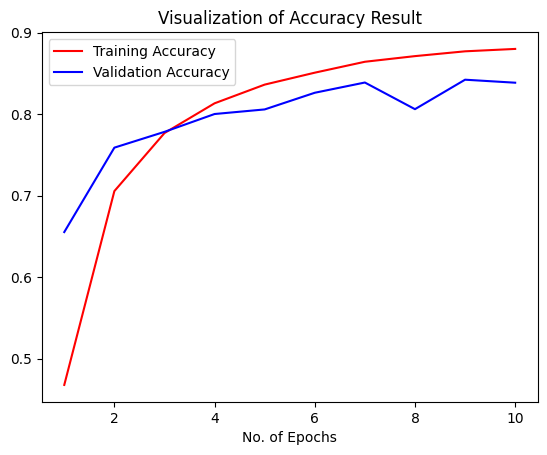

In [28]:
#Accuracy Visualization
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


In [29]:
#Some other metrics for model evaluation
class_name = validation_set.class_names


In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 43834 files belonging to 109 classes.


In [31]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

42091/43834 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step 

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


42121/43834 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

42160/43834 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

42194/43834 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


42258/43834 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


42313/43834 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


42340/43834 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

42403/43834 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


42433/43834 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


42763/43834 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step 

2025-03-11 07:55:17.073791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-11 07:55:17.121343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


43834/43834 ━━━━━━━━━━━━━━━━━━━━ 348s 8ms/step


In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)  # Tensor of true class indices

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

In [33]:
Y_true

<tf.Tensor: shape=(43834,), dtype=int64, numpy=array([  0,   0,   0, ..., 108, 108, 108])>

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [35]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.95      0.97       504
                                 Apple___Black_rot       1.00      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.98      0.98       440
                                   Apple___healthy       0.95      0.98      0.96       502
                               Blueberry___healthy       0.98      0.97      0.97       454
                                Cashew_anthracnose       0.75      0.67      0.71      1838
                                    Cashew_gumosis       0.97      0.84      0.90       425
                                    Cashew_healthy       0.74      0.96      0.84      1336
                                 Cashew_leaf_miner       0.93      0.69      0.79      1487
                                   Cashew_red_rust       0.91      0.96      0.

/Users/harshitsmac/miniconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitsmac/miniconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitsmac/miniconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

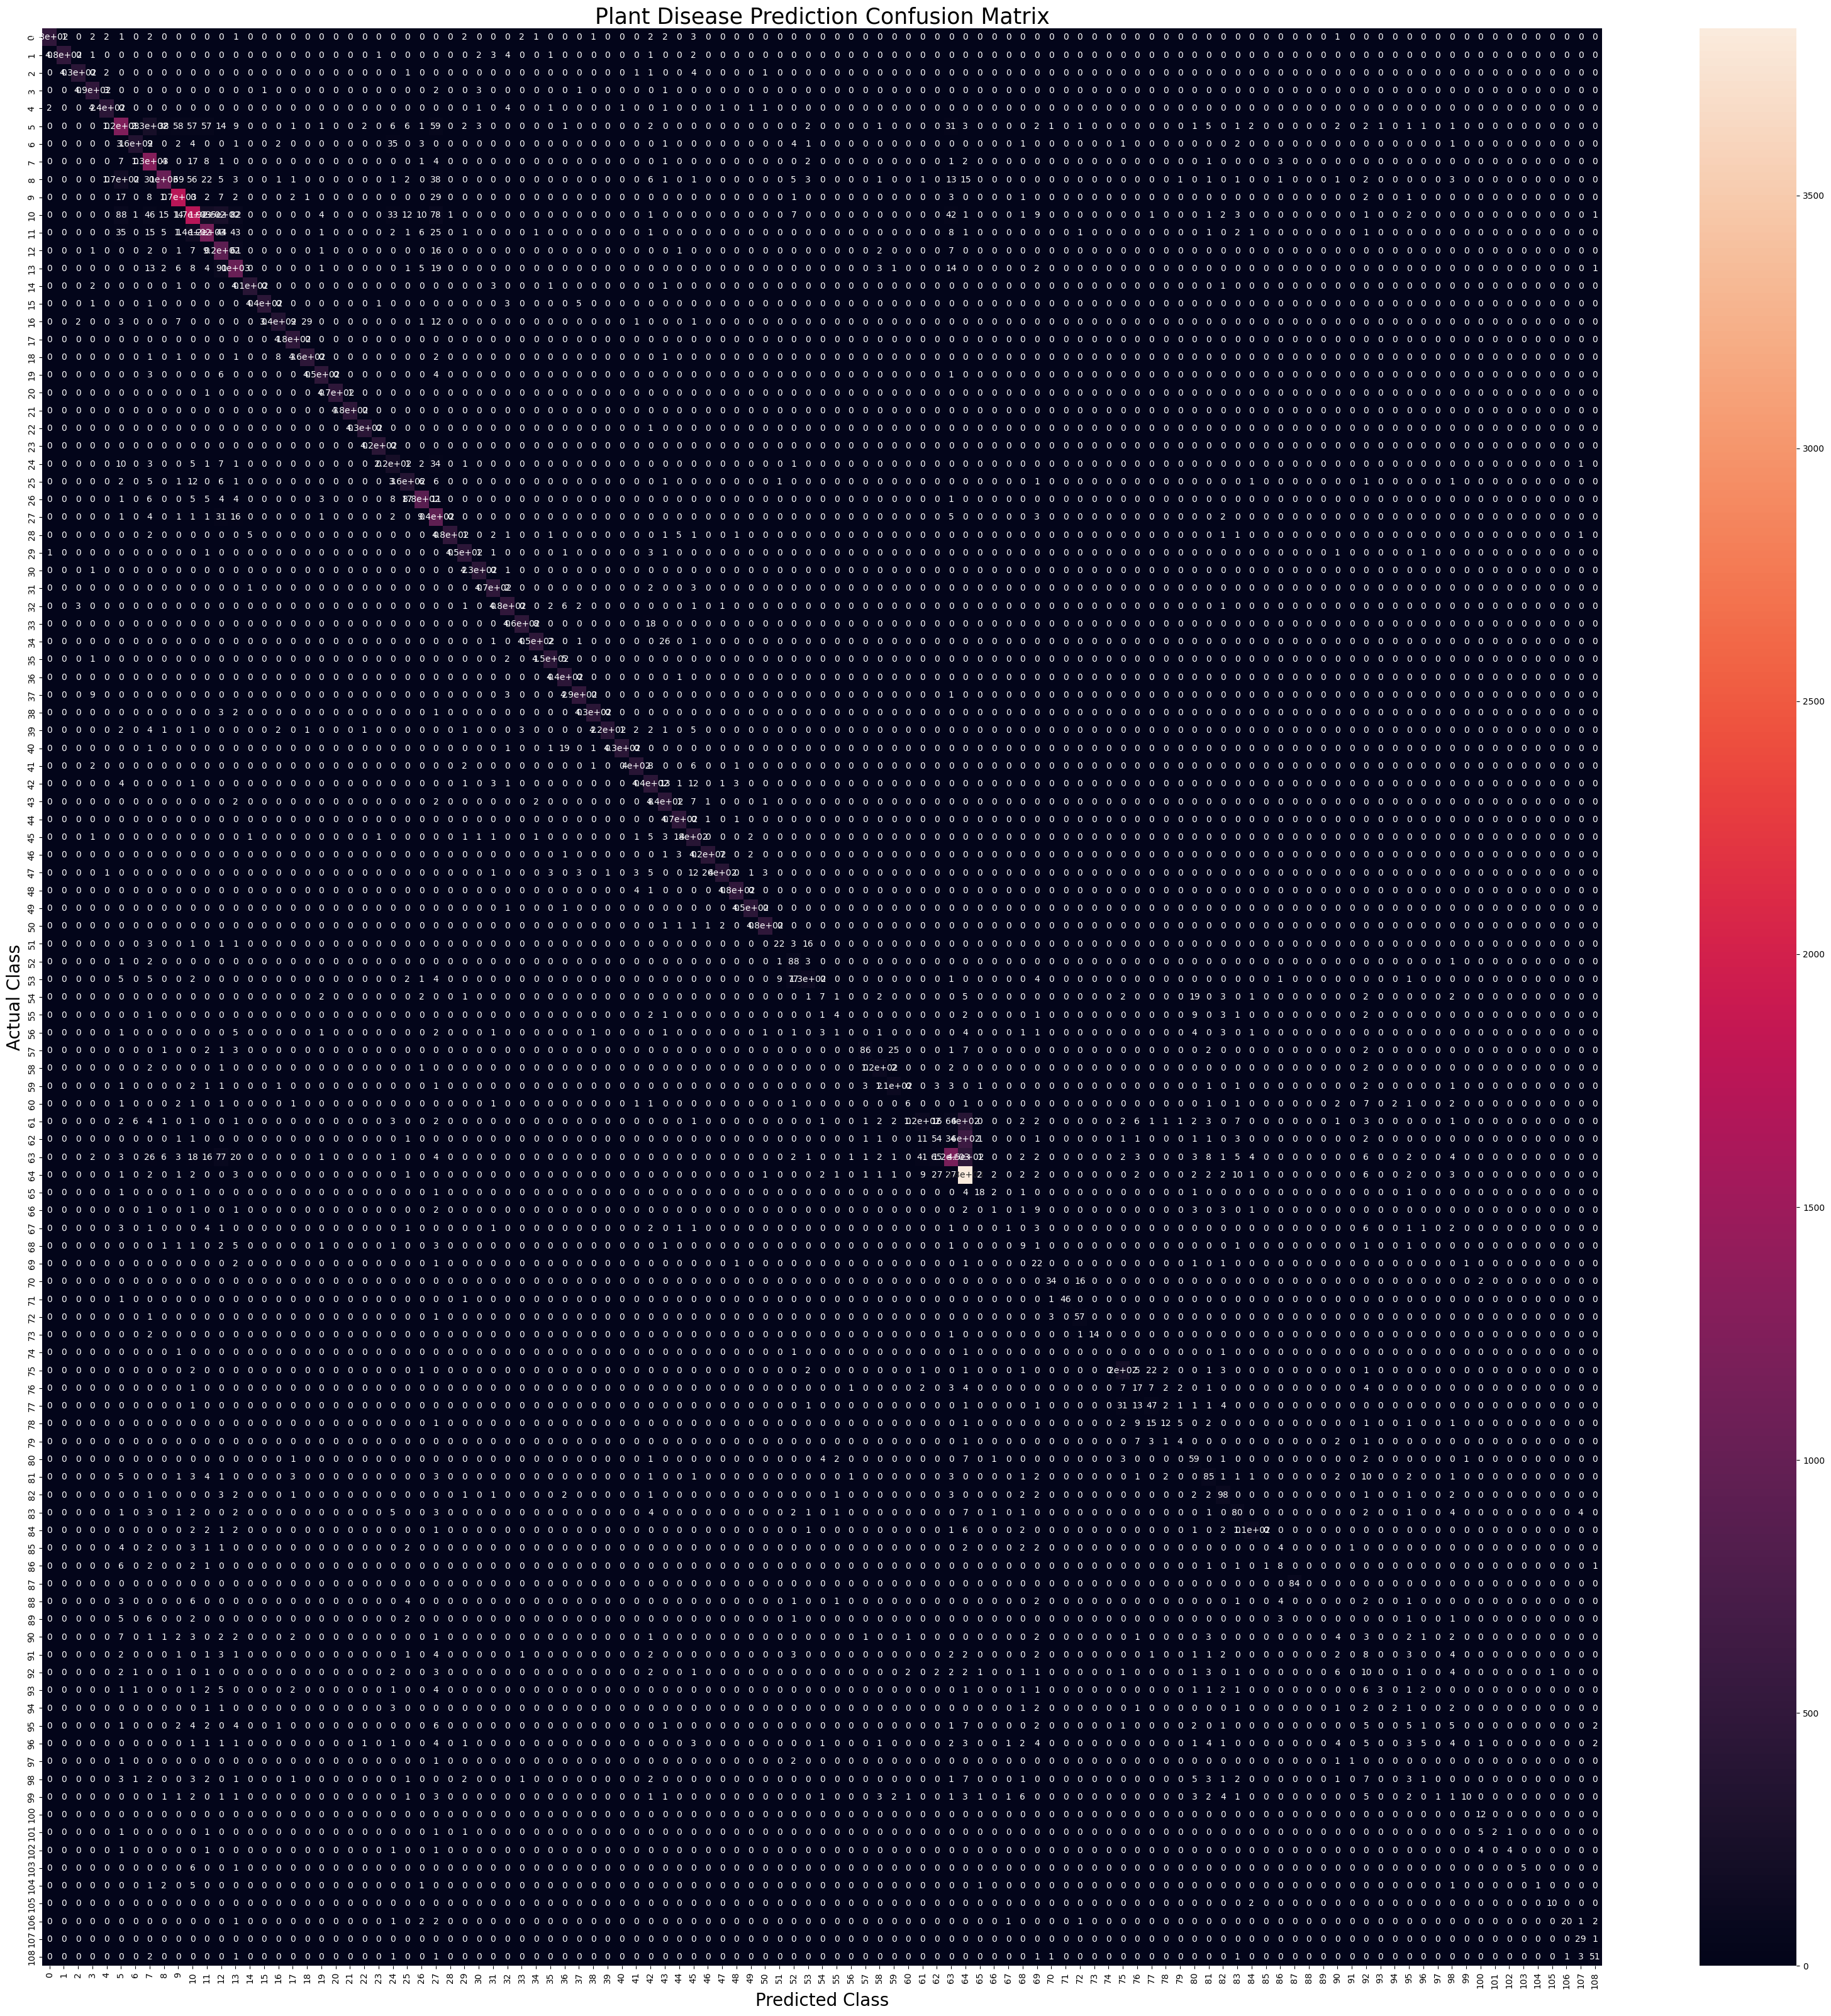

In [36]:
#Confusion Matrix Visualization
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()